### Nonlinear interaction of energetic electrons with large amplitude chorus
Bortnik, Thorne and Inan 2008


[Publication Link](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2008GL035500)

In [1]:
#import required packages
import numpy as np
import os
import sys
import inspect
import matplotlib.pyplot as plt


#Define WPIT package path
current_dir =  os.path.abspath(os.path.dirname('__file__'))
fpath = os.path.abspath(current_dir + "/..")
#Add WPIT path to Python path
sys.path.append(fpath)

#import WPIT modules
import WPIT.Environment_mod as env
import WPIT.WaveProperties_mod as wave
import WPIT.WPI_mod.whistler_electron_mod as wpi


### 1. Define simulation parameters

Here we define all the initial parameters of the simulation in respect with the particle and the wave for the 3 cases investigated in **Bortnik at al. (2008)**:

**Case A**: small wave amplitude, low latitude

**Case B**: large wave amplitude, low latitude

**Case C**: large wave amplitude, high latitude



In [2]:
# simulation parameters of each case, leave uncommented only the desired case for the run [Case A,Case B,Case C]

###Case A###################################################################################

#uncomment lines 6-21 for running Case A

# ne_0=10**7 #initial electron density in m^-3
# L_shell=5  #L-shell of the simulation
# By_wave=1*10**(-12)   # By component of the wave in Tesla
# aeq0_deg=70   #initial equatorial pitch angle in deg
# aeq0=np.deg2rad(aeq0_deg) #convert pitch angle to rad
# Ekev0=168.3 #initial energy in keV
# lamda0_deg=-9  # starting electron latitude in deg
# lamda0=np.deg2rad(lamda0_deg) #convert latitude to rad
# theta0_deg=0.0001  # initial wave normal angle in deg
# theta0=np.deg2rad(theta0_deg) #convert wave normal angle to rad
# f_wave=2000 # wave frequency in Hz
# w_wave=2*np.pi*f_wave #wave angular frequency in rad/s
# m_res=1 #WPI resonance number (0=Landau resonance)
# eta0_deg=np.linspace(0,360,24) #initial electron-wave phases in deg
# eta0=np.deg2rad(eta0_deg) #convert initial electron-wave phases to rad

###Case B###################################################################################

#uncomment lines 27-41 for running Case B

# ne_0=10**7 #initial electron density in m^-3
# L_shell=5  #L-shell of the simulation
# By_wave=1*10**(-9)   # By component of the wave in Tesla
# aeq0_deg=70   #initial equatorial pitch angle in deg
# aeq0=np.deg2rad(aeq0_deg) #convert pitch angle to rad
# Ekev0=168.3 #initial energy in keV
# lamda0_deg=-9  # starting electron latitude in deg
# lamda0=np.deg2rad(lamda0_deg) #convert latitude to rad
# theta0_deg=0.0001  # initial wave normal angle in deg
# theta0=np.deg2rad(theta0_deg) #convert wave normal angle to rad
# f_wave=2000 # wave frequency in Hz
# w_wave=2*np.pi*f_wave #wave angular frequency in rad/s
# m_res=1 #WPI resonance number (0=Landau resonance)
# eta0_deg=np.linspace(0,360,24) #initial electron-wave phases in deg
# eta0=np.deg2rad(eta0_deg) #convert initial electron-wave phases to rad


###Case C###################################################################################

#uncomment lines 48-62 for running Case C

ne_0=3*10**6 #initial electron density in m^-3
L_shell=5  #L-shell of the simulation
By_wave=1*10**(-9)   # By component of the wave in Tesla
aeq0_deg=20   #initial equatorial pitch angle in deg
aeq0=np.deg2rad(aeq0_deg) #convert pitch angle to rad
Ekev0=500 #initial energy in keV
lamda0_deg=-30  # starting electron latitude in deg
lamda0=np.deg2rad(lamda0_deg) #convert latitude to rad
theta0_deg=50  # initial wave normal angle in deg
theta0=np.deg2rad(theta0_deg) #convert wave normal angle to rad
f_wave=2000 # wave frequency in Hz
w_wave=2*np.pi*f_wave #wave angular frequency in rad/s
m_res=1 #WPI resonance number (0=Landau resonance)
eta0_deg=np.linspace(0,360,24) #initial electron-wave phases in deg
eta0=np.deg2rad(eta0_deg) #convert initial electron-wave phases to rad


### Integration parameters ##################################################################
t=0.1 #simulation duration (s)
h=0.00001  #simulation stepsize
Nsteps=int(t/h) #number of simulation steps

### 2. Find electron's  initial local pitch angle 

In [3]:
#using WPIT.Environment_mod.aeq2alpha routine
alpha0=env.aeq2alpha(L_shell,lamda0,aeq0)

print('\u03B1:',np.rad2deg(alpha0))


α: 37.275386918514556


### 3. Find electrons's initial momentum, initial velocity and initial lorentz factor

In [4]:
#using WPIT.Environment_mod.initial_velocity routine
upar0,uper0,ppar0,pper0,gamma0=env.initial_velocity(Ekev0,alpha0,env.const.me)

print('upar0:',upar0,'m/s')
print('uper0:',uper0,'m/s')
print('ppar0:',ppar0,'Ns')
print('pper0:',pper0,'Ns')
print('gamma0:',gamma0)

upar0: 205841451.6180183 m/s
uper0: 156669468.9813117 m/s
ppar0: 3.709778102866738e-22 Ns
pper0: 2.823575916541748e-22 Ns
gamma0: 1.978454831319627


### 5. Calculate all the initial parameters

In [5]:
#calculate magnetic field strength at electron's initial location using WPIT.Environment_mod.Bmag_dipole routine
Bmag0=env.Bmag_dipole(L_shell,lamda0)

#calculate electron density at electron's initial location using WPIT.Environment_mod.density_FL_denton routine
ne0=env.density_FL_denton(ne_0,lamda0)

#Ion density assuming 94%H+, 5.4%He+, 0.6%O+ (Bortnik et al.(2008) did not mention the ion composition. During 
# WPIT testing we conclude that ion composition has small effect on the results. The user can change the ion 
# percentages in nH0, nHe0 and nO0 parameters  to test this
nH0=0.94*ne0
nHe0=0.054*ne0
nO0=0.006*ne0    

#calculate the Stix parameters at electron's initial location using WPIT.WaveProperties_mod.stix_parameters routine
S0,D0,P0,R0,L0=wave.stix_parameters(w_wave, ne0, nH0, nHe0, nO0, Bmag0)

#calculate the refractive index and the wavenumber at electron's initial location 
# using WPIT.WaveProperties_mod.refr_index_full routine
eta_sq_plus0,eta_sq_minus0,mu0,kappa0,kappaz0,kappax0=wave.refr_index_full(theta0,w_wave,S0,P0,R0,L0)

#calculate the initial electron gyrofrequency using WPIT.Environment_mod.omega_cyclotron routine
wce0=env.omega_cyclotron(Bmag0,env.const.qe,env.const.me)

#calculate the wave component amplitudes at electron's initial location 
# using WPIT.WaveProperties_mod.wave_amplitudes_bell routine
Bxw0, Byw0, Bzw0, Exw0, Eyw0, Ezw0=wave.wave_amplitudes_bell(mu0,P0,D0,S0,By_wave,theta0)

#calculate the gradient of gyrofrequency at electron's initial location using WPIT.Environment_mod.dwc_ds routine
dwceds0=env.dwc_ds(wce0,lamda0,L_shell)

#calculate wpi parameters at electron's initial location using WPIT.WPI_mod.whistler_electron_mod.wpi_params routine
gamma0,w10,w20,wtau_sq0,R10,R20,beta0=wpi.wpi_params(m_res,ppar0,pper0,Bxw0, Byw0,Exw0,Eyw0,Ezw0,kappaz0,kappax0,wce0)

#calculate resonant velocity and energy at electron's initial location using 
# WPIT.WaveProperties_mod.resonant_velocity routine
v_para_res0, v_per_res0, v_tot_res0, E_res0,gamma_res0=wave.resonant_velocity(m_res,w_wave,kappaz0,wce0,alpha0,env.const.me)


### 4. Allocate outputs


In [6]:
#define empty arrays to be filled during the simulation run
pper=np.zeros((len(eta0),Nsteps+1))
ppar=np.zeros((len(eta0),Nsteps+1))
eta=np.zeros((len(eta0),Nsteps+1))
lamda=np.zeros((len(eta0),Nsteps+1))
time=np.zeros((len(eta0),Nsteps+1))
uper=np.zeros((len(eta0),Nsteps+1))
upar=np.zeros((len(eta0),Nsteps+1))
zeta=np.zeros((len(eta0),Nsteps+1))
alpha=np.zeros((len(eta0),Nsteps+1))
alpha2=np.zeros((len(eta0),Nsteps+1))
aeq=np.zeros((len(eta0),Nsteps+1))
aeq2=np.zeros((len(eta0),Nsteps+1))
Exw_out=np.zeros((len(eta0),Nsteps+1))
Eyw_out=np.zeros((len(eta0),Nsteps+1))
Ezw_out=np.zeros((len(eta0),Nsteps+1))
Bxw_out=np.zeros((len(eta0),Nsteps+1))
Byw_out=np.zeros((len(eta0),Nsteps+1))
Bzw_out=np.zeros((len(eta0),Nsteps+1))
Bw_out=np.zeros((len(eta0),Nsteps+1))
Ew_out=np.zeros((len(eta0),Nsteps+1))
vresz_o=np.zeros((len(eta0),Nsteps+1))
Eres_o=np.zeros((len(eta0),Nsteps+1))

mu_out=np.zeros((len(eta0),Nsteps+1))
deta_dt=np.zeros((len(eta0),Nsteps+1))
S_stix=np.zeros((len(eta0),Nsteps+1))
D_stix=np.zeros((len(eta0),Nsteps+1))
P_stix=np.zeros((len(eta0),Nsteps+1))
R_stix=np.zeros((len(eta0),Nsteps+1))
L_stix=np.zeros((len(eta0),Nsteps+1))
kx_out=np.zeros((len(eta0),Nsteps+1))
kz_out=np.zeros((len(eta0),Nsteps+1))
wh_out=np.zeros((len(eta0),Nsteps+1))
dwh_dt_out=np.zeros((len(eta0),Nsteps+1))
gamma_out=np.zeros((len(eta0),Nsteps+1))
Phi_out=np.zeros((len(eta0),Nsteps+1))
E_kin=np.zeros((len(eta0),Nsteps+1))
v_res_out=np.zeros((len(eta0),Nsteps+1))
E_res_out=np.zeros((len(eta0),Nsteps+1))

Bxw_out=np.zeros((len(eta0),Nsteps+1))
Byw_out=np.zeros((len(eta0),Nsteps+1))
Bzw_out=np.zeros((len(eta0),Nsteps+1))
Exw_out=np.zeros((len(eta0),Nsteps+1))
Eyw_out=np.zeros((len(eta0),Nsteps+1))
Ezw_out=np.zeros((len(eta0),Nsteps+1))
S_out=np.zeros((len(eta0),Nsteps+1))
wtrsq_out=np.zeros((len(eta0),Nsteps+1))
C0_out=np.zeros((len(eta0),Nsteps+1))
C1p_out=np.zeros((len(eta0),Nsteps+1))
C1m_out=np.zeros((len(eta0),Nsteps+1))
kappa_out=np.zeros((len(eta0),Nsteps+1))

### Define the wave packet

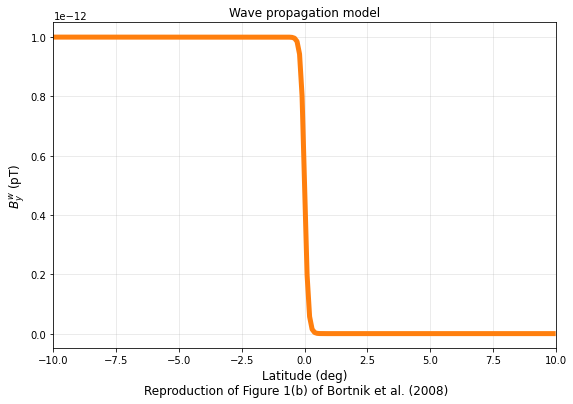

In [7]:
#Plotting the wave packet [Bortnik et al. (2008): Figure 1(b)]

#define the wave packet range
lamda_packet2=np.arange(-10,10,0.1)
lamda_packet_rad2=np.deg2rad(lamda_packet2)

#define the y-component of the wave magnetic field
Byw0_packet2=1*10**(-12)

#WPIT.WaveProperties_mod.wave_packet_one_sided parameters
shape=7
direction='south'
location=0

#define an empty array for the wave packet calculation
Bw_packet2=[]

#calculate the wave amplitude for the defined latitudinal range
for i in range(0,len(lamda_packet2)):

    Bytmp=wave.wave_packet_one_sided(Byw0_packet2,lamda_packet_rad2[i],shape,location,direction)
    
    Bw_packet2.append(Bytmp)


#Plot the wave packet
fig, ax = plt.subplots(figsize=(9,6))
s=5
ax.plot(lamda_packet2,Bw_packet2,c='tab:orange',linewidth=s)
ax.grid(alpha=.3)
ax.set_xlim(-10,10)
ax.set_xlabel('Latitude (deg)',fontsize=12)
ax.set_ylabel(r'$B_y^{w}$ (pT)',fontsize=12)
ax.set_title('Wave propagation model',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
txt="Reproduction of Figure 1(b) of Bortnik et al. (2008)"
fig.text(.5, .02, txt, ha='center',fontsize=12)
plt.show()


### Runge-Kutta

In [8]:
for k in range(0,len(eta0)):
    
    #initialize the parameters
    i=0
    time[k,0]=0
    pper[k,0]=pper0
    ppar[k,0]=ppar0
    eta[k,0]=eta0[k]
    lamda[k,0]=lamda0
    zeta[k,0]=0
    upar[k,0]=upar0
    uper[k,0]=uper0
    alpha[k,0]=alpha0
    alpha2[k,0]=alpha0
    aeq[k,0]=aeq0
    aeq2[k,0]=aeq0
    mu_out[k,0]=mu0
    deta_dt[k,0]=0
    S_stix[k,0]=S0
    D_stix[k,0]=D0
    P_stix[k,0]=P0
    R_stix[k,0]=R0
    L_stix[k,0]=L0
    kappa_out[k,0]=kappa0
    kx_out[k,0]=kappax0
    kz_out[k,0]=kappaz0
    dwh_dt_out[k,0]=dwceds0
    gamma_out[k,0]=gamma0
    E_kin[k,0]=1.602176487E-16*Ekev0 #from keV to ergs
    v_res_out[k,0]=v_para_res0
    E_res_out[k,0]=E_res0
    Bxw_out[k,0]=Bxw0
    Byw_out[k,0]=Byw0
    Bzw_out[k,0]=Bzw0
    Exw_out[k,0]=Exw0
    Eyw_out[k,0]=Eyw0
    Ezw_out[k,0]=Ezw0

    while i<Nsteps:
#    ######################################################################################################
#    #First step of Runge Kutta
#    ######################################################################################################

        #calculate the magnetic field strength
        Bmag=env.Bmag_dipole(L_shell,lamda[k,i])
        
        #calculate the electron density
        ne=env.density_FL_denton(ne_0,lamda[k,i])

        #Ion composition assuming 94%H+, 5.4%He+, 0.6%O+
        nH=0.94*ne
        nHe=0.054*ne
        nO=0.006*ne 
        
        
        #calculate the Stix parameters
        S,D,P,R,L=wave.stix_parameters(w_wave, ne, nH, nHe, nO, Bmag)
        
        #calculate the refractive index and the wave numbers
        eta_sq_plus,eta_sq_minus,mu,kappa,kz,kx=wave.refr_index_full(theta0,w_wave,S,P,R,L)

        #calculate the electron cyclotron frequency
        wce=env.omega_cyclotron(Bmag,env.const.qe,env.const.me)
        
        #calculate the y-component of the wave magnetic field
        By_packet=wave.wave_packet_one_sided(By_wave,lamda[k,i],shape,location,direction)

        #calculate the amplitudes of the wave magnetic and electric field components
        Bxw, Byw, Bzw, Exw, Eyw, Ezw=wave.wave_amplitudes_bell(mu,P,D,S,By_packet,theta0)
        
        #calculate the gradient of the electron gyrofrequency
        dwceds=env.dwc_ds(wce,lamda[k,i],L_shell)

        #calculate the wpi parameters
        gamma,w1,w2,wtau_sq,R1,R2,beta=wpi.wpi_params(m_res,ppar[k,i],pper[k,i],Bxw, Byw,Exw,Eyw,Ezw,kz,kx,wce)
        
        #calculate resonant velocities, resonant energy and resonant lorentz factor
        v_para_res, v_per_res, v_tot_res, E_res,gamma_res=wave.resonant_velocity(m_res,w_wave,kz,wce,alpha[k,i],env.const.me)
        
        
        #calculate the Runge-Kutta coeeficients for each differential equation
        k1=wpi.dzdt(ppar[k,i],gamma,env.const.me)
        l1=wpi.dppardt(pper[k,i],eta[k,i],wtau_sq,kz,gamma,wce,dwceds)
        m1=wpi.dpperdt(ppar[k,i],pper[k,i],eta[k,i],w1,w2,beta,gamma,R1,R2,m_res,wce,dwceds)
        n1=wpi.detadt(ppar[k,i],m_res,wce,w_wave,gamma,kz)
        o1=wpi.dlamdadt(ppar[k,i],lamda[k,i],gamma,L_shell)
        p1=wpi.dalphadt(pper[k,i],ppar[k,i],eta[k,i],w1,w2,R1,R2,wtau_sq,kz,beta,m_res,gamma,wce,dwceds)
        q1=wpi.daeqdt(ppar[k,i],pper[k,i],alpha[k,i],aeq[k,i],eta[k,i],w1,R1,w2,R2,gamma,beta,wtau_sq,kz,m_res)
        r1=wpi.dgammadt(pper[k,i],ppar[k,i],eta[k,i],m_res,Exw,Eyw,Ezw,beta,gamma)
        s1=wpi.dEkdt(pper[k,i],ppar[k,i],eta[k,i],m_res,Exw,Eyw,Ezw,beta,gamma)
        

#     ######################################################################################################
#     #Second step of Runge Kutta
#     ######################################################################################################

        #calculate the magnetic field strength
        Bmag=env.Bmag_dipole(L_shell,lamda[k,i]+0.5*h*o1)
        
        #calculate the electron density
        ne=env.density_FL_denton(ne_0,lamda[k,i]+0.5*h*o1)

        #Ion composition assuming 94%H+, 5.4%He+, 0.6%O+
        nH=0.94*ne
        nHe=0.054*ne
        nO=0.006*ne    

        #calculate the Stix parameters
        S,D,P,R,L=wave.stix_parameters(w_wave, ne, nH, nHe, nO, Bmag)

        #calculate the refractive index and the wave numbers
        eta_sq_plus,eta_sq_minus,mu,kappa,kz,kx=wave.refr_index_full(theta0,w_wave,S,P,R,L)

        #calculate the electron cyclotron frequency
        wce=env.omega_cyclotron(Bmag,env.const.qe,env.const.me)
        
        #calculate the y-component of the wave magnetic field
        By_packet=wave.wave_packet_one_sided(By_wave,lamda[k,i]+0.5*h*o1,shape,location,direction)
        
        #calculate the amplitudes of the wave magnetic and electric field components
        Bxw, Byw, Bzw, Exw, Eyw, Ezw=wave.wave_amplitudes_bell(mu,P,D,S,By_packet,theta0)
        
        #calculate the gradient of the electron gyrofrequency
        dwceds=env.dwc_ds(wce,lamda[k,i]+0.5*h*o1,L_shell)

        #calculate the wpi parameters
        gamma,w1,w2,wtau_sq,R1,R2,beta=wpi.wpi_params(m_res,ppar[k,i]+0.5*h*l1,pper[k,i]+0.5*h*m1,Bxw, Byw,Exw,Eyw,Ezw,kz,kx,wce)
        
        #calculate resonant velocities, resonant energy and resonant lorentz factor
        v_para_res, v_per_res, v_tot_res, E_res,gamma_res=wave.resonant_velocity(m_res,w_wave,kz,wce,alpha[k,i]+0.5*h*p1,env.const.me)
        
        #calculate the Runge-Kutta coeeficients for each differential equation
        k2=wpi.dzdt(ppar[k,i]+0.5*h*l1,gamma,env.const.me)
        l2=wpi.dppardt(pper[k,i]+0.5*h*m1,eta[k,i]+0.5*h*n1,wtau_sq,kz,gamma,wce,dwceds)
        m2=wpi.dpperdt(ppar[k,i]+0.5*h*l1,pper[k,i]+0.5*h*m1,eta[k,i]+0.5*h*n1,w1,w2,beta,gamma,R1,R2,m_res,wce,dwceds)
        n2=wpi.detadt(ppar[k,i]+0.5*h*l1,m_res,wce,w_wave,gamma,kz)
        o2=wpi.dlamdadt(ppar[k,i]+0.5*h*l1,lamda[k,i]+0.5*h*o1,gamma,L_shell)
        p2=wpi.dalphadt(pper[k,i]+0.5*h*m1,ppar[k,i]+0.5*h*l1,eta[k,i]+0.5*h*n1,w1,w2,R1,R2,wtau_sq,kz,beta,m_res,gamma,wce,dwceds)
        q2=wpi.daeqdt(ppar[k,i]+0.5*h*l1,pper[k,i]+0.5*h*m1,alpha[k,i]+0.5*h*p1,aeq[k,i]+0.5*h*q1,eta[k,i]+0.5*h*n1,w1,R1,w2,R2,gamma,beta,wtau_sq,kz,m_res)
        r2=wpi.dgammadt(pper[k,i]+0.5*h*m1,ppar[k,i]+0.5*h*l1,eta[k,i]+0.5*h*n1,m_res,Exw,Eyw,Ezw,beta,gamma)
        s2=wpi.dEkdt(pper[k,i]+0.5*h*m1,ppar[k,i]+0.5*h*l1,eta[k,i]+0.5*h*n1,m_res,Exw,Eyw,Ezw,beta,gamma)
        
#     ######################################################################################################
#     #Third step of Runge Kutta
#     ######################################################################################################

        #calculate the magnetic field strength
        Bmag=env.Bmag_dipole(L_shell,lamda[k,i]+0.5*h*o2)
        
        #calculate the electron density
        ne=env.density_FL_denton(ne_0,lamda[k,i]+0.5*h*o2)

        #Ion composition assuming 94%H+, 5.4%He+, 0.6%O+
        nH=0.94*ne
        nHe=0.054*ne
        nO=0.006*ne    

        #calculate the Stix parameters
        S,D,P,R,L=wave.stix_parameters(w_wave, ne, nH, nHe, nO, Bmag)

        #calculate the refractive index and the wave numbers
        eta_sq_plus,eta_sq_minus,mu,kappa,kz,kx=wave.refr_index_full(theta0,w_wave,S,P,R,L)

        #calculate the electron cyclotron frequency
        wce=env.omega_cyclotron(Bmag,env.const.qe,env.const.me)
        
        #calculate the y-component of the wave magnetic field
        By_packet=wave.wave_packet_one_sided(By_wave,lamda[k,i]+0.5*h*o2,shape,location,direction)
        
        #calculate the amplitudes of the wave magnetic and electric field components
        Bxw, Byw, Bzw, Exw, Eyw, Ezw=wave.wave_amplitudes_bell(mu,P,D,S,By_packet,theta0)
        
        #calculate the gradient of the electron gyrofrequency
        dwceds=env.dwc_ds(wce,lamda[k,i]+0.5*h*o2,L_shell)

        #calculate the wpi parameters
        gamma,w1,w2,wtau_sq,R1,R2,beta=wpi.wpi_params(m_res,ppar[k,i]+0.5*h*l2,pper[k,i]+0.5*h*m2,Bxw, Byw,Exw,Eyw,Ezw,kz,kx,wce)
        
        #calculate resonant velocities, resonant energy and resonant lorentz factor
        v_para_res, v_per_res, v_tot_res, E_res,gamma_res=wave.resonant_velocity(m_res,w_wave,kz,wce,alpha[k,i]+0.5*h*p2,env.const.me)
        
        #calculate the Runge-Kutta coeeficients for each differential equation
        k3=wpi.dzdt(ppar[k,i]+0.5*h*l2,gamma,env.const.me)
        l3=wpi.dppardt(pper[k,i]+0.5*h*m2,eta[k,i]+0.5*h*n2,wtau_sq,kz,gamma,wce,dwceds)
        m3=wpi.dpperdt(ppar[k,i]+0.5*h*l2,pper[k,i]+0.5*h*m2,eta[k,i]+0.5*h*n2,w1,w2,beta,gamma,R1,R2,m_res,wce,dwceds)
        n3=wpi.detadt(ppar[k,i]+0.5*h*l2,m_res,wce,w_wave,gamma,kz)
        o3=wpi.dlamdadt(ppar[k,i]+0.5*h*l2,lamda[k,i]+0.5*h*o2,gamma,L_shell)
        p3=wpi.dalphadt(pper[k,i]+0.5*h*m2,ppar[k,i]+0.5*h*l2,eta[k,i]+0.5*h*n2,w1,w2,R1,R2,wtau_sq,kz,beta,m_res,gamma,wce,dwceds)
        q3=wpi.daeqdt(ppar[k,i]+0.5*h*l2,pper[k,i]+0.5*h*m2,alpha[k,i]+0.5*h*p2,aeq[k,i]+0.5*h*q2,eta[k,i]+0.5*h*n2,w1,R1,w2,R2,gamma,beta,wtau_sq,kz,m_res)
        r3=wpi.dgammadt(pper[k,i]+0.5*h*m2,ppar[k,i]+0.5*h*l2,eta[k,i]+0.5*h*n2,m_res,Exw,Eyw,Ezw,beta,gamma)
        s3=wpi.dEkdt(pper[k,i]+0.5*h*m2,ppar[k,i]+0.5*h*l2,eta[k,i]+0.5*h*n2,m_res,Exw,Eyw,Ezw,beta,gamma)
#    ######################################################################################################
#    #Fourth step of Runge Kutta
#    ######################################################################################################

        #calculate the magnetic field strength
        Bmag=env.Bmag_dipole(L_shell,lamda[k,i]+h*o3)
        
        #calculate the electron density
        ne=env.density_FL_denton(ne_0,lamda[k,i]+h*o3)

        #Ion composition assuming 94%H+, 5.4%He+, 0.6%O+
        nH=0.94*ne
        nHe=0.054*ne
        nO=0.006*ne    

        #calculate the Stix parameters
        S,D,P,R,L=wave.stix_parameters(w_wave, ne, nH, nHe, nO, Bmag)

        #calculate the refractive index and the wave numbers
        eta_sq_plus,eta_sq_minus,mu,kappa,kz,kx=wave.refr_index_full(theta0,w_wave,S,P,R,L)

        #calculate the electron cyclotron frequency
        wce=env.omega_cyclotron(Bmag,env.const.qe,env.const.me)
        
        #calculate the y-component of the wave magnetic field
        By_packet=wave.wave_packet_one_sided(By_wave,lamda[k,i]+h*o3,shape,location,direction)
        
        #calculate the amplitudes of the wave magnetic and electric field components
        Bxw, Byw, Bzw, Exw, Eyw, Ezw=wave.wave_amplitudes_bell(mu,P,D,S,By_packet,theta0)
        
        #calculate the gradient of the electron gyrofrequency
        dwceds=env.dwc_ds(wce,lamda[k,i]+h*o3,L_shell)

        #calculate the wpi parameters
        gamma,w1,w2,wtau_sq,R1,R2,beta=wpi.wpi_params(m_res,ppar[k,i]+h*l3,pper[k,i]+h*m3,Bxw, Byw,Exw,Eyw,Ezw,kz,kx,wce)
        
        #calculate resonant velocities, resonant energy and resonant lorentz factor
        v_para_res, v_per_res, v_tot_res, E_res,gamma_res=wave.resonant_velocity(m_res,w_wave,kz,wce,alpha[k,i]+h*p3,env.const.me)
        
        #calculate the Runge-Kutta coeeficients for each differential equation
        k4=wpi.dzdt(ppar[k,i]+h*l3,gamma,env.const.me)
        l4=wpi.dppardt(pper[k,i]+h*m3,eta[k,i]+h*n3,wtau_sq,kz,gamma,wce,dwceds)
        m4=wpi.dpperdt(ppar[k,i]+h*l3,pper[k,i]+h*m3,eta[k,i]+h*n3,w1,w2,beta,gamma,R1,R2,m_res,wce,dwceds)
        n4=wpi.detadt(ppar[k,i]+h*l3,m_res,wce,w_wave,gamma,kz)
        o4=wpi.dlamdadt(ppar[k,i]+h*l3,lamda[k,i]+h*o3,gamma,L_shell)
        p4=wpi.dalphadt(pper[k,i]+h*m3,ppar[k,i]+h*l3,eta[k,i]+h*n3,w1,w2,R1,R2,wtau_sq,kz,beta,m_res,gamma,wce,dwceds)
        q4=wpi.daeqdt(ppar[k,i]+h*l3,pper[k,i]+h*m3,alpha[k,i]+h*p3,aeq[k,i]+h*q3,eta[k,i]+h*n3,w1,R1,w2,R2,gamma,beta,wtau_sq,kz,m_res)
        r4=wpi.dgammadt(pper[k,i]+h*m3,ppar[k,i]+h*l3,eta[k,i]+h*n3,m_res,Exw,Eyw,Ezw,beta,gamma)
        s4=wpi.dEkdt(pper[k,i]+h*m3,ppar[k,i]+h*l3,eta[k,i]+h*n3,m_res,Exw,Eyw,Ezw,beta,gamma)
        
#    ####################################################################################################
#    #calculate the final parameters
#    ####################################################################################################
        
        #distance along the field line
        zeta[k,i+1]=zeta[k,i]+(h/6)*(k1+2*k2+2*k3+k4)
        
        #parallel to the magnetic field component of momentum
        ppar[k,i+1]=ppar[k,i]+(h/6)*(l1+2*l2+2*l3+l4)
        
        #perpendicular to the magnetic field component of momentum
        pper[k,i+1]=pper[k,i]+(h/6)*(m1+2*m2+2*m3+m4)
        
        #wave-electron phase
        eta[k,i+1]=(eta[k,i]+(h/6)*(n1+2*n2+2*n3+n4))
        
        #magnetic latitude
        lamda[k,i+1]=lamda[k,i]+(h/6)*(o1+2*o2+2*o3+o4)
        
        #local pitch angle
        alpha[k,i+1]=alpha[k,i]+(h/6)*(p1+2*p2+2*p3+p4)
        
        #equatorial pitch angle
        aeq[k,i+1]=aeq[k,i]+(h/6)*(q1+2*q2+2*q3+q4)
        
        #time evolution of wave-electron phase
        deta_dt[k,i+1]=(1/6)*(n1+2*n2+2*n3+n4)
        
        #Lorentz factor
        gamma_out[k,i+1]=gamma_out[k,i]+(h/6)*(r1+2*r2+2*r3+r4)
        
        #Kinetic energy
        E_kin[k,i+1]=E_kin[k,i]+(h/6)*(s1+2*s2+2*s3+s4)
        
        #parallel to the magnetic field component of velocity
        upar[k,i+1]=ppar[k,i+1]/(env.const.me*gamma)
        
        #perpendicular to the magnetic field component of velocity
        uper[k,i+1]=pper[k,i+1]/(env.const.me*gamma)
        
        #velocity magnitude
        u_mag=np.sqrt(upar[k,i+1]+uper[k,i+1]**2)

#    ######################################################################################################
#    Calculate parameters at final step
#    ######################################################################################################

        #calculate the magnetic field strength
        Bmag=env.Bmag_dipole(L_shell,lamda[k,i+1])
        
        #calculate the electron density
        ne=env.density_FL_denton(ne_0,lamda[k,i+1])
        #assuming 94%H+, 5.4%He+, 0.6%O+
        nH=0.94*ne
        nHe=0.054*ne
        nO=0.006*ne    

        #calculate the Stix parameters
        S,D,P,R,L=wave.stix_parameters(w_wave, ne, nH, nHe, nO, Bmag)

        #calculate the refractive index and the wave numbers
        eta_sq_plus,eta_sq_minus,mu,kappa,kz,kx=wave.refr_index_full(theta0,w_wave,S,P,R,L)

        #calculate the electron cyclotron frequency
        wce=env.omega_cyclotron(Bmag,env.const.qe,env.const.me)
        
        #calculate the y-component of the wave magnetic field
        By_packet=wave.wave_packet_one_sided(By_wave,lamda[k,i+1],shape,location,direction)
        
        #calculate the amplitudes of the wave magnetic and electric field components
        Bxw, Byw, Bzw, Exw, Eyw, Ezw=wave.wave_amplitudes_bell(mu,P,D,S,By_packet,theta0)
        
        #calculate the gradient of the electron gyrofrequency
        dwceds=env.dwc_ds(wce,lamda[k,i+1],L_shell)
        
        #calculate the wpi parameters
        gamma,w1,w2,wtau_sq,R1,R2,beta=wpi.wpi_params(m_res,ppar[k,i+1],pper[k,i+1],Bxw, Byw,Exw,Eyw,Ezw,kz,kx,wce)
        
        #calculate resonant velocities, resonant energy and resonant lorentz factor
        v_para_res, v_per_res, v_tot_res, E_res,gamma_res=wave.resonant_velocity(m_res,w_wave,kz,wce,alpha[k,i+1],env.const.me)
        
        
        #Output the results
        
        mu_out[k,i+1]=mu
        S_stix[k,i+1]=S
        D_stix[k,i+1]=D
        P_stix[k,i+1]=P
        R_stix[k,i+1]=R
        L_stix[k,i+1]=L
        kx_out[k,i+1]=kx
        kz_out[k,i+1]=kz
        dwh_dt_out[k,i+1]=dwceds
        kappa_out[k,i+1]=kappa
        Bxw_out[k,i+1]=Bxw
        Byw_out[k,i+1]=Byw
        Bzw_out[k,i+1]=Bzw
        Exw_out[k,i+1]=Exw
        Eyw_out[k,i+1]=Eyw
        Ezw_out[k,i+1]=Ezw
        v_res_out[k,i+1]=v_para_res
        E_res_out[k,i+1]=E_res
        
#    #################################################################################################
#    Investigation of nonlinear effects 
#    ################################################################################################## 

        C0_rk=wpi.nonlinear_C0(ppar[k,i+1],m_res,wce,kz,gamma,Ezw)
        C1p_rk=wpi.nonlinear_C1p(pper[k,i+1],ppar[k,i+1],w2,Exw,Eyw,m_res,wce,kz,gamma)
        C1m_rk=wpi.nonlinear_C1m(pper[k,i+1],ppar[k,i+1],w1,Exw,Eyw,m_res,wce,kz,gamma)
        
        th_rk,wtr_rk=wpi.nonlinear_theta(C0_rk,C1p_rk,C1m_rk,m_res,beta)
        
        dkpar_dt=(kappa_out[k,i]-kappa_out[k,i-1])/h

        H_rk=wpi.nonlinear_H(pper[k,i+1],ppar[k,i+1],kz,gamma,m_res,env.const.me,wce,dkpar_dt,dwceds,0)
        
        #calculate the S parameter
        S_rk=wpi.nonlinear_S(H_rk,wtr_rk)
        
        #Output the results
        
        S_out[k,i+1]=S_rk
        wtrsq_out[k,i+1]=wtr_rk
        C0_out[k,i+1]=C0_rk
        C1p_out[k,i+1]=C1p_rk
        C1m_out[k,i+1]=C1m_rk
        
#    ##################################################################################################
        
        #calculate simulation time
        i=i+1
        time[k,i]=time[k,i-1]+h

        print(time[k,i])
        


1e-05
2e-05
3.0000000000000004e-05
4e-05
5e-05
6e-05
7.000000000000001e-05
8e-05
9e-05
0.0001
0.00011
0.00012
0.00013000000000000002
0.00014000000000000001
0.00015000000000000001
0.00016
0.00017
0.00018
0.00019
0.0002
0.00021
0.00022
0.00023
0.00024
0.00025
0.00026000000000000003
0.00027000000000000006
0.0002800000000000001
0.0002900000000000001
0.00030000000000000014
0.00031000000000000016
0.0003200000000000002
0.0003300000000000002
0.00034000000000000024
0.00035000000000000027
0.0003600000000000003
0.0003700000000000003
0.00038000000000000035
0.00039000000000000037
0.0004000000000000004
0.0004100000000000004
0.00042000000000000045
0.0004300000000000005
0.0004400000000000005
0.00045000000000000053
0.00046000000000000056
0.0004700000000000006
0.0004800000000000006
0.0004900000000000006
0.0005000000000000007
0.0005100000000000007
0.0005200000000000007
0.0005300000000000007
0.0005400000000000008
0.0005500000000000008
0.0005600000000000008
0.0005700000000000008
0.0005800000000000009
0.000

0.00510999999999996
0.00511999999999996
0.005129999999999959
0.005139999999999959
0.005149999999999958
0.005159999999999958
0.005169999999999958
0.005179999999999957
0.005189999999999957
0.005199999999999956
0.005209999999999956
0.005219999999999956
0.005229999999999955
0.005239999999999955
0.005249999999999954
0.005259999999999954
0.0052699999999999535
0.005279999999999953
0.005289999999999953
0.005299999999999952
0.005309999999999952
0.0053199999999999515
0.005329999999999951
0.005339999999999951
0.00534999999999995
0.00535999999999995
0.0053699999999999495
0.005379999999999949
0.005389999999999949
0.005399999999999948
0.005409999999999948
0.005419999999999947
0.005429999999999947
0.005439999999999947
0.005449999999999946
0.005459999999999946
0.005469999999999945
0.005479999999999945
0.005489999999999945
0.005499999999999944
0.005509999999999944
0.005519999999999943
0.005529999999999943
0.0055399999999999425
0.005549999999999942
0.005559999999999942
0.005569999999999941
0.00557999999

0.009629999999999776
0.009639999999999775
0.009649999999999775
0.009659999999999775
0.009669999999999774
0.009679999999999774
0.009689999999999773
0.009699999999999773
0.009709999999999773
0.009719999999999772
0.009729999999999772
0.009739999999999771
0.009749999999999771
0.00975999999999977
0.00976999999999977
0.00977999999999977
0.00978999999999977
0.009799999999999769
0.009809999999999769
0.009819999999999768
0.009829999999999768
0.009839999999999767
0.009849999999999767
0.009859999999999767
0.009869999999999766
0.009879999999999766
0.009889999999999765
0.009899999999999765
0.009909999999999764
0.009919999999999764
0.009929999999999764
0.009939999999999763
0.009949999999999763
0.009959999999999762
0.009969999999999762
0.009979999999999762
0.009989999999999761
0.00999999999999976
0.01000999999999976
0.01001999999999976
0.01002999999999976
0.01003999999999976
0.010049999999999759
0.010059999999999758
0.010069999999999758
0.010079999999999758
0.010089999999999757
0.010099999999999757
0

0.013839999999999604
0.013849999999999604
0.013859999999999604
0.013869999999999603
0.013879999999999603
0.013889999999999602
0.013899999999999602
0.013909999999999602
0.013919999999999601
0.0139299999999996
0.0139399999999996
0.0139499999999996
0.0139599999999996
0.013969999999999599
0.013979999999999599
0.013989999999999598
0.013999999999999598
0.014009999999999597
0.014019999999999597
0.014029999999999597
0.014039999999999596
0.014049999999999596
0.014059999999999595
0.014069999999999595
0.014079999999999595
0.014089999999999594
0.014099999999999594
0.014109999999999593
0.014119999999999593
0.014129999999999593
0.014139999999999592
0.014149999999999592
0.014159999999999591
0.014169999999999591
0.01417999999999959
0.01418999999999959
0.01419999999999959
0.01420999999999959
0.014219999999999589
0.014229999999999588
0.014239999999999588
0.014249999999999588
0.014259999999999587
0.014269999999999587
0.014279999999999586
0.014289999999999586
0.014299999999999586
0.014309999999999585
0.01

0.021909999999999277
0.021919999999999277
0.021929999999999276
0.021939999999999276
0.021949999999999276
0.021959999999999275
0.021969999999999275
0.021979999999999274
0.021989999999999274
0.021999999999999274
0.022009999999999273
0.022019999999999273
0.022029999999999272
0.022039999999999272
0.02204999999999927
0.02205999999999927
0.02206999999999927
0.02207999999999927
0.02208999999999927
0.02209999999999927
0.02210999999999927
0.02211999999999927
0.02212999999999927
0.022139999999999268
0.022149999999999267
0.022159999999999267
0.022169999999999267
0.022179999999999266
0.022189999999999266
0.022199999999999265
0.022209999999999265
0.022219999999999265
0.022229999999999264
0.022239999999999264
0.022249999999999263
0.022259999999999263
0.022269999999999263
0.022279999999999262
0.022289999999999262
0.02229999999999926
0.02230999999999926
0.02231999999999926
0.02232999999999926
0.02233999999999926
0.02234999999999926
0.02235999999999926
0.02236999999999926
0.022379999999999258
0.0223899

0.029139999999998983
0.029149999999998982
0.029159999999998982
0.02916999999999898
0.02917999999999898
0.02918999999999898
0.02919999999999898
0.02920999999999898
0.02921999999999898
0.02922999999999898
0.02923999999999898
0.029249999999998978
0.029259999999998978
0.029269999999998977
0.029279999999998977
0.029289999999998977
0.029299999999998976
0.029309999999998976
0.029319999999998975
0.029329999999998975
0.029339999999998975
0.029349999999998974
0.029359999999998974
0.029369999999998973
0.029379999999998973
0.029389999999998973
0.029399999999998972
0.02940999999999897
0.02941999999999897
0.02942999999999897
0.02943999999999897
0.02944999999999897
0.02945999999999897
0.02946999999999897
0.02947999999999897
0.02948999999999897
0.029499999999998968
0.029509999999998968
0.029519999999998967
0.029529999999998967
0.029539999999998966
0.029549999999998966
0.029559999999998966
0.029569999999998965
0.029579999999998965
0.029589999999998964
0.029599999999998964
0.029609999999998964
0.0296199

0.03474999999999997
0.03475999999999997
0.034769999999999975
0.03477999999999998
0.03478999999999998
0.034799999999999984
0.03480999999999999
0.03481999999999999
0.03482999999999999
0.034839999999999996
0.03485
0.03486
0.034870000000000005
0.03488000000000001
0.03489000000000001
0.034900000000000014
0.03491000000000002
0.03492000000000002
0.034930000000000024
0.03494000000000003
0.03495000000000003
0.03496000000000003
0.034970000000000036
0.03498000000000004
0.03499000000000004
0.035000000000000045
0.03501000000000005
0.03502000000000005
0.035030000000000054
0.03504000000000006
0.03505000000000006
0.03506000000000006
0.035070000000000066
0.03508000000000007
0.03509000000000007
0.035100000000000076
0.03511000000000008
0.03512000000000008
0.035130000000000085
0.03514000000000009
0.03515000000000009
0.035160000000000094
0.0351700000000001
0.0351800000000001
0.0351900000000001
0.035200000000000106
0.03521000000000011
0.03522000000000011
0.035230000000000115
0.03524000000000012
0.0352500000

0.041660000000002084
0.04167000000000209
0.04168000000000209
0.04169000000000209
0.041700000000002097
0.0417100000000021
0.0417200000000021
0.041730000000002106
0.04174000000000211
0.04175000000000211
0.041760000000002115
0.04177000000000212
0.04178000000000212
0.041790000000002124
0.04180000000000213
0.04181000000000213
0.04182000000000213
0.041830000000002136
0.04184000000000214
0.04185000000000214
0.041860000000002145
0.04187000000000215
0.04188000000000215
0.041890000000002155
0.04190000000000216
0.04191000000000216
0.041920000000002164
0.04193000000000217
0.04194000000000217
0.04195000000000217
0.041960000000002176
0.04197000000000218
0.04198000000000218
0.041990000000002185
0.04200000000000219
0.04201000000000219
0.042020000000002194
0.0420300000000022
0.0420400000000022
0.042050000000002204
0.04206000000000221
0.04207000000000221
0.04208000000000221
0.042090000000002216
0.04210000000000222
0.04211000000000222
0.042120000000002225
0.04213000000000223
0.04214000000000223
0.0421500

0.04850000000000418
0.04851000000000418
0.048520000000004185
0.04853000000000419
0.04854000000000419
0.048550000000004194
0.0485600000000042
0.0485700000000042
0.0485800000000042
0.048590000000004206
0.04860000000000421
0.04861000000000421
0.048620000000004215
0.04863000000000422
0.04864000000000422
0.048650000000004225
0.04866000000000423
0.04867000000000423
0.048680000000004234
0.04869000000000424
0.04870000000000424
0.04871000000000424
0.048720000000004246
0.04873000000000425
0.04874000000000425
0.048750000000004255
0.04876000000000426
0.04877000000000426
0.048780000000004264
0.04879000000000427
0.04880000000000427
0.048810000000004274
0.04882000000000428
0.04883000000000428
0.04884000000000428
0.048850000000004286
0.04886000000000429
0.04887000000000429
0.048880000000004295
0.0488900000000043
0.0489000000000043
0.048910000000004304
0.04892000000000431
0.04893000000000431
0.04894000000000431
0.048950000000004316
0.04896000000000432
0.04897000000000432
0.048980000000004326
0.04899000

0.05292000000000553
0.052930000000005535
0.05294000000000554
0.05295000000000554
0.052960000000005544
0.05297000000000555
0.05298000000000555
0.052990000000005553
0.05300000000000556
0.05301000000000556
0.05302000000000556
0.053030000000005566
0.05304000000000557
0.05305000000000557
0.053060000000005575
0.05307000000000558
0.05308000000000558
0.053090000000005584
0.05310000000000559
0.05311000000000559
0.05312000000000559
0.053130000000005596
0.0531400000000056
0.0531500000000056
0.053160000000005606
0.05317000000000561
0.05318000000000561
0.053190000000005615
0.05320000000000562
0.05321000000000562
0.053220000000005624
0.05323000000000563
0.05324000000000563
0.05325000000000563
0.053260000000005636
0.05327000000000564
0.05328000000000564
0.053290000000005645
0.05330000000000565
0.05331000000000565
0.053320000000005655
0.05333000000000566
0.05334000000000566
0.053350000000005664
0.05336000000000567
0.05337000000000567
0.05338000000000567
0.053390000000005676
0.05340000000000568
0.05341

0.057110000000006815
0.05712000000000682
0.05713000000000682
0.057140000000006824
0.05715000000000683
0.05716000000000683
0.05717000000000683
0.057180000000006836
0.05719000000000684
0.05720000000000684
0.057210000000006846
0.05722000000000685
0.05723000000000685
0.057240000000006855
0.05725000000000686
0.05726000000000686
0.057270000000006864
0.05728000000000687
0.05729000000000687
0.05730000000000687
0.057310000000006876
0.05732000000000688
0.05733000000000688
0.057340000000006885
0.05735000000000689
0.05736000000000689
0.057370000000006895
0.0573800000000069
0.0573900000000069
0.057400000000006904
0.05741000000000691
0.05742000000000691
0.05743000000000691
0.057440000000006916
0.05745000000000692
0.05746000000000692
0.057470000000006925
0.05748000000000693
0.05749000000000693
0.057500000000006934
0.05751000000000694
0.05752000000000694
0.057530000000006944
0.05754000000000695
0.05755000000000695
0.05756000000000695
0.057570000000006956
0.05758000000000696
0.05759000000000696
0.05760

0.06376000000000798
0.06377000000000797
0.06378000000000797
0.06379000000000797
0.06380000000000796
0.06381000000000796
0.06382000000000795
0.06383000000000795
0.06384000000000795
0.06385000000000794
0.06386000000000794
0.06387000000000793
0.06388000000000793
0.06389000000000793
0.06390000000000792
0.06391000000000792
0.06392000000000791
0.06393000000000791
0.06394000000000791
0.0639500000000079
0.0639600000000079
0.0639700000000079
0.06398000000000789
0.06399000000000789
0.06400000000000788
0.06401000000000788
0.06402000000000788
0.06403000000000787
0.06404000000000787
0.06405000000000786
0.06406000000000786
0.06407000000000786
0.06408000000000785
0.06409000000000785
0.06410000000000785
0.06411000000000784
0.06412000000000784
0.06413000000000783
0.06414000000000783
0.06415000000000783
0.06416000000000782
0.06417000000000782
0.06418000000000781
0.06419000000000781
0.0642000000000078
0.0642100000000078
0.0642200000000078
0.0642300000000078
0.06424000000000779
0.06425000000000779
0.06426

0.07089000000000521
0.07090000000000521
0.0709100000000052
0.0709200000000052
0.0709300000000052
0.0709400000000052
0.07095000000000519
0.07096000000000519
0.07097000000000518
0.07098000000000518
0.07099000000000517
0.07100000000000517
0.07101000000000517
0.07102000000000516
0.07103000000000516
0.07104000000000515
0.07105000000000515
0.07106000000000515
0.07107000000000514
0.07108000000000514
0.07109000000000514
0.07110000000000513
0.07111000000000513
0.07112000000000512
0.07113000000000512
0.07114000000000512
0.07115000000000511
0.07116000000000511
0.0711700000000051
0.0711800000000051
0.0711900000000051
0.07120000000000509
0.07121000000000509
0.07122000000000508
0.07123000000000508
0.07124000000000508
0.07125000000000507
0.07126000000000507
0.07127000000000507
0.07128000000000506
0.07129000000000506
0.07130000000000505
0.07131000000000505
0.07132000000000505
0.07133000000000504
0.07134000000000504
0.07135000000000503
0.07136000000000503
0.07137000000000503
0.07138000000000502
0.07139

0.079190000000002
0.07920000000000199
0.07921000000000199
0.07922000000000198
0.07923000000000198
0.07924000000000198
0.07925000000000197
0.07926000000000197
0.07927000000000196
0.07928000000000196
0.07929000000000196
0.07930000000000195
0.07931000000000195
0.07932000000000194
0.07933000000000194
0.07934000000000194
0.07935000000000193
0.07936000000000193
0.07937000000000193
0.07938000000000192
0.07939000000000192
0.07940000000000191
0.07941000000000191
0.0794200000000019
0.0794300000000019
0.0794400000000019
0.0794500000000019
0.07946000000000189
0.07947000000000189
0.07948000000000188
0.07949000000000188
0.07950000000000187
0.07951000000000187
0.07952000000000187
0.07953000000000186
0.07954000000000186
0.07955000000000186
0.07956000000000185
0.07957000000000185
0.07958000000000184
0.07959000000000184
0.07960000000000184
0.07961000000000183
0.07962000000000183
0.07963000000000182
0.07964000000000182
0.07965000000000182
0.07966000000000181
0.07967000000000181
0.0796800000000018
0.07969

/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT_Review/WPIT/WPIT/WPI_mod/whistler_electron_mod/wpi_params.py:14: RuntimeWarning: invalid value encountered in double_scalars
  a1_arg=w2_arg/w1_arg   #Borntik thesis 2.25f
/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT_Review/WPIT/WPIT/WPI_mod/whistler_electron_mod/wpi_params.py:15: RuntimeWarning: invalid value encountered in double_scalars
  a2_arg=(const.qe*Ezw_arg)/(w1_arg*pper_arg)   #Borntik thesis 2.25g
/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT_Review/WPIT/WPIT/WPI_mod/whistler_electron_mod/wpi_params.py:16: RuntimeWarning: invalid value encountered in double_scalars
  R1_arg=(Exw_arg+Eyw_arg)/(Bxw_arg+Byw_arg)   #Borntik thesis 2.25h
/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT_Review/WPIT/WPIT/WPI_mod/whistler_electron_mod/wpi_params.py:17: RuntimeWarning: invalid value encountered in double_scalars
  R2_arg=(Exw_arg-Eyw_arg)/(Bxw_arg-Byw_arg)   #Borntik thesis 2.25h


0.08374000000000023
0.08375000000000023
0.08376000000000022
0.08377000000000022
0.08378000000000022
0.08379000000000021
0.08380000000000021
0.0838100000000002
0.0838200000000002
0.0838300000000002
0.08384000000000019
0.08385000000000019
0.08386000000000018
0.08387000000000018
0.08388000000000018
0.08389000000000017
0.08390000000000017
0.08391000000000017
0.08392000000000016
0.08393000000000016
0.08394000000000015
0.08395000000000015
0.08396000000000015
0.08397000000000014
0.08398000000000014
0.08399000000000013
0.08400000000000013
0.08401000000000013
0.08402000000000012
0.08403000000000012
0.08404000000000011
0.08405000000000011
0.0840600000000001
0.0840700000000001
0.0840800000000001
0.0840900000000001
0.08410000000000009
0.08411000000000009
0.08412000000000008
0.08413000000000008
0.08414000000000008
0.08415000000000007
0.08416000000000007
0.08417000000000006
0.08418000000000006
0.08419000000000006
0.08420000000000005
0.08421000000000005
0.08422000000000004
0.08423000000000004
0.08424

0.08915999999999813
0.08916999999999813
0.08917999999999812
0.08918999999999812
0.08919999999999811
0.08920999999999811
0.0892199999999981
0.0892299999999981
0.0892399999999981
0.0892499999999981
0.08925999999999809
0.08926999999999809
0.08927999999999808
0.08928999999999808
0.08929999999999808
0.08930999999999807
0.08931999999999807
0.08932999999999806
0.08933999999999806
0.08934999999999806
0.08935999999999805
0.08936999999999805
0.08937999999999804
0.08938999999999804
0.08939999999999804
0.08940999999999803
0.08941999999999803
0.08942999999999802
0.08943999999999802
0.08944999999999802
0.08945999999999801
0.08946999999999801
0.089479999999998
0.089489999999998
0.089499999999998
0.089509999999998
0.08951999999999799
0.08952999999999799
0.08953999999999798
0.08954999999999798
0.08955999999999797
0.08956999999999797
0.08957999999999797
0.08958999999999796
0.08959999999999796
0.08960999999999796
0.08961999999999795
0.08962999999999795
0.08963999999999794
0.08964999999999794
0.0896599999

0.0941499999999962
0.09415999999999619
0.09416999999999619
0.09417999999999618
0.09418999999999618
0.09419999999999618
0.09420999999999617
0.09421999999999617
0.09422999999999616
0.09423999999999616
0.09424999999999616
0.09425999999999615
0.09426999999999615
0.09427999999999614
0.09428999999999614
0.09429999999999614
0.09430999999999613
0.09431999999999613
0.09432999999999613
0.09433999999999612
0.09434999999999612
0.09435999999999611
0.09436999999999611
0.0943799999999961
0.0943899999999961
0.0943999999999961
0.0944099999999961
0.09441999999999609
0.09442999999999609
0.09443999999999608
0.09444999999999608
0.09445999999999607
0.09446999999999607
0.09447999999999607
0.09448999999999606
0.09449999999999606
0.09450999999999606
0.09451999999999605
0.09452999999999605
0.09453999999999604
0.09454999999999604
0.09455999999999604
0.09456999999999603
0.09457999999999603
0.09458999999999602
0.09459999999999602
0.09460999999999602
0.09461999999999601
0.09462999999999601
0.094639999999996
0.09464

0.00414
0.004149999999999999
0.004159999999999999
0.004169999999999998
0.004179999999999998
0.0041899999999999975
0.004199999999999997
0.004209999999999997
0.004219999999999996
0.004229999999999996
0.0042399999999999955
0.004249999999999995
0.004259999999999995
0.004269999999999994
0.004279999999999994
0.0042899999999999935
0.004299999999999993
0.004309999999999993
0.004319999999999992
0.004329999999999992
0.0043399999999999914
0.004349999999999991
0.004359999999999991
0.00436999999999999
0.00437999999999999
0.004389999999999989
0.004399999999999989
0.004409999999999989
0.004419999999999988
0.004429999999999988
0.004439999999999987
0.004449999999999987
0.0044599999999999865
0.004469999999999986
0.004479999999999986
0.004489999999999985
0.004499999999999985
0.0045099999999999845
0.004519999999999984
0.004529999999999984
0.004539999999999983
0.004549999999999983
0.0045599999999999825
0.004569999999999982
0.004579999999999982
0.004589999999999981
0.004599999999999981
0.00460999999999998
0

0.014139999999999592
0.014149999999999592
0.014159999999999591
0.014169999999999591
0.01417999999999959
0.01418999999999959
0.01419999999999959
0.01420999999999959
0.014219999999999589
0.014229999999999588
0.014239999999999588
0.014249999999999588
0.014259999999999587
0.014269999999999587
0.014279999999999586
0.014289999999999586
0.014299999999999586
0.014309999999999585
0.014319999999999585
0.014329999999999584
0.014339999999999584
0.014349999999999584
0.014359999999999583
0.014369999999999583
0.014379999999999582
0.014389999999999582
0.014399999999999582
0.014409999999999581
0.01441999999999958
0.01442999999999958
0.01443999999999958
0.01444999999999958
0.014459999999999579
0.014469999999999579
0.014479999999999578
0.014489999999999578
0.014499999999999577
0.014509999999999577
0.014519999999999577
0.014529999999999576
0.014539999999999576
0.014549999999999575
0.014559999999999575
0.014569999999999575
0.014579999999999574
0.014589999999999574
0.014599999999999573
0.014609999999999573


0.019819999999999362
0.019829999999999362
0.01983999999999936
0.01984999999999936
0.01985999999999936
0.01986999999999936
0.01987999999999936
0.01988999999999936
0.01989999999999936
0.01990999999999936
0.01991999999999936
0.019929999999999358
0.019939999999999358
0.019949999999999357
0.019959999999999357
0.019969999999999356
0.019979999999999356
0.019989999999999356
0.019999999999999355
0.020009999999999355
0.020019999999999354
0.020029999999999354
0.020039999999999353
0.020049999999999353
0.020059999999999353
0.020069999999999352
0.020079999999999352
0.02008999999999935
0.02009999999999935
0.02010999999999935
0.02011999999999935
0.02012999999999935
0.02013999999999935
0.02014999999999935
0.02015999999999935
0.020169999999999348
0.020179999999999348
0.020189999999999347
0.020199999999999347
0.020209999999999347
0.020219999999999346
0.020229999999999346
0.020239999999999345
0.020249999999999345
0.020259999999999345
0.020269999999999344
0.020279999999999344
0.020289999999999343
0.0202999

0.02775999999999904
0.02776999999999904
0.027779999999999038
0.027789999999999038
0.027799999999999037
0.027809999999999037
0.027819999999999036
0.027829999999999036
0.027839999999999036
0.027849999999999035
0.027859999999999035
0.027869999999999034
0.027879999999999034
0.027889999999999034
0.027899999999999033
0.027909999999999033
0.027919999999999032
0.027929999999999032
0.02793999999999903
0.02794999999999903
0.02795999999999903
0.02796999999999903
0.02797999999999903
0.02798999999999903
0.02799999999999903
0.02800999999999903
0.02801999999999903
0.028029999999999028
0.028039999999999028
0.028049999999999027
0.028059999999999027
0.028069999999999026
0.028079999999999026
0.028089999999999025
0.028099999999999025
0.028109999999999025
0.028119999999999024
0.028129999999999024
0.028139999999999023
0.028149999999999023
0.028159999999999023
0.028169999999999022
0.028179999999999022
0.02818999999999902
0.02819999999999902
0.02820999999999902
0.02821999999999902
0.02822999999999902
0.028239

0.034119999999999776
0.03412999999999978
0.03413999999999978
0.034149999999999785
0.03415999999999979
0.03416999999999979
0.034179999999999794
0.0341899999999998
0.0341999999999998
0.0342099999999998
0.034219999999999806
0.03422999999999981
0.03423999999999981
0.034249999999999815
0.03425999999999982
0.03426999999999982
0.034279999999999825
0.03428999999999983
0.03429999999999983
0.034309999999999834
0.03431999999999984
0.03432999999999984
0.03433999999999984
0.034349999999999846
0.03435999999999985
0.03436999999999985
0.034379999999999855
0.03438999999999986
0.03439999999999986
0.034409999999999864
0.03441999999999987
0.03442999999999987
0.034439999999999873
0.03444999999999988
0.03445999999999988
0.03446999999999988
0.034479999999999886
0.03448999999999989
0.03449999999999989
0.034509999999999895
0.0345199999999999
0.0345299999999999
0.034539999999999904
0.03454999999999991
0.03455999999999991
0.03456999999999991
0.034579999999999916
0.03458999999999992
0.03459999999999992
0.03460999

0.04306000000000251
0.043070000000002516
0.04308000000000252
0.04309000000000252
0.043100000000002525
0.04311000000000253
0.04312000000000253
0.043130000000002534
0.04314000000000254
0.04315000000000254
0.043160000000002544
0.04317000000000255
0.04318000000000255
0.04319000000000255
0.043200000000002556
0.04321000000000256
0.04322000000000256
0.043230000000002565
0.04324000000000257
0.04325000000000257
0.043260000000002574
0.04327000000000258
0.04328000000000258
0.04329000000000258
0.043300000000002586
0.04331000000000259
0.04332000000000259
0.043330000000002596
0.0433400000000026
0.0433500000000026
0.043360000000002605
0.04337000000000261
0.04338000000000261
0.043390000000002614
0.04340000000000262
0.04341000000000262
0.04342000000000262
0.043430000000002626
0.04344000000000263
0.04345000000000263
0.043460000000002635
0.04347000000000264
0.04348000000000264
0.043490000000002645
0.04350000000000265
0.04351000000000265
0.043520000000002654
0.04353000000000266
0.04354000000000266
0.04355

0.049110000000004365
0.04912000000000437
0.04913000000000437
0.049140000000004375
0.04915000000000438
0.04916000000000438
0.049170000000004384
0.04918000000000439
0.04919000000000439
0.04920000000000439
0.049210000000004396
0.0492200000000044
0.0492300000000044
0.049240000000004405
0.04925000000000441
0.04926000000000441
0.049270000000004414
0.04928000000000442
0.04929000000000442
0.049300000000004424
0.04931000000000443
0.04932000000000443
0.04933000000000443
0.049340000000004436
0.04935000000000444
0.04936000000000444
0.049370000000004445
0.04938000000000445
0.04939000000000445
0.049400000000004454
0.04941000000000446
0.04942000000000446
0.04943000000000446
0.049440000000004466
0.04945000000000447
0.04946000000000447
0.049470000000004476
0.04948000000000448
0.04949000000000448
0.049500000000004485
0.04951000000000449
0.04952000000000449
0.049530000000004494
0.0495400000000045
0.0495500000000045
0.0495600000000045
0.049570000000004506
0.04958000000000451
0.04959000000000451
0.04960000

0.059100000000007424
0.05911000000000743
0.05912000000000743
0.059130000000007434
0.05914000000000744
0.05915000000000744
0.05916000000000744
0.059170000000007446
0.05918000000000745
0.05919000000000745
0.059200000000007455
0.05921000000000746
0.05922000000000746
0.059230000000007464
0.05924000000000747
0.05925000000000747
0.05926000000000747
0.059270000000007476
0.05928000000000748
0.05929000000000748
0.059300000000007486
0.05931000000000749
0.05932000000000749
0.059330000000007495
0.0593400000000075
0.0593500000000075
0.059360000000007504
0.05937000000000751
0.05938000000000751
0.05939000000000751
0.059400000000007516
0.05941000000000752
0.05942000000000752
0.059430000000007525
0.05944000000000753
0.05945000000000753
0.059460000000007535
0.05947000000000754
0.05948000000000754
0.059490000000007544
0.05950000000000755
0.05951000000000755
0.05952000000000755
0.059530000000007556
0.05954000000000756
0.05955000000000756
0.059560000000007565
0.05957000000000757
0.05958000000000757
0.05959

0.0668100000000068
0.06682000000000679
0.06683000000000679
0.06684000000000678
0.06685000000000678
0.06686000000000678
0.06687000000000677
0.06688000000000677
0.06689000000000676
0.06690000000000676
0.06691000000000676
0.06692000000000675
0.06693000000000675
0.06694000000000674
0.06695000000000674
0.06696000000000674
0.06697000000000673
0.06698000000000673
0.06699000000000672
0.06700000000000672
0.06701000000000672
0.06702000000000671
0.06703000000000671
0.0670400000000067
0.0670500000000067
0.0670600000000067
0.0670700000000067
0.06708000000000669
0.06709000000000669
0.06710000000000668
0.06711000000000668
0.06712000000000667
0.06713000000000667
0.06714000000000667
0.06715000000000666
0.06716000000000666
0.06717000000000665
0.06718000000000665
0.06719000000000665
0.06720000000000664
0.06721000000000664
0.06722000000000664
0.06723000000000663
0.06724000000000663
0.06725000000000662
0.06726000000000662
0.06727000000000662
0.06728000000000661
0.06729000000000661
0.0673000000000066
0.0673

0.07409000000000397
0.07410000000000397
0.07411000000000396
0.07412000000000396
0.07413000000000396
0.07414000000000395
0.07415000000000395
0.07416000000000394
0.07417000000000394
0.07418000000000394
0.07419000000000393
0.07420000000000393
0.07421000000000393
0.07422000000000392
0.07423000000000392
0.07424000000000391
0.07425000000000391
0.0742600000000039
0.0742700000000039
0.0742800000000039
0.0742900000000039
0.07430000000000389
0.07431000000000389
0.07432000000000388
0.07433000000000388
0.07434000000000388
0.07435000000000387
0.07436000000000387
0.07437000000000386
0.07438000000000386
0.07439000000000386
0.07440000000000385
0.07441000000000385
0.07442000000000384
0.07443000000000384
0.07444000000000384
0.07445000000000383
0.07446000000000383
0.07447000000000382
0.07448000000000382
0.07449000000000382
0.07450000000000381
0.07451000000000381
0.0745200000000038
0.0745300000000038
0.0745400000000038
0.0745500000000038
0.07456000000000379
0.07457000000000379
0.07458000000000378
0.074590

0.07908000000000204
0.07909000000000203
0.07910000000000203
0.07911000000000203
0.07912000000000202
0.07913000000000202
0.07914000000000201
0.07915000000000201
0.079160000000002
0.079170000000002
0.079180000000002
0.079190000000002
0.07920000000000199
0.07921000000000199
0.07922000000000198
0.07923000000000198
0.07924000000000198
0.07925000000000197
0.07926000000000197
0.07927000000000196
0.07928000000000196
0.07929000000000196
0.07930000000000195
0.07931000000000195
0.07932000000000194
0.07933000000000194
0.07934000000000194
0.07935000000000193
0.07936000000000193
0.07937000000000193
0.07938000000000192
0.07939000000000192
0.07940000000000191
0.07941000000000191
0.0794200000000019
0.0794300000000019
0.0794400000000019
0.0794500000000019
0.07946000000000189
0.07947000000000189
0.07948000000000188
0.07949000000000188
0.07950000000000187
0.07951000000000187
0.07952000000000187
0.07953000000000186
0.07954000000000186
0.07955000000000186
0.07956000000000185
0.07957000000000185
0.0795800000

0.0845999999999999
0.0846099999999999
0.08461999999999989
0.08462999999999989
0.08463999999999988
0.08464999999999988
0.08465999999999987
0.08466999999999987
0.08467999999999987
0.08468999999999986
0.08469999999999986
0.08470999999999985
0.08471999999999985
0.08472999999999985
0.08473999999999984
0.08474999999999984
0.08475999999999984
0.08476999999999983
0.08477999999999983
0.08478999999999982
0.08479999999999982
0.08480999999999982
0.08481999999999981
0.08482999999999981
0.0848399999999998
0.0848499999999998
0.0848599999999998
0.08486999999999979
0.08487999999999979
0.08488999999999979
0.08489999999999978
0.08490999999999978
0.08491999999999977
0.08492999999999977
0.08493999999999977
0.08494999999999976
0.08495999999999976
0.08496999999999975
0.08497999999999975
0.08498999999999975
0.08499999999999974
0.08500999999999974
0.08501999999999973
0.08502999999999973
0.08503999999999973
0.08504999999999972
0.08505999999999972
0.08506999999999972
0.08507999999999971
0.08508999999999971
0.085

0.09090999999999745
0.09091999999999745
0.09092999999999744
0.09093999999999744
0.09094999999999744
0.09095999999999743
0.09096999999999743
0.09097999999999742
0.09098999999999742
0.09099999999999742
0.09100999999999741
0.09101999999999741
0.0910299999999974
0.0910399999999974
0.0910499999999974
0.09105999999999739
0.09106999999999739
0.09107999999999739
0.09108999999999738
0.09109999999999738
0.09110999999999737
0.09111999999999737
0.09112999999999737
0.09113999999999736
0.09114999999999736
0.09115999999999735
0.09116999999999735
0.09117999999999735
0.09118999999999734
0.09119999999999734
0.09120999999999733
0.09121999999999733
0.09122999999999733
0.09123999999999732
0.09124999999999732
0.09125999999999732
0.09126999999999731
0.09127999999999731
0.0912899999999973
0.0912999999999973
0.0913099999999973
0.09131999999999729
0.09132999999999729
0.09133999999999728
0.09134999999999728
0.09135999999999728
0.09136999999999727
0.09137999999999727
0.09138999999999727
0.09139999999999726
0.0914

0.09635999999999534
0.09636999999999533
0.09637999999999533
0.09638999999999533
0.09639999999999532
0.09640999999999532
0.09641999999999532
0.09642999999999531
0.09643999999999531
0.0964499999999953
0.0964599999999953
0.0964699999999953
0.09647999999999529
0.09648999999999529
0.09649999999999528
0.09650999999999528
0.09651999999999528
0.09652999999999527
0.09653999999999527
0.09654999999999526
0.09655999999999526
0.09656999999999526
0.09657999999999525
0.09658999999999525
0.09659999999999525
0.09660999999999524
0.09661999999999524
0.09662999999999523
0.09663999999999523
0.09664999999999523
0.09665999999999522
0.09666999999999522
0.09667999999999521
0.09668999999999521
0.0966999999999952
0.0967099999999952
0.0967199999999952
0.0967299999999952
0.09673999999999519
0.09674999999999519
0.09675999999999518
0.09676999999999518
0.09677999999999518
0.09678999999999517
0.09679999999999517
0.09680999999999516
0.09681999999999516
0.09682999999999516
0.09683999999999515
0.09684999999999515
0.09685

0.001800000000000004
0.001810000000000004
0.0018200000000000041
0.0018300000000000041
0.0018400000000000042
0.0018500000000000042
0.0018600000000000042
0.0018700000000000043
0.0018800000000000043
0.0018900000000000043
0.0019000000000000043
0.0019100000000000044
0.0019200000000000044
0.0019300000000000044
0.0019400000000000044
0.0019500000000000045
0.0019600000000000043
0.0019700000000000043
0.0019800000000000043
0.0019900000000000044
0.0020000000000000044
0.0020100000000000044
0.0020200000000000044
0.0020300000000000045
0.0020400000000000045
0.0020500000000000045
0.0020600000000000045
0.0020700000000000046
0.0020800000000000046
0.0020900000000000046
0.0021000000000000046
0.0021100000000000047
0.0021200000000000047
0.0021300000000000047
0.0021400000000000047
0.0021500000000000048
0.002160000000000005
0.002170000000000005
0.002180000000000005
0.002190000000000005
0.002200000000000005
0.002210000000000005
0.002220000000000005
0.002230000000000005
0.002240000000000005
0.002250000000000005


0.0060799999999999205
0.00608999999999992
0.00609999999999992
0.006109999999999919
0.006119999999999919
0.0061299999999999185
0.006139999999999918
0.006149999999999918
0.006159999999999917
0.006169999999999917
0.0061799999999999165
0.006189999999999916
0.006199999999999916
0.006209999999999915
0.006219999999999915
0.006229999999999914
0.006239999999999914
0.006249999999999914
0.006259999999999913
0.006269999999999913
0.006279999999999912
0.006289999999999912
0.006299999999999912
0.006309999999999911
0.006319999999999911
0.00632999999999991
0.00633999999999991
0.0063499999999999095
0.006359999999999909
0.006369999999999909
0.006379999999999908
0.006389999999999908
0.0063999999999999075
0.006409999999999907
0.006419999999999907
0.006429999999999906
0.006439999999999906
0.0064499999999999055
0.006459999999999905
0.006469999999999905
0.006479999999999904
0.006489999999999904
0.006499999999999903
0.006509999999999903
0.006519999999999903
0.006529999999999902
0.006539999999999902
0.006549999

0.012089999999999676
0.012099999999999675
0.012109999999999675
0.012119999999999674
0.012129999999999674
0.012139999999999674
0.012149999999999673
0.012159999999999673
0.012169999999999672
0.012179999999999672
0.012189999999999672
0.012199999999999671
0.01220999999999967
0.01221999999999967
0.01222999999999967
0.01223999999999967
0.01224999999999967
0.012259999999999669
0.012269999999999668
0.012279999999999668
0.012289999999999668
0.012299999999999667
0.012309999999999667
0.012319999999999666
0.012329999999999666
0.012339999999999665
0.012349999999999665
0.012359999999999665
0.012369999999999664
0.012379999999999664
0.012389999999999663
0.012399999999999663
0.012409999999999663
0.012419999999999662
0.012429999999999662
0.012439999999999661
0.012449999999999661
0.01245999999999966
0.01246999999999966
0.01247999999999966
0.01248999999999966
0.012499999999999659
0.012509999999999659
0.012519999999999658
0.012529999999999658
0.012539999999999657
0.012549999999999657
0.012559999999999657
0

0.021409999999999298
0.021419999999999297
0.021429999999999297
0.021439999999999296
0.021449999999999296
0.021459999999999296
0.021469999999999295
0.021479999999999295
0.021489999999999294
0.021499999999999294
0.021509999999999294
0.021519999999999293
0.021529999999999293
0.021539999999999292
0.021549999999999292
0.02155999999999929
0.02156999999999929
0.02157999999999929
0.02158999999999929
0.02159999999999929
0.02160999999999929
0.02161999999999929
0.02162999999999929
0.02163999999999929
0.021649999999999288
0.021659999999999287
0.021669999999999287
0.021679999999999287
0.021689999999999286
0.021699999999999286
0.021709999999999285
0.021719999999999285
0.021729999999999285
0.021739999999999284
0.021749999999999284
0.021759999999999283
0.021769999999999283
0.021779999999999283
0.021789999999999282
0.021799999999999282
0.02180999999999928
0.02181999999999928
0.02182999999999928
0.02183999999999928
0.02184999999999928
0.02185999999999928
0.02186999999999928
0.02187999999999928
0.0218899

0.026919999999999073
0.026929999999999073
0.026939999999999072
0.026949999999999072
0.02695999999999907
0.02696999999999907
0.02697999999999907
0.02698999999999907
0.02699999999999907
0.02700999999999907
0.02701999999999907
0.02702999999999907
0.027039999999999068
0.027049999999999068
0.027059999999999067
0.027069999999999067
0.027079999999999067
0.027089999999999066
0.027099999999999066
0.027109999999999065
0.027119999999999065
0.027129999999999065
0.027139999999999064
0.027149999999999064
0.027159999999999063
0.027169999999999063
0.027179999999999063
0.027189999999999062
0.02719999999999906
0.02720999999999906
0.02721999999999906
0.02722999999999906
0.02723999999999906
0.02724999999999906
0.02725999999999906
0.02726999999999906
0.02727999999999906
0.027289999999999058
0.027299999999999058
0.027309999999999057
0.027319999999999057
0.027329999999999056
0.027339999999999056
0.027349999999999056
0.027359999999999055
0.027369999999999055
0.027379999999999054
0.027389999999999054
0.0273999

0.03204999999999914
0.032059999999999145
0.03206999999999915
0.03207999999999915
0.032089999999999154
0.03209999999999916
0.03210999999999916
0.03211999999999916
0.032129999999999166
0.03213999999999917
0.03214999999999917
0.032159999999999175
0.03216999999999918
0.03217999999999918
0.032189999999999185
0.03219999999999919
0.03220999999999919
0.032219999999999194
0.0322299999999992
0.0322399999999992
0.0322499999999992
0.032259999999999206
0.03226999999999921
0.03227999999999921
0.032289999999999215
0.03229999999999922
0.03230999999999922
0.032319999999999224
0.03232999999999923
0.03233999999999923
0.032349999999999234
0.03235999999999924
0.03236999999999924
0.03237999999999924
0.032389999999999246
0.03239999999999925
0.03240999999999925
0.032419999999999255
0.03242999999999926
0.03243999999999926
0.032449999999999264
0.03245999999999927
0.03246999999999927
0.03247999999999927
0.032489999999999276
0.03249999999999928
0.03250999999999928
0.032519999999999286
0.03252999999999929
0.032539

0.03901000000000127
0.039020000000001276
0.03903000000000128
0.03904000000000128
0.039050000000001285
0.03906000000000129
0.03907000000000129
0.039080000000001294
0.0390900000000013
0.0391000000000013
0.0391100000000013
0.039120000000001307
0.03913000000000131
0.03914000000000131
0.039150000000001316
0.03916000000000132
0.03917000000000132
0.039180000000001325
0.03919000000000133
0.03920000000000133
0.039210000000001334
0.03922000000000134
0.03923000000000134
0.03924000000000134
0.039250000000001346
0.03926000000000135
0.03927000000000135
0.039280000000001355
0.03929000000000136
0.03930000000000136
0.039310000000001365
0.03932000000000137
0.03933000000000137
0.039340000000001374
0.03935000000000138
0.03936000000000138
0.03937000000000138
0.039380000000001386
0.03939000000000139
0.03940000000000139
0.039410000000001395
0.0394200000000014
0.0394300000000014
0.039440000000001404
0.03945000000000141
0.03946000000000141
0.039470000000001414
0.03948000000000142
0.03949000000000142
0.03950000

0.0440000000000028
0.044010000000002804
0.04402000000000281
0.04403000000000281
0.04404000000000281
0.044050000000002816
0.04406000000000282
0.04407000000000282
0.044080000000002825
0.04409000000000283
0.04410000000000283
0.044110000000002834
0.04412000000000284
0.04413000000000284
0.044140000000002844
0.04415000000000285
0.04416000000000285
0.04417000000000285
0.044180000000002856
0.04419000000000286
0.04420000000000286
0.044210000000002865
0.04422000000000287
0.04423000000000287
0.044240000000002874
0.04425000000000288
0.04426000000000288
0.04427000000000288
0.044280000000002886
0.04429000000000289
0.04430000000000289
0.044310000000002896
0.0443200000000029
0.0443300000000029
0.044340000000002905
0.04435000000000291
0.04436000000000291
0.044370000000002914
0.04438000000000292
0.04439000000000292
0.04440000000000292
0.044410000000002926
0.04442000000000293
0.04443000000000293
0.044440000000002935
0.04445000000000294
0.04446000000000294
0.044470000000002945
0.04448000000000295
0.044490

0.050350000000004745
0.05036000000000475
0.05037000000000475
0.050380000000004754
0.05039000000000476
0.05040000000000476
0.050410000000004763
0.05042000000000477
0.05043000000000477
0.05044000000000477
0.050450000000004776
0.05046000000000478
0.05047000000000478
0.050480000000004785
0.05049000000000479
0.05050000000000479
0.050510000000004794
0.0505200000000048
0.0505300000000048
0.0505400000000048
0.050550000000004806
0.05056000000000481
0.05057000000000481
0.050580000000004816
0.05059000000000482
0.05060000000000482
0.050610000000004825
0.05062000000000483
0.05063000000000483
0.050640000000004834
0.05065000000000484
0.05066000000000484
0.05067000000000484
0.050680000000004846
0.05069000000000485
0.05070000000000485
0.050710000000004855
0.05072000000000486
0.05073000000000486
0.050740000000004865
0.05075000000000487
0.05076000000000487
0.050770000000004874
0.05078000000000488
0.05079000000000488
0.05080000000000488
0.050810000000004886
0.05082000000000489
0.05083000000000489
0.050840

0.057600000000006965
0.05761000000000697
0.05762000000000697
0.057630000000006974
0.05764000000000698
0.05765000000000698
0.05766000000000698
0.057670000000006987
0.05768000000000699
0.05769000000000699
0.057700000000006996
0.057710000000007
0.057720000000007
0.057730000000007005
0.05774000000000701
0.05775000000000701
0.057760000000007014
0.05777000000000702
0.05778000000000702
0.05779000000000702
0.057800000000007026
0.05781000000000703
0.05782000000000703
0.057830000000007035
0.05784000000000704
0.05785000000000704
0.057860000000007045
0.05787000000000705
0.05788000000000705
0.057890000000007054
0.05790000000000706
0.05791000000000706
0.05792000000000706
0.057930000000007066
0.05794000000000707
0.05795000000000707
0.057960000000007075
0.05797000000000708
0.05798000000000708
0.057990000000007084
0.05800000000000709
0.05801000000000709
0.058020000000007094
0.0580300000000071
0.0580400000000071
0.0580500000000071
0.058060000000007106
0.05807000000000711
0.05808000000000711
0.0580900000

0.06531000000000738
0.06532000000000737
0.06533000000000737
0.06534000000000736
0.06535000000000736
0.06536000000000736
0.06537000000000735
0.06538000000000735
0.06539000000000735
0.06540000000000734
0.06541000000000734
0.06542000000000733
0.06543000000000733
0.06544000000000733
0.06545000000000732
0.06546000000000732
0.06547000000000731
0.06548000000000731
0.0654900000000073
0.0655000000000073
0.0655100000000073
0.0655200000000073
0.06553000000000729
0.06554000000000729
0.06555000000000728
0.06556000000000728
0.06557000000000728
0.06558000000000727
0.06559000000000727
0.06560000000000726
0.06561000000000726
0.06562000000000726
0.06563000000000725
0.06564000000000725
0.06565000000000724
0.06566000000000724
0.06567000000000724
0.06568000000000723
0.06569000000000723
0.06570000000000722
0.06571000000000722
0.06572000000000722
0.06573000000000721
0.06574000000000721
0.0657500000000072
0.0657600000000072
0.0657700000000072
0.0657800000000072
0.06579000000000719
0.06580000000000719
0.065810

0.07147000000000499
0.07148000000000498
0.07149000000000498
0.07150000000000498
0.07151000000000497
0.07152000000000497
0.07153000000000496
0.07154000000000496
0.07155000000000496
0.07156000000000495
0.07157000000000495
0.07158000000000495
0.07159000000000494
0.07160000000000494
0.07161000000000493
0.07162000000000493
0.07163000000000493
0.07164000000000492
0.07165000000000492
0.07166000000000491
0.07167000000000491
0.0716800000000049
0.0716900000000049
0.0717000000000049
0.0717100000000049
0.07172000000000489
0.07173000000000489
0.07174000000000488
0.07175000000000488
0.07176000000000488
0.07177000000000487
0.07178000000000487
0.07179000000000486
0.07180000000000486
0.07181000000000486
0.07182000000000485
0.07183000000000485
0.07184000000000484
0.07185000000000484
0.07186000000000484
0.07187000000000483
0.07188000000000483
0.07189000000000483
0.07190000000000482
0.07191000000000482
0.07192000000000481
0.07193000000000481
0.0719400000000048
0.0719500000000048
0.0719600000000048
0.07197

0.07615000000000317
0.07616000000000317
0.07617000000000317
0.07618000000000316
0.07619000000000316
0.07620000000000315
0.07621000000000315
0.07622000000000315
0.07623000000000314
0.07624000000000314
0.07625000000000313
0.07626000000000313
0.07627000000000313
0.07628000000000312
0.07629000000000312
0.07630000000000312
0.07631000000000311
0.07632000000000311
0.0763300000000031
0.0763400000000031
0.0763500000000031
0.07636000000000309
0.07637000000000309
0.07638000000000308
0.07639000000000308
0.07640000000000308
0.07641000000000307
0.07642000000000307
0.07643000000000306
0.07644000000000306
0.07645000000000306
0.07646000000000305
0.07647000000000305
0.07648000000000305
0.07649000000000304
0.07650000000000304
0.07651000000000303
0.07652000000000303
0.07653000000000303
0.07654000000000302
0.07655000000000302
0.07656000000000301
0.07657000000000301
0.076580000000003
0.076590000000003
0.076600000000003
0.076610000000003
0.07662000000000299
0.07663000000000299
0.07664000000000298
0.076650000

0.08168000000000103
0.08169000000000103
0.08170000000000102
0.08171000000000102
0.08172000000000101
0.08173000000000101
0.081740000000001
0.081750000000001
0.081760000000001
0.081770000000001
0.08178000000000099
0.08179000000000099
0.08180000000000098
0.08181000000000098
0.08182000000000098
0.08183000000000097
0.08184000000000097
0.08185000000000096
0.08186000000000096
0.08187000000000096
0.08188000000000095
0.08189000000000095
0.08190000000000094
0.08191000000000094
0.08192000000000094
0.08193000000000093
0.08194000000000093
0.08195000000000092
0.08196000000000092
0.08197000000000092
0.08198000000000091
0.08199000000000091
0.0820000000000009
0.0820100000000009
0.0820200000000009
0.0820300000000009
0.08204000000000089
0.08205000000000089
0.08206000000000088
0.08207000000000088
0.08208000000000087
0.08209000000000087
0.08210000000000087
0.08211000000000086
0.08212000000000086
0.08213000000000086
0.08214000000000085
0.08215000000000085
0.08216000000000084
0.08217000000000084
0.0821800000

0.08668999999999909
0.08669999999999908
0.08670999999999908
0.08671999999999908
0.08672999999999907
0.08673999999999907
0.08674999999999906
0.08675999999999906
0.08676999999999906
0.08677999999999905
0.08678999999999905
0.08679999999999904
0.08680999999999904
0.08681999999999904
0.08682999999999903
0.08683999999999903
0.08684999999999903
0.08685999999999902
0.08686999999999902
0.08687999999999901
0.08688999999999901
0.086899999999999
0.086909999999999
0.086919999999999
0.086929999999999
0.08693999999999899
0.08694999999999899
0.08695999999999898
0.08696999999999898
0.08697999999999897
0.08698999999999897
0.08699999999999897
0.08700999999999896
0.08701999999999896
0.08702999999999896
0.08703999999999895
0.08704999999999895
0.08705999999999894
0.08706999999999894
0.08707999999999894
0.08708999999999893
0.08709999999999893
0.08710999999999892
0.08711999999999892
0.08712999999999892
0.08713999999999891
0.08714999999999891
0.0871599999999989
0.0871699999999989
0.0871799999999989
0.087189999

0.09143999999999725
0.09144999999999724
0.09145999999999724
0.09146999999999723
0.09147999999999723
0.09148999999999723
0.09149999999999722
0.09150999999999722
0.09151999999999721
0.09152999999999721
0.0915399999999972
0.0915499999999972
0.0915599999999972
0.0915699999999972
0.09157999999999719
0.09158999999999719
0.09159999999999718
0.09160999999999718
0.09161999999999718
0.09162999999999717
0.09163999999999717
0.09164999999999716
0.09165999999999716
0.09166999999999716
0.09167999999999715
0.09168999999999715
0.09169999999999714
0.09170999999999714
0.09171999999999714
0.09172999999999713
0.09173999999999713
0.09174999999999713
0.09175999999999712
0.09176999999999712
0.09177999999999711
0.09178999999999711
0.0917999999999971
0.0918099999999971
0.0918199999999971
0.0918299999999971
0.09183999999999709
0.09184999999999709
0.09185999999999708
0.09186999999999708
0.09187999999999708
0.09188999999999707
0.09189999999999707
0.09190999999999706
0.09191999999999706
0.09192999999999706
0.091939

0.09612999999999543
0.09613999999999542
0.09614999999999542
0.09615999999999542
0.09616999999999541
0.09617999999999541
0.0961899999999954
0.0961999999999954
0.0962099999999954
0.09621999999999539
0.09622999999999539
0.09623999999999538
0.09624999999999538
0.09625999999999538
0.09626999999999537
0.09627999999999537
0.09628999999999537
0.09629999999999536
0.09630999999999536
0.09631999999999535
0.09632999999999535
0.09633999999999535
0.09634999999999534
0.09635999999999534
0.09636999999999533
0.09637999999999533
0.09638999999999533
0.09639999999999532
0.09640999999999532
0.09641999999999532
0.09642999999999531
0.09643999999999531
0.0964499999999953
0.0964599999999953
0.0964699999999953
0.09647999999999529
0.09648999999999529
0.09649999999999528
0.09650999999999528
0.09651999999999528
0.09652999999999527
0.09653999999999527
0.09654999999999526
0.09655999999999526
0.09656999999999526
0.09657999999999525
0.09658999999999525
0.09659999999999525
0.09660999999999524
0.09661999999999524
0.0966

0.0040200000000000045
0.004030000000000004
0.004040000000000004
0.004050000000000003
0.004060000000000003
0.0040700000000000024
0.004080000000000002
0.004090000000000002
0.004100000000000001
0.004110000000000001
0.00412
0.00413
0.00414
0.004149999999999999
0.004159999999999999
0.004169999999999998
0.004179999999999998
0.0041899999999999975
0.004199999999999997
0.004209999999999997
0.004219999999999996
0.004229999999999996
0.0042399999999999955
0.004249999999999995
0.004259999999999995
0.004269999999999994
0.004279999999999994
0.0042899999999999935
0.004299999999999993
0.004309999999999993
0.004319999999999992
0.004329999999999992
0.0043399999999999914
0.004349999999999991
0.004359999999999991
0.00436999999999999
0.00437999999999999
0.004389999999999989
0.004399999999999989
0.004409999999999989
0.004419999999999988
0.004429999999999988
0.004439999999999987
0.004449999999999987
0.0044599999999999865
0.004469999999999986
0.004479999999999986
0.004489999999999985
0.004499999999999985
0.004

0.008849999999999808
0.008859999999999807
0.008869999999999807
0.008879999999999806
0.008889999999999806
0.008899999999999806
0.008909999999999805
0.008919999999999805
0.008929999999999804
0.008939999999999804
0.008949999999999804
0.008959999999999803
0.008969999999999803
0.008979999999999802
0.008989999999999802
0.008999999999999802
0.009009999999999801
0.0090199999999998
0.0090299999999998
0.0090399999999998
0.0090499999999998
0.009059999999999799
0.009069999999999799
0.009079999999999798
0.009089999999999798
0.009099999999999797
0.009109999999999797
0.009119999999999797
0.009129999999999796
0.009139999999999796
0.009149999999999795
0.009159999999999795
0.009169999999999795
0.009179999999999794
0.009189999999999794
0.009199999999999793
0.009209999999999793
0.009219999999999793
0.009229999999999792
0.009239999999999792
0.009249999999999791
0.009259999999999791
0.00926999999999979
0.00927999999999979
0.00928999999999979
0.00929999999999979
0.009309999999999789
0.009319999999999789
0.00

0.012879999999999643
0.012889999999999643
0.012899999999999643
0.012909999999999642
0.012919999999999642
0.012929999999999641
0.012939999999999641
0.01294999999999964
0.01295999999999964
0.01296999999999964
0.01297999999999964
0.012989999999999639
0.012999999999999639
0.013009999999999638
0.013019999999999638
0.013029999999999637
0.013039999999999637
0.013049999999999637
0.013059999999999636
0.013069999999999636
0.013079999999999635
0.013089999999999635
0.013099999999999635
0.013109999999999634
0.013119999999999634
0.013129999999999633
0.013139999999999633
0.013149999999999632
0.013159999999999632
0.013169999999999632
0.013179999999999631
0.01318999999999963
0.01319999999999963
0.01320999999999963
0.01321999999999963
0.01322999999999963
0.013239999999999629
0.013249999999999628
0.013259999999999628
0.013269999999999628
0.013279999999999627
0.013289999999999627
0.013299999999999626
0.013309999999999626
0.013319999999999626
0.013329999999999625
0.013339999999999625
0.013349999999999624
0

0.018249999999999426
0.018259999999999426
0.018269999999999426
0.018279999999999425
0.018289999999999425
0.018299999999999424
0.018309999999999424
0.018319999999999424
0.018329999999999423
0.018339999999999423
0.018349999999999422
0.018359999999999422
0.01836999999999942
0.01837999999999942
0.01838999999999942
0.01839999999999942
0.01840999999999942
0.01841999999999942
0.01842999999999942
0.01843999999999942
0.018449999999999418
0.018459999999999418
0.018469999999999417
0.018479999999999417
0.018489999999999417
0.018499999999999416
0.018509999999999416
0.018519999999999415
0.018529999999999415
0.018539999999999415
0.018549999999999414
0.018559999999999414
0.018569999999999413
0.018579999999999413
0.018589999999999413
0.018599999999999412
0.018609999999999412
0.01861999999999941
0.01862999999999941
0.01863999999999941
0.01864999999999941
0.01865999999999941
0.01866999999999941
0.01867999999999941
0.01868999999999941
0.018699999999999408
0.018709999999999408
0.018719999999999407
0.018729

0.02284999999999924
0.02285999999999924
0.022869999999999238
0.022879999999999238
0.022889999999999237
0.022899999999999237
0.022909999999999237
0.022919999999999236
0.022929999999999236
0.022939999999999235
0.022949999999999235
0.022959999999999234
0.022969999999999234
0.022979999999999234
0.022989999999999233
0.022999999999999233
0.023009999999999232
0.023019999999999232
0.02302999999999923
0.02303999999999923
0.02304999999999923
0.02305999999999923
0.02306999999999923
0.02307999999999923
0.02308999999999923
0.02309999999999923
0.02310999999999923
0.023119999999999228
0.023129999999999228
0.023139999999999227
0.023149999999999227
0.023159999999999226
0.023169999999999226
0.023179999999999226
0.023189999999999225
0.023199999999999225
0.023209999999999224
0.023219999999999224
0.023229999999999223
0.023239999999999223
0.023249999999999223
0.023259999999999222
0.023269999999999222
0.02327999999999922
0.02328999999999922
0.02329999999999922
0.02330999999999922
0.02331999999999922
0.023329

0.028849999999998995
0.028859999999998994
0.028869999999998994
0.028879999999998993
0.028889999999998993
0.028899999999998992
0.028909999999998992
0.02891999999999899
0.02892999999999899
0.02893999999999899
0.02894999999999899
0.02895999999999899
0.02896999999999899
0.02897999999999899
0.02898999999999899
0.02899999999999899
0.029009999999998988
0.029019999999998988
0.029029999999998987
0.029039999999998987
0.029049999999998986
0.029059999999998986
0.029069999999998986
0.029079999999998985
0.029089999999998985
0.029099999999998984
0.029109999999998984
0.029119999999998984
0.029129999999998983
0.029139999999998983
0.029149999999998982
0.029159999999998982
0.02916999999999898
0.02917999999999898
0.02918999999999898
0.02919999999999898
0.02920999999999898
0.02921999999999898
0.02922999999999898
0.02923999999999898
0.029249999999998978
0.029259999999998978
0.029269999999998977
0.029279999999998977
0.029289999999998977
0.029299999999998976
0.029309999999998976
0.029319999999998975
0.0293299

0.03330999999999953
0.03331999999999953
0.033329999999999534
0.03333999999999954
0.03334999999999954
0.03335999999999954
0.033369999999999546
0.03337999999999955
0.03338999999999955
0.033399999999999555
0.03340999999999956
0.03341999999999956
0.033429999999999564
0.03343999999999957
0.03344999999999957
0.03345999999999957
0.033469999999999576
0.03347999999999958
0.03348999999999958
0.033499999999999586
0.03350999999999959
0.03351999999999959
0.033529999999999595
0.0335399999999996
0.0335499999999996
0.033559999999999604
0.03356999999999961
0.03357999999999961
0.03358999999999961
0.033599999999999616
0.03360999999999962
0.03361999999999962
0.033629999999999625
0.03363999999999963
0.03364999999999963
0.033659999999999635
0.03366999999999964
0.03367999999999964
0.033689999999999644
0.03369999999999965
0.03370999999999965
0.03371999999999965
0.033729999999999656
0.03373999999999966
0.03374999999999966
0.033759999999999665
0.03376999999999967
0.03377999999999967
0.033789999999999674
0.03379

0.03837000000000108
0.03838000000000108
0.03839000000000108
0.038400000000001086
0.03841000000000109
0.03842000000000109
0.038430000000001095
0.0384400000000011
0.0384500000000011
0.038460000000001104
0.03847000000000111
0.03848000000000111
0.038490000000001114
0.03850000000000112
0.03851000000000112
0.03852000000000112
0.038530000000001126
0.03854000000000113
0.03855000000000113
0.038560000000001135
0.03857000000000114
0.03858000000000114
0.038590000000001144
0.03860000000000115
0.03861000000000115
0.03862000000000115
0.038630000000001156
0.03864000000000116
0.03865000000000116
0.038660000000001166
0.03867000000000117
0.03868000000000117
0.038690000000001175
0.03870000000000118
0.03871000000000118
0.038720000000001184
0.03873000000000119
0.03874000000000119
0.03875000000000119
0.038760000000001196
0.0387700000000012
0.0387800000000012
0.038790000000001205
0.03880000000000121
0.03881000000000121
0.038820000000001215
0.03883000000000122
0.03884000000000122
0.038850000000001224
0.0388600

0.04321000000000256
0.04322000000000256
0.043230000000002565
0.04324000000000257
0.04325000000000257
0.043260000000002574
0.04327000000000258
0.04328000000000258
0.04329000000000258
0.043300000000002586
0.04331000000000259
0.04332000000000259
0.043330000000002596
0.0433400000000026
0.0433500000000026
0.043360000000002605
0.04337000000000261
0.04338000000000261
0.043390000000002614
0.04340000000000262
0.04341000000000262
0.04342000000000262
0.043430000000002626
0.04344000000000263
0.04345000000000263
0.043460000000002635
0.04347000000000264
0.04348000000000264
0.043490000000002645
0.04350000000000265
0.04351000000000265
0.043520000000002654
0.04353000000000266
0.04354000000000266
0.04355000000000266
0.043560000000002666
0.04357000000000267
0.04358000000000267
0.043590000000002675
0.04360000000000268
0.04361000000000268
0.043620000000002684
0.04363000000000269
0.04364000000000269
0.043650000000002694
0.0436600000000027
0.0436700000000027
0.0436800000000027
0.043690000000002706
0.04370000

0.04811000000000406
0.04812000000000406
0.048130000000004065
0.04814000000000407
0.04815000000000407
0.048160000000004075
0.04817000000000408
0.04818000000000408
0.048190000000004084
0.04820000000000409
0.04821000000000409
0.04822000000000409
0.048230000000004096
0.0482400000000041
0.0482500000000041
0.048260000000004105
0.04827000000000411
0.04828000000000411
0.048290000000004114
0.04830000000000412
0.04831000000000412
0.048320000000004124
0.04833000000000413
0.04834000000000413
0.04835000000000413
0.048360000000004136
0.04837000000000414
0.04838000000000414
0.048390000000004145
0.04840000000000415
0.04841000000000415
0.048420000000004154
0.04843000000000416
0.04844000000000416
0.04845000000000416
0.048460000000004166
0.04847000000000417
0.04848000000000417
0.048490000000004176
0.04850000000000418
0.04851000000000418
0.048520000000004185
0.04853000000000419
0.04854000000000419
0.048550000000004194
0.0485600000000042
0.0485700000000042
0.0485800000000042
0.048590000000004206
0.04860000

0.053750000000005786
0.05376000000000579
0.05377000000000579
0.053780000000005795
0.0537900000000058
0.0538000000000058
0.053810000000005805
0.05382000000000581
0.05383000000000581
0.053840000000005814
0.05385000000000582
0.05386000000000582
0.05387000000000582
0.053880000000005826
0.05389000000000583
0.05390000000000583
0.053910000000005835
0.05392000000000584
0.05393000000000584
0.053940000000005844
0.05395000000000585
0.05396000000000585
0.053970000000005854
0.05398000000000586
0.05399000000000586
0.05400000000000586
0.054010000000005866
0.05402000000000587
0.05403000000000587
0.054040000000005875
0.05405000000000588
0.05406000000000588
0.054070000000005884
0.05408000000000589
0.05409000000000589
0.05410000000000589
0.054110000000005896
0.0541200000000059
0.0541300000000059
0.054140000000005906
0.05415000000000591
0.05416000000000591
0.054170000000005915
0.05418000000000592
0.05419000000000592
0.054200000000005924
0.05421000000000593
0.05422000000000593
0.05423000000000593
0.0542400

0.05990000000000767
0.05991000000000767
0.059920000000007675
0.05993000000000768
0.05994000000000768
0.059950000000007685
0.05996000000000769
0.05997000000000769
0.059980000000007694
0.0599900000000077
0.0600000000000077
0.0600100000000077
0.060020000000007706
0.06003000000000771
0.06004000000000771
0.060050000000007715
0.06006000000000772
0.06007000000000772
0.060080000000007724
0.06009000000000773
0.06010000000000773
0.060110000000007734
0.06012000000000774
0.06013000000000774
0.06014000000000774
0.060150000000007746
0.06016000000000775
0.06017000000000775
0.060180000000007755
0.06019000000000776
0.06020000000000776
0.060210000000007764
0.06022000000000777
0.06023000000000777
0.06024000000000777
0.060250000000007777
0.06026000000000778
0.06027000000000778
0.060280000000007786
0.06029000000000779
0.06030000000000779
0.060310000000007795
0.0603200000000078
0.0603300000000078
0.060340000000007804
0.06035000000000781
0.06036000000000781
0.06037000000000781
0.060380000000007816
0.06039000

0.0678400000000064
0.06785000000000639
0.06786000000000639
0.06787000000000638
0.06788000000000638
0.06789000000000638
0.06790000000000637
0.06791000000000637
0.06792000000000636
0.06793000000000636
0.06794000000000636
0.06795000000000635
0.06796000000000635
0.06797000000000634
0.06798000000000634
0.06799000000000634
0.06800000000000633
0.06801000000000633
0.06802000000000633
0.06803000000000632
0.06804000000000632
0.06805000000000631
0.06806000000000631
0.0680700000000063
0.0680800000000063
0.0680900000000063
0.0681000000000063
0.06811000000000629
0.06812000000000629
0.06813000000000628
0.06814000000000628
0.06815000000000628
0.06816000000000627
0.06817000000000627
0.06818000000000626
0.06819000000000626
0.06820000000000626
0.06821000000000625
0.06822000000000625
0.06823000000000624
0.06824000000000624
0.06825000000000624
0.06826000000000623
0.06827000000000623
0.06828000000000622
0.06829000000000622
0.06830000000000622
0.06831000000000621
0.06832000000000621
0.0683300000000062
0.0683

0.07670000000000296
0.07671000000000296
0.07672000000000295
0.07673000000000295
0.07674000000000294
0.07675000000000294
0.07676000000000294
0.07677000000000293
0.07678000000000293
0.07679000000000293
0.07680000000000292
0.07681000000000292
0.07682000000000291
0.07683000000000291
0.0768400000000029
0.0768500000000029
0.0768600000000029
0.0768700000000029
0.07688000000000289
0.07689000000000289
0.07690000000000288
0.07691000000000288
0.07692000000000287
0.07693000000000287
0.07694000000000287
0.07695000000000286
0.07696000000000286
0.07697000000000286
0.07698000000000285
0.07699000000000285
0.07700000000000284
0.07701000000000284
0.07702000000000284
0.07703000000000283
0.07704000000000283
0.07705000000000282
0.07706000000000282
0.07707000000000282
0.07708000000000281
0.07709000000000281
0.0771000000000028
0.0771100000000028
0.0771200000000028
0.0771300000000028
0.07714000000000279
0.07715000000000279
0.07716000000000278
0.07717000000000278
0.07718000000000277
0.07719000000000277
0.077200

0.08129000000000118
0.08130000000000118
0.08131000000000117
0.08132000000000117
0.08133000000000117
0.08134000000000116
0.08135000000000116
0.08136000000000115
0.08137000000000115
0.08138000000000115
0.08139000000000114
0.08140000000000114
0.08141000000000113
0.08142000000000113
0.08143000000000113
0.08144000000000112
0.08145000000000112
0.08146000000000111
0.08147000000000111
0.08148000000000111
0.0814900000000011
0.0815000000000011
0.0815100000000011
0.08152000000000109
0.08153000000000109
0.08154000000000108
0.08155000000000108
0.08156000000000108
0.08157000000000107
0.08158000000000107
0.08159000000000106
0.08160000000000106
0.08161000000000106
0.08162000000000105
0.08163000000000105
0.08164000000000105
0.08165000000000104
0.08166000000000104
0.08167000000000103
0.08168000000000103
0.08169000000000103
0.08170000000000102
0.08171000000000102
0.08172000000000101
0.08173000000000101
0.081740000000001
0.081750000000001
0.081760000000001
0.081770000000001
0.08178000000000099
0.081790000

0.08800999999999858
0.08801999999999857
0.08802999999999857
0.08803999999999856
0.08804999999999856
0.08805999999999856
0.08806999999999855
0.08807999999999855
0.08808999999999854
0.08809999999999854
0.08810999999999854
0.08811999999999853
0.08812999999999853
0.08813999999999853
0.08814999999999852
0.08815999999999852
0.08816999999999851
0.08817999999999851
0.0881899999999985
0.0881999999999985
0.0882099999999985
0.0882199999999985
0.08822999999999849
0.08823999999999849
0.08824999999999848
0.08825999999999848
0.08826999999999847
0.08827999999999847
0.08828999999999847
0.08829999999999846
0.08830999999999846
0.08831999999999846
0.08832999999999845
0.08833999999999845
0.08834999999999844
0.08835999999999844
0.08836999999999844
0.08837999999999843
0.08838999999999843
0.08839999999999842
0.08840999999999842
0.08841999999999842
0.08842999999999841
0.08843999999999841
0.0884499999999984
0.0884599999999984
0.0884699999999984
0.0884799999999984
0.08848999999999839
0.08849999999999839
0.088509

0.09266999999999677
0.09267999999999676
0.09268999999999676
0.09269999999999676
0.09270999999999675
0.09271999999999675
0.09272999999999675
0.09273999999999674
0.09274999999999674
0.09275999999999673
0.09276999999999673
0.09277999999999673
0.09278999999999672
0.09279999999999672
0.09280999999999671
0.09281999999999671
0.0928299999999967
0.0928399999999967
0.0928499999999967
0.0928599999999967
0.09286999999999669
0.09287999999999669
0.09288999999999668
0.09289999999999668
0.09290999999999668
0.09291999999999667
0.09292999999999667
0.09293999999999666
0.09294999999999666
0.09295999999999666
0.09296999999999665
0.09297999999999665
0.09298999999999664
0.09299999999999664
0.09300999999999664
0.09301999999999663
0.09302999999999663
0.09303999999999663
0.09304999999999662
0.09305999999999662
0.09306999999999661
0.09307999999999661
0.0930899999999966
0.0930999999999966
0.0931099999999966
0.0931199999999966
0.09312999999999659
0.09313999999999659
0.09314999999999658
0.09315999999999658
0.093169

0.0980199999999947
0.09802999999999469
0.09803999999999469
0.09804999999999468
0.09805999999999468
0.09806999999999468
0.09807999999999467
0.09808999999999467
0.09809999999999466
0.09810999999999466
0.09811999999999466
0.09812999999999465
0.09813999999999465
0.09814999999999464
0.09815999999999464
0.09816999999999464
0.09817999999999463
0.09818999999999463
0.09819999999999462
0.09820999999999462
0.09821999999999462
0.09822999999999461
0.09823999999999461
0.0982499999999946
0.0982599999999946
0.0982699999999946
0.0982799999999946
0.09828999999999459
0.09829999999999459
0.09830999999999458
0.09831999999999458
0.09832999999999457
0.09833999999999457
0.09834999999999457
0.09835999999999456
0.09836999999999456
0.09837999999999456
0.09838999999999455
0.09839999999999455
0.09840999999999454
0.09841999999999454
0.09842999999999454
0.09843999999999453
0.09844999999999453
0.09845999999999452
0.09846999999999452
0.09847999999999452
0.09848999999999451
0.09849999999999451
0.0985099999999945
0.0985

0.004569999999999982
0.004579999999999982
0.004589999999999981
0.004599999999999981
0.00460999999999998
0.00461999999999998
0.00462999999999998
0.004639999999999979
0.004649999999999979
0.004659999999999978
0.004669999999999978
0.004679999999999978
0.004689999999999977
0.004699999999999977
0.004709999999999976
0.004719999999999976
0.0047299999999999755
0.004739999999999975
0.004749999999999975
0.004759999999999974
0.004769999999999974
0.0047799999999999735
0.004789999999999973
0.004799999999999973
0.004809999999999972
0.004819999999999972
0.0048299999999999715
0.004839999999999971
0.004849999999999971
0.00485999999999997
0.00486999999999997
0.004879999999999969
0.004889999999999969
0.004899999999999969
0.004909999999999968
0.004919999999999968
0.004929999999999967
0.004939999999999967
0.004949999999999967
0.004959999999999966
0.004969999999999966
0.004979999999999965
0.004989999999999965
0.0049999999999999645
0.005009999999999964
0.005019999999999964
0.005029999999999963
0.005039999999

0.010309999999999748
0.010319999999999748
0.010329999999999747
0.010339999999999747
0.010349999999999747
0.010359999999999746
0.010369999999999746
0.010379999999999745
0.010389999999999745
0.010399999999999745
0.010409999999999744
0.010419999999999744
0.010429999999999743
0.010439999999999743
0.010449999999999742
0.010459999999999742
0.010469999999999742
0.010479999999999741
0.01048999999999974
0.01049999999999974
0.01050999999999974
0.01051999999999974
0.01052999999999974
0.010539999999999739
0.010549999999999738
0.010559999999999738
0.010569999999999738
0.010579999999999737
0.010589999999999737
0.010599999999999736
0.010609999999999736
0.010619999999999736
0.010629999999999735
0.010639999999999735
0.010649999999999734
0.010659999999999734
0.010669999999999734
0.010679999999999733
0.010689999999999733
0.010699999999999732
0.010709999999999732
0.010719999999999731
0.010729999999999731
0.01073999999999973
0.01074999999999973
0.01075999999999973
0.01076999999999973
0.010779999999999729
0

0.016869999999999483
0.016879999999999482
0.016889999999999482
0.01689999999999948
0.01690999999999948
0.01691999999999948
0.01692999999999948
0.01693999999999948
0.01694999999999948
0.01695999999999948
0.01696999999999948
0.016979999999999478
0.016989999999999478
0.016999999999999477
0.017009999999999477
0.017019999999999477
0.017029999999999476
0.017039999999999476
0.017049999999999475
0.017059999999999475
0.017069999999999474
0.017079999999999474
0.017089999999999474
0.017099999999999473
0.017109999999999473
0.017119999999999472
0.017129999999999472
0.01713999999999947
0.01714999999999947
0.01715999999999947
0.01716999999999947
0.01717999999999947
0.01718999999999947
0.01719999999999947
0.01720999999999947
0.01721999999999947
0.017229999999999468
0.017239999999999468
0.017249999999999467
0.017259999999999467
0.017269999999999466
0.017279999999999466
0.017289999999999466
0.017299999999999465
0.017309999999999465
0.017319999999999464
0.017329999999999464
0.017339999999999463
0.0173499

0.021439999999999296
0.021449999999999296
0.021459999999999296
0.021469999999999295
0.021479999999999295
0.021489999999999294
0.021499999999999294
0.021509999999999294
0.021519999999999293
0.021529999999999293
0.021539999999999292
0.021549999999999292
0.02155999999999929
0.02156999999999929
0.02157999999999929
0.02158999999999929
0.02159999999999929
0.02160999999999929
0.02161999999999929
0.02162999999999929
0.02163999999999929
0.021649999999999288
0.021659999999999287
0.021669999999999287
0.021679999999999287
0.021689999999999286
0.021699999999999286
0.021709999999999285
0.021719999999999285
0.021729999999999285
0.021739999999999284
0.021749999999999284
0.021759999999999283
0.021769999999999283
0.021779999999999283
0.021789999999999282
0.021799999999999282
0.02180999999999928
0.02181999999999928
0.02182999999999928
0.02183999999999928
0.02184999999999928
0.02185999999999928
0.02186999999999928
0.02187999999999928
0.021889999999999278
0.021899999999999278
0.021909999999999277
0.0219199

0.033109999999999466
0.03311999999999947
0.03312999999999947
0.033139999999999475
0.03314999999999948
0.03315999999999948
0.033169999999999485
0.03317999999999949
0.03318999999999949
0.033199999999999494
0.0332099999999995
0.0332199999999995
0.0332299999999995
0.033239999999999506
0.03324999999999951
0.03325999999999951
0.033269999999999515
0.03327999999999952
0.03328999999999952
0.033299999999999524
0.03330999999999953
0.03331999999999953
0.033329999999999534
0.03333999999999954
0.03334999999999954
0.03335999999999954
0.033369999999999546
0.03337999999999955
0.03338999999999955
0.033399999999999555
0.03340999999999956
0.03341999999999956
0.033429999999999564
0.03343999999999957
0.03344999999999957
0.03345999999999957
0.033469999999999576
0.03347999999999958
0.03348999999999958
0.033499999999999586
0.03350999999999959
0.03351999999999959
0.033529999999999595
0.0335399999999996
0.0335499999999996
0.033559999999999604
0.03356999999999961
0.03357999999999961
0.03358999999999961
0.03359999

0.03743000000000079
0.03744000000000079
0.037450000000000795
0.0374600000000008
0.0374700000000008
0.037480000000000804
0.03749000000000081
0.03750000000000081
0.037510000000000814
0.03752000000000082
0.03753000000000082
0.03754000000000082
0.037550000000000826
0.03756000000000083
0.03757000000000083
0.037580000000000835
0.03759000000000084
0.03760000000000084
0.037610000000000844
0.03762000000000085
0.03763000000000085
0.03764000000000085
0.037650000000000856
0.03766000000000086
0.03767000000000086
0.037680000000000866
0.03769000000000087
0.03770000000000087
0.037710000000000875
0.03772000000000088
0.03773000000000088
0.037740000000000884
0.03775000000000089
0.03776000000000089
0.03777000000000089
0.037780000000000896
0.0377900000000009
0.0378000000000009
0.037810000000000905
0.03782000000000091
0.03783000000000091
0.037840000000000915
0.03785000000000092
0.03786000000000092
0.037870000000000924
0.03788000000000093
0.03789000000000093
0.03790000000000093
0.037910000000000936
0.0379200

0.04152000000000204
0.041530000000002044
0.04154000000000205
0.04155000000000205
0.041560000000002054
0.04157000000000206
0.04158000000000206
0.04159000000000206
0.041600000000002066
0.04161000000000207
0.04162000000000207
0.041630000000002075
0.04164000000000208
0.04165000000000208
0.041660000000002084
0.04167000000000209
0.04168000000000209
0.04169000000000209
0.041700000000002097
0.0417100000000021
0.0417200000000021
0.041730000000002106
0.04174000000000211
0.04175000000000211
0.041760000000002115
0.04177000000000212
0.04178000000000212
0.041790000000002124
0.04180000000000213
0.04181000000000213
0.04182000000000213
0.041830000000002136
0.04184000000000214
0.04185000000000214
0.041860000000002145
0.04187000000000215
0.04188000000000215
0.041890000000002155
0.04190000000000216
0.04191000000000216
0.041920000000002164
0.04193000000000217
0.04194000000000217
0.04195000000000217
0.041960000000002176
0.04197000000000218
0.04198000000000218
0.041990000000002185
0.04200000000000219
0.04201

0.04642000000000354
0.046430000000003545
0.04644000000000355
0.04645000000000355
0.046460000000003554
0.04647000000000356
0.04648000000000356
0.04649000000000356
0.046500000000003566
0.04651000000000357
0.04652000000000357
0.046530000000003575
0.04654000000000358
0.04655000000000358
0.046560000000003585
0.04657000000000359
0.04658000000000359
0.046590000000003594
0.0466000000000036
0.0466100000000036
0.0466200000000036
0.046630000000003606
0.04664000000000361
0.04665000000000361
0.046660000000003615
0.04667000000000362
0.04668000000000362
0.046690000000003624
0.04670000000000363
0.04671000000000363
0.046720000000003634
0.04673000000000364
0.04674000000000364
0.04675000000000364
0.046760000000003646
0.04677000000000365
0.04678000000000365
0.046790000000003655
0.04680000000000366
0.04681000000000366
0.046820000000003664
0.04683000000000367
0.04684000000000367
0.04685000000000367
0.046860000000003676
0.04687000000000368
0.04688000000000368
0.046890000000003686
0.04690000000000369
0.046910

0.050940000000004926
0.05095000000000493
0.05096000000000493
0.050970000000004935
0.05098000000000494
0.05099000000000494
0.051000000000004944
0.05101000000000495
0.05102000000000495
0.05103000000000495
0.051040000000004956
0.05105000000000496
0.05106000000000496
0.051070000000004966
0.05108000000000497
0.05109000000000497
0.051100000000004975
0.05111000000000498
0.05112000000000498
0.051130000000004984
0.05114000000000499
0.05115000000000499
0.05116000000000499
0.051170000000004996
0.051180000000005
0.051190000000005
0.051200000000005005
0.05121000000000501
0.05122000000000501
0.051230000000005015
0.05124000000000502
0.05125000000000502
0.051260000000005024
0.05127000000000503
0.05128000000000503
0.05129000000000503
0.051300000000005036
0.05131000000000504
0.05132000000000504
0.051330000000005045
0.05134000000000505
0.05135000000000505
0.051360000000005054
0.05137000000000506
0.05138000000000506
0.051390000000005064
0.05140000000000507
0.05141000000000507
0.05142000000000507
0.0514300

0.05599000000000647
0.056000000000006475
0.05601000000000648
0.05602000000000648
0.056030000000006484
0.05604000000000649
0.05605000000000649
0.056060000000006494
0.0560700000000065
0.0560800000000065
0.0560900000000065
0.056100000000006506
0.05611000000000651
0.05612000000000651
0.056130000000006515
0.05614000000000652
0.05615000000000652
0.056160000000006524
0.05617000000000653
0.05618000000000653
0.05619000000000653
0.056200000000006536
0.05621000000000654
0.05622000000000654
0.056230000000006546
0.05624000000000655
0.05625000000000655
0.056260000000006555
0.05627000000000656
0.05628000000000656
0.056290000000006564
0.05630000000000657
0.05631000000000657
0.05632000000000657
0.056330000000006576
0.05634000000000658
0.05635000000000658
0.056360000000006585
0.05637000000000659
0.05638000000000659
0.056390000000006595
0.0564000000000066
0.0564100000000066
0.056420000000006604
0.05643000000000661
0.05644000000000661
0.05645000000000661
0.056460000000006616
0.05647000000000662
0.05648000

0.06105000000000802
0.061060000000008025
0.06107000000000803
0.06108000000000803
0.061090000000008034
0.06110000000000804
0.06111000000000804
0.06112000000000804
0.061130000000008046
0.06114000000000805
0.06115000000000805
0.061160000000008055
0.06117000000000806
0.06118000000000806
0.061190000000008064
0.06120000000000807
0.06121000000000807
0.061220000000008074
0.06123000000000808
0.06124000000000808
0.06125000000000808
0.061260000000008086
0.06127000000000809
0.06128000000000809
0.061290000000008095
0.0613000000000081
0.0613100000000081
0.061320000000008104
0.06133000000000811
0.06134000000000811
0.06135000000000811
0.061360000000008116
0.06137000000000812
0.06138000000000812
0.061390000000008126
0.06140000000000813
0.06141000000000813
0.061420000000008135
0.06143000000000814
0.06144000000000814
0.061450000000008144
0.06146000000000815
0.06147000000000815
0.06148000000000815
0.061490000000008156
0.06150000000000816
0.06151000000000816
0.061520000000008165
0.06153000000000817
0.06154

0.06686000000000678
0.06687000000000677
0.06688000000000677
0.06689000000000676
0.06690000000000676
0.06691000000000676
0.06692000000000675
0.06693000000000675
0.06694000000000674
0.06695000000000674
0.06696000000000674
0.06697000000000673
0.06698000000000673
0.06699000000000672
0.06700000000000672
0.06701000000000672
0.06702000000000671
0.06703000000000671
0.0670400000000067
0.0670500000000067
0.0670600000000067
0.0670700000000067
0.06708000000000669
0.06709000000000669
0.06710000000000668
0.06711000000000668
0.06712000000000667
0.06713000000000667
0.06714000000000667
0.06715000000000666
0.06716000000000666
0.06717000000000665
0.06718000000000665
0.06719000000000665
0.06720000000000664
0.06721000000000664
0.06722000000000664
0.06723000000000663
0.06724000000000663
0.06725000000000662
0.06726000000000662
0.06727000000000662
0.06728000000000661
0.06729000000000661
0.0673000000000066
0.0673100000000066
0.0673200000000066
0.06733000000000659
0.06734000000000659
0.06735000000000659
0.06736

0.07150000000000498
0.07151000000000497
0.07152000000000497
0.07153000000000496
0.07154000000000496
0.07155000000000496
0.07156000000000495
0.07157000000000495
0.07158000000000495
0.07159000000000494
0.07160000000000494
0.07161000000000493
0.07162000000000493
0.07163000000000493
0.07164000000000492
0.07165000000000492
0.07166000000000491
0.07167000000000491
0.0716800000000049
0.0716900000000049
0.0717000000000049
0.0717100000000049
0.07172000000000489
0.07173000000000489
0.07174000000000488
0.07175000000000488
0.07176000000000488
0.07177000000000487
0.07178000000000487
0.07179000000000486
0.07180000000000486
0.07181000000000486
0.07182000000000485
0.07183000000000485
0.07184000000000484
0.07185000000000484
0.07186000000000484
0.07187000000000483
0.07188000000000483
0.07189000000000483
0.07190000000000482
0.07191000000000482
0.07192000000000481
0.07193000000000481
0.0719400000000048
0.0719500000000048
0.0719600000000048
0.0719700000000048
0.07198000000000479
0.07199000000000479
0.072000

0.07932000000000194
0.07933000000000194
0.07934000000000194
0.07935000000000193
0.07936000000000193
0.07937000000000193
0.07938000000000192
0.07939000000000192
0.07940000000000191
0.07941000000000191
0.0794200000000019
0.0794300000000019
0.0794400000000019
0.0794500000000019
0.07946000000000189
0.07947000000000189
0.07948000000000188
0.07949000000000188
0.07950000000000187
0.07951000000000187
0.07952000000000187
0.07953000000000186
0.07954000000000186
0.07955000000000186
0.07956000000000185
0.07957000000000185
0.07958000000000184
0.07959000000000184
0.07960000000000184
0.07961000000000183
0.07962000000000183
0.07963000000000182
0.07964000000000182
0.07965000000000182
0.07966000000000181
0.07967000000000181
0.0796800000000018
0.0796900000000018
0.0797000000000018
0.0797100000000018
0.07972000000000179
0.07973000000000179
0.07974000000000178
0.07975000000000178
0.07976000000000177
0.07977000000000177
0.07978000000000177
0.07979000000000176
0.07980000000000176
0.07981000000000175
0.079820

0.08783999999999864
0.08784999999999864
0.08785999999999863
0.08786999999999863
0.08787999999999863
0.08788999999999862
0.08789999999999862
0.08790999999999861
0.08791999999999861
0.0879299999999986
0.0879399999999986
0.0879499999999986
0.0879599999999986
0.08796999999999859
0.08797999999999859
0.08798999999999858
0.08799999999999858
0.08800999999999858
0.08801999999999857
0.08802999999999857
0.08803999999999856
0.08804999999999856
0.08805999999999856
0.08806999999999855
0.08807999999999855
0.08808999999999854
0.08809999999999854
0.08810999999999854
0.08811999999999853
0.08812999999999853
0.08813999999999853
0.08814999999999852
0.08815999999999852
0.08816999999999851
0.08817999999999851
0.0881899999999985
0.0881999999999985
0.0882099999999985
0.0882199999999985
0.08822999999999849
0.08823999999999849
0.08824999999999848
0.08825999999999848
0.08826999999999847
0.08827999999999847
0.08828999999999847
0.08829999999999846
0.08830999999999846
0.08831999999999846
0.08832999999999845
0.088339

0.09483999999999593
0.09484999999999592
0.09485999999999592
0.09486999999999592
0.09487999999999591
0.09488999999999591
0.0948999999999959
0.0949099999999959
0.0949199999999959
0.09492999999999589
0.09493999999999589
0.09494999999999588
0.09495999999999588
0.09496999999999588
0.09497999999999587
0.09498999999999587
0.09499999999999587
0.09500999999999586
0.09501999999999586
0.09502999999999585
0.09503999999999585
0.09504999999999585
0.09505999999999584
0.09506999999999584
0.09507999999999583
0.09508999999999583
0.09509999999999583
0.09510999999999582
0.09511999999999582
0.09512999999999582
0.09513999999999581
0.09514999999999581
0.0951599999999958
0.0951699999999958
0.0951799999999958
0.09518999999999579
0.09519999999999579
0.09520999999999578
0.09521999999999578
0.09522999999999578
0.09523999999999577
0.09524999999999577
0.09525999999999576
0.09526999999999576
0.09527999999999576
0.09528999999999575
0.09529999999999575
0.09530999999999575
0.09531999999999574
0.09532999999999574
0.0953

0.0012000000000000025
0.0012100000000000025
0.0012200000000000025
0.0012300000000000026
0.0012400000000000026
0.0012500000000000026
0.0012600000000000027
0.0012700000000000027
0.0012800000000000027
0.0012900000000000027
0.0013000000000000028
0.0013100000000000028
0.0013200000000000028
0.0013300000000000028
0.0013400000000000029
0.0013500000000000029
0.001360000000000003
0.001370000000000003
0.001380000000000003
0.001390000000000003
0.001400000000000003
0.001410000000000003
0.001420000000000003
0.001430000000000003
0.0014400000000000031
0.0014500000000000032
0.0014600000000000032
0.0014700000000000032
0.0014800000000000032
0.0014900000000000033
0.0015000000000000033
0.0015100000000000033
0.0015200000000000033
0.0015300000000000034
0.0015400000000000034
0.0015500000000000034
0.0015600000000000034
0.0015700000000000035
0.0015800000000000035
0.0015900000000000035
0.0016000000000000035
0.0016100000000000036
0.0016200000000000036
0.0016300000000000036
0.0016400000000000037
0.0016500000000000

0.00707999999999988
0.007089999999999879
0.007099999999999879
0.007109999999999879
0.007119999999999878
0.007129999999999878
0.007139999999999877
0.007149999999999877
0.0071599999999998765
0.007169999999999876
0.007179999999999876
0.007189999999999875
0.007199999999999875
0.0072099999999998745
0.007219999999999874
0.007229999999999874
0.007239999999999873
0.007249999999999873
0.0072599999999998725
0.007269999999999872
0.007279999999999872
0.007289999999999871
0.007299999999999871
0.00730999999999987
0.00731999999999987
0.00732999999999987
0.007339999999999869
0.007349999999999869
0.007359999999999868
0.007369999999999868
0.007379999999999868
0.007389999999999867
0.007399999999999867
0.007409999999999866
0.007419999999999866
0.0074299999999998655
0.007439999999999865
0.007449999999999865
0.007459999999999864
0.007469999999999864
0.0074799999999998635
0.007489999999999863
0.007499999999999863
0.007509999999999862
0.007519999999999862
0.0075299999999998615
0.007539999999999861
0.007549999

0.013589999999999615
0.013599999999999614
0.013609999999999614
0.013619999999999613
0.013629999999999613
0.013639999999999613
0.013649999999999612
0.013659999999999612
0.013669999999999611
0.013679999999999611
0.01368999999999961
0.01369999999999961
0.01370999999999961
0.01371999999999961
0.013729999999999609
0.013739999999999608
0.013749999999999608
0.013759999999999608
0.013769999999999607
0.013779999999999607
0.013789999999999606
0.013799999999999606
0.013809999999999606
0.013819999999999605
0.013829999999999605
0.013839999999999604
0.013849999999999604
0.013859999999999604
0.013869999999999603
0.013879999999999603
0.013889999999999602
0.013899999999999602
0.013909999999999602
0.013919999999999601
0.0139299999999996
0.0139399999999996
0.0139499999999996
0.0139599999999996
0.013969999999999599
0.013979999999999599
0.013989999999999598
0.013999999999999598
0.014009999999999597
0.014019999999999597
0.014029999999999597
0.014039999999999596
0.014049999999999596
0.014059999999999595
0.01

0.018589999999999413
0.018599999999999412
0.018609999999999412
0.01861999999999941
0.01862999999999941
0.01863999999999941
0.01864999999999941
0.01865999999999941
0.01866999999999941
0.01867999999999941
0.01868999999999941
0.018699999999999408
0.018709999999999408
0.018719999999999407
0.018729999999999407
0.018739999999999406
0.018749999999999406
0.018759999999999406
0.018769999999999405
0.018779999999999405
0.018789999999999404
0.018799999999999404
0.018809999999999404
0.018819999999999403
0.018829999999999403
0.018839999999999402
0.018849999999999402
0.0188599999999994
0.0188699999999994
0.0188799999999994
0.0188899999999994
0.0188999999999994
0.0189099999999994
0.0189199999999994
0.0189299999999994
0.0189399999999994
0.018949999999999398
0.018959999999999397
0.018969999999999397
0.018979999999999397
0.018989999999999396
0.018999999999999396
0.019009999999999395
0.019019999999999395
0.019029999999999395
0.019039999999999394
0.019049999999999394
0.019059999999999393
0.0190699999999993

0.028579999999999006
0.028589999999999005
0.028599999999999005
0.028609999999999004
0.028619999999999004
0.028629999999999003
0.028639999999999003
0.028649999999999003
0.028659999999999002
0.028669999999999002
0.028679999999999
0.028689999999999
0.028699999999999
0.028709999999999
0.028719999999999
0.028729999999999
0.028739999999999
0.028749999999999
0.028759999999998998
0.028769999999998998
0.028779999999998997
0.028789999999998997
0.028799999999998997
0.028809999999998996
0.028819999999998996
0.028829999999998995
0.028839999999998995
0.028849999999998995
0.028859999999998994
0.028869999999998994
0.028879999999998993
0.028889999999998993
0.028899999999998992
0.028909999999998992
0.02891999999999899
0.02892999999999899
0.02893999999999899
0.02894999999999899
0.02895999999999899
0.02896999999999899
0.02897999999999899
0.02898999999999899
0.02899999999999899
0.029009999999998988
0.029019999999998988
0.029029999999998987
0.029039999999998987
0.029049999999998986
0.029059999999998986
0.02

0.03357999999999961
0.03358999999999961
0.033599999999999616
0.03360999999999962
0.03361999999999962
0.033629999999999625
0.03363999999999963
0.03364999999999963
0.033659999999999635
0.03366999999999964
0.03367999999999964
0.033689999999999644
0.03369999999999965
0.03370999999999965
0.03371999999999965
0.033729999999999656
0.03373999999999966
0.03374999999999966
0.033759999999999665
0.03376999999999967
0.03377999999999967
0.033789999999999674
0.03379999999999968
0.03380999999999968
0.033819999999999684
0.03382999999999969
0.03383999999999969
0.03384999999999969
0.033859999999999696
0.0338699999999997
0.0338799999999997
0.033889999999999705
0.03389999999999971
0.03390999999999971
0.033919999999999714
0.03392999999999972
0.03393999999999972
0.03394999999999972
0.033959999999999727
0.03396999999999973
0.03397999999999973
0.033989999999999736
0.03399999999999974
0.03400999999999974
0.034019999999999745
0.03402999999999975
0.03403999999999975
0.034049999999999754
0.03405999999999976
0.03406

0.038590000000001144
0.03860000000000115
0.03861000000000115
0.03862000000000115
0.038630000000001156
0.03864000000000116
0.03865000000000116
0.038660000000001166
0.03867000000000117
0.03868000000000117
0.038690000000001175
0.03870000000000118
0.03871000000000118
0.038720000000001184
0.03873000000000119
0.03874000000000119
0.03875000000000119
0.038760000000001196
0.0387700000000012
0.0387800000000012
0.038790000000001205
0.03880000000000121
0.03881000000000121
0.038820000000001215
0.03883000000000122
0.03884000000000122
0.038850000000001224
0.03886000000000123
0.03887000000000123
0.03888000000000123
0.038890000000001236
0.03890000000000124
0.03891000000000124
0.038920000000001245
0.03893000000000125
0.03894000000000125
0.038950000000001254
0.03896000000000126
0.03897000000000126
0.038980000000001264
0.03899000000000127
0.03900000000000127
0.03901000000000127
0.039020000000001276
0.03903000000000128
0.03904000000000128
0.039050000000001285
0.03906000000000129
0.03907000000000129
0.03908

0.0443200000000029
0.0443300000000029
0.044340000000002905
0.04435000000000291
0.04436000000000291
0.044370000000002914
0.04438000000000292
0.04439000000000292
0.04440000000000292
0.044410000000002926
0.04442000000000293
0.04443000000000293
0.044440000000002935
0.04445000000000294
0.04446000000000294
0.044470000000002945
0.04448000000000295
0.04449000000000295
0.044500000000002954
0.04451000000000296
0.04452000000000296
0.04453000000000296
0.044540000000002966
0.04455000000000297
0.04456000000000297
0.044570000000002975
0.04458000000000298
0.04459000000000298
0.044600000000002984
0.04461000000000299
0.04462000000000299
0.044630000000002994
0.044640000000003
0.044650000000003
0.044660000000003
0.044670000000003006
0.04468000000000301
0.04469000000000301
0.044700000000003015
0.04471000000000302
0.04472000000000302
0.044730000000003024
0.04474000000000303
0.04475000000000303
0.044760000000003033
0.04477000000000304
0.04478000000000304
0.04479000000000304
0.044800000000003046
0.04481000000

0.04926000000000441
0.049270000000004414
0.04928000000000442
0.04929000000000442
0.049300000000004424
0.04931000000000443
0.04932000000000443
0.04933000000000443
0.049340000000004436
0.04935000000000444
0.04936000000000444
0.049370000000004445
0.04938000000000445
0.04939000000000445
0.049400000000004454
0.04941000000000446
0.04942000000000446
0.04943000000000446
0.049440000000004466
0.04945000000000447
0.04946000000000447
0.049470000000004476
0.04948000000000448
0.04949000000000448
0.049500000000004485
0.04951000000000449
0.04952000000000449
0.049530000000004494
0.0495400000000045
0.0495500000000045
0.0495600000000045
0.049570000000004506
0.04958000000000451
0.04959000000000451
0.049600000000004515
0.04961000000000452
0.04962000000000452
0.049630000000004525
0.04964000000000453
0.04965000000000453
0.049660000000004534
0.04967000000000454
0.04968000000000454
0.04969000000000454
0.049700000000004546
0.04971000000000455
0.04972000000000455
0.049730000000004555
0.04974000000000456
0.049750

0.05333000000000566
0.05334000000000566
0.053350000000005664
0.05336000000000567
0.05337000000000567
0.05338000000000567
0.053390000000005676
0.05340000000000568
0.05341000000000568
0.053420000000005685
0.05343000000000569
0.05344000000000569
0.053450000000005694
0.0534600000000057
0.0534700000000057
0.053480000000005704
0.05349000000000571
0.05350000000000571
0.05351000000000571
0.053520000000005716
0.05353000000000572
0.05354000000000572
0.053550000000005725
0.05356000000000573
0.05357000000000573
0.053580000000005734
0.05359000000000574
0.05360000000000574
0.05361000000000574
0.053620000000005746
0.05363000000000575
0.05364000000000575
0.053650000000005756
0.05366000000000576
0.05367000000000576
0.053680000000005765
0.05369000000000577
0.05370000000000577
0.053710000000005774
0.05372000000000578
0.05373000000000578
0.05374000000000578
0.053750000000005786
0.05376000000000579
0.05377000000000579
0.053780000000005795
0.0537900000000058
0.0538000000000058
0.053810000000005805
0.0538200

0.05756000000000695
0.057570000000006956
0.05758000000000696
0.05759000000000696
0.057600000000006965
0.05761000000000697
0.05762000000000697
0.057630000000006974
0.05764000000000698
0.05765000000000698
0.05766000000000698
0.057670000000006987
0.05768000000000699
0.05769000000000699
0.057700000000006996
0.057710000000007
0.057720000000007
0.057730000000007005
0.05774000000000701
0.05775000000000701
0.057760000000007014
0.05777000000000702
0.05778000000000702
0.05779000000000702
0.057800000000007026
0.05781000000000703
0.05782000000000703
0.057830000000007035
0.05784000000000704
0.05785000000000704
0.057860000000007045
0.05787000000000705
0.05788000000000705
0.057890000000007054
0.05790000000000706
0.05791000000000706
0.05792000000000706
0.057930000000007066
0.05794000000000707
0.05795000000000707
0.057960000000007075
0.05797000000000708
0.05798000000000708
0.057990000000007084
0.05800000000000709
0.05801000000000709
0.058020000000007094
0.0580300000000071
0.0580400000000071
0.058050000

0.06685000000000678
0.06686000000000678
0.06687000000000677
0.06688000000000677
0.06689000000000676
0.06690000000000676
0.06691000000000676
0.06692000000000675
0.06693000000000675
0.06694000000000674
0.06695000000000674
0.06696000000000674
0.06697000000000673
0.06698000000000673
0.06699000000000672
0.06700000000000672
0.06701000000000672
0.06702000000000671
0.06703000000000671
0.0670400000000067
0.0670500000000067
0.0670600000000067
0.0670700000000067
0.06708000000000669
0.06709000000000669
0.06710000000000668
0.06711000000000668
0.06712000000000667
0.06713000000000667
0.06714000000000667
0.06715000000000666
0.06716000000000666
0.06717000000000665
0.06718000000000665
0.06719000000000665
0.06720000000000664
0.06721000000000664
0.06722000000000664
0.06723000000000663
0.06724000000000663
0.06725000000000662
0.06726000000000662
0.06727000000000662
0.06728000000000661
0.06729000000000661
0.0673000000000066
0.0673100000000066
0.0673200000000066
0.06733000000000659
0.06734000000000659
0.06735

0.0735100000000042
0.0735200000000042
0.07353000000000419
0.07354000000000419
0.07355000000000418
0.07356000000000418
0.07357000000000417
0.07358000000000417
0.07359000000000417
0.07360000000000416
0.07361000000000416
0.07362000000000415
0.07363000000000415
0.07364000000000415
0.07365000000000414
0.07366000000000414
0.07367000000000413
0.07368000000000413
0.07369000000000413
0.07370000000000412
0.07371000000000412
0.07372000000000412
0.07373000000000411
0.07374000000000411
0.0737500000000041
0.0737600000000041
0.0737700000000041
0.07378000000000409
0.07379000000000409
0.07380000000000408
0.07381000000000408
0.07382000000000408
0.07383000000000407
0.07384000000000407
0.07385000000000407
0.07386000000000406
0.07387000000000406
0.07388000000000405
0.07389000000000405
0.07390000000000405
0.07391000000000404
0.07392000000000404
0.07393000000000403
0.07394000000000403
0.07395000000000403
0.07396000000000402
0.07397000000000402
0.07398000000000401
0.07399000000000401
0.07400000000000401
0.074

0.07827000000000235
0.07828000000000235
0.07829000000000234
0.07830000000000234
0.07831000000000234
0.07832000000000233
0.07833000000000233
0.07834000000000232
0.07835000000000232
0.07836000000000232
0.07837000000000231
0.07838000000000231
0.0783900000000023
0.0784000000000023
0.0784100000000023
0.0784200000000023
0.07843000000000229
0.07844000000000229
0.07845000000000228
0.07846000000000228
0.07847000000000227
0.07848000000000227
0.07849000000000227
0.07850000000000226
0.07851000000000226
0.07852000000000225
0.07853000000000225
0.07854000000000225
0.07855000000000224
0.07856000000000224
0.07857000000000224
0.07858000000000223
0.07859000000000223
0.07860000000000222
0.07861000000000222
0.07862000000000222
0.07863000000000221
0.07864000000000221
0.0786500000000022
0.0786600000000022
0.0786700000000022
0.07868000000000219
0.07869000000000219
0.07870000000000218
0.07871000000000218
0.07872000000000218
0.07873000000000217
0.07874000000000217
0.07875000000000217
0.07876000000000216
0.07877

0.08385000000000019
0.08386000000000018
0.08387000000000018
0.08388000000000018
0.08389000000000017
0.08390000000000017
0.08391000000000017
0.08392000000000016
0.08393000000000016
0.08394000000000015
0.08395000000000015
0.08396000000000015
0.08397000000000014
0.08398000000000014
0.08399000000000013
0.08400000000000013
0.08401000000000013
0.08402000000000012
0.08403000000000012
0.08404000000000011
0.08405000000000011
0.0840600000000001
0.0840700000000001
0.0840800000000001
0.0840900000000001
0.08410000000000009
0.08411000000000009
0.08412000000000008
0.08413000000000008
0.08414000000000008
0.08415000000000007
0.08416000000000007
0.08417000000000006
0.08418000000000006
0.08419000000000006
0.08420000000000005
0.08421000000000005
0.08422000000000004
0.08423000000000004
0.08424000000000004
0.08425000000000003
0.08426000000000003
0.08427000000000003
0.08428000000000002
0.08429000000000002
0.08430000000000001
0.08431000000000001
0.08432
0.08433
0.08434
0.08435
0.08435999999999999
0.0843699999

0.08925999999999809
0.08926999999999809
0.08927999999999808
0.08928999999999808
0.08929999999999808
0.08930999999999807
0.08931999999999807
0.08932999999999806
0.08933999999999806
0.08934999999999806
0.08935999999999805
0.08936999999999805
0.08937999999999804
0.08938999999999804
0.08939999999999804
0.08940999999999803
0.08941999999999803
0.08942999999999802
0.08943999999999802
0.08944999999999802
0.08945999999999801
0.08946999999999801
0.089479999999998
0.089489999999998
0.089499999999998
0.089509999999998
0.08951999999999799
0.08952999999999799
0.08953999999999798
0.08954999999999798
0.08955999999999797
0.08956999999999797
0.08957999999999797
0.08958999999999796
0.08959999999999796
0.08960999999999796
0.08961999999999795
0.08962999999999795
0.08963999999999794
0.08964999999999794
0.08965999999999794
0.08966999999999793
0.08967999999999793
0.08968999999999792
0.08969999999999792
0.08970999999999792
0.08971999999999791
0.08972999999999791
0.0897399999999979
0.0897499999999979
0.08975999

0.09408999999999622
0.09409999999999621
0.09410999999999621
0.0941199999999962
0.0941299999999962
0.0941399999999962
0.0941499999999962
0.09415999999999619
0.09416999999999619
0.09417999999999618
0.09418999999999618
0.09419999999999618
0.09420999999999617
0.09421999999999617
0.09422999999999616
0.09423999999999616
0.09424999999999616
0.09425999999999615
0.09426999999999615
0.09427999999999614
0.09428999999999614
0.09429999999999614
0.09430999999999613
0.09431999999999613
0.09432999999999613
0.09433999999999612
0.09434999999999612
0.09435999999999611
0.09436999999999611
0.0943799999999961
0.0943899999999961
0.0943999999999961
0.0944099999999961
0.09441999999999609
0.09442999999999609
0.09443999999999608
0.09444999999999608
0.09445999999999607
0.09446999999999607
0.09447999999999607
0.09448999999999606
0.09449999999999606
0.09450999999999606
0.09451999999999605
0.09452999999999605
0.09453999999999604
0.09454999999999604
0.09455999999999604
0.09456999999999603
0.09457999999999603
0.094589

0.09838999999999455
0.09839999999999455
0.09840999999999454
0.09841999999999454
0.09842999999999454
0.09843999999999453
0.09844999999999453
0.09845999999999452
0.09846999999999452
0.09847999999999452
0.09848999999999451
0.09849999999999451
0.0985099999999945
0.0985199999999945
0.0985299999999945
0.0985399999999945
0.09854999999999449
0.09855999999999449
0.09856999999999448
0.09857999999999448
0.09858999999999447
0.09859999999999447
0.09860999999999447
0.09861999999999446
0.09862999999999446
0.09863999999999445
0.09864999999999445
0.09865999999999445
0.09866999999999444
0.09867999999999444
0.09868999999999443
0.09869999999999443
0.09870999999999443
0.09871999999999442
0.09872999999999442
0.09873999999999442
0.09874999999999441
0.09875999999999441
0.0987699999999944
0.0987799999999944
0.0987899999999944
0.09879999999999439
0.09880999999999439
0.09881999999999438
0.09882999999999438
0.09883999999999438
0.09884999999999437
0.09885999999999437
0.09886999999999437
0.09887999999999436
0.09888

0.005499999999999944
0.005509999999999944
0.005519999999999943
0.005529999999999943
0.0055399999999999425
0.005549999999999942
0.005559999999999942
0.005569999999999941
0.005579999999999941
0.0055899999999999405
0.00559999999999994
0.00560999999999994
0.005619999999999939
0.005629999999999939
0.0056399999999999385
0.005649999999999938
0.005659999999999938
0.005669999999999937
0.005679999999999937
0.005689999999999936
0.005699999999999936
0.005709999999999936
0.005719999999999935
0.005729999999999935
0.005739999999999934
0.005749999999999934
0.005759999999999934
0.005769999999999933
0.005779999999999933
0.005789999999999932
0.005799999999999932
0.0058099999999999315
0.005819999999999931
0.005829999999999931
0.00583999999999993
0.00584999999999993
0.0058599999999999295
0.005869999999999929
0.005879999999999929
0.005889999999999928
0.005899999999999928
0.0059099999999999275
0.005919999999999927
0.005929999999999927
0.005939999999999926
0.005949999999999926
0.005959999999999925
0.005969999

0.011079999999999717
0.011089999999999716
0.011099999999999716
0.011109999999999716
0.011119999999999715
0.011129999999999715
0.011139999999999714
0.011149999999999714
0.011159999999999714
0.011169999999999713
0.011179999999999713
0.011189999999999712
0.011199999999999712
0.011209999999999712
0.011219999999999711
0.01122999999999971
0.01123999999999971
0.01124999999999971
0.01125999999999971
0.011269999999999709
0.011279999999999709
0.011289999999999708
0.011299999999999708
0.011309999999999707
0.011319999999999707
0.011329999999999707
0.011339999999999706
0.011349999999999706
0.011359999999999705
0.011369999999999705
0.011379999999999705
0.011389999999999704
0.011399999999999704
0.011409999999999703
0.011419999999999703
0.011429999999999703
0.011439999999999702
0.011449999999999702
0.011459999999999701
0.011469999999999701
0.0114799999999997
0.0114899999999997
0.0114999999999997
0.0115099999999997
0.011519999999999699
0.011529999999999698
0.011539999999999698
0.011549999999999698
0.01

0.015379999999999542
0.015389999999999541
0.01539999999999954
0.01540999999999954
0.01541999999999954
0.01542999999999954
0.01543999999999954
0.015449999999999539
0.015459999999999538
0.015469999999999538
0.015479999999999538
0.015489999999999537
0.015499999999999537
0.015509999999999536
0.015519999999999536
0.015529999999999535
0.015539999999999535
0.015549999999999535
0.015559999999999534
0.015569999999999534
0.015579999999999533
0.015589999999999533
0.015599999999999533
0.015609999999999532
0.015619999999999532
0.015629999999999533
0.015639999999999533
0.015649999999999532
0.015659999999999532
0.01566999999999953
0.01567999999999953
0.01568999999999953
0.01569999999999953
0.01570999999999953
0.01571999999999953
0.01572999999999953
0.01573999999999953
0.01574999999999953
0.015759999999999528
0.015769999999999527
0.015779999999999527
0.015789999999999527
0.015799999999999526
0.015809999999999526
0.015819999999999525
0.015829999999999525
0.015839999999999525
0.015849999999999524
0.0158

0.023449999999999215
0.023459999999999214
0.023469999999999214
0.023479999999999213
0.023489999999999213
0.023499999999999212
0.023509999999999212
0.02351999999999921
0.02352999999999921
0.02353999999999921
0.02354999999999921
0.02355999999999921
0.02356999999999921
0.02357999999999921
0.02358999999999921
0.02359999999999921
0.023609999999999208
0.023619999999999208
0.023629999999999207
0.023639999999999207
0.023649999999999206
0.023659999999999206
0.023669999999999206
0.023679999999999205
0.023689999999999205
0.023699999999999204
0.023709999999999204
0.023719999999999204
0.023729999999999203
0.023739999999999203
0.023749999999999202
0.023759999999999202
0.0237699999999992
0.0237799999999992
0.0237899999999992
0.0237999999999992
0.0238099999999992
0.0238199999999992
0.0238299999999992
0.0238399999999992
0.023849999999999198
0.023859999999999198
0.023869999999999197
0.023879999999999197
0.023889999999999197
0.023899999999999196
0.023909999999999196
0.023919999999999195
0.023929999999999

0.03344999999999957
0.03345999999999957
0.033469999999999576
0.03347999999999958
0.03348999999999958
0.033499999999999586
0.03350999999999959
0.03351999999999959
0.033529999999999595
0.0335399999999996
0.0335499999999996
0.033559999999999604
0.03356999999999961
0.03357999999999961
0.03358999999999961
0.033599999999999616
0.03360999999999962
0.03361999999999962
0.033629999999999625
0.03363999999999963
0.03364999999999963
0.033659999999999635
0.03366999999999964
0.03367999999999964
0.033689999999999644
0.03369999999999965
0.03370999999999965
0.03371999999999965
0.033729999999999656
0.03373999999999966
0.03374999999999966
0.033759999999999665
0.03376999999999967
0.03377999999999967
0.033789999999999674
0.03379999999999968
0.03380999999999968
0.033819999999999684
0.03382999999999969
0.03383999999999969
0.03384999999999969
0.033859999999999696
0.0338699999999997
0.0338799999999997
0.033889999999999705
0.03389999999999971
0.03390999999999971
0.033919999999999714
0.03392999999999972
0.0339399

0.04344000000000263
0.04345000000000263
0.043460000000002635
0.04347000000000264
0.04348000000000264
0.043490000000002645
0.04350000000000265
0.04351000000000265
0.043520000000002654
0.04353000000000266
0.04354000000000266
0.04355000000000266
0.043560000000002666
0.04357000000000267
0.04358000000000267
0.043590000000002675
0.04360000000000268
0.04361000000000268
0.043620000000002684
0.04363000000000269
0.04364000000000269
0.043650000000002694
0.0436600000000027
0.0436700000000027
0.0436800000000027
0.043690000000002706
0.04370000000000271
0.04371000000000271
0.043720000000002715
0.04373000000000272
0.04374000000000272
0.043750000000002724
0.04376000000000273
0.04377000000000273
0.04378000000000273
0.043790000000002736
0.04380000000000274
0.04381000000000274
0.043820000000002746
0.04383000000000275
0.04384000000000275
0.043850000000002755
0.04386000000000276
0.04387000000000276
0.043880000000002764
0.04389000000000277
0.04390000000000277
0.04391000000000277
0.043920000000002776
0.043930

0.04843000000000416
0.04844000000000416
0.04845000000000416
0.048460000000004166
0.04847000000000417
0.04848000000000417
0.048490000000004176
0.04850000000000418
0.04851000000000418
0.048520000000004185
0.04853000000000419
0.04854000000000419
0.048550000000004194
0.0485600000000042
0.0485700000000042
0.0485800000000042
0.048590000000004206
0.04860000000000421
0.04861000000000421
0.048620000000004215
0.04863000000000422
0.04864000000000422
0.048650000000004225
0.04866000000000423
0.04867000000000423
0.048680000000004234
0.04869000000000424
0.04870000000000424
0.04871000000000424
0.048720000000004246
0.04873000000000425
0.04874000000000425
0.048750000000004255
0.04876000000000426
0.04877000000000426
0.048780000000004264
0.04879000000000427
0.04880000000000427
0.048810000000004274
0.04882000000000428
0.04883000000000428
0.04884000000000428
0.048850000000004286
0.04886000000000429
0.04887000000000429
0.048880000000004295
0.0488900000000043
0.0489000000000043
0.048910000000004304
0.04892000

0.05367000000000576
0.053680000000005765
0.05369000000000577
0.05370000000000577
0.053710000000005774
0.05372000000000578
0.05373000000000578
0.05374000000000578
0.053750000000005786
0.05376000000000579
0.05377000000000579
0.053780000000005795
0.0537900000000058
0.0538000000000058
0.053810000000005805
0.05382000000000581
0.05383000000000581
0.053840000000005814
0.05385000000000582
0.05386000000000582
0.05387000000000582
0.053880000000005826
0.05389000000000583
0.05390000000000583
0.053910000000005835
0.05392000000000584
0.05393000000000584
0.053940000000005844
0.05395000000000585
0.05396000000000585
0.053970000000005854
0.05398000000000586
0.05399000000000586
0.05400000000000586
0.054010000000005866
0.05402000000000587
0.05403000000000587
0.054040000000005875
0.05405000000000588
0.05406000000000588
0.054070000000005884
0.05408000000000589
0.05409000000000589
0.05410000000000589
0.054110000000005896
0.0541200000000059
0.0541300000000059
0.054140000000005906
0.05415000000000591
0.0541600

0.06134000000000811
0.06135000000000811
0.061360000000008116
0.06137000000000812
0.06138000000000812
0.061390000000008126
0.06140000000000813
0.06141000000000813
0.061420000000008135
0.06143000000000814
0.06144000000000814
0.061450000000008144
0.06146000000000815
0.06147000000000815
0.06148000000000815
0.061490000000008156
0.06150000000000816
0.06151000000000816
0.061520000000008165
0.06153000000000817
0.06154000000000817
0.061550000000008175
0.06156000000000818
0.06157000000000818
0.061580000000008184
0.06159000000000819
0.06160000000000819
0.06161000000000819
0.061620000000008196
0.0616300000000082
0.0616400000000082
0.061650000000008205
0.06166000000000821
0.06167000000000821
0.061680000000008214
0.06169000000000822
0.06170000000000822
0.061710000000008224
0.06172000000000823
0.06173000000000823
0.06174000000000823
0.061750000000008236
0.06176000000000824
0.06177000000000824
0.061780000000008245
0.06179000000000825
0.06180000000000825
0.061810000000008254
0.06182000000000826
0.06183

0.06584000000000717
0.06585000000000717
0.06586000000000716
0.06587000000000716
0.06588000000000716
0.06589000000000715
0.06590000000000715
0.06591000000000714
0.06592000000000714
0.06593000000000714
0.06594000000000713
0.06595000000000713
0.06596000000000712
0.06597000000000712
0.06598000000000712
0.06599000000000711
0.06600000000000711
0.0660100000000071
0.0660200000000071
0.0660300000000071
0.06604000000000709
0.06605000000000709
0.06606000000000709
0.06607000000000708
0.06608000000000708
0.06609000000000707
0.06610000000000707
0.06611000000000707
0.06612000000000706
0.06613000000000706
0.06614000000000705
0.06615000000000705
0.06616000000000705
0.06617000000000704
0.06618000000000704
0.06619000000000703
0.06620000000000703
0.06621000000000703
0.06622000000000702
0.06623000000000702
0.06624000000000702
0.06625000000000701
0.06626000000000701
0.066270000000007
0.066280000000007
0.066290000000007
0.06630000000000699
0.06631000000000699
0.06632000000000698
0.06633000000000698
0.0663400

0.07553000000000341
0.07554000000000341
0.0755500000000034
0.0755600000000034
0.0755700000000034
0.0755800000000034
0.07559000000000339
0.07560000000000339
0.07561000000000338
0.07562000000000338
0.07563000000000338
0.07564000000000337
0.07565000000000337
0.07566000000000336
0.07567000000000336
0.07568000000000336
0.07569000000000335
0.07570000000000335
0.07571000000000334
0.07572000000000334
0.07573000000000334
0.07574000000000333
0.07575000000000333
0.07576000000000332
0.07577000000000332
0.07578000000000332
0.07579000000000331
0.07580000000000331
0.0758100000000033
0.0758200000000033
0.0758300000000033
0.0758400000000033
0.07585000000000329
0.07586000000000329
0.07587000000000328
0.07588000000000328
0.07589000000000327
0.07590000000000327
0.07591000000000327
0.07592000000000326
0.07593000000000326
0.07594000000000325
0.07595000000000325
0.07596000000000325
0.07597000000000324
0.07598000000000324
0.07599000000000324
0.07600000000000323
0.07601000000000323
0.07602000000000322
0.076030

0.08191000000000094
0.08192000000000094
0.08193000000000093
0.08194000000000093
0.08195000000000092
0.08196000000000092
0.08197000000000092
0.08198000000000091
0.08199000000000091
0.0820000000000009
0.0820100000000009
0.0820200000000009
0.0820300000000009
0.08204000000000089
0.08205000000000089
0.08206000000000088
0.08207000000000088
0.08208000000000087
0.08209000000000087
0.08210000000000087
0.08211000000000086
0.08212000000000086
0.08213000000000086
0.08214000000000085
0.08215000000000085
0.08216000000000084
0.08217000000000084
0.08218000000000084
0.08219000000000083
0.08220000000000083
0.08221000000000082
0.08222000000000082
0.08223000000000082
0.08224000000000081
0.08225000000000081
0.0822600000000008
0.0822700000000008
0.0822800000000008
0.0822900000000008
0.08230000000000079
0.08231000000000079
0.08232000000000078
0.08233000000000078
0.08234000000000077
0.08235000000000077
0.08236000000000077
0.08237000000000076
0.08238000000000076
0.08239000000000075
0.08240000000000075
0.082410

0.08838999999999843
0.08839999999999842
0.08840999999999842
0.08841999999999842
0.08842999999999841
0.08843999999999841
0.0884499999999984
0.0884599999999984
0.0884699999999984
0.0884799999999984
0.08848999999999839
0.08849999999999839
0.08850999999999838
0.08851999999999838
0.08852999999999837
0.08853999999999837
0.08854999999999837
0.08855999999999836
0.08856999999999836
0.08857999999999835
0.08858999999999835
0.08859999999999835
0.08860999999999834
0.08861999999999834
0.08862999999999834
0.08863999999999833
0.08864999999999833
0.08865999999999832
0.08866999999999832
0.08867999999999832
0.08868999999999831
0.08869999999999831
0.0887099999999983
0.0887199999999983
0.0887299999999983
0.08873999999999829
0.08874999999999829
0.08875999999999828
0.08876999999999828
0.08877999999999828
0.08878999999999827
0.08879999999999827
0.08880999999999827
0.08881999999999826
0.08882999999999826
0.08883999999999825
0.08884999999999825
0.08885999999999825
0.08886999999999824
0.08887999999999824
0.08888

0.09296999999999665
0.09297999999999665
0.09298999999999664
0.09299999999999664
0.09300999999999664
0.09301999999999663
0.09302999999999663
0.09303999999999663
0.09304999999999662
0.09305999999999662
0.09306999999999661
0.09307999999999661
0.0930899999999966
0.0930999999999966
0.0931099999999966
0.0931199999999966
0.09312999999999659
0.09313999999999659
0.09314999999999658
0.09315999999999658
0.09316999999999658
0.09317999999999657
0.09318999999999657
0.09319999999999656
0.09320999999999656
0.09321999999999656
0.09322999999999655
0.09323999999999655
0.09324999999999654
0.09325999999999654
0.09326999999999654
0.09327999999999653
0.09328999999999653
0.09329999999999652
0.09330999999999652
0.09331999999999652
0.09332999999999651
0.09333999999999651
0.0933499999999965
0.0933599999999965
0.0933699999999965
0.0933799999999965
0.09338999999999649
0.09339999999999649
0.09340999999999648
0.09341999999999648
0.09342999999999647
0.09343999999999647
0.09344999999999647
0.09345999999999646
0.093469

0.09837999999999456
0.09838999999999455
0.09839999999999455
0.09840999999999454
0.09841999999999454
0.09842999999999454
0.09843999999999453
0.09844999999999453
0.09845999999999452
0.09846999999999452
0.09847999999999452
0.09848999999999451
0.09849999999999451
0.0985099999999945
0.0985199999999945
0.0985299999999945
0.0985399999999945
0.09854999999999449
0.09855999999999449
0.09856999999999448
0.09857999999999448
0.09858999999999447
0.09859999999999447
0.09860999999999447
0.09861999999999446
0.09862999999999446
0.09863999999999445
0.09864999999999445
0.09865999999999445
0.09866999999999444
0.09867999999999444
0.09868999999999443
0.09869999999999443
0.09870999999999443
0.09871999999999442
0.09872999999999442
0.09873999999999442
0.09874999999999441
0.09875999999999441
0.0987699999999944
0.0987799999999944
0.0987899999999944
0.09879999999999439
0.09880999999999439
0.09881999999999438
0.09882999999999438
0.09883999999999438
0.09884999999999437
0.09885999999999437
0.09886999999999437
0.09887

0.008369999999999827
0.008379999999999827
0.008389999999999826
0.008399999999999826
0.008409999999999826
0.008419999999999825
0.008429999999999825
0.008439999999999824
0.008449999999999824
0.008459999999999824
0.008469999999999823
0.008479999999999823
0.008489999999999822
0.008499999999999822
0.008509999999999822
0.008519999999999821
0.00852999999999982
0.00853999999999982
0.00854999999999982
0.00855999999999982
0.008569999999999819
0.008579999999999819
0.008589999999999818
0.008599999999999818
0.008609999999999817
0.008619999999999817
0.008629999999999817
0.008639999999999816
0.008649999999999816
0.008659999999999815
0.008669999999999815
0.008679999999999815
0.008689999999999814
0.008699999999999814
0.008709999999999813
0.008719999999999813
0.008729999999999813
0.008739999999999812
0.008749999999999812
0.008759999999999811
0.008769999999999811
0.00877999999999981
0.00878999999999981
0.00879999999999981
0.00880999999999981
0.008819999999999809
0.008829999999999808
0.008839999999999808


0.012789999999999647
0.012799999999999647
0.012809999999999646
0.012819999999999646
0.012829999999999646
0.012839999999999645
0.012849999999999645
0.012859999999999644
0.012869999999999644
0.012879999999999643
0.012889999999999643
0.012899999999999643
0.012909999999999642
0.012919999999999642
0.012929999999999641
0.012939999999999641
0.01294999999999964
0.01295999999999964
0.01296999999999964
0.01297999999999964
0.012989999999999639
0.012999999999999639
0.013009999999999638
0.013019999999999638
0.013029999999999637
0.013039999999999637
0.013049999999999637
0.013059999999999636
0.013069999999999636
0.013079999999999635
0.013089999999999635
0.013099999999999635
0.013109999999999634
0.013119999999999634
0.013129999999999633
0.013139999999999633
0.013149999999999632
0.013159999999999632
0.013169999999999632
0.013179999999999631
0.01318999999999963
0.01319999999999963
0.01320999999999963
0.01321999999999963
0.01322999999999963
0.013239999999999629
0.013249999999999628
0.013259999999999628
0

0.019749999999999365
0.019759999999999365
0.019769999999999364
0.019779999999999364
0.019789999999999364
0.019799999999999363
0.019809999999999363
0.019819999999999362
0.019829999999999362
0.01983999999999936
0.01984999999999936
0.01985999999999936
0.01986999999999936
0.01987999999999936
0.01988999999999936
0.01989999999999936
0.01990999999999936
0.01991999999999936
0.019929999999999358
0.019939999999999358
0.019949999999999357
0.019959999999999357
0.019969999999999356
0.019979999999999356
0.019989999999999356
0.019999999999999355
0.020009999999999355
0.020019999999999354
0.020029999999999354
0.020039999999999353
0.020049999999999353
0.020059999999999353
0.020069999999999352
0.020079999999999352
0.02008999999999935
0.02009999999999935
0.02010999999999935
0.02011999999999935
0.02012999999999935
0.02013999999999935
0.02014999999999935
0.02015999999999935
0.020169999999999348
0.020179999999999348
0.020189999999999347
0.020199999999999347
0.020209999999999347
0.020219999999999346
0.0202299

0.02426999999999918
0.02427999999999918
0.02428999999999918
0.02429999999999918
0.02430999999999918
0.02431999999999918
0.02432999999999918
0.024339999999999178
0.024349999999999178
0.024359999999999177
0.024369999999999177
0.024379999999999177
0.024389999999999176
0.024399999999999176
0.024409999999999175
0.024419999999999175
0.024429999999999175
0.024439999999999174
0.024449999999999174
0.024459999999999173
0.024469999999999173
0.024479999999999173
0.024489999999999172
0.024499999999999172
0.02450999999999917
0.02451999999999917
0.02452999999999917
0.02453999999999917
0.02454999999999917
0.02455999999999917
0.02456999999999917
0.02457999999999917
0.024589999999999168
0.024599999999999168
0.024609999999999167
0.024619999999999167
0.024629999999999166
0.024639999999999166
0.024649999999999166
0.024659999999999165
0.024669999999999165
0.024679999999999164
0.024689999999999164
0.024699999999999164
0.024709999999999163
0.024719999999999163
0.024729999999999162
0.024739999999999162
0.02474

0.03333999999999954
0.03334999999999954
0.03335999999999954
0.033369999999999546
0.03337999999999955
0.03338999999999955
0.033399999999999555
0.03340999999999956
0.03341999999999956
0.033429999999999564
0.03343999999999957
0.03344999999999957
0.03345999999999957
0.033469999999999576
0.03347999999999958
0.03348999999999958
0.033499999999999586
0.03350999999999959
0.03351999999999959
0.033529999999999595
0.0335399999999996
0.0335499999999996
0.033559999999999604
0.03356999999999961
0.03357999999999961
0.03358999999999961
0.033599999999999616
0.03360999999999962
0.03361999999999962
0.033629999999999625
0.03363999999999963
0.03364999999999963
0.033659999999999635
0.03366999999999964
0.03367999999999964
0.033689999999999644
0.03369999999999965
0.03370999999999965
0.03371999999999965
0.033729999999999656
0.03373999999999966
0.03374999999999966
0.033759999999999665
0.03376999999999967
0.03377999999999967
0.033789999999999674
0.03379999999999968
0.03380999999999968
0.033819999999999684
0.03382

0.04167000000000209
0.04168000000000209
0.04169000000000209
0.041700000000002097
0.0417100000000021
0.0417200000000021
0.041730000000002106
0.04174000000000211
0.04175000000000211
0.041760000000002115
0.04177000000000212
0.04178000000000212
0.041790000000002124
0.04180000000000213
0.04181000000000213
0.04182000000000213
0.041830000000002136
0.04184000000000214
0.04185000000000214
0.041860000000002145
0.04187000000000215
0.04188000000000215
0.041890000000002155
0.04190000000000216
0.04191000000000216
0.041920000000002164
0.04193000000000217
0.04194000000000217
0.04195000000000217
0.041960000000002176
0.04197000000000218
0.04198000000000218
0.041990000000002185
0.04200000000000219
0.04201000000000219
0.042020000000002194
0.0420300000000022
0.0420400000000022
0.042050000000002204
0.04206000000000221
0.04207000000000221
0.04208000000000221
0.042090000000002216
0.04210000000000222
0.04211000000000222
0.042120000000002225
0.04213000000000223
0.04214000000000223
0.042150000000002234
0.0421600

0.047910000000004
0.047920000000004
0.047930000000004004
0.04794000000000401
0.04795000000000401
0.04796000000000401
0.047970000000004016
0.04798000000000402
0.04799000000000402
0.048000000000004026
0.04801000000000403
0.04802000000000403
0.048030000000004035
0.04804000000000404
0.04805000000000404
0.048060000000004044
0.04807000000000405
0.04808000000000405
0.04809000000000405
0.048100000000004056
0.04811000000000406
0.04812000000000406
0.048130000000004065
0.04814000000000407
0.04815000000000407
0.048160000000004075
0.04817000000000408
0.04818000000000408
0.048190000000004084
0.04820000000000409
0.04821000000000409
0.04822000000000409
0.048230000000004096
0.0482400000000041
0.0482500000000041
0.048260000000004105
0.04827000000000411
0.04828000000000411
0.048290000000004114
0.04830000000000412
0.04831000000000412
0.048320000000004124
0.04833000000000413
0.04834000000000413
0.04835000000000413
0.048360000000004136
0.04837000000000414
0.04838000000000414
0.048390000000004145
0.048400000

0.05831000000000718
0.058320000000007186
0.05833000000000719
0.05834000000000719
0.058350000000007195
0.0583600000000072
0.0583700000000072
0.058380000000007204
0.05839000000000721
0.05840000000000721
0.05841000000000721
0.058420000000007216
0.05843000000000722
0.05844000000000722
0.058450000000007225
0.05846000000000723
0.05847000000000723
0.058480000000007235
0.05849000000000724
0.05850000000000724
0.058510000000007244
0.05852000000000725
0.05853000000000725
0.05854000000000725
0.058550000000007256
0.05856000000000726
0.05857000000000726
0.058580000000007265
0.05859000000000727
0.05860000000000727
0.058610000000007274
0.05862000000000728
0.05863000000000728
0.058640000000007284
0.05865000000000729
0.05866000000000729
0.05867000000000729
0.058680000000007296
0.0586900000000073
0.0587000000000073
0.058710000000007305
0.05872000000000731
0.05873000000000731
0.058740000000007314
0.05875000000000732
0.05876000000000732
0.05877000000000732
0.058780000000007326
0.05879000000000733
0.0588000

0.0644900000000077
0.06450000000000769
0.06451000000000769
0.06452000000000768
0.06453000000000768
0.06454000000000767
0.06455000000000767
0.06456000000000767
0.06457000000000766
0.06458000000000766
0.06459000000000766
0.06460000000000765
0.06461000000000765
0.06462000000000764
0.06463000000000764
0.06464000000000764
0.06465000000000763
0.06466000000000763
0.06467000000000762
0.06468000000000762
0.06469000000000762
0.06470000000000761
0.06471000000000761
0.0647200000000076
0.0647300000000076
0.0647400000000076
0.0647500000000076
0.06476000000000759
0.06477000000000759
0.06478000000000758
0.06479000000000758
0.06480000000000757
0.06481000000000757
0.06482000000000757
0.06483000000000756
0.06484000000000756
0.06485000000000755
0.06486000000000755
0.06487000000000755
0.06488000000000754
0.06489000000000754
0.06490000000000753
0.06491000000000753
0.06492000000000753
0.06493000000000752
0.06494000000000752
0.06495000000000752
0.06496000000000751
0.06497000000000751
0.0649800000000075
0.0649

0.06868000000000607
0.06869000000000607
0.06870000000000606
0.06871000000000606
0.06872000000000605
0.06873000000000605
0.06874000000000605
0.06875000000000604
0.06876000000000604
0.06877000000000603
0.06878000000000603
0.06879000000000603
0.06880000000000602
0.06881000000000602
0.06882000000000602
0.06883000000000601
0.06884000000000601
0.068850000000006
0.068860000000006
0.068870000000006
0.06888000000000599
0.06889000000000599
0.06890000000000598
0.06891000000000598
0.06892000000000598
0.06893000000000597
0.06894000000000597
0.06895000000000596
0.06896000000000596
0.06897000000000596
0.06898000000000595
0.06899000000000595
0.06900000000000595
0.06901000000000594
0.06902000000000594
0.06903000000000593
0.06904000000000593
0.06905000000000593
0.06906000000000592
0.06907000000000592
0.06908000000000591
0.06909000000000591
0.0691000000000059
0.0691100000000059
0.0691200000000059
0.0691300000000059
0.06914000000000589
0.06915000000000589
0.06916000000000588
0.06917000000000588
0.06918000

0.07494000000000364
0.07495000000000364
0.07496000000000363
0.07497000000000363
0.07498000000000363
0.07499000000000362
0.07500000000000362
0.07501000000000362
0.07502000000000361
0.07503000000000361
0.0750400000000036
0.0750500000000036
0.0750600000000036
0.07507000000000359
0.07508000000000359
0.07509000000000358
0.07510000000000358
0.07511000000000358
0.07512000000000357
0.07513000000000357
0.07514000000000357
0.07515000000000356
0.07516000000000356
0.07517000000000355
0.07518000000000355
0.07519000000000355
0.07520000000000354
0.07521000000000354
0.07522000000000353
0.07523000000000353
0.07524000000000353
0.07525000000000352
0.07526000000000352
0.07527000000000351
0.07528000000000351
0.0752900000000035
0.0753000000000035
0.0753100000000035
0.0753200000000035
0.07533000000000349
0.07534000000000349
0.07535000000000348
0.07536000000000348
0.07537000000000348
0.07538000000000347
0.07539000000000347
0.07540000000000346
0.07541000000000346
0.07542000000000346
0.07543000000000345
0.07544

0.07982000000000175
0.07983000000000175
0.07984000000000174
0.07985000000000174
0.07986000000000174
0.07987000000000173
0.07988000000000173
0.07989000000000172
0.07990000000000172
0.07991000000000172
0.07992000000000171
0.07993000000000171
0.0799400000000017
0.0799500000000017
0.0799600000000017
0.07997000000000169
0.07998000000000169
0.07999000000000168
0.08000000000000168
0.08001000000000168
0.08002000000000167
0.08003000000000167
0.08004000000000167
0.08005000000000166
0.08006000000000166
0.08007000000000165
0.08008000000000165
0.08009000000000165
0.08010000000000164
0.08011000000000164
0.08012000000000163
0.08013000000000163
0.08014000000000163
0.08015000000000162
0.08016000000000162
0.08017000000000161
0.08018000000000161
0.08019000000000161
0.0802000000000016
0.0802100000000016
0.0802200000000016
0.08023000000000159
0.08024000000000159
0.08025000000000158
0.08026000000000158
0.08027000000000158
0.08028000000000157
0.08029000000000157
0.08030000000000156
0.08031000000000156
0.0803

0.08650999999999916
0.08651999999999915
0.08652999999999915
0.08653999999999915
0.08654999999999914
0.08655999999999914
0.08656999999999913
0.08657999999999913
0.08658999999999913
0.08659999999999912
0.08660999999999912
0.08661999999999911
0.08662999999999911
0.0866399999999991
0.0866499999999991
0.0866599999999991
0.0866699999999991
0.08667999999999909
0.08668999999999909
0.08669999999999908
0.08670999999999908
0.08671999999999908
0.08672999999999907
0.08673999999999907
0.08674999999999906
0.08675999999999906
0.08676999999999906
0.08677999999999905
0.08678999999999905
0.08679999999999904
0.08680999999999904
0.08681999999999904
0.08682999999999903
0.08683999999999903
0.08684999999999903
0.08685999999999902
0.08686999999999902
0.08687999999999901
0.08688999999999901
0.086899999999999
0.086909999999999
0.086919999999999
0.086929999999999
0.08693999999999899
0.08694999999999899
0.08695999999999898
0.08696999999999898
0.08697999999999897
0.08698999999999897
0.08699999999999897
0.0870099999

0.09326999999999654
0.09327999999999653
0.09328999999999653
0.09329999999999652
0.09330999999999652
0.09331999999999652
0.09332999999999651
0.09333999999999651
0.0933499999999965
0.0933599999999965
0.0933699999999965
0.0933799999999965
0.09338999999999649
0.09339999999999649
0.09340999999999648
0.09341999999999648
0.09342999999999647
0.09343999999999647
0.09344999999999647
0.09345999999999646
0.09346999999999646
0.09347999999999645
0.09348999999999645
0.09349999999999645
0.09350999999999644
0.09351999999999644
0.09352999999999644
0.09353999999999643
0.09354999999999643
0.09355999999999642
0.09356999999999642
0.09357999999999642
0.09358999999999641
0.09359999999999641
0.0936099999999964
0.0936199999999964
0.0936299999999964
0.09363999999999639
0.09364999999999639
0.09365999999999639
0.09366999999999638
0.09367999999999638
0.09368999999999637
0.09369999999999637
0.09370999999999637
0.09371999999999636
0.09372999999999636
0.09373999999999635
0.09374999999999635
0.09375999999999635
0.09376

0.0977399999999948
0.0977499999999948
0.0977599999999948
0.09776999999999479
0.09777999999999479
0.09778999999999478
0.09779999999999478
0.09780999999999478
0.09781999999999477
0.09782999999999477
0.09783999999999476
0.09784999999999476
0.09785999999999476
0.09786999999999475
0.09787999999999475
0.09788999999999475
0.09789999999999474
0.09790999999999474
0.09791999999999473
0.09792999999999473
0.09793999999999473
0.09794999999999472
0.09795999999999472
0.09796999999999471
0.09797999999999471
0.0979899999999947
0.0979999999999947
0.0980099999999947
0.0980199999999947
0.09802999999999469
0.09803999999999469
0.09804999999999468
0.09805999999999468
0.09806999999999468
0.09807999999999467
0.09808999999999467
0.09809999999999466
0.09810999999999466
0.09811999999999466
0.09812999999999465
0.09813999999999465
0.09814999999999464
0.09815999999999464
0.09816999999999464
0.09817999999999463
0.09818999999999463
0.09819999999999462
0.09820999999999462
0.09821999999999462
0.09822999999999461
0.09823

0.0024600000000000056
0.0024700000000000056
0.0024800000000000056
0.0024900000000000057
0.0025000000000000057
0.0025100000000000057
0.0025200000000000057
0.0025300000000000058
0.002540000000000006
0.002550000000000006
0.002560000000000006
0.002570000000000006
0.002580000000000006
0.002590000000000006
0.002600000000000006
0.002610000000000006
0.002620000000000006
0.002630000000000006
0.002640000000000006
0.002650000000000006
0.002660000000000006
0.002670000000000006
0.002680000000000006
0.002690000000000006
0.002700000000000006
0.0027100000000000062
0.0027200000000000063
0.0027300000000000063
0.0027400000000000063
0.0027500000000000063
0.0027600000000000064
0.0027700000000000064
0.0027800000000000064
0.0027900000000000065
0.0028000000000000065
0.0028100000000000065
0.0028200000000000065
0.0028300000000000066
0.0028400000000000066
0.0028500000000000066
0.0028600000000000066
0.0028700000000000067
0.0028800000000000067
0.0028900000000000067
0.0029000000000000067
0.0029100000000000068
0.002

0.01000999999999976
0.01001999999999976
0.01002999999999976
0.01003999999999976
0.010049999999999759
0.010059999999999758
0.010069999999999758
0.010079999999999758
0.010089999999999757
0.010099999999999757
0.010109999999999756
0.010119999999999756
0.010129999999999756
0.010139999999999755
0.010149999999999755
0.010159999999999754
0.010169999999999754
0.010179999999999753
0.010189999999999753
0.010199999999999753
0.010209999999999752
0.010219999999999752
0.010229999999999751
0.010239999999999751
0.01024999999999975
0.01025999999999975
0.01026999999999975
0.01027999999999975
0.010289999999999749
0.010299999999999749
0.010309999999999748
0.010319999999999748
0.010329999999999747
0.010339999999999747
0.010349999999999747
0.010359999999999746
0.010369999999999746
0.010379999999999745
0.010389999999999745
0.010399999999999745
0.010409999999999744
0.010419999999999744
0.010429999999999743
0.010439999999999743
0.010449999999999742
0.010459999999999742
0.010469999999999742
0.010479999999999741


0.01569999999999953
0.01570999999999953
0.01571999999999953
0.01572999999999953
0.01573999999999953
0.01574999999999953
0.015759999999999528
0.015769999999999527
0.015779999999999527
0.015789999999999527
0.015799999999999526
0.015809999999999526
0.015819999999999525
0.015829999999999525
0.015839999999999525
0.015849999999999524
0.015859999999999524
0.015869999999999523
0.015879999999999523
0.015889999999999523
0.015899999999999522
0.015909999999999522
0.01591999999999952
0.01592999999999952
0.01593999999999952
0.01594999999999952
0.01595999999999952
0.01596999999999952
0.01597999999999952
0.01598999999999952
0.015999999999999518
0.016009999999999518
0.016019999999999517
0.016029999999999517
0.016039999999999516
0.016049999999999516
0.016059999999999516
0.016069999999999515
0.016079999999999515
0.016089999999999514
0.016099999999999514
0.016109999999999514
0.016119999999999513
0.016129999999999513
0.016139999999999512
0.016149999999999512
0.01615999999999951
0.01616999999999951
0.016179

0.020079999999999352
0.02008999999999935
0.02009999999999935
0.02010999999999935
0.02011999999999935
0.02012999999999935
0.02013999999999935
0.02014999999999935
0.02015999999999935
0.020169999999999348
0.020179999999999348
0.020189999999999347
0.020199999999999347
0.020209999999999347
0.020219999999999346
0.020229999999999346
0.020239999999999345
0.020249999999999345
0.020259999999999345
0.020269999999999344
0.020279999999999344
0.020289999999999343
0.020299999999999343
0.020309999999999342
0.020319999999999342
0.02032999999999934
0.02033999999999934
0.02034999999999934
0.02035999999999934
0.02036999999999934
0.02037999999999934
0.02038999999999934
0.02039999999999934
0.02040999999999934
0.020419999999999338
0.020429999999999338
0.020439999999999337
0.020449999999999337
0.020459999999999336
0.020469999999999336
0.020479999999999336
0.020489999999999335
0.020499999999999335
0.020509999999999334
0.020519999999999334
0.020529999999999334
0.020539999999999333
0.020549999999999333
0.0205599

0.025579999999999128
0.025589999999999127
0.025599999999999127
0.025609999999999127
0.025619999999999126
0.025629999999999126
0.025639999999999125
0.025649999999999125
0.025659999999999124
0.025669999999999124
0.025679999999999124
0.025689999999999123
0.025699999999999123
0.025709999999999122
0.025719999999999122
0.02572999999999912
0.02573999999999912
0.02574999999999912
0.02575999999999912
0.02576999999999912
0.02577999999999912
0.02578999999999912
0.02579999999999912
0.02580999999999912
0.025819999999999118
0.025829999999999118
0.025839999999999117
0.025849999999999117
0.025859999999999116
0.025869999999999116
0.025879999999999116
0.025889999999999115
0.025899999999999115
0.025909999999999114
0.025919999999999114
0.025929999999999113
0.025939999999999113
0.025949999999999113
0.025959999999999112
0.025969999999999112
0.02597999999999911
0.02598999999999911
0.02599999999999911
0.02600999999999911
0.02601999999999911
0.02602999999999911
0.02603999999999911
0.02604999999999911
0.0260599

0.0332199999999995
0.0332299999999995
0.033239999999999506
0.03324999999999951
0.03325999999999951
0.033269999999999515
0.03327999999999952
0.03328999999999952
0.033299999999999524
0.03330999999999953
0.03331999999999953
0.033329999999999534
0.03333999999999954
0.03334999999999954
0.03335999999999954
0.033369999999999546
0.03337999999999955
0.03338999999999955
0.033399999999999555
0.03340999999999956
0.03341999999999956
0.033429999999999564
0.03343999999999957
0.03344999999999957
0.03345999999999957
0.033469999999999576
0.03347999999999958
0.03348999999999958
0.033499999999999586
0.03350999999999959
0.03351999999999959
0.033529999999999595
0.0335399999999996
0.0335499999999996
0.033559999999999604
0.03356999999999961
0.03357999999999961
0.03358999999999961
0.033599999999999616
0.03360999999999962
0.03361999999999962
0.033629999999999625
0.03363999999999963
0.03364999999999963
0.033659999999999635
0.03366999999999964
0.03367999999999964
0.033689999999999644
0.03369999999999965
0.0337099

0.041760000000002115
0.04177000000000212
0.04178000000000212
0.041790000000002124
0.04180000000000213
0.04181000000000213
0.04182000000000213
0.041830000000002136
0.04184000000000214
0.04185000000000214
0.041860000000002145
0.04187000000000215
0.04188000000000215
0.041890000000002155
0.04190000000000216
0.04191000000000216
0.041920000000002164
0.04193000000000217
0.04194000000000217
0.04195000000000217
0.041960000000002176
0.04197000000000218
0.04198000000000218
0.041990000000002185
0.04200000000000219
0.04201000000000219
0.042020000000002194
0.0420300000000022
0.0420400000000022
0.042050000000002204
0.04206000000000221
0.04207000000000221
0.04208000000000221
0.042090000000002216
0.04210000000000222
0.04211000000000222
0.042120000000002225
0.04213000000000223
0.04214000000000223
0.042150000000002234
0.04216000000000224
0.04217000000000224
0.042180000000002243
0.04219000000000225
0.04220000000000225
0.04221000000000225
0.042220000000002256
0.04223000000000226
0.04224000000000226
0.04225

0.04683000000000367
0.04684000000000367
0.04685000000000367
0.046860000000003676
0.04687000000000368
0.04688000000000368
0.046890000000003686
0.04690000000000369
0.04691000000000369
0.046920000000003695
0.0469300000000037
0.0469400000000037
0.046950000000003704
0.04696000000000371
0.04697000000000371
0.04698000000000371
0.046990000000003716
0.04700000000000372
0.04701000000000372
0.047020000000003725
0.04703000000000373
0.04704000000000373
0.047050000000003735
0.04706000000000374
0.04707000000000374
0.047080000000003744
0.04709000000000375
0.04710000000000375
0.04711000000000375
0.047120000000003756
0.04713000000000376
0.04714000000000376
0.047150000000003765
0.04716000000000377
0.04717000000000377
0.047180000000003774
0.04719000000000378
0.04720000000000378
0.047210000000003784
0.04722000000000379
0.04723000000000379
0.04724000000000379
0.047250000000003796
0.0472600000000038
0.0472700000000038
0.047280000000003805
0.04729000000000381
0.04730000000000381
0.047310000000003814
0.0473200

0.05132000000000504
0.051330000000005045
0.05134000000000505
0.05135000000000505
0.051360000000005054
0.05137000000000506
0.05138000000000506
0.051390000000005064
0.05140000000000507
0.05141000000000507
0.05142000000000507
0.051430000000005076
0.05144000000000508
0.05145000000000508
0.051460000000005085
0.05147000000000509
0.05148000000000509
0.051490000000005094
0.0515000000000051
0.0515100000000051
0.0515200000000051
0.051530000000005106
0.05154000000000511
0.05155000000000511
0.051560000000005116
0.05157000000000512
0.05158000000000512
0.051590000000005125
0.05160000000000513
0.05161000000000513
0.051620000000005134
0.05163000000000514
0.05164000000000514
0.05165000000000514
0.051660000000005146
0.05167000000000515
0.05168000000000515
0.051690000000005155
0.05170000000000516
0.05171000000000516
0.051720000000005165
0.05173000000000517
0.05174000000000517
0.051750000000005174
0.05176000000000518
0.05177000000000518
0.05178000000000518
0.051790000000005186
0.05180000000000519
0.051810

0.058190000000007146
0.05820000000000715
0.05821000000000715
0.058220000000007155
0.05823000000000716
0.05824000000000716
0.058250000000007164
0.05826000000000717
0.05827000000000717
0.05828000000000717
0.058290000000007176
0.05830000000000718
0.05831000000000718
0.058320000000007186
0.05833000000000719
0.05834000000000719
0.058350000000007195
0.0583600000000072
0.0583700000000072
0.058380000000007204
0.05839000000000721
0.05840000000000721
0.05841000000000721
0.058420000000007216
0.05843000000000722
0.05844000000000722
0.058450000000007225
0.05846000000000723
0.05847000000000723
0.058480000000007235
0.05849000000000724
0.05850000000000724
0.058510000000007244
0.05852000000000725
0.05853000000000725
0.05854000000000725
0.058550000000007256
0.05856000000000726
0.05857000000000726
0.058580000000007265
0.05859000000000727
0.05860000000000727
0.058610000000007274
0.05862000000000728
0.05863000000000728
0.058640000000007284
0.05865000000000729
0.05866000000000729
0.05867000000000729
0.05868

0.06311000000000823
0.06312000000000823
0.06313000000000822
0.06314000000000822
0.06315000000000821
0.06316000000000821
0.0631700000000082
0.0631800000000082
0.0631900000000082
0.0632000000000082
0.06321000000000819
0.06322000000000819
0.06323000000000818
0.06324000000000818
0.06325000000000817
0.06326000000000817
0.06327000000000817
0.06328000000000816
0.06329000000000816
0.06330000000000816
0.06331000000000815
0.06332000000000815
0.06333000000000814
0.06334000000000814
0.06335000000000814
0.06336000000000813
0.06337000000000813
0.06338000000000812
0.06339000000000812
0.06340000000000812
0.06341000000000811
0.06342000000000811
0.0634300000000081
0.0634400000000081
0.0634500000000081
0.0634600000000081
0.06347000000000809
0.06348000000000809
0.06349000000000808
0.06350000000000808
0.06351000000000807
0.06352000000000807
0.06353000000000807
0.06354000000000806
0.06355000000000806
0.06356000000000805
0.06357000000000805
0.06358000000000805
0.06359000000000804
0.06360000000000804
0.063610

0.06818000000000626
0.06819000000000626
0.06820000000000626
0.06821000000000625
0.06822000000000625
0.06823000000000624
0.06824000000000624
0.06825000000000624
0.06826000000000623
0.06827000000000623
0.06828000000000622
0.06829000000000622
0.06830000000000622
0.06831000000000621
0.06832000000000621
0.0683300000000062
0.0683400000000062
0.0683500000000062
0.0683600000000062
0.06837000000000619
0.06838000000000619
0.06839000000000618
0.06840000000000618
0.06841000000000617
0.06842000000000617
0.06843000000000617
0.06844000000000616
0.06845000000000616
0.06846000000000615
0.06847000000000615
0.06848000000000615
0.06849000000000614
0.06850000000000614
0.06851000000000614
0.06852000000000613
0.06853000000000613
0.06854000000000612
0.06855000000000612
0.06856000000000612
0.06857000000000611
0.06858000000000611
0.0685900000000061
0.0686000000000061
0.0686100000000061
0.06862000000000609
0.06863000000000609
0.06864000000000609
0.06865000000000608
0.06866000000000608
0.06867000000000607
0.06868

0.07318000000000432
0.07319000000000432
0.07320000000000432
0.07321000000000431
0.07322000000000431
0.0732300000000043
0.0732400000000043
0.0732500000000043
0.0732600000000043
0.07327000000000429
0.07328000000000429
0.07329000000000428
0.07330000000000428
0.07331000000000427
0.07332000000000427
0.07333000000000427
0.07334000000000426
0.07335000000000426
0.07336000000000426
0.07337000000000425
0.07338000000000425
0.07339000000000424
0.07340000000000424
0.07341000000000424
0.07342000000000423
0.07343000000000423
0.07344000000000422
0.07345000000000422
0.07346000000000422
0.07347000000000421
0.07348000000000421
0.0734900000000042
0.0735000000000042
0.0735100000000042
0.0735200000000042
0.07353000000000419
0.07354000000000419
0.07355000000000418
0.07356000000000418
0.07357000000000417
0.07358000000000417
0.07359000000000417
0.07360000000000416
0.07361000000000416
0.07362000000000415
0.07363000000000415
0.07364000000000415
0.07365000000000414
0.07366000000000414
0.07367000000000413
0.073680

0.0794500000000019
0.07946000000000189
0.07947000000000189
0.07948000000000188
0.07949000000000188
0.07950000000000187
0.07951000000000187
0.07952000000000187
0.07953000000000186
0.07954000000000186
0.07955000000000186
0.07956000000000185
0.07957000000000185
0.07958000000000184
0.07959000000000184
0.07960000000000184
0.07961000000000183
0.07962000000000183
0.07963000000000182
0.07964000000000182
0.07965000000000182
0.07966000000000181
0.07967000000000181
0.0796800000000018
0.0796900000000018
0.0797000000000018
0.0797100000000018
0.07972000000000179
0.07973000000000179
0.07974000000000178
0.07975000000000178
0.07976000000000177
0.07977000000000177
0.07978000000000177
0.07979000000000176
0.07980000000000176
0.07981000000000175
0.07982000000000175
0.07983000000000175
0.07984000000000174
0.07985000000000174
0.07986000000000174
0.07987000000000173
0.07988000000000173
0.07989000000000172
0.07990000000000172
0.07991000000000172
0.07992000000000171
0.07993000000000171
0.0799400000000017
0.0799

0.08595999999999937
0.08596999999999937
0.08597999999999936
0.08598999999999936
0.08599999999999935
0.08600999999999935
0.08601999999999935
0.08602999999999934
0.08603999999999934
0.08604999999999934
0.08605999999999933
0.08606999999999933
0.08607999999999932
0.08608999999999932
0.08609999999999932
0.08610999999999931
0.08611999999999931
0.0861299999999993
0.0861399999999993
0.0861499999999993
0.08615999999999929
0.08616999999999929
0.08617999999999928
0.08618999999999928
0.08619999999999928
0.08620999999999927
0.08621999999999927
0.08622999999999927
0.08623999999999926
0.08624999999999926
0.08625999999999925
0.08626999999999925
0.08627999999999925
0.08628999999999924
0.08629999999999924
0.08630999999999923
0.08631999999999923
0.08632999999999923
0.08633999999999922
0.08634999999999922
0.08635999999999922
0.08636999999999921
0.08637999999999921
0.0863899999999992
0.0863999999999992
0.0864099999999992
0.08641999999999919
0.08642999999999919
0.08643999999999918
0.08644999999999918
0.0864

0.09314999999999658
0.09315999999999658
0.09316999999999658
0.09317999999999657
0.09318999999999657
0.09319999999999656
0.09320999999999656
0.09321999999999656
0.09322999999999655
0.09323999999999655
0.09324999999999654
0.09325999999999654
0.09326999999999654
0.09327999999999653
0.09328999999999653
0.09329999999999652
0.09330999999999652
0.09331999999999652
0.09332999999999651
0.09333999999999651
0.0933499999999965
0.0933599999999965
0.0933699999999965
0.0933799999999965
0.09338999999999649
0.09339999999999649
0.09340999999999648
0.09341999999999648
0.09342999999999647
0.09343999999999647
0.09344999999999647
0.09345999999999646
0.09346999999999646
0.09347999999999645
0.09348999999999645
0.09349999999999645
0.09350999999999644
0.09351999999999644
0.09352999999999644
0.09353999999999643
0.09354999999999643
0.09355999999999642
0.09356999999999642
0.09357999999999642
0.09358999999999641
0.09359999999999641
0.0936099999999964
0.0936199999999964
0.0936299999999964
0.09363999999999639
0.09364

0.09921999999999423
0.09922999999999423
0.09923999999999422
0.09924999999999422
0.09925999999999421
0.09926999999999421
0.0992799999999942
0.0992899999999942
0.0992999999999942
0.0993099999999942
0.09931999999999419
0.09932999999999419
0.09933999999999418
0.09934999999999418
0.09935999999999418
0.09936999999999417
0.09937999999999417
0.09938999999999416
0.09939999999999416
0.09940999999999416
0.09941999999999415
0.09942999999999415
0.09943999999999414
0.09944999999999414
0.09945999999999414
0.09946999999999413
0.09947999999999413
0.09948999999999412
0.09949999999999412
0.09950999999999412
0.09951999999999411
0.09952999999999411
0.0995399999999941
0.0995499999999941
0.0995599999999941
0.0995699999999941
0.09957999999999409
0.09958999999999409
0.09959999999999408
0.09960999999999408
0.09961999999999407
0.09962999999999407
0.09963999999999407
0.09964999999999406
0.09965999999999406
0.09966999999999406
0.09967999999999405
0.09968999999999405
0.09969999999999404
0.09970999999999404
0.099719

0.006609999999999899
0.0066199999999998985
0.006629999999999898
0.006639999999999898
0.006649999999999897
0.006659999999999897
0.0066699999999998965
0.006679999999999896
0.006689999999999896
0.006699999999999895
0.006709999999999895
0.0067199999999998945
0.006729999999999894
0.006739999999999894
0.006749999999999893
0.006759999999999893
0.006769999999999892
0.006779999999999892
0.006789999999999892
0.006799999999999891
0.006809999999999891
0.00681999999999989
0.00682999999999989
0.00683999999999989
0.006849999999999889
0.006859999999999889
0.006869999999999888
0.006879999999999888
0.0068899999999998875
0.006899999999999887
0.006909999999999887
0.006919999999999886
0.006929999999999886
0.0069399999999998855
0.006949999999999885
0.006959999999999885
0.006969999999999884
0.006979999999999884
0.0069899999999998835
0.006999999999999883
0.007009999999999883
0.007019999999999882
0.007029999999999882
0.007039999999999881
0.007049999999999881
0.007059999999999881
0.00706999999999988
0.007079999

0.013119999999999634
0.013129999999999633
0.013139999999999633
0.013149999999999632
0.013159999999999632
0.013169999999999632
0.013179999999999631
0.01318999999999963
0.01319999999999963
0.01320999999999963
0.01321999999999963
0.01322999999999963
0.013239999999999629
0.013249999999999628
0.013259999999999628
0.013269999999999628
0.013279999999999627
0.013289999999999627
0.013299999999999626
0.013309999999999626
0.013319999999999626
0.013329999999999625
0.013339999999999625
0.013349999999999624
0.013359999999999624
0.013369999999999624
0.013379999999999623
0.013389999999999623
0.013399999999999622
0.013409999999999622
0.013419999999999621
0.013429999999999621
0.01343999999999962
0.01344999999999962
0.01345999999999962
0.01346999999999962
0.013479999999999619
0.013489999999999619
0.013499999999999618
0.013509999999999618
0.013519999999999617
0.013529999999999617
0.013539999999999617
0.013549999999999616
0.013559999999999616
0.013569999999999615
0.013579999999999615
0.013589999999999615
0

0.023119999999999228
0.023129999999999228
0.023139999999999227
0.023149999999999227
0.023159999999999226
0.023169999999999226
0.023179999999999226
0.023189999999999225
0.023199999999999225
0.023209999999999224
0.023219999999999224
0.023229999999999223
0.023239999999999223
0.023249999999999223
0.023259999999999222
0.023269999999999222
0.02327999999999922
0.02328999999999922
0.02329999999999922
0.02330999999999922
0.02331999999999922
0.02332999999999922
0.02333999999999922
0.02334999999999922
0.023359999999999218
0.023369999999999218
0.023379999999999217
0.023389999999999217
0.023399999999999217
0.023409999999999216
0.023419999999999216
0.023429999999999215
0.023439999999999215
0.023449999999999215
0.023459999999999214
0.023469999999999214
0.023479999999999213
0.023489999999999213
0.023499999999999212
0.023509999999999212
0.02351999999999921
0.02352999999999921
0.02353999999999921
0.02354999999999921
0.02355999999999921
0.02356999999999921
0.02357999999999921
0.02358999999999921
0.023599

0.028109999999999025
0.028119999999999024
0.028129999999999024
0.028139999999999023
0.028149999999999023
0.028159999999999023
0.028169999999999022
0.028179999999999022
0.02818999999999902
0.02819999999999902
0.02820999999999902
0.02821999999999902
0.02822999999999902
0.02823999999999902
0.02824999999999902
0.02825999999999902
0.028269999999999018
0.028279999999999018
0.028289999999999017
0.028299999999999017
0.028309999999999017
0.028319999999999016
0.028329999999999016
0.028339999999999015
0.028349999999999015
0.028359999999999014
0.028369999999999014
0.028379999999999014
0.028389999999999013
0.028399999999999013
0.028409999999999012
0.028419999999999012
0.02842999999999901
0.02843999999999901
0.02844999999999901
0.02845999999999901
0.02846999999999901
0.02847999999999901
0.02848999999999901
0.02849999999999901
0.02850999999999901
0.028519999999999008
0.028529999999999008
0.028539999999999007
0.028549999999999007
0.028559999999999006
0.028569999999999006
0.028579999999999006
0.0285899

0.038100000000000994
0.038110000000001
0.038120000000001
0.038130000000001
0.038140000000001006
0.03815000000000101
0.03816000000000101
0.038170000000001016
0.03818000000000102
0.03819000000000102
0.038200000000001025
0.03821000000000103
0.03822000000000103
0.038230000000001034
0.03824000000000104
0.03825000000000104
0.03826000000000104
0.038270000000001046
0.03828000000000105
0.03829000000000105
0.038300000000001055
0.03831000000000106
0.03832000000000106
0.038330000000001065
0.03834000000000107
0.03835000000000107
0.038360000000001074
0.03837000000000108
0.03838000000000108
0.03839000000000108
0.038400000000001086
0.03841000000000109
0.03842000000000109
0.038430000000001095
0.0384400000000011
0.0384500000000011
0.038460000000001104
0.03847000000000111
0.03848000000000111
0.038490000000001114
0.03850000000000112
0.03851000000000112
0.03852000000000112
0.038530000000001126
0.03854000000000113
0.03855000000000113
0.038560000000001135
0.03857000000000114
0.03858000000000114
0.03859000000

0.04256000000000236
0.04257000000000236
0.042580000000002366
0.04259000000000237
0.04260000000000237
0.042610000000002375
0.04262000000000238
0.04263000000000238
0.042640000000002384
0.04265000000000239
0.04266000000000239
0.042670000000002394
0.0426800000000024
0.0426900000000024
0.0427000000000024
0.042710000000002406
0.04272000000000241
0.04273000000000241
0.042740000000002415
0.04275000000000242
0.04276000000000242
0.042770000000002424
0.04278000000000243
0.04279000000000243
0.04280000000000243
0.042810000000002436
0.04282000000000244
0.04283000000000244
0.042840000000002446
0.04285000000000245
0.04286000000000245
0.042870000000002455
0.04288000000000246
0.04289000000000246
0.042900000000002464
0.04291000000000247
0.04292000000000247
0.04293000000000247
0.042940000000002476
0.04295000000000248
0.04296000000000248
0.042970000000002485
0.04298000000000249
0.04299000000000249
0.043000000000002495
0.0430100000000025
0.0430200000000025
0.043030000000002504
0.04304000000000251
0.04305000

0.04756000000000389
0.047570000000003894
0.0475800000000039
0.0475900000000039
0.0476000000000039
0.047610000000003906
0.04762000000000391
0.04763000000000391
0.047640000000003915
0.04765000000000392
0.04766000000000392
0.047670000000003925
0.04768000000000393
0.04769000000000393
0.047700000000003934
0.04771000000000394
0.04772000000000394
0.04773000000000394
0.047740000000003946
0.04775000000000395
0.04776000000000395
0.047770000000003955
0.04778000000000396
0.04779000000000396
0.047800000000003964
0.04781000000000397
0.04782000000000397
0.047830000000003974
0.04784000000000398
0.04785000000000398
0.04786000000000398
0.047870000000003986
0.04788000000000399
0.04789000000000399
0.047900000000003995
0.047910000000004
0.047920000000004
0.047930000000004004
0.04794000000000401
0.04795000000000401
0.04796000000000401
0.047970000000004016
0.04798000000000402
0.04799000000000402
0.048000000000004026
0.04801000000000403
0.04802000000000403
0.048030000000004035
0.04804000000000404
0.0480500000

0.05284000000000551
0.05285000000000551
0.052860000000005514
0.05287000000000552
0.05288000000000552
0.05289000000000552
0.052900000000005526
0.05291000000000553
0.05292000000000553
0.052930000000005535
0.05294000000000554
0.05295000000000554
0.052960000000005544
0.05297000000000555
0.05298000000000555
0.052990000000005553
0.05300000000000556
0.05301000000000556
0.05302000000000556
0.053030000000005566
0.05304000000000557
0.05305000000000557
0.053060000000005575
0.05307000000000558
0.05308000000000558
0.053090000000005584
0.05310000000000559
0.05311000000000559
0.05312000000000559
0.053130000000005596
0.0531400000000056
0.0531500000000056
0.053160000000005606
0.05317000000000561
0.05318000000000561
0.053190000000005615
0.05320000000000562
0.05321000000000562
0.053220000000005624
0.05323000000000563
0.05324000000000563
0.05325000000000563
0.053260000000005636
0.05327000000000564
0.05328000000000564
0.053290000000005645
0.05330000000000565
0.05331000000000565
0.053320000000005655
0.05333

0.058780000000007326
0.05879000000000733
0.05880000000000733
0.058810000000007336
0.05882000000000734
0.05883000000000734
0.058840000000007345
0.05885000000000735
0.05886000000000735
0.058870000000007354
0.05888000000000736
0.05889000000000736
0.05890000000000736
0.058910000000007366
0.05892000000000737
0.05893000000000737
0.058940000000007375
0.05895000000000738
0.05896000000000738
0.058970000000007385
0.05898000000000739
0.05899000000000739
0.059000000000007394
0.0590100000000074
0.0590200000000074
0.0590300000000074
0.059040000000007406
0.05905000000000741
0.05906000000000741
0.059070000000007415
0.05908000000000742
0.05909000000000742
0.059100000000007424
0.05911000000000743
0.05912000000000743
0.059130000000007434
0.05914000000000744
0.05915000000000744
0.05916000000000744
0.059170000000007446
0.05918000000000745
0.05919000000000745
0.059200000000007455
0.05921000000000746
0.05922000000000746
0.059230000000007464
0.05924000000000747
0.05925000000000747
0.05926000000000747
0.059270

0.0652500000000074
0.0652600000000074
0.06527000000000739
0.06528000000000739
0.06529000000000738
0.06530000000000738
0.06531000000000738
0.06532000000000737
0.06533000000000737
0.06534000000000736
0.06535000000000736
0.06536000000000736
0.06537000000000735
0.06538000000000735
0.06539000000000735
0.06540000000000734
0.06541000000000734
0.06542000000000733
0.06543000000000733
0.06544000000000733
0.06545000000000732
0.06546000000000732
0.06547000000000731
0.06548000000000731
0.0654900000000073
0.0655000000000073
0.0655100000000073
0.0655200000000073
0.06553000000000729
0.06554000000000729
0.06555000000000728
0.06556000000000728
0.06557000000000728
0.06558000000000727
0.06559000000000727
0.06560000000000726
0.06561000000000726
0.06562000000000726
0.06563000000000725
0.06564000000000725
0.06565000000000724
0.06566000000000724
0.06567000000000724
0.06568000000000723
0.06569000000000723
0.06570000000000722
0.06571000000000722
0.06572000000000722
0.06573000000000721
0.06574000000000721
0.0657

0.0696300000000057
0.0696400000000057
0.0696500000000057
0.06966000000000569
0.06967000000000569
0.06968000000000568
0.06969000000000568
0.06970000000000567
0.06971000000000567
0.06972000000000567
0.06973000000000566
0.06974000000000566
0.06975000000000565
0.06976000000000565
0.06977000000000565
0.06978000000000564
0.06979000000000564
0.06980000000000564
0.06981000000000563
0.06982000000000563
0.06983000000000562
0.06984000000000562
0.06985000000000562
0.06986000000000561
0.06987000000000561
0.0698800000000056
0.0698900000000056
0.0699000000000056
0.06991000000000559
0.06992000000000559
0.06993000000000558
0.06994000000000558
0.06995000000000558
0.06996000000000557
0.06997000000000557
0.06998000000000557
0.06999000000000556
0.07000000000000556
0.07001000000000555
0.07002000000000555
0.07003000000000555
0.07004000000000554
0.07005000000000554
0.07006000000000553
0.07007000000000553
0.07008000000000553
0.07009000000000552
0.07010000000000552
0.07011000000000552
0.07012000000000551
0.0701

0.07701000000000284
0.07702000000000284
0.07703000000000283
0.07704000000000283
0.07705000000000282
0.07706000000000282
0.07707000000000282
0.07708000000000281
0.07709000000000281
0.0771000000000028
0.0771100000000028
0.0771200000000028
0.0771300000000028
0.07714000000000279
0.07715000000000279
0.07716000000000278
0.07717000000000278
0.07718000000000277
0.07719000000000277
0.07720000000000277
0.07721000000000276
0.07722000000000276
0.07723000000000275
0.07724000000000275
0.07725000000000275
0.07726000000000274
0.07727000000000274
0.07728000000000274
0.07729000000000273
0.07730000000000273
0.07731000000000272
0.07732000000000272
0.07733000000000272
0.07734000000000271
0.07735000000000271
0.0773600000000027
0.0773700000000027
0.0773800000000027
0.07739000000000269
0.07740000000000269
0.07741000000000268
0.07742000000000268
0.07743000000000268
0.07744000000000267
0.07745000000000267
0.07746000000000267
0.07747000000000266
0.07748000000000266
0.07749000000000265
0.07750000000000265
0.07751

0.08526999999999964
0.08527999999999963
0.08528999999999963
0.08529999999999963
0.08530999999999962
0.08531999999999962
0.08532999999999961
0.08533999999999961
0.0853499999999996
0.0853599999999996
0.0853699999999996
0.0853799999999996
0.08538999999999959
0.08539999999999959
0.08540999999999958
0.08541999999999958
0.08542999999999958
0.08543999999999957
0.08544999999999957
0.08545999999999956
0.08546999999999956
0.08547999999999956
0.08548999999999955
0.08549999999999955
0.08550999999999954
0.08551999999999954
0.08552999999999954
0.08553999999999953
0.08554999999999953
0.08555999999999953
0.08556999999999952
0.08557999999999952
0.08558999999999951
0.08559999999999951
0.0856099999999995
0.0856199999999995
0.0856299999999995
0.0856399999999995
0.08564999999999949
0.08565999999999949
0.08566999999999948
0.08567999999999948
0.08568999999999947
0.08569999999999947
0.08570999999999947
0.08571999999999946
0.08572999999999946
0.08573999999999946
0.08574999999999945
0.08575999999999945
0.085769

0.09302999999999663
0.09303999999999663
0.09304999999999662
0.09305999999999662
0.09306999999999661
0.09307999999999661
0.0930899999999966
0.0930999999999966
0.0931099999999966
0.0931199999999966
0.09312999999999659
0.09313999999999659
0.09314999999999658
0.09315999999999658
0.09316999999999658
0.09317999999999657
0.09318999999999657
0.09319999999999656
0.09320999999999656
0.09321999999999656
0.09322999999999655
0.09323999999999655
0.09324999999999654
0.09325999999999654
0.09326999999999654
0.09327999999999653
0.09328999999999653
0.09329999999999652
0.09330999999999652
0.09331999999999652
0.09332999999999651
0.09333999999999651
0.0933499999999965
0.0933599999999965
0.0933699999999965
0.0933799999999965
0.09338999999999649
0.09339999999999649
0.09340999999999648
0.09341999999999648
0.09342999999999647
0.09343999999999647
0.09344999999999647
0.09345999999999646
0.09346999999999646
0.09347999999999645
0.09348999999999645
0.09349999999999645
0.09350999999999644
0.09351999999999644
0.093529

0.0015400000000000034
0.0015500000000000034
0.0015600000000000034
0.0015700000000000035
0.0015800000000000035
0.0015900000000000035
0.0016000000000000035
0.0016100000000000036
0.0016200000000000036
0.0016300000000000036
0.0016400000000000037
0.0016500000000000037
0.0016600000000000037
0.0016700000000000037
0.0016800000000000038
0.0016900000000000038
0.0017000000000000038
0.0017100000000000038
0.0017200000000000039
0.0017300000000000039
0.001740000000000004
0.001750000000000004
0.001760000000000004
0.001770000000000004
0.001780000000000004
0.001790000000000004
0.001800000000000004
0.001810000000000004
0.0018200000000000041
0.0018300000000000041
0.0018400000000000042
0.0018500000000000042
0.0018600000000000042
0.0018700000000000043
0.0018800000000000043
0.0018900000000000043
0.0019000000000000043
0.0019100000000000044
0.0019200000000000044
0.0019300000000000044
0.0019400000000000044
0.0019500000000000045
0.0019600000000000043
0.0019700000000000043
0.0019800000000000043
0.0019900000000000

0.005799999999999932
0.0058099999999999315
0.005819999999999931
0.005829999999999931
0.00583999999999993
0.00584999999999993
0.0058599999999999295
0.005869999999999929
0.005879999999999929
0.005889999999999928
0.005899999999999928
0.0059099999999999275
0.005919999999999927
0.005929999999999927
0.005939999999999926
0.005949999999999926
0.005959999999999925
0.005969999999999925
0.005979999999999925
0.005989999999999924
0.005999999999999924
0.006009999999999923
0.006019999999999923
0.006029999999999923
0.006039999999999922
0.006049999999999922
0.006059999999999921
0.006069999999999921
0.0060799999999999205
0.00608999999999992
0.00609999999999992
0.006109999999999919
0.006119999999999919
0.0061299999999999185
0.006139999999999918
0.006149999999999918
0.006159999999999917
0.006169999999999917
0.0061799999999999165
0.006189999999999916
0.006199999999999916
0.006209999999999915
0.006219999999999915
0.006229999999999914
0.006239999999999914
0.006249999999999914
0.006259999999999913
0.006269999

0.012009999999999679
0.012019999999999679
0.012029999999999678
0.012039999999999678
0.012049999999999677
0.012059999999999677
0.012069999999999676
0.012079999999999676
0.012089999999999676
0.012099999999999675
0.012109999999999675
0.012119999999999674
0.012129999999999674
0.012139999999999674
0.012149999999999673
0.012159999999999673
0.012169999999999672
0.012179999999999672
0.012189999999999672
0.012199999999999671
0.01220999999999967
0.01221999999999967
0.01222999999999967
0.01223999999999967
0.01224999999999967
0.012259999999999669
0.012269999999999668
0.012279999999999668
0.012289999999999668
0.012299999999999667
0.012309999999999667
0.012319999999999666
0.012329999999999666
0.012339999999999665
0.012349999999999665
0.012359999999999665
0.012369999999999664
0.012379999999999664
0.012389999999999663
0.012399999999999663
0.012409999999999663
0.012419999999999662
0.012429999999999662
0.012439999999999661
0.012449999999999661
0.01245999999999966
0.01246999999999966
0.01247999999999966


0.017999999999999437
0.018009999999999436
0.018019999999999436
0.018029999999999435
0.018039999999999435
0.018049999999999435
0.018059999999999434
0.018069999999999434
0.018079999999999433
0.018089999999999433
0.018099999999999433
0.018109999999999432
0.01811999999999943
0.01812999999999943
0.01813999999999943
0.01814999999999943
0.01815999999999943
0.01816999999999943
0.01817999999999943
0.01818999999999943
0.01819999999999943
0.018209999999999428
0.018219999999999428
0.018229999999999427
0.018239999999999427
0.018249999999999426
0.018259999999999426
0.018269999999999426
0.018279999999999425
0.018289999999999425
0.018299999999999424
0.018309999999999424
0.018319999999999424
0.018329999999999423
0.018339999999999423
0.018349999999999422
0.018359999999999422
0.01836999999999942
0.01837999999999942
0.01838999999999942
0.01839999999999942
0.01840999999999942
0.01841999999999942
0.01842999999999942
0.01843999999999942
0.018449999999999418
0.018459999999999418
0.018469999999999417
0.0184799

0.022999999999999233
0.023009999999999232
0.023019999999999232
0.02302999999999923
0.02303999999999923
0.02304999999999923
0.02305999999999923
0.02306999999999923
0.02307999999999923
0.02308999999999923
0.02309999999999923
0.02310999999999923
0.023119999999999228
0.023129999999999228
0.023139999999999227
0.023149999999999227
0.023159999999999226
0.023169999999999226
0.023179999999999226
0.023189999999999225
0.023199999999999225
0.023209999999999224
0.023219999999999224
0.023229999999999223
0.023239999999999223
0.023249999999999223
0.023259999999999222
0.023269999999999222
0.02327999999999922
0.02328999999999922
0.02329999999999922
0.02330999999999922
0.02331999999999922
0.02332999999999922
0.02333999999999922
0.02334999999999922
0.023359999999999218
0.023369999999999218
0.023379999999999217
0.023389999999999217
0.023399999999999217
0.023409999999999216
0.023419999999999216
0.023429999999999215
0.023439999999999215
0.023449999999999215
0.023459999999999214
0.023469999999999214
0.0234799

0.02798999999999903
0.02799999999999903
0.02800999999999903
0.02801999999999903
0.028029999999999028
0.028039999999999028
0.028049999999999027
0.028059999999999027
0.028069999999999026
0.028079999999999026
0.028089999999999025
0.028099999999999025
0.028109999999999025
0.028119999999999024
0.028129999999999024
0.028139999999999023
0.028149999999999023
0.028159999999999023
0.028169999999999022
0.028179999999999022
0.02818999999999902
0.02819999999999902
0.02820999999999902
0.02821999999999902
0.02822999999999902
0.02823999999999902
0.02824999999999902
0.02825999999999902
0.028269999999999018
0.028279999999999018
0.028289999999999017
0.028299999999999017
0.028309999999999017
0.028319999999999016
0.028329999999999016
0.028339999999999015
0.028349999999999015
0.028359999999999014
0.028369999999999014
0.028379999999999014
0.028389999999999013
0.028399999999999013
0.028409999999999012
0.028419999999999012
0.02842999999999901
0.02843999999999901
0.02844999999999901
0.02845999999999901
0.028469

0.03298999999999943
0.03299999999999943
0.033009999999999436
0.03301999999999944
0.03302999999999944
0.033039999999999445
0.03304999999999945
0.03305999999999945
0.033069999999999454
0.03307999999999946
0.03308999999999946
0.03309999999999946
0.033109999999999466
0.03311999999999947
0.03312999999999947
0.033139999999999475
0.03314999999999948
0.03315999999999948
0.033169999999999485
0.03317999999999949
0.03318999999999949
0.033199999999999494
0.0332099999999995
0.0332199999999995
0.0332299999999995
0.033239999999999506
0.03324999999999951
0.03325999999999951
0.033269999999999515
0.03327999999999952
0.03328999999999952
0.033299999999999524
0.03330999999999953
0.03331999999999953
0.033329999999999534
0.03333999999999954
0.03334999999999954
0.03335999999999954
0.033369999999999546
0.03337999999999955
0.03338999999999955
0.033399999999999555
0.03340999999999956
0.03341999999999956
0.033429999999999564
0.03343999999999957
0.03344999999999957
0.03345999999999957
0.033469999999999576
0.033479

0.03798000000000096
0.03799000000000096
0.038000000000000964
0.03801000000000097
0.03802000000000097
0.03803000000000097
0.038040000000000976
0.03805000000000098
0.03806000000000098
0.038070000000000985
0.03808000000000099
0.03809000000000099
0.038100000000000994
0.038110000000001
0.038120000000001
0.038130000000001
0.038140000000001006
0.03815000000000101
0.03816000000000101
0.038170000000001016
0.03818000000000102
0.03819000000000102
0.038200000000001025
0.03821000000000103
0.03822000000000103
0.038230000000001034
0.03824000000000104
0.03825000000000104
0.03826000000000104
0.038270000000001046
0.03828000000000105
0.03829000000000105
0.038300000000001055
0.03831000000000106
0.03832000000000106
0.038330000000001065
0.03834000000000107
0.03835000000000107
0.038360000000001074
0.03837000000000108
0.03838000000000108
0.03839000000000108
0.038400000000001086
0.03841000000000109
0.03842000000000109
0.038430000000001095
0.0384400000000011
0.0384500000000011
0.038460000000001104
0.03847000000

0.04298000000000249
0.04299000000000249
0.043000000000002495
0.0430100000000025
0.0430200000000025
0.043030000000002504
0.04304000000000251
0.04305000000000251
0.04306000000000251
0.043070000000002516
0.04308000000000252
0.04309000000000252
0.043100000000002525
0.04311000000000253
0.04312000000000253
0.043130000000002534
0.04314000000000254
0.04315000000000254
0.043160000000002544
0.04317000000000255
0.04318000000000255
0.04319000000000255
0.043200000000002556
0.04321000000000256
0.04322000000000256
0.043230000000002565
0.04324000000000257
0.04325000000000257
0.043260000000002574
0.04327000000000258
0.04328000000000258
0.04329000000000258
0.043300000000002586
0.04331000000000259
0.04332000000000259
0.043330000000002596
0.0433400000000026
0.0433500000000026
0.043360000000002605
0.04337000000000261
0.04338000000000261
0.043390000000002614
0.04340000000000262
0.04341000000000262
0.04342000000000262
0.043430000000002626
0.04344000000000263
0.04345000000000263
0.043460000000002635
0.0434700

0.05297000000000555
0.05298000000000555
0.052990000000005553
0.05300000000000556
0.05301000000000556
0.05302000000000556
0.053030000000005566
0.05304000000000557
0.05305000000000557
0.053060000000005575
0.05307000000000558
0.05308000000000558
0.053090000000005584
0.05310000000000559
0.05311000000000559
0.05312000000000559
0.053130000000005596
0.0531400000000056
0.0531500000000056
0.053160000000005606
0.05317000000000561
0.05318000000000561
0.053190000000005615
0.05320000000000562
0.05321000000000562
0.053220000000005624
0.05323000000000563
0.05324000000000563
0.05325000000000563
0.053260000000005636
0.05327000000000564
0.05328000000000564
0.053290000000005645
0.05330000000000565
0.05331000000000565
0.053320000000005655
0.05333000000000566
0.05334000000000566
0.053350000000005664
0.05336000000000567
0.05337000000000567
0.05338000000000567
0.053390000000005676
0.05340000000000568
0.05341000000000568
0.053420000000005685
0.05343000000000569
0.05344000000000569
0.053450000000005694
0.05346

0.05709000000000681
0.05710000000000681
0.057110000000006815
0.05712000000000682
0.05713000000000682
0.057140000000006824
0.05715000000000683
0.05716000000000683
0.05717000000000683
0.057180000000006836
0.05719000000000684
0.05720000000000684
0.057210000000006846
0.05722000000000685
0.05723000000000685
0.057240000000006855
0.05725000000000686
0.05726000000000686
0.057270000000006864
0.05728000000000687
0.05729000000000687
0.05730000000000687
0.057310000000006876
0.05732000000000688
0.05733000000000688
0.057340000000006885
0.05735000000000689
0.05736000000000689
0.057370000000006895
0.0573800000000069
0.0573900000000069
0.057400000000006904
0.05741000000000691
0.05742000000000691
0.05743000000000691
0.057440000000006916
0.05745000000000692
0.05746000000000692
0.057470000000006925
0.05748000000000693
0.05749000000000693
0.057500000000006934
0.05751000000000694
0.05752000000000694
0.057530000000006944
0.05754000000000695
0.05755000000000695
0.05756000000000695
0.057570000000006956
0.05758

0.0629400000000083
0.06295000000000829
0.06296000000000829
0.06297000000000828
0.06298000000000828
0.06299000000000828
0.06300000000000827
0.06301000000000827
0.06302000000000826
0.06303000000000826
0.06304000000000826
0.06305000000000825
0.06306000000000825
0.06307000000000824
0.06308000000000824
0.06309000000000824
0.06310000000000823
0.06311000000000823
0.06312000000000823
0.06313000000000822
0.06314000000000822
0.06315000000000821
0.06316000000000821
0.0631700000000082
0.0631800000000082
0.0631900000000082
0.0632000000000082
0.06321000000000819
0.06322000000000819
0.06323000000000818
0.06324000000000818
0.06325000000000817
0.06326000000000817
0.06327000000000817
0.06328000000000816
0.06329000000000816
0.06330000000000816
0.06331000000000815
0.06332000000000815
0.06333000000000814
0.06334000000000814
0.06335000000000814
0.06336000000000813
0.06337000000000813
0.06338000000000812
0.06339000000000812
0.06340000000000812
0.06341000000000811
0.06342000000000811
0.0634300000000081
0.0634

0.0696300000000057
0.0696400000000057
0.0696500000000057
0.06966000000000569
0.06967000000000569
0.06968000000000568
0.06969000000000568
0.06970000000000567
0.06971000000000567
0.06972000000000567
0.06973000000000566
0.06974000000000566
0.06975000000000565
0.06976000000000565
0.06977000000000565
0.06978000000000564
0.06979000000000564
0.06980000000000564
0.06981000000000563
0.06982000000000563
0.06983000000000562
0.06984000000000562
0.06985000000000562
0.06986000000000561
0.06987000000000561
0.0698800000000056
0.0698900000000056
0.0699000000000056
0.06991000000000559
0.06992000000000559
0.06993000000000558
0.06994000000000558
0.06995000000000558
0.06996000000000557
0.06997000000000557
0.06998000000000557
0.06999000000000556
0.07000000000000556
0.07001000000000555
0.07002000000000555
0.07003000000000555
0.07004000000000554
0.07005000000000554
0.07006000000000553
0.07007000000000553
0.07008000000000553
0.07009000000000552
0.07010000000000552
0.07011000000000552
0.07012000000000551
0.0701

0.07794000000000248
0.07795000000000248
0.07796000000000247
0.07797000000000247
0.07798000000000246
0.07799000000000246
0.07800000000000246
0.07801000000000245
0.07802000000000245
0.07803000000000244
0.07804000000000244
0.07805000000000244
0.07806000000000243
0.07807000000000243
0.07808000000000243
0.07809000000000242
0.07810000000000242
0.07811000000000241
0.07812000000000241
0.0781300000000024
0.0781400000000024
0.0781500000000024
0.0781600000000024
0.07817000000000239
0.07818000000000239
0.07819000000000238
0.07820000000000238
0.07821000000000237
0.07822000000000237
0.07823000000000237
0.07824000000000236
0.07825000000000236
0.07826000000000236
0.07827000000000235
0.07828000000000235
0.07829000000000234
0.07830000000000234
0.07831000000000234
0.07832000000000233
0.07833000000000233
0.07834000000000232
0.07835000000000232
0.07836000000000232
0.07837000000000231
0.07838000000000231
0.0783900000000023
0.0784000000000023
0.0784100000000023
0.0784200000000023
0.07843000000000229
0.078440

0.0879299999999986
0.0879399999999986
0.0879499999999986
0.0879599999999986
0.08796999999999859
0.08797999999999859
0.08798999999999858
0.08799999999999858
0.08800999999999858
0.08801999999999857
0.08802999999999857
0.08803999999999856
0.08804999999999856
0.08805999999999856
0.08806999999999855
0.08807999999999855
0.08808999999999854
0.08809999999999854
0.08810999999999854
0.08811999999999853
0.08812999999999853
0.08813999999999853
0.08814999999999852
0.08815999999999852
0.08816999999999851
0.08817999999999851
0.0881899999999985
0.0881999999999985
0.0882099999999985
0.0882199999999985
0.08822999999999849
0.08823999999999849
0.08824999999999848
0.08825999999999848
0.08826999999999847
0.08827999999999847
0.08828999999999847
0.08829999999999846
0.08830999999999846
0.08831999999999846
0.08832999999999845
0.08833999999999845
0.08834999999999844
0.08835999999999844
0.08836999999999844
0.08837999999999843
0.08838999999999843
0.08839999999999842
0.08840999999999842
0.08841999999999842
0.088429

0.09791999999999473
0.09792999999999473
0.09793999999999473
0.09794999999999472
0.09795999999999472
0.09796999999999471
0.09797999999999471
0.0979899999999947
0.0979999999999947
0.0980099999999947
0.0980199999999947
0.09802999999999469
0.09803999999999469
0.09804999999999468
0.09805999999999468
0.09806999999999468
0.09807999999999467
0.09808999999999467
0.09809999999999466
0.09810999999999466
0.09811999999999466
0.09812999999999465
0.09813999999999465
0.09814999999999464
0.09815999999999464
0.09816999999999464
0.09817999999999463
0.09818999999999463
0.09819999999999462
0.09820999999999462
0.09821999999999462
0.09822999999999461
0.09823999999999461
0.0982499999999946
0.0982599999999946
0.0982699999999946
0.0982799999999946
0.09828999999999459
0.09829999999999459
0.09830999999999458
0.09831999999999458
0.09832999999999457
0.09833999999999457
0.09834999999999457
0.09835999999999456
0.09836999999999456
0.09837999999999456
0.09838999999999455
0.09839999999999455
0.09840999999999454
0.098419

0.0029100000000000068
0.002920000000000007
0.002930000000000007
0.002940000000000007
0.002950000000000007
0.002960000000000007
0.002970000000000007
0.002980000000000007
0.002990000000000007
0.003000000000000007
0.003010000000000007
0.003020000000000007
0.003030000000000007
0.003040000000000007
0.003050000000000007
0.003060000000000007
0.003070000000000007
0.003080000000000007
0.0030900000000000072
0.0031000000000000073
0.0031100000000000073
0.0031200000000000073
0.0031300000000000073
0.0031400000000000074
0.0031500000000000074
0.0031600000000000074
0.0031700000000000074
0.0031800000000000075
0.0031900000000000075
0.0032000000000000075
0.0032100000000000076
0.0032200000000000076
0.0032300000000000076
0.0032400000000000076
0.0032500000000000077
0.0032600000000000077
0.0032700000000000077
0.0032800000000000077
0.0032900000000000078
0.003300000000000008
0.003310000000000008
0.003320000000000008
0.003330000000000008
0.003340000000000008
0.003350000000000008
0.003360000000000008
0.0033700000

0.00780999999999985
0.00781999999999985
0.00782999999999985
0.007839999999999849
0.007849999999999848
0.007859999999999848
0.007869999999999848
0.007879999999999847
0.007889999999999847
0.007899999999999846
0.007909999999999846
0.007919999999999846
0.007929999999999845
0.007939999999999845
0.007949999999999844
0.007959999999999844
0.007969999999999844
0.007979999999999843
0.007989999999999843
0.007999999999999842
0.008009999999999842
0.008019999999999841
0.008029999999999841
0.00803999999999984
0.00804999999999984
0.00805999999999984
0.00806999999999984
0.008079999999999839
0.008089999999999839
0.008099999999999838
0.008109999999999838
0.008119999999999837
0.008129999999999837
0.008139999999999837
0.008149999999999836
0.008159999999999836
0.008169999999999835
0.008179999999999835
0.008189999999999835
0.008199999999999834
0.008209999999999834
0.008219999999999833
0.008229999999999833
0.008239999999999833
0.008249999999999832
0.008259999999999832
0.008269999999999831
0.008279999999999831

0.012419999999999662
0.012429999999999662
0.012439999999999661
0.012449999999999661
0.01245999999999966
0.01246999999999966
0.01247999999999966
0.01248999999999966
0.012499999999999659
0.012509999999999659
0.012519999999999658
0.012529999999999658
0.012539999999999657
0.012549999999999657
0.012559999999999657
0.012569999999999656
0.012579999999999656
0.012589999999999655
0.012599999999999655
0.012609999999999654
0.012619999999999654
0.012629999999999654
0.012639999999999653
0.012649999999999653
0.012659999999999652
0.012669999999999652
0.012679999999999652
0.012689999999999651
0.01269999999999965
0.01270999999999965
0.01271999999999965
0.01272999999999965
0.01273999999999965
0.012749999999999649
0.012759999999999648
0.012769999999999648
0.012779999999999648
0.012789999999999647
0.012799999999999647
0.012809999999999646
0.012819999999999646
0.012829999999999646
0.012839999999999645
0.012849999999999645
0.012859999999999644
0.012869999999999644
0.012879999999999643
0.012889999999999643
0

0.01789999999999944
0.01790999999999944
0.01791999999999944
0.01792999999999944
0.01793999999999944
0.01794999999999944
0.017959999999999438
0.017969999999999438
0.017979999999999437
0.017989999999999437
0.017999999999999437
0.018009999999999436
0.018019999999999436
0.018029999999999435
0.018039999999999435
0.018049999999999435
0.018059999999999434
0.018069999999999434
0.018079999999999433
0.018089999999999433
0.018099999999999433
0.018109999999999432
0.01811999999999943
0.01812999999999943
0.01813999999999943
0.01814999999999943
0.01815999999999943
0.01816999999999943
0.01817999999999943
0.01818999999999943
0.01819999999999943
0.018209999999999428
0.018219999999999428
0.018229999999999427
0.018239999999999427
0.018249999999999426
0.018259999999999426
0.018269999999999426
0.018279999999999425
0.018289999999999425
0.018299999999999424
0.018309999999999424
0.018319999999999424
0.018329999999999423
0.018339999999999423
0.018349999999999422
0.018359999999999422
0.01836999999999942
0.018379

0.022499999999999253
0.022509999999999253
0.022519999999999252
0.022529999999999252
0.02253999999999925
0.02254999999999925
0.02255999999999925
0.02256999999999925
0.02257999999999925
0.02258999999999925
0.02259999999999925
0.02260999999999925
0.02261999999999925
0.022629999999999248
0.022639999999999248
0.022649999999999247
0.022659999999999247
0.022669999999999246
0.022679999999999246
0.022689999999999245
0.022699999999999245
0.022709999999999245
0.022719999999999244
0.022729999999999244
0.022739999999999243
0.022749999999999243
0.022759999999999243
0.022769999999999242
0.022779999999999242
0.02278999999999924
0.02279999999999924
0.02280999999999924
0.02281999999999924
0.02282999999999924
0.02283999999999924
0.02284999999999924
0.02285999999999924
0.022869999999999238
0.022879999999999238
0.022889999999999237
0.022899999999999237
0.022909999999999237
0.022919999999999236
0.022929999999999236
0.022939999999999235
0.022949999999999235
0.022959999999999234
0.022969999999999234
0.0229799

0.027109999999999065
0.027119999999999065
0.027129999999999065
0.027139999999999064
0.027149999999999064
0.027159999999999063
0.027169999999999063
0.027179999999999063
0.027189999999999062
0.02719999999999906
0.02720999999999906
0.02721999999999906
0.02722999999999906
0.02723999999999906
0.02724999999999906
0.02725999999999906
0.02726999999999906
0.02727999999999906
0.027289999999999058
0.027299999999999058
0.027309999999999057
0.027319999999999057
0.027329999999999056
0.027339999999999056
0.027349999999999056
0.027359999999999055
0.027369999999999055
0.027379999999999054
0.027389999999999054
0.027399999999999054
0.027409999999999053
0.027419999999999053
0.027429999999999052
0.027439999999999052
0.02744999999999905
0.02745999999999905
0.02746999999999905
0.02747999999999905
0.02748999999999905
0.02749999999999905
0.02750999999999905
0.02751999999999905
0.02752999999999905
0.027539999999999048
0.027549999999999047
0.027559999999999047
0.027569999999999047
0.027579999999999046
0.02758999

0.0311399999999989
0.0311499999999989
0.0311599999999989
0.0311699999999989
0.0311799999999989
0.0311899999999989
0.0311999999999989
0.0312099999999989
0.031219999999998898
0.031229999999998898
0.031239999999998897
0.031249999999998897
0.0312599999999989
0.0312699999999989
0.031279999999998906
0.03128999999999891
0.03129999999999891
0.031309999999998915
0.03131999999999892
0.03132999999999892
0.031339999999998924
0.03134999999999893
0.03135999999999893
0.03136999999999893
0.031379999999998937
0.03138999999999894
0.03139999999999894
0.031409999999998946
0.03141999999999895
0.03142999999999895
0.031439999999998955
0.03144999999999896
0.03145999999999896
0.031469999999998964
0.03147999999999897
0.03148999999999897
0.03149999999999897
0.031509999999998976
0.03151999999999898
0.03152999999999898
0.031539999999998986
0.03154999999999899
0.03155999999999899
0.031569999999998995
0.031579999999999
0.031589999999999
0.031599999999999004
0.03160999999999901
0.03161999999999901
0.03162999999999901

0.03788000000000093
0.03789000000000093
0.03790000000000093
0.037910000000000936
0.03792000000000094
0.03793000000000094
0.037940000000000945
0.03795000000000095
0.03796000000000095
0.037970000000000954
0.03798000000000096
0.03799000000000096
0.038000000000000964
0.03801000000000097
0.03802000000000097
0.03803000000000097
0.038040000000000976
0.03805000000000098
0.03806000000000098
0.038070000000000985
0.03808000000000099
0.03809000000000099
0.038100000000000994
0.038110000000001
0.038120000000001
0.038130000000001
0.038140000000001006
0.03815000000000101
0.03816000000000101
0.038170000000001016
0.03818000000000102
0.03819000000000102
0.038200000000001025
0.03821000000000103
0.03822000000000103
0.038230000000001034
0.03824000000000104
0.03825000000000104
0.03826000000000104
0.038270000000001046
0.03828000000000105
0.03829000000000105
0.038300000000001055
0.03831000000000106
0.03832000000000106
0.038330000000001065
0.03834000000000107
0.03835000000000107
0.038360000000001074
0.038370000

0.04688000000000368
0.046890000000003686
0.04690000000000369
0.04691000000000369
0.046920000000003695
0.0469300000000037
0.0469400000000037
0.046950000000003704
0.04696000000000371
0.04697000000000371
0.04698000000000371
0.046990000000003716
0.04700000000000372
0.04701000000000372
0.047020000000003725
0.04703000000000373
0.04704000000000373
0.047050000000003735
0.04706000000000374
0.04707000000000374
0.047080000000003744
0.04709000000000375
0.04710000000000375
0.04711000000000375
0.047120000000003756
0.04713000000000376
0.04714000000000376
0.047150000000003765
0.04716000000000377
0.04717000000000377
0.047180000000003774
0.04719000000000378
0.04720000000000378
0.047210000000003784
0.04722000000000379
0.04723000000000379
0.04724000000000379
0.047250000000003796
0.0472600000000038
0.0472700000000038
0.047280000000003805
0.04729000000000381
0.04730000000000381
0.047310000000003814
0.04732000000000382
0.04733000000000382
0.04734000000000382
0.047350000000003827
0.04736000000000383
0.0473700

0.05190000000000522
0.05191000000000522
0.051920000000005226
0.05193000000000523
0.05194000000000523
0.051950000000005235
0.05196000000000524
0.05197000000000524
0.051980000000005244
0.05199000000000525
0.05200000000000525
0.05201000000000525
0.052020000000005256
0.05203000000000526
0.05204000000000526
0.052050000000005266
0.05206000000000527
0.05207000000000527
0.052080000000005275
0.05209000000000528
0.05210000000000528
0.052110000000005284
0.05212000000000529
0.05213000000000529
0.05214000000000529
0.052150000000005296
0.0521600000000053
0.0521700000000053
0.052180000000005305
0.05219000000000531
0.05220000000000531
0.052210000000005315
0.05222000000000532
0.05223000000000532
0.052240000000005324
0.05225000000000533
0.05226000000000533
0.05227000000000533
0.052280000000005336
0.05229000000000534
0.05230000000000534
0.052310000000005345
0.05232000000000535
0.05233000000000535
0.052340000000005354
0.05235000000000536
0.05236000000000536
0.052370000000005364
0.05238000000000537
0.05239

0.057860000000007045
0.05787000000000705
0.05788000000000705
0.057890000000007054
0.05790000000000706
0.05791000000000706
0.05792000000000706
0.057930000000007066
0.05794000000000707
0.05795000000000707
0.057960000000007075
0.05797000000000708
0.05798000000000708
0.057990000000007084
0.05800000000000709
0.05801000000000709
0.058020000000007094
0.0580300000000071
0.0580400000000071
0.0580500000000071
0.058060000000007106
0.05807000000000711
0.05808000000000711
0.058090000000007115
0.05810000000000712
0.05811000000000712
0.058120000000007124
0.05813000000000713
0.05814000000000713
0.058150000000007133
0.05816000000000714
0.05817000000000714
0.05818000000000714
0.058190000000007146
0.05820000000000715
0.05821000000000715
0.058220000000007155
0.05823000000000716
0.05824000000000716
0.058250000000007164
0.05826000000000717
0.05827000000000717
0.05828000000000717
0.058290000000007176
0.05830000000000718
0.05831000000000718
0.058320000000007186
0.05833000000000719
0.05834000000000719
0.058350

0.06677000000000681
0.0667800000000068
0.0667900000000068
0.0668000000000068
0.0668100000000068
0.06682000000000679
0.06683000000000679
0.06684000000000678
0.06685000000000678
0.06686000000000678
0.06687000000000677
0.06688000000000677
0.06689000000000676
0.06690000000000676
0.06691000000000676
0.06692000000000675
0.06693000000000675
0.06694000000000674
0.06695000000000674
0.06696000000000674
0.06697000000000673
0.06698000000000673
0.06699000000000672
0.06700000000000672
0.06701000000000672
0.06702000000000671
0.06703000000000671
0.0670400000000067
0.0670500000000067
0.0670600000000067
0.0670700000000067
0.06708000000000669
0.06709000000000669
0.06710000000000668
0.06711000000000668
0.06712000000000667
0.06713000000000667
0.06714000000000667
0.06715000000000666
0.06716000000000666
0.06717000000000665
0.06718000000000665
0.06719000000000665
0.06720000000000664
0.06721000000000664
0.06722000000000664
0.06723000000000663
0.06724000000000663
0.06725000000000662
0.06726000000000662
0.067270

0.07285000000000445
0.07286000000000445
0.07287000000000445
0.07288000000000444
0.07289000000000444
0.07290000000000443
0.07291000000000443
0.07292000000000443
0.07293000000000442
0.07294000000000442
0.07295000000000441
0.07296000000000441
0.0729700000000044
0.0729800000000044
0.0729900000000044
0.0730000000000044
0.07301000000000439
0.07302000000000439
0.07303000000000438
0.07304000000000438
0.07305000000000438
0.07306000000000437
0.07307000000000437
0.07308000000000436
0.07309000000000436
0.07310000000000436
0.07311000000000435
0.07312000000000435
0.07313000000000434
0.07314000000000434
0.07315000000000434
0.07316000000000433
0.07317000000000433
0.07318000000000432
0.07319000000000432
0.07320000000000432
0.07321000000000431
0.07322000000000431
0.0732300000000043
0.0732400000000043
0.0732500000000043
0.0732600000000043
0.07327000000000429
0.07328000000000429
0.07329000000000428
0.07330000000000428
0.07331000000000427
0.07332000000000427
0.07333000000000427
0.07334000000000426
0.073350

0.07744000000000267
0.07745000000000267
0.07746000000000267
0.07747000000000266
0.07748000000000266
0.07749000000000265
0.07750000000000265
0.07751000000000265
0.07752000000000264
0.07753000000000264
0.07754000000000263
0.07755000000000263
0.07756000000000263
0.07757000000000262
0.07758000000000262
0.07759000000000262
0.07760000000000261
0.07761000000000261
0.0776200000000026
0.0776300000000026
0.0776400000000026
0.07765000000000259
0.07766000000000259
0.07767000000000258
0.07768000000000258
0.07769000000000258
0.07770000000000257
0.07771000000000257
0.07772000000000256
0.07773000000000256
0.07774000000000256
0.07775000000000255
0.07776000000000255
0.07777000000000255
0.07778000000000254
0.07779000000000254
0.07780000000000253
0.07781000000000253
0.07782000000000253
0.07783000000000252
0.07784000000000252
0.07785000000000251
0.07786000000000251
0.0778700000000025
0.0778800000000025
0.0778900000000025
0.0779000000000025
0.07791000000000249
0.07792000000000249
0.07793000000000248
0.07794

0.08284000000000058
0.08285000000000058
0.08286000000000057
0.08287000000000057
0.08288000000000056
0.08289000000000056
0.08290000000000056
0.08291000000000055
0.08292000000000055
0.08293000000000054
0.08294000000000054
0.08295000000000054
0.08296000000000053
0.08297000000000053
0.08298000000000053
0.08299000000000052
0.08300000000000052
0.08301000000000051
0.08302000000000051
0.0830300000000005
0.0830400000000005
0.0830500000000005
0.0830600000000005
0.08307000000000049
0.08308000000000049
0.08309000000000048
0.08310000000000048
0.08311000000000048
0.08312000000000047
0.08313000000000047
0.08314000000000046
0.08315000000000046
0.08316000000000046
0.08317000000000045
0.08318000000000045
0.08319000000000044
0.08320000000000044
0.08321000000000044
0.08322000000000043
0.08323000000000043
0.08324000000000042
0.08325000000000042
0.08326000000000042
0.08327000000000041
0.08328000000000041
0.0832900000000004
0.0833000000000004
0.0833100000000004
0.0833200000000004
0.08333000000000039
0.083340

0.08969999999999792
0.08970999999999792
0.08971999999999791
0.08972999999999791
0.0897399999999979
0.0897499999999979
0.0897599999999979
0.0897699999999979
0.08977999999999789
0.08978999999999789
0.08979999999999788
0.08980999999999788
0.08981999999999787
0.08982999999999787
0.08983999999999787
0.08984999999999786
0.08985999999999786
0.08986999999999785
0.08987999999999785
0.08988999999999785
0.08989999999999784
0.08990999999999784
0.08991999999999783
0.08992999999999783
0.08993999999999783
0.08994999999999782
0.08995999999999782
0.08996999999999782
0.08997999999999781
0.08998999999999781
0.0899999999999978
0.0900099999999978
0.0900199999999978
0.09002999999999779
0.09003999999999779
0.09004999999999778
0.09005999999999778
0.09006999999999778
0.09007999999999777
0.09008999999999777
0.09009999999999777
0.09010999999999776
0.09011999999999776
0.09012999999999775
0.09013999999999775
0.09014999999999775
0.09015999999999774
0.09016999999999774
0.09017999999999773
0.09018999999999773
0.09019

0.09583999999999554
0.09584999999999554
0.09585999999999553
0.09586999999999553
0.09587999999999552
0.09588999999999552
0.09589999999999552
0.09590999999999551
0.09591999999999551
0.0959299999999955
0.0959399999999955
0.0959499999999955
0.0959599999999955
0.09596999999999549
0.09597999999999549
0.09598999999999548
0.09599999999999548
0.09600999999999547
0.09601999999999547
0.09602999999999547
0.09603999999999546
0.09604999999999546
0.09605999999999545
0.09606999999999545
0.09607999999999545
0.09608999999999544
0.09609999999999544
0.09610999999999544
0.09611999999999543
0.09612999999999543
0.09613999999999542
0.09614999999999542
0.09615999999999542
0.09616999999999541
0.09617999999999541
0.0961899999999954
0.0961999999999954
0.0962099999999954
0.09621999999999539
0.09622999999999539
0.09623999999999538
0.09624999999999538
0.09625999999999538
0.09626999999999537
0.09627999999999537
0.09628999999999537
0.09629999999999536
0.09630999999999536
0.09631999999999535
0.09632999999999535
0.09633

0.0006900000000000012
0.0007000000000000012
0.0007100000000000012
0.0007200000000000012
0.0007300000000000013
0.0007400000000000013
0.0007500000000000013
0.0007600000000000013
0.0007700000000000014
0.0007800000000000014
0.0007900000000000014
0.0008000000000000014
0.0008100000000000015
0.0008200000000000015
0.0008300000000000015
0.0008400000000000016
0.0008500000000000016
0.0008600000000000016
0.0008700000000000016
0.0008800000000000017
0.0008900000000000017
0.0009000000000000017
0.0009100000000000017
0.0009200000000000018
0.0009300000000000018
0.0009400000000000018
0.0009500000000000018
0.0009600000000000019
0.0009700000000000019
0.000980000000000002
0.000990000000000002
0.001000000000000002
0.001010000000000002
0.001020000000000002
0.001030000000000002
0.001040000000000002
0.001050000000000002
0.0010600000000000021
0.0010700000000000022
0.0010800000000000022
0.0010900000000000022
0.0011000000000000022
0.0011100000000000023
0.0011200000000000023
0.0011300000000000023
0.0011400000000000

0.01024999999999975
0.01025999999999975
0.01026999999999975
0.01027999999999975
0.010289999999999749
0.010299999999999749
0.010309999999999748
0.010319999999999748
0.010329999999999747
0.010339999999999747
0.010349999999999747
0.010359999999999746
0.010369999999999746
0.010379999999999745
0.010389999999999745
0.010399999999999745
0.010409999999999744
0.010419999999999744
0.010429999999999743
0.010439999999999743
0.010449999999999742
0.010459999999999742
0.010469999999999742
0.010479999999999741
0.01048999999999974
0.01049999999999974
0.01050999999999974
0.01051999999999974
0.01052999999999974
0.010539999999999739
0.010549999999999738
0.010559999999999738
0.010569999999999738
0.010579999999999737
0.010589999999999737
0.010599999999999736
0.010609999999999736
0.010619999999999736
0.010629999999999735
0.010639999999999735
0.010649999999999734
0.010659999999999734
0.010669999999999734
0.010679999999999733
0.010689999999999733
0.010699999999999732
0.010709999999999732
0.010719999999999731
0

0.017799999999999445
0.017809999999999444
0.017819999999999444
0.017829999999999444
0.017839999999999443
0.017849999999999443
0.017859999999999442
0.017869999999999442
0.01787999999999944
0.01788999999999944
0.01789999999999944
0.01790999999999944
0.01791999999999944
0.01792999999999944
0.01793999999999944
0.01794999999999944
0.017959999999999438
0.017969999999999438
0.017979999999999437
0.017989999999999437
0.017999999999999437
0.018009999999999436
0.018019999999999436
0.018029999999999435
0.018039999999999435
0.018049999999999435
0.018059999999999434
0.018069999999999434
0.018079999999999433
0.018089999999999433
0.018099999999999433
0.018109999999999432
0.01811999999999943
0.01812999999999943
0.01813999999999943
0.01814999999999943
0.01815999999999943
0.01816999999999943
0.01817999999999943
0.01818999999999943
0.01819999999999943
0.018209999999999428
0.018219999999999428
0.018229999999999427
0.018239999999999427
0.018249999999999426
0.018259999999999426
0.018269999999999426
0.0182799

0.02724999999999906
0.02725999999999906
0.02726999999999906
0.02727999999999906
0.027289999999999058
0.027299999999999058
0.027309999999999057
0.027319999999999057
0.027329999999999056
0.027339999999999056
0.027349999999999056
0.027359999999999055
0.027369999999999055
0.027379999999999054
0.027389999999999054
0.027399999999999054
0.027409999999999053
0.027419999999999053
0.027429999999999052
0.027439999999999052
0.02744999999999905
0.02745999999999905
0.02746999999999905
0.02747999999999905
0.02748999999999905
0.02749999999999905
0.02750999999999905
0.02751999999999905
0.02752999999999905
0.027539999999999048
0.027549999999999047
0.027559999999999047
0.027569999999999047
0.027579999999999046
0.027589999999999046
0.027599999999999045
0.027609999999999045
0.027619999999999045
0.027629999999999044
0.027639999999999044
0.027649999999999043
0.027659999999999043
0.027669999999999043
0.027679999999999042
0.027689999999999042
0.02769999999999904
0.02770999999999904
0.02771999999999904
0.027729

0.037680000000000866
0.03769000000000087
0.03770000000000087
0.037710000000000875
0.03772000000000088
0.03773000000000088
0.037740000000000884
0.03775000000000089
0.03776000000000089
0.03777000000000089
0.037780000000000896
0.0377900000000009
0.0378000000000009
0.037810000000000905
0.03782000000000091
0.03783000000000091
0.037840000000000915
0.03785000000000092
0.03786000000000092
0.037870000000000924
0.03788000000000093
0.03789000000000093
0.03790000000000093
0.037910000000000936
0.03792000000000094
0.03793000000000094
0.037940000000000945
0.03795000000000095
0.03796000000000095
0.037970000000000954
0.03798000000000096
0.03799000000000096
0.038000000000000964
0.03801000000000097
0.03802000000000097
0.03803000000000097
0.038040000000000976
0.03805000000000098
0.03806000000000098
0.038070000000000985
0.03808000000000099
0.03809000000000099
0.038100000000000994
0.038110000000001
0.038120000000001
0.038130000000001
0.038140000000001006
0.03815000000000101
0.03816000000000101
0.03817000000

0.04201000000000219
0.042020000000002194
0.0420300000000022
0.0420400000000022
0.042050000000002204
0.04206000000000221
0.04207000000000221
0.04208000000000221
0.042090000000002216
0.04210000000000222
0.04211000000000222
0.042120000000002225
0.04213000000000223
0.04214000000000223
0.042150000000002234
0.04216000000000224
0.04217000000000224
0.042180000000002243
0.04219000000000225
0.04220000000000225
0.04221000000000225
0.042220000000002256
0.04223000000000226
0.04224000000000226
0.042250000000002265
0.04226000000000227
0.04227000000000227
0.042280000000002274
0.04229000000000228
0.04230000000000228
0.04231000000000228
0.042320000000002286
0.04233000000000229
0.04234000000000229
0.042350000000002296
0.0423600000000023
0.0423700000000023
0.042380000000002305
0.04239000000000231
0.04240000000000231
0.042410000000002314
0.04242000000000232
0.04243000000000232
0.04244000000000232
0.042450000000002326
0.04246000000000233
0.04247000000000233
0.042480000000002335
0.04249000000000234
0.0425000

0.049010000000004335
0.04902000000000434
0.04903000000000434
0.049040000000004344
0.04905000000000435
0.04906000000000435
0.04907000000000435
0.049080000000004356
0.04909000000000436
0.04910000000000436
0.049110000000004365
0.04912000000000437
0.04913000000000437
0.049140000000004375
0.04915000000000438
0.04916000000000438
0.049170000000004384
0.04918000000000439
0.04919000000000439
0.04920000000000439
0.049210000000004396
0.0492200000000044
0.0492300000000044
0.049240000000004405
0.04925000000000441
0.04926000000000441
0.049270000000004414
0.04928000000000442
0.04929000000000442
0.049300000000004424
0.04931000000000443
0.04932000000000443
0.04933000000000443
0.049340000000004436
0.04935000000000444
0.04936000000000444
0.049370000000004445
0.04938000000000445
0.04939000000000445
0.049400000000004454
0.04941000000000446
0.04942000000000446
0.04943000000000446
0.049440000000004466
0.04945000000000447
0.04946000000000447
0.049470000000004476
0.04948000000000448
0.04949000000000448
0.04950

0.054820000000006114
0.05483000000000612
0.05484000000000612
0.05485000000000612
0.054860000000006126
0.05487000000000613
0.05488000000000613
0.054890000000006135
0.05490000000000614
0.05491000000000614
0.054920000000006144
0.05493000000000615
0.05494000000000615
0.054950000000006154
0.05496000000000616
0.05497000000000616
0.05498000000000616
0.054990000000006166
0.05500000000000617
0.05501000000000617
0.055020000000006175
0.05503000000000618
0.05504000000000618
0.055050000000006184
0.05506000000000619
0.05507000000000619
0.05508000000000619
0.055090000000006197
0.0551000000000062
0.0551100000000062
0.055120000000006206
0.05513000000000621
0.05514000000000621
0.055150000000006215
0.05516000000000622
0.05517000000000622
0.055180000000006224
0.05519000000000623
0.05520000000000623
0.05521000000000623
0.055220000000006236
0.05523000000000624
0.05524000000000624
0.055250000000006246
0.05526000000000625
0.05527000000000625
0.055280000000006255
0.05529000000000626
0.05530000000000626
0.05531

0.06086000000000796
0.060870000000007966
0.06088000000000797
0.06089000000000797
0.060900000000007976
0.06091000000000798
0.06092000000000798
0.060930000000007985
0.06094000000000799
0.06095000000000799
0.060960000000007994
0.060970000000008
0.060980000000008
0.060990000000008
0.061000000000008006
0.06101000000000801
0.06102000000000801
0.061030000000008015
0.06104000000000802
0.06105000000000802
0.061060000000008025
0.06107000000000803
0.06108000000000803
0.061090000000008034
0.06110000000000804
0.06111000000000804
0.06112000000000804
0.061130000000008046
0.06114000000000805
0.06115000000000805
0.061160000000008055
0.06117000000000806
0.06118000000000806
0.061190000000008064
0.06120000000000807
0.06121000000000807
0.061220000000008074
0.06123000000000808
0.06124000000000808
0.06125000000000808
0.061260000000008086
0.06127000000000809
0.06128000000000809
0.061290000000008095
0.0613000000000081
0.0613100000000081
0.061320000000008104
0.06133000000000811
0.06134000000000811
0.06135000000

0.06774000000000643
0.06775000000000643
0.06776000000000643
0.06777000000000642
0.06778000000000642
0.06779000000000641
0.06780000000000641
0.0678100000000064
0.0678200000000064
0.0678300000000064
0.0678400000000064
0.06785000000000639
0.06786000000000639
0.06787000000000638
0.06788000000000638
0.06789000000000638
0.06790000000000637
0.06791000000000637
0.06792000000000636
0.06793000000000636
0.06794000000000636
0.06795000000000635
0.06796000000000635
0.06797000000000634
0.06798000000000634
0.06799000000000634
0.06800000000000633
0.06801000000000633
0.06802000000000633
0.06803000000000632
0.06804000000000632
0.06805000000000631
0.06806000000000631
0.0680700000000063
0.0680800000000063
0.0680900000000063
0.0681000000000063
0.06811000000000629
0.06812000000000629
0.06813000000000628
0.06814000000000628
0.06815000000000628
0.06816000000000627
0.06817000000000627
0.06818000000000626
0.06819000000000626
0.06820000000000626
0.06821000000000625
0.06822000000000625
0.06823000000000624
0.068240

0.07524000000000353
0.07525000000000352
0.07526000000000352
0.07527000000000351
0.07528000000000351
0.0752900000000035
0.0753000000000035
0.0753100000000035
0.0753200000000035
0.07533000000000349
0.07534000000000349
0.07535000000000348
0.07536000000000348
0.07537000000000348
0.07538000000000347
0.07539000000000347
0.07540000000000346
0.07541000000000346
0.07542000000000346
0.07543000000000345
0.07544000000000345
0.07545000000000344
0.07546000000000344
0.07547000000000344
0.07548000000000343
0.07549000000000343
0.07550000000000343
0.07551000000000342
0.07552000000000342
0.07553000000000341
0.07554000000000341
0.0755500000000034
0.0755600000000034
0.0755700000000034
0.0755800000000034
0.07559000000000339
0.07560000000000339
0.07561000000000338
0.07562000000000338
0.07563000000000338
0.07564000000000337
0.07565000000000337
0.07566000000000336
0.07567000000000336
0.07568000000000336
0.07569000000000335
0.07570000000000335
0.07571000000000334
0.07572000000000334
0.07573000000000334
0.075740

0.08194000000000093
0.08195000000000092
0.08196000000000092
0.08197000000000092
0.08198000000000091
0.08199000000000091
0.0820000000000009
0.0820100000000009
0.0820200000000009
0.0820300000000009
0.08204000000000089
0.08205000000000089
0.08206000000000088
0.08207000000000088
0.08208000000000087
0.08209000000000087
0.08210000000000087
0.08211000000000086
0.08212000000000086
0.08213000000000086
0.08214000000000085
0.08215000000000085
0.08216000000000084
0.08217000000000084
0.08218000000000084
0.08219000000000083
0.08220000000000083
0.08221000000000082
0.08222000000000082
0.08223000000000082
0.08224000000000081
0.08225000000000081
0.0822600000000008
0.0822700000000008
0.0822800000000008
0.0822900000000008
0.08230000000000079
0.08231000000000079
0.08232000000000078
0.08233000000000078
0.08234000000000077
0.08235000000000077
0.08236000000000077
0.08237000000000076
0.08238000000000076
0.08239000000000075
0.08240000000000075
0.08241000000000075
0.08242000000000074
0.08243000000000074
0.082440

0.09271999999999675
0.09272999999999675
0.09273999999999674
0.09274999999999674
0.09275999999999673
0.09276999999999673
0.09277999999999673
0.09278999999999672
0.09279999999999672
0.09280999999999671
0.09281999999999671
0.0928299999999967
0.0928399999999967
0.0928499999999967
0.0928599999999967
0.09286999999999669
0.09287999999999669
0.09288999999999668
0.09289999999999668
0.09290999999999668
0.09291999999999667
0.09292999999999667
0.09293999999999666
0.09294999999999666
0.09295999999999666
0.09296999999999665
0.09297999999999665
0.09298999999999664
0.09299999999999664
0.09300999999999664
0.09301999999999663
0.09302999999999663
0.09303999999999663
0.09304999999999662
0.09305999999999662
0.09306999999999661
0.09307999999999661
0.0930899999999966
0.0930999999999966
0.0931099999999966
0.0931199999999966
0.09312999999999659
0.09313999999999659
0.09314999999999658
0.09315999999999658
0.09316999999999658
0.09317999999999657
0.09318999999999657
0.09319999999999656
0.09320999999999656
0.093219

0.002690000000000006
0.002700000000000006
0.0027100000000000062
0.0027200000000000063
0.0027300000000000063
0.0027400000000000063
0.0027500000000000063
0.0027600000000000064
0.0027700000000000064
0.0027800000000000064
0.0027900000000000065
0.0028000000000000065
0.0028100000000000065
0.0028200000000000065
0.0028300000000000066
0.0028400000000000066
0.0028500000000000066
0.0028600000000000066
0.0028700000000000067
0.0028800000000000067
0.0028900000000000067
0.0029000000000000067
0.0029100000000000068
0.002920000000000007
0.002930000000000007
0.002940000000000007
0.002950000000000007
0.002960000000000007
0.002970000000000007
0.002980000000000007
0.002990000000000007
0.003000000000000007
0.003010000000000007
0.003020000000000007
0.003030000000000007
0.003040000000000007
0.003050000000000007
0.003060000000000007
0.003070000000000007
0.003080000000000007
0.0030900000000000072
0.0031000000000000073
0.0031100000000000073
0.0031200000000000073
0.0031300000000000073
0.0031400000000000074
0.00315

0.0076999999999998545
0.007709999999999854
0.007719999999999854
0.007729999999999853
0.007739999999999853
0.0077499999999998525
0.007759999999999852
0.007769999999999852
0.007779999999999851
0.007789999999999851
0.0077999999999998505
0.00780999999999985
0.00781999999999985
0.00782999999999985
0.007839999999999849
0.007849999999999848
0.007859999999999848
0.007869999999999848
0.007879999999999847
0.007889999999999847
0.007899999999999846
0.007909999999999846
0.007919999999999846
0.007929999999999845
0.007939999999999845
0.007949999999999844
0.007959999999999844
0.007969999999999844
0.007979999999999843
0.007989999999999843
0.007999999999999842
0.008009999999999842
0.008019999999999841
0.008029999999999841
0.00803999999999984
0.00804999999999984
0.00805999999999984
0.00806999999999984
0.008079999999999839
0.008089999999999839
0.008099999999999838
0.008109999999999838
0.008119999999999837
0.008129999999999837
0.008139999999999837
0.008149999999999836
0.008159999999999836
0.008169999999999

0.01569999999999953
0.01570999999999953
0.01571999999999953
0.01572999999999953
0.01573999999999953
0.01574999999999953
0.015759999999999528
0.015769999999999527
0.015779999999999527
0.015789999999999527
0.015799999999999526
0.015809999999999526
0.015819999999999525
0.015829999999999525
0.015839999999999525
0.015849999999999524
0.015859999999999524
0.015869999999999523
0.015879999999999523
0.015889999999999523
0.015899999999999522
0.015909999999999522
0.01591999999999952
0.01592999999999952
0.01593999999999952
0.01594999999999952
0.01595999999999952
0.01596999999999952
0.01597999999999952
0.01598999999999952
0.015999999999999518
0.016009999999999518
0.016019999999999517
0.016029999999999517
0.016039999999999516
0.016049999999999516
0.016059999999999516
0.016069999999999515
0.016079999999999515
0.016089999999999514
0.016099999999999514
0.016109999999999514
0.016119999999999513
0.016129999999999513
0.016139999999999512
0.016149999999999512
0.01615999999999951
0.01616999999999951
0.016179

0.020549999999999333
0.020559999999999332
0.020569999999999332
0.02057999999999933
0.02058999999999933
0.02059999999999933
0.02060999999999933
0.02061999999999933
0.02062999999999933
0.02063999999999933
0.02064999999999933
0.020659999999999328
0.020669999999999328
0.020679999999999327
0.020689999999999327
0.020699999999999327
0.020709999999999326
0.020719999999999326
0.020729999999999325
0.020739999999999325
0.020749999999999325
0.020759999999999324
0.020769999999999324
0.020779999999999323
0.020789999999999323
0.020799999999999323
0.020809999999999322
0.02081999999999932
0.02082999999999932
0.02083999999999932
0.02084999999999932
0.02085999999999932
0.02086999999999932
0.02087999999999932
0.02088999999999932
0.02089999999999932
0.020909999999999318
0.020919999999999318
0.020929999999999317
0.020939999999999317
0.020949999999999316
0.020959999999999316
0.020969999999999316
0.020979999999999315
0.020989999999999315
0.020999999999999314
0.021009999999999314
0.021019999999999314
0.0210299

0.027679999999999042
0.027689999999999042
0.02769999999999904
0.02770999999999904
0.02771999999999904
0.02772999999999904
0.02773999999999904
0.02774999999999904
0.02775999999999904
0.02776999999999904
0.027779999999999038
0.027789999999999038
0.027799999999999037
0.027809999999999037
0.027819999999999036
0.027829999999999036
0.027839999999999036
0.027849999999999035
0.027859999999999035
0.027869999999999034
0.027879999999999034
0.027889999999999034
0.027899999999999033
0.027909999999999033
0.027919999999999032
0.027929999999999032
0.02793999999999903
0.02794999999999903
0.02795999999999903
0.02796999999999903
0.02797999999999903
0.02798999999999903
0.02799999999999903
0.02800999999999903
0.02801999999999903
0.028029999999999028
0.028039999999999028
0.028049999999999027
0.028059999999999027
0.028069999999999026
0.028079999999999026
0.028089999999999025
0.028099999999999025
0.028109999999999025
0.028119999999999024
0.028129999999999024
0.028139999999999023
0.028149999999999023
0.0281599

0.037680000000000866
0.03769000000000087
0.03770000000000087
0.037710000000000875
0.03772000000000088
0.03773000000000088
0.037740000000000884
0.03775000000000089
0.03776000000000089
0.03777000000000089
0.037780000000000896
0.0377900000000009
0.0378000000000009
0.037810000000000905
0.03782000000000091
0.03783000000000091
0.037840000000000915
0.03785000000000092
0.03786000000000092
0.037870000000000924
0.03788000000000093
0.03789000000000093
0.03790000000000093
0.037910000000000936
0.03792000000000094
0.03793000000000094
0.037940000000000945
0.03795000000000095
0.03796000000000095
0.037970000000000954
0.03798000000000096
0.03799000000000096
0.038000000000000964
0.03801000000000097
0.03802000000000097
0.03803000000000097
0.038040000000000976
0.03805000000000098
0.03806000000000098
0.038070000000000985
0.03808000000000099
0.03809000000000099
0.038100000000000994
0.038110000000001
0.038120000000001
0.038130000000001
0.038140000000001006
0.03815000000000101
0.03816000000000101
0.03817000000

0.042670000000002394
0.0426800000000024
0.0426900000000024
0.0427000000000024
0.042710000000002406
0.04272000000000241
0.04273000000000241
0.042740000000002415
0.04275000000000242
0.04276000000000242
0.042770000000002424
0.04278000000000243
0.04279000000000243
0.04280000000000243
0.042810000000002436
0.04282000000000244
0.04283000000000244
0.042840000000002446
0.04285000000000245
0.04286000000000245
0.042870000000002455
0.04288000000000246
0.04289000000000246
0.042900000000002464
0.04291000000000247
0.04292000000000247
0.04293000000000247
0.042940000000002476
0.04295000000000248
0.04296000000000248
0.042970000000002485
0.04298000000000249
0.04299000000000249
0.043000000000002495
0.0430100000000025
0.0430200000000025
0.043030000000002504
0.04304000000000251
0.04305000000000251
0.04306000000000251
0.043070000000002516
0.04308000000000252
0.04309000000000252
0.043100000000002525
0.04311000000000253
0.04312000000000253
0.043130000000002534
0.04314000000000254
0.04315000000000254
0.04316000

0.0472600000000038
0.0472700000000038
0.047280000000003805
0.04729000000000381
0.04730000000000381
0.047310000000003814
0.04732000000000382
0.04733000000000382
0.04734000000000382
0.047350000000003827
0.04736000000000383
0.04737000000000383
0.047380000000003836
0.04739000000000384
0.04740000000000384
0.047410000000003845
0.04742000000000385
0.04743000000000385
0.047440000000003854
0.04745000000000386
0.04746000000000386
0.04747000000000386
0.047480000000003866
0.04749000000000387
0.04750000000000387
0.047510000000003876
0.04752000000000388
0.04753000000000388
0.047540000000003885
0.04755000000000389
0.04756000000000389
0.047570000000003894
0.0475800000000039
0.0475900000000039
0.0476000000000039
0.047610000000003906
0.04762000000000391
0.04763000000000391
0.047640000000003915
0.04765000000000392
0.04766000000000392
0.047670000000003925
0.04768000000000393
0.04769000000000393
0.047700000000003934
0.04771000000000394
0.04772000000000394
0.04773000000000394
0.047740000000003946
0.04775000

0.05266000000000545
0.052670000000005456
0.05268000000000546
0.05269000000000546
0.052700000000005465
0.05271000000000547
0.05272000000000547
0.052730000000005474
0.05274000000000548
0.05275000000000548
0.05276000000000548
0.052770000000005486
0.05278000000000549
0.05279000000000549
0.052800000000005495
0.0528100000000055
0.0528200000000055
0.052830000000005505
0.05284000000000551
0.05285000000000551
0.052860000000005514
0.05287000000000552
0.05288000000000552
0.05289000000000552
0.052900000000005526
0.05291000000000553
0.05292000000000553
0.052930000000005535
0.05294000000000554
0.05295000000000554
0.052960000000005544
0.05297000000000555
0.05298000000000555
0.052990000000005553
0.05300000000000556
0.05301000000000556
0.05302000000000556
0.053030000000005566
0.05304000000000557
0.05305000000000557
0.053060000000005575
0.05307000000000558
0.05308000000000558
0.053090000000005584
0.05310000000000559
0.05311000000000559
0.05312000000000559
0.053130000000005596
0.0531400000000056
0.053150

0.06003000000000771
0.06004000000000771
0.060050000000007715
0.06006000000000772
0.06007000000000772
0.060080000000007724
0.06009000000000773
0.06010000000000773
0.060110000000007734
0.06012000000000774
0.06013000000000774
0.06014000000000774
0.060150000000007746
0.06016000000000775
0.06017000000000775
0.060180000000007755
0.06019000000000776
0.06020000000000776
0.060210000000007764
0.06022000000000777
0.06023000000000777
0.06024000000000777
0.060250000000007777
0.06026000000000778
0.06027000000000778
0.060280000000007786
0.06029000000000779
0.06030000000000779
0.060310000000007795
0.0603200000000078
0.0603300000000078
0.060340000000007804
0.06035000000000781
0.06036000000000781
0.06037000000000781
0.060380000000007816
0.06039000000000782
0.06040000000000782
0.060410000000007825
0.06042000000000783
0.06043000000000783
0.060440000000007835
0.06045000000000784
0.06046000000000784
0.060470000000007844
0.06048000000000785
0.06049000000000785
0.06050000000000785
0.060510000000007856
0.06052

0.06663000000000686
0.06664000000000686
0.06665000000000686
0.06666000000000685
0.06667000000000685
0.06668000000000684
0.06669000000000684
0.06670000000000684
0.06671000000000683
0.06672000000000683
0.06673000000000683
0.06674000000000682
0.06675000000000682
0.06676000000000681
0.06677000000000681
0.0667800000000068
0.0667900000000068
0.0668000000000068
0.0668100000000068
0.06682000000000679
0.06683000000000679
0.06684000000000678
0.06685000000000678
0.06686000000000678
0.06687000000000677
0.06688000000000677
0.06689000000000676
0.06690000000000676
0.06691000000000676
0.06692000000000675
0.06693000000000675
0.06694000000000674
0.06695000000000674
0.06696000000000674
0.06697000000000673
0.06698000000000673
0.06699000000000672
0.06700000000000672
0.06701000000000672
0.06702000000000671
0.06703000000000671
0.0670400000000067
0.0670500000000067
0.0670600000000067
0.0670700000000067
0.06708000000000669
0.06709000000000669
0.06710000000000668
0.06711000000000668
0.06712000000000667
0.067130

0.07264000000000453
0.07265000000000453
0.07266000000000453
0.07267000000000452
0.07268000000000452
0.07269000000000451
0.07270000000000451
0.07271000000000451
0.0727200000000045
0.0727300000000045
0.0727400000000045
0.07275000000000449
0.07276000000000449
0.07277000000000448
0.07278000000000448
0.07279000000000448
0.07280000000000447
0.07281000000000447
0.07282000000000446
0.07283000000000446
0.07284000000000446
0.07285000000000445
0.07286000000000445
0.07287000000000445
0.07288000000000444
0.07289000000000444
0.07290000000000443
0.07291000000000443
0.07292000000000443
0.07293000000000442
0.07294000000000442
0.07295000000000441
0.07296000000000441
0.0729700000000044
0.0729800000000044
0.0729900000000044
0.0730000000000044
0.07301000000000439
0.07302000000000439
0.07303000000000438
0.07304000000000438
0.07305000000000438
0.07306000000000437
0.07307000000000437
0.07308000000000436
0.07309000000000436
0.07310000000000436
0.07311000000000435
0.07312000000000435
0.07313000000000434
0.07314

0.0776400000000026
0.07765000000000259
0.07766000000000259
0.07767000000000258
0.07768000000000258
0.07769000000000258
0.07770000000000257
0.07771000000000257
0.07772000000000256
0.07773000000000256
0.07774000000000256
0.07775000000000255
0.07776000000000255
0.07777000000000255
0.07778000000000254
0.07779000000000254
0.07780000000000253
0.07781000000000253
0.07782000000000253
0.07783000000000252
0.07784000000000252
0.07785000000000251
0.07786000000000251
0.0778700000000025
0.0778800000000025
0.0778900000000025
0.0779000000000025
0.07791000000000249
0.07792000000000249
0.07793000000000248
0.07794000000000248
0.07795000000000248
0.07796000000000247
0.07797000000000247
0.07798000000000246
0.07799000000000246
0.07800000000000246
0.07801000000000245
0.07802000000000245
0.07803000000000244
0.07804000000000244
0.07805000000000244
0.07806000000000243
0.07807000000000243
0.07808000000000243
0.07809000000000242
0.07810000000000242
0.07811000000000241
0.07812000000000241
0.0781300000000024
0.0781

0.08263000000000066
0.08264000000000066
0.08265000000000065
0.08266000000000065
0.08267000000000065
0.08268000000000064
0.08269000000000064
0.08270000000000063
0.08271000000000063
0.08272000000000063
0.08273000000000062
0.08274000000000062
0.08275000000000061
0.08276000000000061
0.08277000000000061
0.0827800000000006
0.0827900000000006
0.0828000000000006
0.08281000000000059
0.08282000000000059
0.08283000000000058
0.08284000000000058
0.08285000000000058
0.08286000000000057
0.08287000000000057
0.08288000000000056
0.08289000000000056
0.08290000000000056
0.08291000000000055
0.08292000000000055
0.08293000000000054
0.08294000000000054
0.08295000000000054
0.08296000000000053
0.08297000000000053
0.08298000000000053
0.08299000000000052
0.08300000000000052
0.08301000000000051
0.08302000000000051
0.0830300000000005
0.0830400000000005
0.0830500000000005
0.0830600000000005
0.08307000000000049
0.08308000000000049
0.08309000000000048
0.08310000000000048
0.08311000000000048
0.08312000000000047
0.08313

0.09262999999999678
0.09263999999999678
0.09264999999999678
0.09265999999999677
0.09266999999999677
0.09267999999999676
0.09268999999999676
0.09269999999999676
0.09270999999999675
0.09271999999999675
0.09272999999999675
0.09273999999999674
0.09274999999999674
0.09275999999999673
0.09276999999999673
0.09277999999999673
0.09278999999999672
0.09279999999999672
0.09280999999999671
0.09281999999999671
0.0928299999999967
0.0928399999999967
0.0928499999999967
0.0928599999999967
0.09286999999999669
0.09287999999999669
0.09288999999999668
0.09289999999999668
0.09290999999999668
0.09291999999999667
0.09292999999999667
0.09293999999999666
0.09294999999999666
0.09295999999999666
0.09296999999999665
0.09297999999999665
0.09298999999999664
0.09299999999999664
0.09300999999999664
0.09301999999999663
0.09302999999999663
0.09303999999999663
0.09304999999999662
0.09305999999999662
0.09306999999999661
0.09307999999999661
0.0930899999999966
0.0930999999999966
0.0931099999999966
0.0931199999999966
0.093129

0.09761999999999485
0.09762999999999485
0.09763999999999484
0.09764999999999484
0.09765999999999483
0.09766999999999483
0.09767999999999483
0.09768999999999482
0.09769999999999482
0.09770999999999481
0.09771999999999481
0.09772999999999481
0.0977399999999948
0.0977499999999948
0.0977599999999948
0.09776999999999479
0.09777999999999479
0.09778999999999478
0.09779999999999478
0.09780999999999478
0.09781999999999477
0.09782999999999477
0.09783999999999476
0.09784999999999476
0.09785999999999476
0.09786999999999475
0.09787999999999475
0.09788999999999475
0.09789999999999474
0.09790999999999474
0.09791999999999473
0.09792999999999473
0.09793999999999473
0.09794999999999472
0.09795999999999472
0.09796999999999471
0.09797999999999471
0.0979899999999947
0.0979999999999947
0.0980099999999947
0.0980199999999947
0.09802999999999469
0.09803999999999469
0.09804999999999468
0.09805999999999468
0.09806999999999468
0.09807999999999467
0.09808999999999467
0.09809999999999466
0.09810999999999466
0.09811

0.002620000000000006
0.002630000000000006
0.002640000000000006
0.002650000000000006
0.002660000000000006
0.002670000000000006
0.002680000000000006
0.002690000000000006
0.002700000000000006
0.0027100000000000062
0.0027200000000000063
0.0027300000000000063
0.0027400000000000063
0.0027500000000000063
0.0027600000000000064
0.0027700000000000064
0.0027800000000000064
0.0027900000000000065
0.0028000000000000065
0.0028100000000000065
0.0028200000000000065
0.0028300000000000066
0.0028400000000000066
0.0028500000000000066
0.0028600000000000066
0.0028700000000000067
0.0028800000000000067
0.0028900000000000067
0.0029000000000000067
0.0029100000000000068
0.002920000000000007
0.002930000000000007
0.002940000000000007
0.002950000000000007
0.002960000000000007
0.002970000000000007
0.002980000000000007
0.002990000000000007
0.003000000000000007
0.003010000000000007
0.003020000000000007
0.003030000000000007
0.003040000000000007
0.003050000000000007
0.003060000000000007
0.003070000000000007
0.00308000000

0.007609999999999858
0.007619999999999858
0.007629999999999857
0.007639999999999857
0.007649999999999857
0.007659999999999856
0.007669999999999856
0.007679999999999855
0.007689999999999855
0.0076999999999998545
0.007709999999999854
0.007719999999999854
0.007729999999999853
0.007739999999999853
0.0077499999999998525
0.007759999999999852
0.007769999999999852
0.007779999999999851
0.007789999999999851
0.0077999999999998505
0.00780999999999985
0.00781999999999985
0.00782999999999985
0.007839999999999849
0.007849999999999848
0.007859999999999848
0.007869999999999848
0.007879999999999847
0.007889999999999847
0.007899999999999846
0.007909999999999846
0.007919999999999846
0.007929999999999845
0.007939999999999845
0.007949999999999844
0.007959999999999844
0.007969999999999844
0.007979999999999843
0.007989999999999843
0.007999999999999842
0.008009999999999842
0.008019999999999841
0.008029999999999841
0.00803999999999984
0.00804999999999984
0.00805999999999984
0.00806999999999984
0.008079999999999

0.013779999999999607
0.013789999999999606
0.013799999999999606
0.013809999999999606
0.013819999999999605
0.013829999999999605
0.013839999999999604
0.013849999999999604
0.013859999999999604
0.013869999999999603
0.013879999999999603
0.013889999999999602
0.013899999999999602
0.013909999999999602
0.013919999999999601
0.0139299999999996
0.0139399999999996
0.0139499999999996
0.0139599999999996
0.013969999999999599
0.013979999999999599
0.013989999999999598
0.013999999999999598
0.014009999999999597
0.014019999999999597
0.014029999999999597
0.014039999999999596
0.014049999999999596
0.014059999999999595
0.014069999999999595
0.014079999999999595
0.014089999999999594
0.014099999999999594
0.014109999999999593
0.014119999999999593
0.014129999999999593
0.014139999999999592
0.014149999999999592
0.014159999999999591
0.014169999999999591
0.01417999999999959
0.01418999999999959
0.01419999999999959
0.01420999999999959
0.014219999999999589
0.014229999999999588
0.014239999999999588
0.014249999999999588
0.01

0.01917999999999939
0.019189999999999388
0.019199999999999388
0.019209999999999387
0.019219999999999387
0.019229999999999386
0.019239999999999386
0.019249999999999386
0.019259999999999385
0.019269999999999385
0.019279999999999384
0.019289999999999384
0.019299999999999384
0.019309999999999383
0.019319999999999383
0.019329999999999382
0.019339999999999382
0.01934999999999938
0.01935999999999938
0.01936999999999938
0.01937999999999938
0.01938999999999938
0.01939999999999938
0.01940999999999938
0.01941999999999938
0.01942999999999938
0.019439999999999378
0.019449999999999378
0.019459999999999377
0.019469999999999377
0.019479999999999376
0.019489999999999376
0.019499999999999375
0.019509999999999375
0.019519999999999375
0.019529999999999374
0.019539999999999374
0.019549999999999373
0.019559999999999373
0.019569999999999373
0.019579999999999372
0.019589999999999372
0.01959999999999937
0.01960999999999937
0.01961999999999937
0.01962999999999937
0.01963999999999937
0.01964999999999937
0.019659

0.02598999999999911
0.02599999999999911
0.02600999999999911
0.02601999999999911
0.02602999999999911
0.02603999999999911
0.02604999999999911
0.026059999999999108
0.026069999999999108
0.026079999999999107
0.026089999999999107
0.026099999999999107
0.026109999999999106
0.026119999999999106
0.026129999999999105
0.026139999999999105
0.026149999999999105
0.026159999999999104
0.026169999999999104
0.026179999999999103
0.026189999999999103
0.026199999999999102
0.026209999999999102
0.0262199999999991
0.0262299999999991
0.0262399999999991
0.0262499999999991
0.0262599999999991
0.0262699999999991
0.0262799999999991
0.0262899999999991
0.0262999999999991
0.026309999999999098
0.026319999999999098
0.026329999999999097
0.026339999999999097
0.026349999999999096
0.026359999999999096
0.026369999999999096
0.026379999999999095
0.026389999999999095
0.026399999999999094
0.026409999999999094
0.026419999999999094
0.026429999999999093
0.026439999999999093
0.026449999999999092
0.026459999999999092
0.026469999999999

0.03258999999999931
0.03259999999999931
0.03260999999999931
0.032619999999999316
0.03262999999999932
0.03263999999999932
0.032649999999999325
0.03265999999999933
0.03266999999999933
0.032679999999999335
0.03268999999999934
0.03269999999999934
0.032709999999999344
0.03271999999999935
0.03272999999999935
0.03273999999999935
0.032749999999999356
0.03275999999999936
0.03276999999999936
0.032779999999999365
0.03278999999999937
0.03279999999999937
0.032809999999999374
0.03281999999999938
0.03282999999999938
0.032839999999999384
0.03284999999999939
0.03285999999999939
0.03286999999999939
0.032879999999999396
0.0328899999999994
0.0328999999999994
0.032909999999999405
0.03291999999999941
0.03292999999999941
0.032939999999999414
0.03294999999999942
0.03295999999999942
0.03296999999999942
0.032979999999999426
0.03298999999999943
0.03299999999999943
0.033009999999999436
0.03301999999999944
0.03302999999999944
0.033039999999999445
0.03304999999999945
0.03305999999999945
0.033069999999999454
0.03307

0.042580000000002366
0.04259000000000237
0.04260000000000237
0.042610000000002375
0.04262000000000238
0.04263000000000238
0.042640000000002384
0.04265000000000239
0.04266000000000239
0.042670000000002394
0.0426800000000024
0.0426900000000024
0.0427000000000024
0.042710000000002406
0.04272000000000241
0.04273000000000241
0.042740000000002415
0.04275000000000242
0.04276000000000242
0.042770000000002424
0.04278000000000243
0.04279000000000243
0.04280000000000243
0.042810000000002436
0.04282000000000244
0.04283000000000244
0.042840000000002446
0.04285000000000245
0.04286000000000245
0.042870000000002455
0.04288000000000246
0.04289000000000246
0.042900000000002464
0.04291000000000247
0.04292000000000247
0.04293000000000247
0.042940000000002476
0.04295000000000248
0.04296000000000248
0.042970000000002485
0.04298000000000249
0.04299000000000249
0.043000000000002495
0.0430100000000025
0.0430200000000025
0.043030000000002504
0.04304000000000251
0.04305000000000251
0.04306000000000251
0.04307000

0.04678000000000365
0.046790000000003655
0.04680000000000366
0.04681000000000366
0.046820000000003664
0.04683000000000367
0.04684000000000367
0.04685000000000367
0.046860000000003676
0.04687000000000368
0.04688000000000368
0.046890000000003686
0.04690000000000369
0.04691000000000369
0.046920000000003695
0.0469300000000037
0.0469400000000037
0.046950000000003704
0.04696000000000371
0.04697000000000371
0.04698000000000371
0.046990000000003716
0.04700000000000372
0.04701000000000372
0.047020000000003725
0.04703000000000373
0.04704000000000373
0.047050000000003735
0.04706000000000374
0.04707000000000374
0.047080000000003744
0.04709000000000375
0.04710000000000375
0.04711000000000375
0.047120000000003756
0.04713000000000376
0.04714000000000376
0.047150000000003765
0.04716000000000377
0.04717000000000377
0.047180000000003774
0.04719000000000378
0.04720000000000378
0.047210000000003784
0.04722000000000379
0.04723000000000379
0.04724000000000379
0.047250000000003796
0.0472600000000038
0.047270

0.052570000000005425
0.05258000000000543
0.05259000000000543
0.052600000000005434
0.05261000000000544
0.05262000000000544
0.05263000000000544
0.052640000000005446
0.05265000000000545
0.05266000000000545
0.052670000000005456
0.05268000000000546
0.05269000000000546
0.052700000000005465
0.05271000000000547
0.05272000000000547
0.052730000000005474
0.05274000000000548
0.05275000000000548
0.05276000000000548
0.052770000000005486
0.05278000000000549
0.05279000000000549
0.052800000000005495
0.0528100000000055
0.0528200000000055
0.052830000000005505
0.05284000000000551
0.05285000000000551
0.052860000000005514
0.05287000000000552
0.05288000000000552
0.05289000000000552
0.052900000000005526
0.05291000000000553
0.05292000000000553
0.052930000000005535
0.05294000000000554
0.05295000000000554
0.052960000000005544
0.05297000000000555
0.05298000000000555
0.052990000000005553
0.05300000000000556
0.05301000000000556
0.05302000000000556
0.053030000000005566
0.05304000000000557
0.05305000000000557
0.05306

0.05725000000000686
0.05726000000000686
0.057270000000006864
0.05728000000000687
0.05729000000000687
0.05730000000000687
0.057310000000006876
0.05732000000000688
0.05733000000000688
0.057340000000006885
0.05735000000000689
0.05736000000000689
0.057370000000006895
0.0573800000000069
0.0573900000000069
0.057400000000006904
0.05741000000000691
0.05742000000000691
0.05743000000000691
0.057440000000006916
0.05745000000000692
0.05746000000000692
0.057470000000006925
0.05748000000000693
0.05749000000000693
0.057500000000006934
0.05751000000000694
0.05752000000000694
0.057530000000006944
0.05754000000000695
0.05755000000000695
0.05756000000000695
0.057570000000006956
0.05758000000000696
0.05759000000000696
0.057600000000006965
0.05761000000000697
0.05762000000000697
0.057630000000006974
0.05764000000000698
0.05765000000000698
0.05766000000000698
0.057670000000006987
0.05768000000000699
0.05769000000000699
0.057700000000006996
0.057710000000007
0.057720000000007
0.057730000000007005
0.057740000

0.06537000000000735
0.06538000000000735
0.06539000000000735
0.06540000000000734
0.06541000000000734
0.06542000000000733
0.06543000000000733
0.06544000000000733
0.06545000000000732
0.06546000000000732
0.06547000000000731
0.06548000000000731
0.0654900000000073
0.0655000000000073
0.0655100000000073
0.0655200000000073
0.06553000000000729
0.06554000000000729
0.06555000000000728
0.06556000000000728
0.06557000000000728
0.06558000000000727
0.06559000000000727
0.06560000000000726
0.06561000000000726
0.06562000000000726
0.06563000000000725
0.06564000000000725
0.06565000000000724
0.06566000000000724
0.06567000000000724
0.06568000000000723
0.06569000000000723
0.06570000000000722
0.06571000000000722
0.06572000000000722
0.06573000000000721
0.06574000000000721
0.0657500000000072
0.0657600000000072
0.0657700000000072
0.0657800000000072
0.06579000000000719
0.06580000000000719
0.06581000000000718
0.06582000000000718
0.06583000000000717
0.06584000000000717
0.06585000000000717
0.06586000000000716
0.065870

0.07754000000000263
0.07755000000000263
0.07756000000000263
0.07757000000000262
0.07758000000000262
0.07759000000000262
0.07760000000000261
0.07761000000000261
0.0776200000000026
0.0776300000000026
0.0776400000000026
0.07765000000000259
0.07766000000000259
0.07767000000000258
0.07768000000000258
0.07769000000000258
0.07770000000000257
0.07771000000000257
0.07772000000000256
0.07773000000000256
0.07774000000000256
0.07775000000000255
0.07776000000000255
0.07777000000000255
0.07778000000000254
0.07779000000000254
0.07780000000000253
0.07781000000000253
0.07782000000000253
0.07783000000000252
0.07784000000000252
0.07785000000000251
0.07786000000000251
0.0778700000000025
0.0778800000000025
0.0778900000000025
0.0779000000000025
0.07791000000000249
0.07792000000000249
0.07793000000000248
0.07794000000000248
0.07795000000000248
0.07796000000000247
0.07797000000000247
0.07798000000000246
0.07799000000000246
0.07800000000000246
0.07801000000000245
0.07802000000000245
0.07803000000000244
0.07804

0.08513999999999969
0.08514999999999968
0.08515999999999968
0.08516999999999968
0.08517999999999967
0.08518999999999967
0.08519999999999966
0.08520999999999966
0.08521999999999966
0.08522999999999965
0.08523999999999965
0.08524999999999965
0.08525999999999964
0.08526999999999964
0.08527999999999963
0.08528999999999963
0.08529999999999963
0.08530999999999962
0.08531999999999962
0.08532999999999961
0.08533999999999961
0.0853499999999996
0.0853599999999996
0.0853699999999996
0.0853799999999996
0.08538999999999959
0.08539999999999959
0.08540999999999958
0.08541999999999958
0.08542999999999958
0.08543999999999957
0.08544999999999957
0.08545999999999956
0.08546999999999956
0.08547999999999956
0.08548999999999955
0.08549999999999955
0.08550999999999954
0.08551999999999954
0.08552999999999954
0.08553999999999953
0.08554999999999953
0.08555999999999953
0.08556999999999952
0.08557999999999952
0.08558999999999951
0.08559999999999951
0.0856099999999995
0.0856199999999995
0.0856299999999995
0.08563

0.08955999999999797
0.08956999999999797
0.08957999999999797
0.08958999999999796
0.08959999999999796
0.08960999999999796
0.08961999999999795
0.08962999999999795
0.08963999999999794
0.08964999999999794
0.08965999999999794
0.08966999999999793
0.08967999999999793
0.08968999999999792
0.08969999999999792
0.08970999999999792
0.08971999999999791
0.08972999999999791
0.0897399999999979
0.0897499999999979
0.0897599999999979
0.0897699999999979
0.08977999999999789
0.08978999999999789
0.08979999999999788
0.08980999999999788
0.08981999999999787
0.08982999999999787
0.08983999999999787
0.08984999999999786
0.08985999999999786
0.08986999999999785
0.08987999999999785
0.08988999999999785
0.08989999999999784
0.08990999999999784
0.08991999999999783
0.08992999999999783
0.08993999999999783
0.08994999999999782
0.08995999999999782
0.08996999999999782
0.08997999999999781
0.08998999999999781
0.0899999999999978
0.0900099999999978
0.0900199999999978
0.09002999999999779
0.09003999999999779
0.09004999999999778
0.09005

0.09585999999999553
0.09586999999999553
0.09587999999999552
0.09588999999999552
0.09589999999999552
0.09590999999999551
0.09591999999999551
0.0959299999999955
0.0959399999999955
0.0959499999999955
0.0959599999999955
0.09596999999999549
0.09597999999999549
0.09598999999999548
0.09599999999999548
0.09600999999999547
0.09601999999999547
0.09602999999999547
0.09603999999999546
0.09604999999999546
0.09605999999999545
0.09606999999999545
0.09607999999999545
0.09608999999999544
0.09609999999999544
0.09610999999999544
0.09611999999999543
0.09612999999999543
0.09613999999999542
0.09614999999999542
0.09615999999999542
0.09616999999999541
0.09617999999999541
0.0961899999999954
0.0961999999999954
0.0962099999999954
0.09621999999999539
0.09622999999999539
0.09623999999999538
0.09624999999999538
0.09625999999999538
0.09626999999999537
0.09627999999999537
0.09628999999999537
0.09629999999999536
0.09630999999999536
0.09631999999999535
0.09632999999999535
0.09633999999999535
0.09634999999999534
0.09635

0.001410000000000003
0.001420000000000003
0.001430000000000003
0.0014400000000000031
0.0014500000000000032
0.0014600000000000032
0.0014700000000000032
0.0014800000000000032
0.0014900000000000033
0.0015000000000000033
0.0015100000000000033
0.0015200000000000033
0.0015300000000000034
0.0015400000000000034
0.0015500000000000034
0.0015600000000000034
0.0015700000000000035
0.0015800000000000035
0.0015900000000000035
0.0016000000000000035
0.0016100000000000036
0.0016200000000000036
0.0016300000000000036
0.0016400000000000037
0.0016500000000000037
0.0016600000000000037
0.0016700000000000037
0.0016800000000000038
0.0016900000000000038
0.0017000000000000038
0.0017100000000000038
0.0017200000000000039
0.0017300000000000039
0.001740000000000004
0.001750000000000004
0.001760000000000004
0.001770000000000004
0.001780000000000004
0.001790000000000004
0.001800000000000004
0.001810000000000004
0.0018200000000000041
0.0018300000000000041
0.0018400000000000042
0.0018500000000000042
0.0018600000000000042

0.008749999999999812
0.008759999999999811
0.008769999999999811
0.00877999999999981
0.00878999999999981
0.00879999999999981
0.00880999999999981
0.008819999999999809
0.008829999999999808
0.008839999999999808
0.008849999999999808
0.008859999999999807
0.008869999999999807
0.008879999999999806
0.008889999999999806
0.008899999999999806
0.008909999999999805
0.008919999999999805
0.008929999999999804
0.008939999999999804
0.008949999999999804
0.008959999999999803
0.008969999999999803
0.008979999999999802
0.008989999999999802
0.008999999999999802
0.009009999999999801
0.0090199999999998
0.0090299999999998
0.0090399999999998
0.0090499999999998
0.009059999999999799
0.009069999999999799
0.009079999999999798
0.009089999999999798
0.009099999999999797
0.009109999999999797
0.009119999999999797
0.009129999999999796
0.009139999999999796
0.009149999999999795
0.009159999999999795
0.009169999999999795
0.009179999999999794
0.009189999999999794
0.009199999999999793
0.009209999999999793
0.009219999999999793
0.00

0.01572999999999953
0.01573999999999953
0.01574999999999953
0.015759999999999528
0.015769999999999527
0.015779999999999527
0.015789999999999527
0.015799999999999526
0.015809999999999526
0.015819999999999525
0.015829999999999525
0.015839999999999525
0.015849999999999524
0.015859999999999524
0.015869999999999523
0.015879999999999523
0.015889999999999523
0.015899999999999522
0.015909999999999522
0.01591999999999952
0.01592999999999952
0.01593999999999952
0.01594999999999952
0.01595999999999952
0.01596999999999952
0.01597999999999952
0.01598999999999952
0.015999999999999518
0.016009999999999518
0.016019999999999517
0.016029999999999517
0.016039999999999516
0.016049999999999516
0.016059999999999516
0.016069999999999515
0.016079999999999515
0.016089999999999514
0.016099999999999514
0.016109999999999514
0.016119999999999513
0.016129999999999513
0.016139999999999512
0.016149999999999512
0.01615999999999951
0.01616999999999951
0.01617999999999951
0.01618999999999951
0.01619999999999951
0.016209

0.024709999999999163
0.024719999999999163
0.024729999999999162
0.024739999999999162
0.02474999999999916
0.02475999999999916
0.02476999999999916
0.02477999999999916
0.02478999999999916
0.02479999999999916
0.02480999999999916
0.02481999999999916
0.02482999999999916
0.024839999999999158
0.024849999999999157
0.024859999999999157
0.024869999999999157
0.024879999999999156
0.024889999999999156
0.024899999999999155
0.024909999999999155
0.024919999999999155
0.024929999999999154
0.024939999999999154
0.024949999999999153
0.024959999999999153
0.024969999999999153
0.024979999999999152
0.024989999999999152
0.02499999999999915
0.02500999999999915
0.02501999999999915
0.02502999999999915
0.02503999999999915
0.02504999999999915
0.02505999999999915
0.02506999999999915
0.025079999999999148
0.025089999999999148
0.025099999999999147
0.025109999999999147
0.025119999999999146
0.025129999999999146
0.025139999999999146
0.025149999999999145
0.025159999999999145
0.025169999999999144
0.025179999999999144
0.0251899

0.029259999999998978
0.029269999999998977
0.029279999999998977
0.029289999999998977
0.029299999999998976
0.029309999999998976
0.029319999999998975
0.029329999999998975
0.029339999999998975
0.029349999999998974
0.029359999999998974
0.029369999999998973
0.029379999999998973
0.029389999999998973
0.029399999999998972
0.02940999999999897
0.02941999999999897
0.02942999999999897
0.02943999999999897
0.02944999999999897
0.02945999999999897
0.02946999999999897
0.02947999999999897
0.02948999999999897
0.029499999999998968
0.029509999999998968
0.029519999999998967
0.029529999999998967
0.029539999999998966
0.029549999999998966
0.029559999999998966
0.029569999999998965
0.029579999999998965
0.029589999999998964
0.029599999999998964
0.029609999999998964
0.029619999999998963
0.029629999999998963
0.029639999999998962
0.029649999999998962
0.02965999999999896
0.02966999999999896
0.02967999999999896
0.02968999999999896
0.02969999999999896
0.02970999999999896
0.02971999999999896
0.02972999999999896
0.0297399

0.036860000000000614
0.03687000000000062
0.03688000000000062
0.036890000000000624
0.03690000000000063
0.03691000000000063
0.03692000000000063
0.036930000000000636
0.03694000000000064
0.03695000000000064
0.036960000000000645
0.03697000000000065
0.03698000000000065
0.036990000000000654
0.03700000000000066
0.03701000000000066
0.037020000000000663
0.03703000000000067
0.03704000000000067
0.03705000000000067
0.037060000000000676
0.03707000000000068
0.03708000000000068
0.037090000000000685
0.03710000000000069
0.03711000000000069
0.037120000000000694
0.0371300000000007
0.0371400000000007
0.0371500000000007
0.037160000000000706
0.03717000000000071
0.03718000000000071
0.037190000000000716
0.03720000000000072
0.03721000000000072
0.037220000000000725
0.03723000000000073
0.03724000000000073
0.037250000000000734
0.03726000000000074
0.03727000000000074
0.03728000000000074
0.037290000000000746
0.03730000000000075
0.03731000000000075
0.037320000000000755
0.03733000000000076
0.03734000000000076
0.037350

0.04165000000000208
0.041660000000002084
0.04167000000000209
0.04168000000000209
0.04169000000000209
0.041700000000002097
0.0417100000000021
0.0417200000000021
0.041730000000002106
0.04174000000000211
0.04175000000000211
0.041760000000002115
0.04177000000000212
0.04178000000000212
0.041790000000002124
0.04180000000000213
0.04181000000000213
0.04182000000000213
0.041830000000002136
0.04184000000000214
0.04185000000000214
0.041860000000002145
0.04187000000000215
0.04188000000000215
0.041890000000002155
0.04190000000000216
0.04191000000000216
0.041920000000002164
0.04193000000000217
0.04194000000000217
0.04195000000000217
0.041960000000002176
0.04197000000000218
0.04198000000000218
0.041990000000002185
0.04200000000000219
0.04201000000000219
0.042020000000002194
0.0420300000000022
0.0420400000000022
0.042050000000002204
0.04206000000000221
0.04207000000000221
0.04208000000000221
0.042090000000002216
0.04210000000000222
0.04211000000000222
0.042120000000002225
0.04213000000000223
0.0421400

0.046990000000003716
0.04700000000000372
0.04701000000000372
0.047020000000003725
0.04703000000000373
0.04704000000000373
0.047050000000003735
0.04706000000000374
0.04707000000000374
0.047080000000003744
0.04709000000000375
0.04710000000000375
0.04711000000000375
0.047120000000003756
0.04713000000000376
0.04714000000000376
0.047150000000003765
0.04716000000000377
0.04717000000000377
0.047180000000003774
0.04719000000000378
0.04720000000000378
0.047210000000003784
0.04722000000000379
0.04723000000000379
0.04724000000000379
0.047250000000003796
0.0472600000000038
0.0472700000000038
0.047280000000003805
0.04729000000000381
0.04730000000000381
0.047310000000003814
0.04732000000000382
0.04733000000000382
0.04734000000000382
0.047350000000003827
0.04736000000000383
0.04737000000000383
0.047380000000003836
0.04739000000000384
0.04740000000000384
0.047410000000003845
0.04742000000000385
0.04743000000000385
0.047440000000003854
0.04745000000000386
0.04746000000000386
0.04747000000000386
0.04748

0.051590000000005125
0.05160000000000513
0.05161000000000513
0.051620000000005134
0.05163000000000514
0.05164000000000514
0.05165000000000514
0.051660000000005146
0.05167000000000515
0.05168000000000515
0.051690000000005155
0.05170000000000516
0.05171000000000516
0.051720000000005165
0.05173000000000517
0.05174000000000517
0.051750000000005174
0.05176000000000518
0.05177000000000518
0.05178000000000518
0.051790000000005186
0.05180000000000519
0.05181000000000519
0.051820000000005195
0.0518300000000052
0.0518400000000052
0.051850000000005204
0.05186000000000521
0.05187000000000521
0.051880000000005214
0.05189000000000522
0.05190000000000522
0.05191000000000522
0.051920000000005226
0.05193000000000523
0.05194000000000523
0.051950000000005235
0.05196000000000524
0.05197000000000524
0.051980000000005244
0.05199000000000525
0.05200000000000525
0.05201000000000525
0.052020000000005256
0.05203000000000526
0.05204000000000526
0.052050000000005266
0.05206000000000527
0.05207000000000527
0.05208

0.05795000000000707
0.057960000000007075
0.05797000000000708
0.05798000000000708
0.057990000000007084
0.05800000000000709
0.05801000000000709
0.058020000000007094
0.0580300000000071
0.0580400000000071
0.0580500000000071
0.058060000000007106
0.05807000000000711
0.05808000000000711
0.058090000000007115
0.05810000000000712
0.05811000000000712
0.058120000000007124
0.05813000000000713
0.05814000000000713
0.058150000000007133
0.05816000000000714
0.05817000000000714
0.05818000000000714
0.058190000000007146
0.05820000000000715
0.05821000000000715
0.058220000000007155
0.05823000000000716
0.05824000000000716
0.058250000000007164
0.05826000000000717
0.05827000000000717
0.05828000000000717
0.058290000000007176
0.05830000000000718
0.05831000000000718
0.058320000000007186
0.05833000000000719
0.05834000000000719
0.058350000000007195
0.0583600000000072
0.0583700000000072
0.058380000000007204
0.05839000000000721
0.05840000000000721
0.05841000000000721
0.058420000000007216
0.05843000000000722
0.05844000

0.062400000000008435
0.06241000000000844
0.06242000000000844
0.062430000000008444
0.06244000000000845
0.06245000000000845
0.06246000000000845
0.062470000000008456
0.06248000000000846
0.06249000000000846
0.06250000000000847
0.06251000000000846
0.06252000000000846
0.06253000000000845
0.06254000000000845
0.06255000000000845
0.06256000000000844
0.06257000000000844
0.06258000000000843
0.06259000000000843
0.06260000000000843
0.06261000000000842
0.06262000000000842
0.06263000000000842
0.06264000000000841
0.06265000000000841
0.0626600000000084
0.0626700000000084
0.0626800000000084
0.06269000000000839
0.06270000000000839
0.06271000000000838
0.06272000000000838
0.06273000000000838
0.06274000000000837
0.06275000000000837
0.06276000000000836
0.06277000000000836
0.06278000000000836
0.06279000000000835
0.06280000000000835
0.06281000000000835
0.06282000000000834
0.06283000000000834
0.06284000000000833
0.06285000000000833
0.06286000000000833
0.06287000000000832
0.06288000000000832
0.06289000000000831


0.0675700000000065
0.0675800000000065
0.06759000000000649
0.06760000000000649
0.06761000000000648
0.06762000000000648
0.06763000000000648
0.06764000000000647
0.06765000000000647
0.06766000000000646
0.06767000000000646
0.06768000000000646
0.06769000000000645
0.06770000000000645
0.06771000000000645
0.06772000000000644
0.06773000000000644
0.06774000000000643
0.06775000000000643
0.06776000000000643
0.06777000000000642
0.06778000000000642
0.06779000000000641
0.06780000000000641
0.0678100000000064
0.0678200000000064
0.0678300000000064
0.0678400000000064
0.06785000000000639
0.06786000000000639
0.06787000000000638
0.06788000000000638
0.06789000000000638
0.06790000000000637
0.06791000000000637
0.06792000000000636
0.06793000000000636
0.06794000000000636
0.06795000000000635
0.06796000000000635
0.06797000000000634
0.06798000000000634
0.06799000000000634
0.06800000000000633
0.06801000000000633
0.06802000000000633
0.06803000000000632
0.06804000000000632
0.06805000000000631
0.06806000000000631
0.0680

0.07473000000000372
0.07474000000000372
0.07475000000000372
0.07476000000000371
0.07477000000000371
0.0747800000000037
0.0747900000000037
0.0748000000000037
0.07481000000000369
0.07482000000000369
0.07483000000000369
0.07484000000000368
0.07485000000000368
0.07486000000000367
0.07487000000000367
0.07488000000000367
0.07489000000000366
0.07490000000000366
0.07491000000000365
0.07492000000000365
0.07493000000000365
0.07494000000000364
0.07495000000000364
0.07496000000000363
0.07497000000000363
0.07498000000000363
0.07499000000000362
0.07500000000000362
0.07501000000000362
0.07502000000000361
0.07503000000000361
0.0750400000000036
0.0750500000000036
0.0750600000000036
0.07507000000000359
0.07508000000000359
0.07509000000000358
0.07510000000000358
0.07511000000000358
0.07512000000000357
0.07513000000000357
0.07514000000000357
0.07515000000000356
0.07516000000000356
0.07517000000000355
0.07518000000000355
0.07519000000000355
0.07520000000000354
0.07521000000000354
0.07522000000000353
0.0752

0.07991000000000172
0.07992000000000171
0.07993000000000171
0.0799400000000017
0.0799500000000017
0.0799600000000017
0.07997000000000169
0.07998000000000169
0.07999000000000168
0.08000000000000168
0.08001000000000168
0.08002000000000167
0.08003000000000167
0.08004000000000167
0.08005000000000166
0.08006000000000166
0.08007000000000165
0.08008000000000165
0.08009000000000165
0.08010000000000164
0.08011000000000164
0.08012000000000163
0.08013000000000163
0.08014000000000163
0.08015000000000162
0.08016000000000162
0.08017000000000161
0.08018000000000161
0.08019000000000161
0.0802000000000016
0.0802100000000016
0.0802200000000016
0.08023000000000159
0.08024000000000159
0.08025000000000158
0.08026000000000158
0.08027000000000158
0.08028000000000157
0.08029000000000157
0.08030000000000156
0.08031000000000156
0.08032000000000156
0.08033000000000155
0.08034000000000155
0.08035000000000155
0.08036000000000154
0.08037000000000154
0.08038000000000153
0.08039000000000153
0.08040000000000153
0.0804

0.0848599999999998
0.08486999999999979
0.08487999999999979
0.08488999999999979
0.08489999999999978
0.08490999999999978
0.08491999999999977
0.08492999999999977
0.08493999999999977
0.08494999999999976
0.08495999999999976
0.08496999999999975
0.08497999999999975
0.08498999999999975
0.08499999999999974
0.08500999999999974
0.08501999999999973
0.08502999999999973
0.08503999999999973
0.08504999999999972
0.08505999999999972
0.08506999999999972
0.08507999999999971
0.08508999999999971
0.0850999999999997
0.0851099999999997
0.0851199999999997
0.08512999999999969
0.08513999999999969
0.08514999999999968
0.08515999999999968
0.08516999999999968
0.08517999999999967
0.08518999999999967
0.08519999999999966
0.08520999999999966
0.08521999999999966
0.08522999999999965
0.08523999999999965
0.08524999999999965
0.08525999999999964
0.08526999999999964
0.08527999999999963
0.08528999999999963
0.08529999999999963
0.08530999999999962
0.08531999999999962
0.08532999999999961
0.08533999999999961
0.0853499999999996
0.085

0.09222999999999694
0.09223999999999694
0.09224999999999693
0.09225999999999693
0.09226999999999692
0.09227999999999692
0.09228999999999692
0.09229999999999691
0.09230999999999691
0.0923199999999969
0.0923299999999969
0.0923399999999969
0.09234999999999689
0.09235999999999689
0.09236999999999689
0.09237999999999688
0.09238999999999688
0.09239999999999687
0.09240999999999687
0.09241999999999687
0.09242999999999686
0.09243999999999686
0.09244999999999685
0.09245999999999685
0.09246999999999685
0.09247999999999684
0.09248999999999684
0.09249999999999683
0.09250999999999683
0.09251999999999683
0.09252999999999682
0.09253999999999682
0.09254999999999682
0.09255999999999681
0.09256999999999681
0.0925799999999968
0.0925899999999968
0.0925999999999968
0.09260999999999679
0.09261999999999679
0.09262999999999678
0.09263999999999678
0.09264999999999678
0.09265999999999677
0.09266999999999677
0.09267999999999676
0.09268999999999676
0.09269999999999676
0.09270999999999675
0.09271999999999675
0.0927

0.0023500000000000053
0.0023600000000000053
0.0023700000000000053
0.0023800000000000054
0.0023900000000000054
0.0024000000000000054
0.0024100000000000055
0.0024200000000000055
0.0024300000000000055
0.0024400000000000055
0.0024500000000000056
0.0024600000000000056
0.0024700000000000056
0.0024800000000000056
0.0024900000000000057
0.0025000000000000057
0.0025100000000000057
0.0025200000000000057
0.0025300000000000058
0.002540000000000006
0.002550000000000006
0.002560000000000006
0.002570000000000006
0.002580000000000006
0.002590000000000006
0.002600000000000006
0.002610000000000006
0.002620000000000006
0.002630000000000006
0.002640000000000006
0.002650000000000006
0.002660000000000006
0.002670000000000006
0.002680000000000006
0.002690000000000006
0.002700000000000006
0.0027100000000000062
0.0027200000000000063
0.0027300000000000063
0.0027400000000000063
0.0027500000000000063
0.0027600000000000064
0.0027700000000000064
0.0027800000000000064
0.0027900000000000065
0.0028000000000000065
0.002

0.006659999999999897
0.0066699999999998965
0.006679999999999896
0.006689999999999896
0.006699999999999895
0.006709999999999895
0.0067199999999998945
0.006729999999999894
0.006739999999999894
0.006749999999999893
0.006759999999999893
0.006769999999999892
0.006779999999999892
0.006789999999999892
0.006799999999999891
0.006809999999999891
0.00681999999999989
0.00682999999999989
0.00683999999999989
0.006849999999999889
0.006859999999999889
0.006869999999999888
0.006879999999999888
0.0068899999999998875
0.006899999999999887
0.006909999999999887
0.006919999999999886
0.006929999999999886
0.0069399999999998855
0.006949999999999885
0.006959999999999885
0.006969999999999884
0.006979999999999884
0.0069899999999998835
0.006999999999999883
0.007009999999999883
0.007019999999999882
0.007029999999999882
0.007039999999999881
0.007049999999999881
0.007059999999999881
0.00706999999999988
0.00707999999999988
0.007089999999999879
0.007099999999999879
0.007109999999999879
0.007119999999999878
0.00712999999

0.012519999999999658
0.012529999999999658
0.012539999999999657
0.012549999999999657
0.012559999999999657
0.012569999999999656
0.012579999999999656
0.012589999999999655
0.012599999999999655
0.012609999999999654
0.012619999999999654
0.012629999999999654
0.012639999999999653
0.012649999999999653
0.012659999999999652
0.012669999999999652
0.012679999999999652
0.012689999999999651
0.01269999999999965
0.01270999999999965
0.01271999999999965
0.01272999999999965
0.01273999999999965
0.012749999999999649
0.012759999999999648
0.012769999999999648
0.012779999999999648
0.012789999999999647
0.012799999999999647
0.012809999999999646
0.012819999999999646
0.012829999999999646
0.012839999999999645
0.012849999999999645
0.012859999999999644
0.012869999999999644
0.012879999999999643
0.012889999999999643
0.012899999999999643
0.012909999999999642
0.012919999999999642
0.012929999999999641
0.012939999999999641
0.01294999999999964
0.01295999999999964
0.01296999999999964
0.01297999999999964
0.012989999999999639
0

0.016889999999999482
0.01689999999999948
0.01690999999999948
0.01691999999999948
0.01692999999999948
0.01693999999999948
0.01694999999999948
0.01695999999999948
0.01696999999999948
0.016979999999999478
0.016989999999999478
0.016999999999999477
0.017009999999999477
0.017019999999999477
0.017029999999999476
0.017039999999999476
0.017049999999999475
0.017059999999999475
0.017069999999999474
0.017079999999999474
0.017089999999999474
0.017099999999999473
0.017109999999999473
0.017119999999999472
0.017129999999999472
0.01713999999999947
0.01714999999999947
0.01715999999999947
0.01716999999999947
0.01717999999999947
0.01718999999999947
0.01719999999999947
0.01720999999999947
0.01721999999999947
0.017229999999999468
0.017239999999999468
0.017249999999999467
0.017259999999999467
0.017269999999999466
0.017279999999999466
0.017289999999999466
0.017299999999999465
0.017309999999999465
0.017319999999999464
0.017329999999999464
0.017339999999999463
0.017349999999999463
0.017359999999999463
0.0173699

0.021939999999999276
0.021949999999999276
0.021959999999999275
0.021969999999999275
0.021979999999999274
0.021989999999999274
0.021999999999999274
0.022009999999999273
0.022019999999999273
0.022029999999999272
0.022039999999999272
0.02204999999999927
0.02205999999999927
0.02206999999999927
0.02207999999999927
0.02208999999999927
0.02209999999999927
0.02210999999999927
0.02211999999999927
0.02212999999999927
0.022139999999999268
0.022149999999999267
0.022159999999999267
0.022169999999999267
0.022179999999999266
0.022189999999999266
0.022199999999999265
0.022209999999999265
0.022219999999999265
0.022229999999999264
0.022239999999999264
0.022249999999999263
0.022259999999999263
0.022269999999999263
0.022279999999999262
0.022289999999999262
0.02229999999999926
0.02230999999999926
0.02231999999999926
0.02232999999999926
0.02233999999999926
0.02234999999999926
0.02235999999999926
0.02236999999999926
0.022379999999999258
0.022389999999999258
0.022399999999999257
0.022409999999999257
0.0224199

0.02720999999999906
0.02721999999999906
0.02722999999999906
0.02723999999999906
0.02724999999999906
0.02725999999999906
0.02726999999999906
0.02727999999999906
0.027289999999999058
0.027299999999999058
0.027309999999999057
0.027319999999999057
0.027329999999999056
0.027339999999999056
0.027349999999999056
0.027359999999999055
0.027369999999999055
0.027379999999999054
0.027389999999999054
0.027399999999999054
0.027409999999999053
0.027419999999999053
0.027429999999999052
0.027439999999999052
0.02744999999999905
0.02745999999999905
0.02746999999999905
0.02747999999999905
0.02748999999999905
0.02749999999999905
0.02750999999999905
0.02751999999999905
0.02752999999999905
0.027539999999999048
0.027549999999999047
0.027559999999999047
0.027569999999999047
0.027579999999999046
0.027589999999999046
0.027599999999999045
0.027609999999999045
0.027619999999999045
0.027629999999999044
0.027639999999999044
0.027649999999999043
0.027659999999999043
0.027669999999999043
0.027679999999999042
0.0276899

0.032679999999999335
0.03268999999999934
0.03269999999999934
0.032709999999999344
0.03271999999999935
0.03272999999999935
0.03273999999999935
0.032749999999999356
0.03275999999999936
0.03276999999999936
0.032779999999999365
0.03278999999999937
0.03279999999999937
0.032809999999999374
0.03281999999999938
0.03282999999999938
0.032839999999999384
0.03284999999999939
0.03285999999999939
0.03286999999999939
0.032879999999999396
0.0328899999999994
0.0328999999999994
0.032909999999999405
0.03291999999999941
0.03292999999999941
0.032939999999999414
0.03294999999999942
0.03295999999999942
0.03296999999999942
0.032979999999999426
0.03298999999999943
0.03299999999999943
0.033009999999999436
0.03301999999999944
0.03302999999999944
0.033039999999999445
0.03304999999999945
0.03305999999999945
0.033069999999999454
0.03307999999999946
0.03308999999999946
0.03309999999999946
0.033109999999999466
0.03311999999999947
0.03312999999999947
0.033139999999999475
0.03314999999999948
0.03315999999999948
0.03316

0.038040000000000976
0.03805000000000098
0.03806000000000098
0.038070000000000985
0.03808000000000099
0.03809000000000099
0.038100000000000994
0.038110000000001
0.038120000000001
0.038130000000001
0.038140000000001006
0.03815000000000101
0.03816000000000101
0.038170000000001016
0.03818000000000102
0.03819000000000102
0.038200000000001025
0.03821000000000103
0.03822000000000103
0.038230000000001034
0.03824000000000104
0.03825000000000104
0.03826000000000104
0.038270000000001046
0.03828000000000105
0.03829000000000105
0.038300000000001055
0.03831000000000106
0.03832000000000106
0.038330000000001065
0.03834000000000107
0.03835000000000107
0.038360000000001074
0.03837000000000108
0.03838000000000108
0.03839000000000108
0.038400000000001086
0.03841000000000109
0.03842000000000109
0.038430000000001095
0.0384400000000011
0.0384500000000011
0.038460000000001104
0.03847000000000111
0.03848000000000111
0.038490000000001114
0.03850000000000112
0.03851000000000112
0.03852000000000112
0.03853000000

0.04452000000000296
0.04453000000000296
0.044540000000002966
0.04455000000000297
0.04456000000000297
0.044570000000002975
0.04458000000000298
0.04459000000000298
0.044600000000002984
0.04461000000000299
0.04462000000000299
0.044630000000002994
0.044640000000003
0.044650000000003
0.044660000000003
0.044670000000003006
0.04468000000000301
0.04469000000000301
0.044700000000003015
0.04471000000000302
0.04472000000000302
0.044730000000003024
0.04474000000000303
0.04475000000000303
0.044760000000003033
0.04477000000000304
0.04478000000000304
0.04479000000000304
0.044800000000003046
0.04481000000000305
0.04482000000000305
0.044830000000003055
0.04484000000000306
0.04485000000000306
0.044860000000003064
0.04487000000000307
0.04488000000000307
0.04489000000000307
0.044900000000003076
0.04491000000000308
0.04492000000000308
0.044930000000003086
0.04494000000000309
0.04495000000000309
0.044960000000003095
0.0449700000000031
0.0449800000000031
0.044990000000003104
0.04500000000000311
0.04501000000

0.04919000000000439
0.04920000000000439
0.049210000000004396
0.0492200000000044
0.0492300000000044
0.049240000000004405
0.04925000000000441
0.04926000000000441
0.049270000000004414
0.04928000000000442
0.04929000000000442
0.049300000000004424
0.04931000000000443
0.04932000000000443
0.04933000000000443
0.049340000000004436
0.04935000000000444
0.04936000000000444
0.049370000000004445
0.04938000000000445
0.04939000000000445
0.049400000000004454
0.04941000000000446
0.04942000000000446
0.04943000000000446
0.049440000000004466
0.04945000000000447
0.04946000000000447
0.049470000000004476
0.04948000000000448
0.04949000000000448
0.049500000000004485
0.04951000000000449
0.04952000000000449
0.049530000000004494
0.0495400000000045
0.0495500000000045
0.0495600000000045
0.049570000000004506
0.04958000000000451
0.04959000000000451
0.049600000000004515
0.04961000000000452
0.04962000000000452
0.049630000000004525
0.04964000000000453
0.04965000000000453
0.049660000000004534
0.04967000000000454
0.04968000

0.05328000000000564
0.053290000000005645
0.05330000000000565
0.05331000000000565
0.053320000000005655
0.05333000000000566
0.05334000000000566
0.053350000000005664
0.05336000000000567
0.05337000000000567
0.05338000000000567
0.053390000000005676
0.05340000000000568
0.05341000000000568
0.053420000000005685
0.05343000000000569
0.05344000000000569
0.053450000000005694
0.0534600000000057
0.0534700000000057
0.053480000000005704
0.05349000000000571
0.05350000000000571
0.05351000000000571
0.053520000000005716
0.05353000000000572
0.05354000000000572
0.053550000000005725
0.05356000000000573
0.05357000000000573
0.053580000000005734
0.05359000000000574
0.05360000000000574
0.05361000000000574
0.053620000000005746
0.05363000000000575
0.05364000000000575
0.053650000000005756
0.05366000000000576
0.05367000000000576
0.053680000000005765
0.05369000000000577
0.05370000000000577
0.053710000000005774
0.05372000000000578
0.05373000000000578
0.05374000000000578
0.053750000000005786
0.05376000000000579
0.05377

0.05885000000000735
0.05886000000000735
0.058870000000007354
0.05888000000000736
0.05889000000000736
0.05890000000000736
0.058910000000007366
0.05892000000000737
0.05893000000000737
0.058940000000007375
0.05895000000000738
0.05896000000000738
0.058970000000007385
0.05898000000000739
0.05899000000000739
0.059000000000007394
0.0590100000000074
0.0590200000000074
0.0590300000000074
0.059040000000007406
0.05905000000000741
0.05906000000000741
0.059070000000007415
0.05908000000000742
0.05909000000000742
0.059100000000007424
0.05911000000000743
0.05912000000000743
0.059130000000007434
0.05914000000000744
0.05915000000000744
0.05916000000000744
0.059170000000007446
0.05918000000000745
0.05919000000000745
0.059200000000007455
0.05921000000000746
0.05922000000000746
0.059230000000007464
0.05924000000000747
0.05925000000000747
0.05926000000000747
0.059270000000007476
0.05928000000000748
0.05929000000000748
0.059300000000007486
0.05931000000000749
0.05932000000000749
0.059330000000007495
0.059340

0.06456000000000767
0.06457000000000766
0.06458000000000766
0.06459000000000766
0.06460000000000765
0.06461000000000765
0.06462000000000764
0.06463000000000764
0.06464000000000764
0.06465000000000763
0.06466000000000763
0.06467000000000762
0.06468000000000762
0.06469000000000762
0.06470000000000761
0.06471000000000761
0.0647200000000076
0.0647300000000076
0.0647400000000076
0.0647500000000076
0.06476000000000759
0.06477000000000759
0.06478000000000758
0.06479000000000758
0.06480000000000757
0.06481000000000757
0.06482000000000757
0.06483000000000756
0.06484000000000756
0.06485000000000755
0.06486000000000755
0.06487000000000755
0.06488000000000754
0.06489000000000754
0.06490000000000753
0.06491000000000753
0.06492000000000753
0.06493000000000752
0.06494000000000752
0.06495000000000752
0.06496000000000751
0.06497000000000751
0.0649800000000075
0.0649900000000075
0.0650000000000075
0.06501000000000749
0.06502000000000749
0.06503000000000748
0.06504000000000748
0.06505000000000748
0.06506

0.0691100000000059
0.0691200000000059
0.0691300000000059
0.06914000000000589
0.06915000000000589
0.06916000000000588
0.06917000000000588
0.06918000000000588
0.06919000000000587
0.06920000000000587
0.06921000000000586
0.06922000000000586
0.06923000000000586
0.06924000000000585
0.06925000000000585
0.06926000000000584
0.06927000000000584
0.06928000000000584
0.06929000000000583
0.06930000000000583
0.06931000000000583
0.06932000000000582
0.06933000000000582
0.06934000000000581
0.06935000000000581
0.0693600000000058
0.0693700000000058
0.0693800000000058
0.0693900000000058
0.06940000000000579
0.06941000000000579
0.06942000000000578
0.06943000000000578
0.06944000000000577
0.06945000000000577
0.06946000000000577
0.06947000000000576
0.06948000000000576
0.06949000000000576
0.06950000000000575
0.06951000000000575
0.06952000000000574
0.06953000000000574
0.06954000000000574
0.06955000000000573
0.06956000000000573
0.06957000000000572
0.06958000000000572
0.06959000000000572
0.06960000000000571
0.06961

0.07358000000000417
0.07359000000000417
0.07360000000000416
0.07361000000000416
0.07362000000000415
0.07363000000000415
0.07364000000000415
0.07365000000000414
0.07366000000000414
0.07367000000000413
0.07368000000000413
0.07369000000000413
0.07370000000000412
0.07371000000000412
0.07372000000000412
0.07373000000000411
0.07374000000000411
0.0737500000000041
0.0737600000000041
0.0737700000000041
0.07378000000000409
0.07379000000000409
0.07380000000000408
0.07381000000000408
0.07382000000000408
0.07383000000000407
0.07384000000000407
0.07385000000000407
0.07386000000000406
0.07387000000000406
0.07388000000000405
0.07389000000000405
0.07390000000000405
0.07391000000000404
0.07392000000000404
0.07393000000000403
0.07394000000000403
0.07395000000000403
0.07396000000000402
0.07397000000000402
0.07398000000000401
0.07399000000000401
0.07400000000000401
0.074010000000004
0.074020000000004
0.074030000000004
0.07404000000000399
0.07405000000000399
0.07406000000000398
0.07407000000000398
0.0740800

0.07883000000000213
0.07884000000000213
0.07885000000000213
0.07886000000000212
0.07887000000000212
0.07888000000000212
0.07889000000000211
0.07890000000000211
0.0789100000000021
0.0789200000000021
0.0789300000000021
0.07894000000000209
0.07895000000000209
0.07896000000000208
0.07897000000000208
0.07898000000000208
0.07899000000000207
0.07900000000000207
0.07901000000000206
0.07902000000000206
0.07903000000000206
0.07904000000000205
0.07905000000000205
0.07906000000000205
0.07907000000000204
0.07908000000000204
0.07909000000000203
0.07910000000000203
0.07911000000000203
0.07912000000000202
0.07913000000000202
0.07914000000000201
0.07915000000000201
0.079160000000002
0.079170000000002
0.079180000000002
0.079190000000002
0.07920000000000199
0.07921000000000199
0.07922000000000198
0.07923000000000198
0.07924000000000198
0.07925000000000197
0.07926000000000197
0.07927000000000196
0.07928000000000196
0.07929000000000196
0.07930000000000195
0.07931000000000195
0.07932000000000194
0.079330000

0.08346000000000034
0.08347000000000034
0.08348000000000033
0.08349000000000033
0.08350000000000032
0.08351000000000032
0.08352000000000032
0.08353000000000031
0.08354000000000031
0.0835500000000003
0.0835600000000003
0.0835700000000003
0.08358000000000029
0.08359000000000029
0.08360000000000029
0.08361000000000028
0.08362000000000028
0.08363000000000027
0.08364000000000027
0.08365000000000027
0.08366000000000026
0.08367000000000026
0.08368000000000025
0.08369000000000025
0.08370000000000025
0.08371000000000024
0.08372000000000024
0.08373000000000023
0.08374000000000023
0.08375000000000023
0.08376000000000022
0.08377000000000022
0.08378000000000022
0.08379000000000021
0.08380000000000021
0.0838100000000002
0.0838200000000002
0.0838300000000002
0.08384000000000019
0.08385000000000019
0.08386000000000018
0.08387000000000018
0.08388000000000018
0.08389000000000017
0.08390000000000017
0.08391000000000017
0.08392000000000016
0.08393000000000016
0.08394000000000015
0.08395000000000015
0.0839

0.0889899999999982
0.08899999999999819
0.08900999999999819
0.08901999999999818
0.08902999999999818
0.08903999999999818
0.08904999999999817
0.08905999999999817
0.08906999999999816
0.08907999999999816
0.08908999999999816
0.08909999999999815
0.08910999999999815
0.08911999999999815
0.08912999999999814
0.08913999999999814
0.08914999999999813
0.08915999999999813
0.08916999999999813
0.08917999999999812
0.08918999999999812
0.08919999999999811
0.08920999999999811
0.0892199999999981
0.0892299999999981
0.0892399999999981
0.0892499999999981
0.08925999999999809
0.08926999999999809
0.08927999999999808
0.08928999999999808
0.08929999999999808
0.08930999999999807
0.08931999999999807
0.08932999999999806
0.08933999999999806
0.08934999999999806
0.08935999999999805
0.08936999999999805
0.08937999999999804
0.08938999999999804
0.08939999999999804
0.08940999999999803
0.08941999999999803
0.08942999999999802
0.08943999999999802
0.08944999999999802
0.08945999999999801
0.08946999999999801
0.089479999999998
0.08948

0.0969799999999951
0.0969899999999951
0.09699999999999509
0.09700999999999509
0.09701999999999508
0.09702999999999508
0.09703999999999507
0.09704999999999507
0.09705999999999507
0.09706999999999506
0.09707999999999506
0.09708999999999506
0.09709999999999505
0.09710999999999505
0.09711999999999504
0.09712999999999504
0.09713999999999504
0.09714999999999503
0.09715999999999503
0.09716999999999502
0.09717999999999502
0.09718999999999502
0.09719999999999501
0.09720999999999501
0.097219999999995
0.097229999999995
0.097239999999995
0.097249999999995
0.09725999999999499
0.09726999999999499
0.09727999999999498
0.09728999999999498
0.09729999999999497
0.09730999999999497
0.09731999999999497
0.09732999999999496
0.09733999999999496
0.09734999999999495
0.09735999999999495
0.09736999999999495
0.09737999999999494
0.09738999999999494
0.09739999999999494
0.09740999999999493
0.09741999999999493
0.09742999999999492
0.09743999999999492
0.09744999999999492
0.09745999999999491
0.09746999999999491
0.09747999

0.0014800000000000032
0.0014900000000000033
0.0015000000000000033
0.0015100000000000033
0.0015200000000000033
0.0015300000000000034
0.0015400000000000034
0.0015500000000000034
0.0015600000000000034
0.0015700000000000035
0.0015800000000000035
0.0015900000000000035
0.0016000000000000035
0.0016100000000000036
0.0016200000000000036
0.0016300000000000036
0.0016400000000000037
0.0016500000000000037
0.0016600000000000037
0.0016700000000000037
0.0016800000000000038
0.0016900000000000038
0.0017000000000000038
0.0017100000000000038
0.0017200000000000039
0.0017300000000000039
0.001740000000000004
0.001750000000000004
0.001760000000000004
0.001770000000000004
0.001780000000000004
0.001790000000000004
0.001800000000000004
0.001810000000000004
0.0018200000000000041
0.0018300000000000041
0.0018400000000000042
0.0018500000000000042
0.0018600000000000042
0.0018700000000000043
0.0018800000000000043
0.0018900000000000043
0.0019000000000000043
0.0019100000000000044
0.0019200000000000044
0.0019300000000000

0.005329999999999951
0.005339999999999951
0.00534999999999995
0.00535999999999995
0.0053699999999999495
0.005379999999999949
0.005389999999999949
0.005399999999999948
0.005409999999999948
0.005419999999999947
0.005429999999999947
0.005439999999999947
0.005449999999999946
0.005459999999999946
0.005469999999999945
0.005479999999999945
0.005489999999999945
0.005499999999999944
0.005509999999999944
0.005519999999999943
0.005529999999999943
0.0055399999999999425
0.005549999999999942
0.005559999999999942
0.005569999999999941
0.005579999999999941
0.0055899999999999405
0.00559999999999994
0.00560999999999994
0.005619999999999939
0.005629999999999939
0.0056399999999999385
0.005649999999999938
0.005659999999999938
0.005669999999999937
0.005679999999999937
0.005689999999999936
0.005699999999999936
0.005709999999999936
0.005719999999999935
0.005729999999999935
0.005739999999999934
0.005749999999999934
0.005759999999999934
0.005769999999999933
0.005779999999999933
0.005789999999999932
0.00579999999

0.009319999999999789
0.009329999999999788
0.009339999999999788
0.009349999999999787
0.009359999999999787
0.009369999999999786
0.009379999999999786
0.009389999999999786
0.009399999999999785
0.009409999999999785
0.009419999999999784
0.009429999999999784
0.009439999999999784
0.009449999999999783
0.009459999999999783
0.009469999999999782
0.009479999999999782
0.009489999999999782
0.009499999999999781
0.00950999999999978
0.00951999999999978
0.00952999999999978
0.00953999999999978
0.00954999999999978
0.009559999999999779
0.009569999999999778
0.009579999999999778
0.009589999999999778
0.009599999999999777
0.009609999999999777
0.009619999999999776
0.009629999999999776
0.009639999999999775
0.009649999999999775
0.009659999999999775
0.009669999999999774
0.009679999999999774
0.009689999999999773
0.009699999999999773
0.009709999999999773
0.009719999999999772
0.009729999999999772
0.009739999999999771
0.009749999999999771
0.00975999999999977
0.00976999999999977
0.00977999999999977
0.00978999999999977
0

0.014839999999999564
0.014849999999999563
0.014859999999999563
0.014869999999999562
0.014879999999999562
0.014889999999999562
0.014899999999999561
0.01490999999999956
0.01491999999999956
0.01492999999999956
0.01493999999999956
0.014949999999999559
0.014959999999999559
0.014969999999999558
0.014979999999999558
0.014989999999999557
0.014999999999999557
0.015009999999999557
0.015019999999999556
0.015029999999999556
0.015039999999999555
0.015049999999999555
0.015059999999999555
0.015069999999999554
0.015079999999999554
0.015089999999999553
0.015099999999999553
0.015109999999999553
0.015119999999999552
0.015129999999999552
0.015139999999999551
0.015149999999999551
0.01515999999999955
0.01516999999999955
0.01517999999999955
0.01518999999999955
0.015199999999999549
0.015209999999999549
0.015219999999999548
0.015229999999999548
0.015239999999999547
0.015249999999999547
0.015259999999999546
0.015269999999999546
0.015279999999999546
0.015289999999999545
0.015299999999999545
0.015309999999999544


0.02032999999999934
0.02033999999999934
0.02034999999999934
0.02035999999999934
0.02036999999999934
0.02037999999999934
0.02038999999999934
0.02039999999999934
0.02040999999999934
0.020419999999999338
0.020429999999999338
0.020439999999999337
0.020449999999999337
0.020459999999999336
0.020469999999999336
0.020479999999999336
0.020489999999999335
0.020499999999999335
0.020509999999999334
0.020519999999999334
0.020529999999999334
0.020539999999999333
0.020549999999999333
0.020559999999999332
0.020569999999999332
0.02057999999999933
0.02058999999999933
0.02059999999999933
0.02060999999999933
0.02061999999999933
0.02062999999999933
0.02063999999999933
0.02064999999999933
0.020659999999999328
0.020669999999999328
0.020679999999999327
0.020689999999999327
0.020699999999999327
0.020709999999999326
0.020719999999999326
0.020729999999999325
0.020739999999999325
0.020749999999999325
0.020759999999999324
0.020769999999999324
0.020779999999999323
0.020789999999999323
0.020799999999999323
0.0208099

0.02429999999999918
0.02430999999999918
0.02431999999999918
0.02432999999999918
0.024339999999999178
0.024349999999999178
0.024359999999999177
0.024369999999999177
0.024379999999999177
0.024389999999999176
0.024399999999999176
0.024409999999999175
0.024419999999999175
0.024429999999999175
0.024439999999999174
0.024449999999999174
0.024459999999999173
0.024469999999999173
0.024479999999999173
0.024489999999999172
0.024499999999999172
0.02450999999999917
0.02451999999999917
0.02452999999999917
0.02453999999999917
0.02454999999999917
0.02455999999999917
0.02456999999999917
0.02457999999999917
0.024589999999999168
0.024599999999999168
0.024609999999999167
0.024619999999999167
0.024629999999999166
0.024639999999999166
0.024649999999999166
0.024659999999999165
0.024669999999999165
0.024679999999999164
0.024689999999999164
0.024699999999999164
0.024709999999999163
0.024719999999999163
0.024729999999999162
0.024739999999999162
0.02474999999999916
0.02475999999999916
0.02476999999999916
0.02477

0.029509999999998968
0.029519999999998967
0.029529999999998967
0.029539999999998966
0.029549999999998966
0.029559999999998966
0.029569999999998965
0.029579999999998965
0.029589999999998964
0.029599999999998964
0.029609999999998964
0.029619999999998963
0.029629999999998963
0.029639999999998962
0.029649999999998962
0.02965999999999896
0.02966999999999896
0.02967999999999896
0.02968999999999896
0.02969999999999896
0.02970999999999896
0.02971999999999896
0.02972999999999896
0.029739999999998958
0.029749999999998958
0.029759999999998957
0.029769999999998957
0.029779999999998957
0.029789999999998956
0.029799999999998956
0.029809999999998955
0.029819999999998955
0.029829999999998955
0.029839999999998954
0.029849999999998954
0.029859999999998953
0.029869999999998953
0.029879999999998953
0.029889999999998952
0.02989999999999895
0.02990999999999895
0.02991999999999895
0.02992999999999895
0.02993999999999895
0.02994999999999895
0.02995999999999895
0.02996999999999895
0.02997999999999895
0.0299899

0.03449999999999989
0.034509999999999895
0.0345199999999999
0.0345299999999999
0.034539999999999904
0.03454999999999991
0.03455999999999991
0.03456999999999991
0.034579999999999916
0.03458999999999992
0.03459999999999992
0.034609999999999926
0.03461999999999993
0.03462999999999993
0.034639999999999935
0.03464999999999994
0.03465999999999994
0.034669999999999944
0.03467999999999995
0.03468999999999995
0.03469999999999995
0.034709999999999956
0.03471999999999996
0.03472999999999996
0.034739999999999965
0.03474999999999997
0.03475999999999997
0.034769999999999975
0.03477999999999998
0.03478999999999998
0.034799999999999984
0.03480999999999999
0.03481999999999999
0.03482999999999999
0.034839999999999996
0.03485
0.03486
0.034870000000000005
0.03488000000000001
0.03489000000000001
0.034900000000000014
0.03491000000000002
0.03492000000000002
0.034930000000000024
0.03494000000000003
0.03495000000000003
0.03496000000000003
0.034970000000000036
0.03498000000000004
0.03499000000000004
0.035000000

0.03870000000000118
0.03871000000000118
0.038720000000001184
0.03873000000000119
0.03874000000000119
0.03875000000000119
0.038760000000001196
0.0387700000000012
0.0387800000000012
0.038790000000001205
0.03880000000000121
0.03881000000000121
0.038820000000001215
0.03883000000000122
0.03884000000000122
0.038850000000001224
0.03886000000000123
0.03887000000000123
0.03888000000000123
0.038890000000001236
0.03890000000000124
0.03891000000000124
0.038920000000001245
0.03893000000000125
0.03894000000000125
0.038950000000001254
0.03896000000000126
0.03897000000000126
0.038980000000001264
0.03899000000000127
0.03900000000000127
0.03901000000000127
0.039020000000001276
0.03903000000000128
0.03904000000000128
0.039050000000001285
0.03906000000000129
0.03907000000000129
0.039080000000001294
0.0390900000000013
0.0391000000000013
0.0391100000000013
0.039120000000001307
0.03913000000000131
0.03914000000000131
0.039150000000001316
0.03916000000000132
0.03917000000000132
0.039180000000001325
0.03919000

0.045160000000003156
0.04517000000000316
0.04518000000000316
0.045190000000003165
0.04520000000000317
0.04521000000000317
0.045220000000003174
0.04523000000000318
0.04524000000000318
0.045250000000003184
0.04526000000000319
0.04527000000000319
0.04528000000000319
0.045290000000003196
0.0453000000000032
0.0453100000000032
0.045320000000003205
0.04533000000000321
0.04534000000000321
0.045350000000003214
0.04536000000000322
0.04537000000000322
0.04538000000000322
0.045390000000003226
0.04540000000000323
0.04541000000000323
0.045420000000003236
0.04543000000000324
0.04544000000000324
0.045450000000003245
0.04546000000000325
0.04547000000000325
0.045480000000003254
0.04549000000000326
0.04550000000000326
0.04551000000000326
0.045520000000003266
0.04553000000000327
0.04554000000000327
0.045550000000003275
0.04556000000000328
0.04557000000000328
0.045580000000003285
0.04559000000000329
0.04560000000000329
0.045610000000003294
0.0456200000000033
0.0456300000000033
0.0456400000000033
0.04565000

0.04994000000000462
0.04995000000000462
0.049960000000004626
0.04997000000000463
0.04998000000000463
0.049990000000004635
0.05000000000000464
0.05001000000000464
0.050020000000004644
0.05003000000000465
0.05004000000000465
0.05005000000000465
0.050060000000004656
0.05007000000000466
0.05008000000000466
0.050090000000004666
0.05010000000000467
0.05011000000000467
0.050120000000004675
0.05013000000000468
0.05014000000000468
0.050150000000004684
0.05016000000000469
0.05017000000000469
0.05018000000000469
0.050190000000004696
0.0502000000000047
0.0502100000000047
0.050220000000004705
0.05023000000000471
0.05024000000000471
0.050250000000004715
0.05026000000000472
0.05027000000000472
0.050280000000004724
0.05029000000000473
0.05030000000000473
0.05031000000000473
0.050320000000004736
0.05033000000000474
0.05034000000000474
0.050350000000004745
0.05036000000000475
0.05037000000000475
0.050380000000004754
0.05039000000000476
0.05040000000000476
0.050410000000004763
0.05042000000000477
0.05043

0.05467000000000607
0.05468000000000607
0.054690000000006074
0.05470000000000608
0.05471000000000608
0.05472000000000608
0.054730000000006086
0.05474000000000609
0.05475000000000609
0.054760000000006095
0.0547700000000061
0.0547800000000061
0.054790000000006105
0.05480000000000611
0.05481000000000611
0.054820000000006114
0.05483000000000612
0.05484000000000612
0.05485000000000612
0.054860000000006126
0.05487000000000613
0.05488000000000613
0.054890000000006135
0.05490000000000614
0.05491000000000614
0.054920000000006144
0.05493000000000615
0.05494000000000615
0.054950000000006154
0.05496000000000616
0.05497000000000616
0.05498000000000616
0.054990000000006166
0.05500000000000617
0.05501000000000617
0.055020000000006175
0.05503000000000618
0.05504000000000618
0.055050000000006184
0.05506000000000619
0.05507000000000619
0.05508000000000619
0.055090000000006197
0.0551000000000062
0.0551100000000062
0.055120000000006206
0.05513000000000621
0.05514000000000621
0.055150000000006215
0.0551600

0.05882000000000734
0.05883000000000734
0.058840000000007345
0.05885000000000735
0.05886000000000735
0.058870000000007354
0.05888000000000736
0.05889000000000736
0.05890000000000736
0.058910000000007366
0.05892000000000737
0.05893000000000737
0.058940000000007375
0.05895000000000738
0.05896000000000738
0.058970000000007385
0.05898000000000739
0.05899000000000739
0.059000000000007394
0.0590100000000074
0.0590200000000074
0.0590300000000074
0.059040000000007406
0.05905000000000741
0.05906000000000741
0.059070000000007415
0.05908000000000742
0.05909000000000742
0.059100000000007424
0.05911000000000743
0.05912000000000743
0.059130000000007434
0.05914000000000744
0.05915000000000744
0.05916000000000744
0.059170000000007446
0.05918000000000745
0.05919000000000745
0.059200000000007455
0.05921000000000746
0.05922000000000746
0.059230000000007464
0.05924000000000747
0.05925000000000747
0.05926000000000747
0.059270000000007476
0.05928000000000748
0.05929000000000748
0.059300000000007486
0.059310

0.06365000000000802
0.06366000000000802
0.06367000000000801
0.06368000000000801
0.063690000000008
0.063700000000008
0.063710000000008
0.06372000000000799
0.06373000000000799
0.06374000000000798
0.06375000000000798
0.06376000000000798
0.06377000000000797
0.06378000000000797
0.06379000000000797
0.06380000000000796
0.06381000000000796
0.06382000000000795
0.06383000000000795
0.06384000000000795
0.06385000000000794
0.06386000000000794
0.06387000000000793
0.06388000000000793
0.06389000000000793
0.06390000000000792
0.06391000000000792
0.06392000000000791
0.06393000000000791
0.06394000000000791
0.0639500000000079
0.0639600000000079
0.0639700000000079
0.06398000000000789
0.06399000000000789
0.06400000000000788
0.06401000000000788
0.06402000000000788
0.06403000000000787
0.06404000000000787
0.06405000000000786
0.06406000000000786
0.06407000000000786
0.06408000000000785
0.06409000000000785
0.06410000000000785
0.06411000000000784
0.06412000000000784
0.06413000000000783
0.06414000000000783
0.0641500

0.06802000000000633
0.06803000000000632
0.06804000000000632
0.06805000000000631
0.06806000000000631
0.0680700000000063
0.0680800000000063
0.0680900000000063
0.0681000000000063
0.06811000000000629
0.06812000000000629
0.06813000000000628
0.06814000000000628
0.06815000000000628
0.06816000000000627
0.06817000000000627
0.06818000000000626
0.06819000000000626
0.06820000000000626
0.06821000000000625
0.06822000000000625
0.06823000000000624
0.06824000000000624
0.06825000000000624
0.06826000000000623
0.06827000000000623
0.06828000000000622
0.06829000000000622
0.06830000000000622
0.06831000000000621
0.06832000000000621
0.0683300000000062
0.0683400000000062
0.0683500000000062
0.0683600000000062
0.06837000000000619
0.06838000000000619
0.06839000000000618
0.06840000000000618
0.06841000000000617
0.06842000000000617
0.06843000000000617
0.06844000000000616
0.06845000000000616
0.06846000000000615
0.06847000000000615
0.06848000000000615
0.06849000000000614
0.06850000000000614
0.06851000000000614
0.068520

0.07262000000000454
0.07263000000000454
0.07264000000000453
0.07265000000000453
0.07266000000000453
0.07267000000000452
0.07268000000000452
0.07269000000000451
0.07270000000000451
0.07271000000000451
0.0727200000000045
0.0727300000000045
0.0727400000000045
0.07275000000000449
0.07276000000000449
0.07277000000000448
0.07278000000000448
0.07279000000000448
0.07280000000000447
0.07281000000000447
0.07282000000000446
0.07283000000000446
0.07284000000000446
0.07285000000000445
0.07286000000000445
0.07287000000000445
0.07288000000000444
0.07289000000000444
0.07290000000000443
0.07291000000000443
0.07292000000000443
0.07293000000000442
0.07294000000000442
0.07295000000000441
0.07296000000000441
0.0729700000000044
0.0729800000000044
0.0729900000000044
0.0730000000000044
0.07301000000000439
0.07302000000000439
0.07303000000000438
0.07304000000000438
0.07305000000000438
0.07306000000000437
0.07307000000000437
0.07308000000000436
0.07309000000000436
0.07310000000000436
0.07311000000000435
0.07312

0.07772000000000256
0.07773000000000256
0.07774000000000256
0.07775000000000255
0.07776000000000255
0.07777000000000255
0.07778000000000254
0.07779000000000254
0.07780000000000253
0.07781000000000253
0.07782000000000253
0.07783000000000252
0.07784000000000252
0.07785000000000251
0.07786000000000251
0.0778700000000025
0.0778800000000025
0.0778900000000025
0.0779000000000025
0.07791000000000249
0.07792000000000249
0.07793000000000248
0.07794000000000248
0.07795000000000248
0.07796000000000247
0.07797000000000247
0.07798000000000246
0.07799000000000246
0.07800000000000246
0.07801000000000245
0.07802000000000245
0.07803000000000244
0.07804000000000244
0.07805000000000244
0.07806000000000243
0.07807000000000243
0.07808000000000243
0.07809000000000242
0.07810000000000242
0.07811000000000241
0.07812000000000241
0.0781300000000024
0.0781400000000024
0.0781500000000024
0.0781600000000024
0.07817000000000239
0.07818000000000239
0.07819000000000238
0.07820000000000238
0.07821000000000237
0.078220

0.0840900000000001
0.08410000000000009
0.08411000000000009
0.08412000000000008
0.08413000000000008
0.08414000000000008
0.08415000000000007
0.08416000000000007
0.08417000000000006
0.08418000000000006
0.08419000000000006
0.08420000000000005
0.08421000000000005
0.08422000000000004
0.08423000000000004
0.08424000000000004
0.08425000000000003
0.08426000000000003
0.08427000000000003
0.08428000000000002
0.08429000000000002
0.08430000000000001
0.08431000000000001
0.08432
0.08433
0.08434
0.08435
0.08435999999999999
0.08436999999999999
0.08437999999999998
0.08438999999999998
0.08439999999999998
0.08440999999999997
0.08441999999999997
0.08442999999999996
0.08443999999999996
0.08444999999999996
0.08445999999999995
0.08446999999999995
0.08447999999999994
0.08448999999999994
0.08449999999999994
0.08450999999999993
0.08451999999999993
0.08452999999999992
0.08453999999999992
0.08454999999999992
0.08455999999999991
0.08456999999999991
0.0845799999999999
0.0845899999999999
0.0845999999999999
0.0846099999

0.08893999999999821
0.08894999999999821
0.08895999999999821
0.0889699999999982
0.0889799999999982
0.0889899999999982
0.08899999999999819
0.08900999999999819
0.08901999999999818
0.08902999999999818
0.08903999999999818
0.08904999999999817
0.08905999999999817
0.08906999999999816
0.08907999999999816
0.08908999999999816
0.08909999999999815
0.08910999999999815
0.08911999999999815
0.08912999999999814
0.08913999999999814
0.08914999999999813
0.08915999999999813
0.08916999999999813
0.08917999999999812
0.08918999999999812
0.08919999999999811
0.08920999999999811
0.0892199999999981
0.0892299999999981
0.0892399999999981
0.0892499999999981
0.08925999999999809
0.08926999999999809
0.08927999999999808
0.08928999999999808
0.08929999999999808
0.08930999999999807
0.08931999999999807
0.08932999999999806
0.08933999999999806
0.08934999999999806
0.08935999999999805
0.08936999999999805
0.08937999999999804
0.08938999999999804
0.08939999999999804
0.08940999999999803
0.08941999999999803
0.08942999999999802
0.08943

0.09693999999999511
0.09694999999999511
0.0969599999999951
0.0969699999999951
0.0969799999999951
0.0969899999999951
0.09699999999999509
0.09700999999999509
0.09701999999999508
0.09702999999999508
0.09703999999999507
0.09704999999999507
0.09705999999999507
0.09706999999999506
0.09707999999999506
0.09708999999999506
0.09709999999999505
0.09710999999999505
0.09711999999999504
0.09712999999999504
0.09713999999999504
0.09714999999999503
0.09715999999999503
0.09716999999999502
0.09717999999999502
0.09718999999999502
0.09719999999999501
0.09720999999999501
0.097219999999995
0.097229999999995
0.097239999999995
0.097249999999995
0.09725999999999499
0.09726999999999499
0.09727999999999498
0.09728999999999498
0.09729999999999497
0.09730999999999497
0.09731999999999497
0.09732999999999496
0.09733999999999496
0.09734999999999495
0.09735999999999495
0.09736999999999495
0.09737999999999494
0.09738999999999494
0.09739999999999494
0.09740999999999493
0.09741999999999493
0.09742999999999492
0.0974399999

0.002240000000000005
0.002250000000000005
0.002260000000000005
0.002270000000000005
0.002280000000000005
0.002290000000000005
0.002300000000000005
0.002310000000000005
0.0023200000000000052
0.0023300000000000052
0.0023400000000000053
0.0023500000000000053
0.0023600000000000053
0.0023700000000000053
0.0023800000000000054
0.0023900000000000054
0.0024000000000000054
0.0024100000000000055
0.0024200000000000055
0.0024300000000000055
0.0024400000000000055
0.0024500000000000056
0.0024600000000000056
0.0024700000000000056
0.0024800000000000056
0.0024900000000000057
0.0025000000000000057
0.0025100000000000057
0.0025200000000000057
0.0025300000000000058
0.002540000000000006
0.002550000000000006
0.002560000000000006
0.002570000000000006
0.002580000000000006
0.002590000000000006
0.002600000000000006
0.002610000000000006
0.002620000000000006
0.002630000000000006
0.002640000000000006
0.002650000000000006
0.002660000000000006
0.002670000000000006
0.002680000000000006
0.002690000000000006
0.0027000000

0.010439999999999743
0.010449999999999742
0.010459999999999742
0.010469999999999742
0.010479999999999741
0.01048999999999974
0.01049999999999974
0.01050999999999974
0.01051999999999974
0.01052999999999974
0.010539999999999739
0.010549999999999738
0.010559999999999738
0.010569999999999738
0.010579999999999737
0.010589999999999737
0.010599999999999736
0.010609999999999736
0.010619999999999736
0.010629999999999735
0.010639999999999735
0.010649999999999734
0.010659999999999734
0.010669999999999734
0.010679999999999733
0.010689999999999733
0.010699999999999732
0.010709999999999732
0.010719999999999731
0.010729999999999731
0.01073999999999973
0.01074999999999973
0.01075999999999973
0.01076999999999973
0.010779999999999729
0.010789999999999729
0.010799999999999728
0.010809999999999728
0.010819999999999727
0.010829999999999727
0.010839999999999727
0.010849999999999726
0.010859999999999726
0.010869999999999725
0.010879999999999725
0.010889999999999725
0.010899999999999724
0.010909999999999724
0

0.014709999999999569
0.014719999999999568
0.014729999999999568
0.014739999999999568
0.014749999999999567
0.014759999999999567
0.014769999999999566
0.014779999999999566
0.014789999999999566
0.014799999999999565
0.014809999999999565
0.014819999999999564
0.014829999999999564
0.014839999999999564
0.014849999999999563
0.014859999999999563
0.014869999999999562
0.014879999999999562
0.014889999999999562
0.014899999999999561
0.01490999999999956
0.01491999999999956
0.01492999999999956
0.01493999999999956
0.014949999999999559
0.014959999999999559
0.014969999999999558
0.014979999999999558
0.014989999999999557
0.014999999999999557
0.015009999999999557
0.015019999999999556
0.015029999999999556
0.015039999999999555
0.015049999999999555
0.015059999999999555
0.015069999999999554
0.015079999999999554
0.015089999999999553
0.015099999999999553
0.015109999999999553
0.015119999999999552
0.015129999999999552
0.015139999999999551
0.015149999999999551
0.01515999999999955
0.01516999999999955
0.01517999999999955

0.01939999999999938
0.01940999999999938
0.01941999999999938
0.01942999999999938
0.019439999999999378
0.019449999999999378
0.019459999999999377
0.019469999999999377
0.019479999999999376
0.019489999999999376
0.019499999999999375
0.019509999999999375
0.019519999999999375
0.019529999999999374
0.019539999999999374
0.019549999999999373
0.019559999999999373
0.019569999999999373
0.019579999999999372
0.019589999999999372
0.01959999999999937
0.01960999999999937
0.01961999999999937
0.01962999999999937
0.01963999999999937
0.01964999999999937
0.01965999999999937
0.01966999999999937
0.019679999999999368
0.019689999999999368
0.019699999999999367
0.019709999999999367
0.019719999999999367
0.019729999999999366
0.019739999999999366
0.019749999999999365
0.019759999999999365
0.019769999999999364
0.019779999999999364
0.019789999999999364
0.019799999999999363
0.019809999999999363
0.019819999999999362
0.019829999999999362
0.01983999999999936
0.01984999999999936
0.01985999999999936
0.01986999999999936
0.019879

0.024129999999999187
0.024139999999999186
0.024149999999999186
0.024159999999999186
0.024169999999999185
0.024179999999999185
0.024189999999999184
0.024199999999999184
0.024209999999999184
0.024219999999999183
0.024229999999999183
0.024239999999999182
0.024249999999999182
0.02425999999999918
0.02426999999999918
0.02427999999999918
0.02428999999999918
0.02429999999999918
0.02430999999999918
0.02431999999999918
0.02432999999999918
0.024339999999999178
0.024349999999999178
0.024359999999999177
0.024369999999999177
0.024379999999999177
0.024389999999999176
0.024399999999999176
0.024409999999999175
0.024419999999999175
0.024429999999999175
0.024439999999999174
0.024449999999999174
0.024459999999999173
0.024469999999999173
0.024479999999999173
0.024489999999999172
0.024499999999999172
0.02450999999999917
0.02451999999999917
0.02452999999999917
0.02453999999999917
0.02454999999999917
0.02455999999999917
0.02456999999999917
0.02457999999999917
0.024589999999999168
0.024599999999999168
0.024609

0.028569999999999006
0.028579999999999006
0.028589999999999005
0.028599999999999005
0.028609999999999004
0.028619999999999004
0.028629999999999003
0.028639999999999003
0.028649999999999003
0.028659999999999002
0.028669999999999002
0.028679999999999
0.028689999999999
0.028699999999999
0.028709999999999
0.028719999999999
0.028729999999999
0.028739999999999
0.028749999999999
0.028759999999998998
0.028769999999998998
0.028779999999998997
0.028789999999998997
0.028799999999998997
0.028809999999998996
0.028819999999998996
0.028829999999998995
0.028839999999998995
0.028849999999998995
0.028859999999998994
0.028869999999998994
0.028879999999998993
0.028889999999998993
0.028899999999998992
0.028909999999998992
0.02891999999999899
0.02892999999999899
0.02893999999999899
0.02894999999999899
0.02895999999999899
0.02896999999999899
0.02897999999999899
0.02898999999999899
0.02899999999999899
0.029009999999998988
0.029019999999998988
0.029029999999998987
0.029039999999998987
0.029049999999998986
0.02

0.033959999999999727
0.03396999999999973
0.03397999999999973
0.033989999999999736
0.03399999999999974
0.03400999999999974
0.034019999999999745
0.03402999999999975
0.03403999999999975
0.034049999999999754
0.03405999999999976
0.03406999999999976
0.03407999999999976
0.034089999999999766
0.03409999999999977
0.03410999999999977
0.034119999999999776
0.03412999999999978
0.03413999999999978
0.034149999999999785
0.03415999999999979
0.03416999999999979
0.034179999999999794
0.0341899999999998
0.0341999999999998
0.0342099999999998
0.034219999999999806
0.03422999999999981
0.03423999999999981
0.034249999999999815
0.03425999999999982
0.03426999999999982
0.034279999999999825
0.03428999999999983
0.03429999999999983
0.034309999999999834
0.03431999999999984
0.03432999999999984
0.03433999999999984
0.034349999999999846
0.03435999999999985
0.03436999999999985
0.034379999999999855
0.03438999999999986
0.03439999999999986
0.034409999999999864
0.03441999999999987
0.03442999999999987
0.034439999999999873
0.03444

0.03936000000000138
0.03937000000000138
0.039380000000001386
0.03939000000000139
0.03940000000000139
0.039410000000001395
0.0394200000000014
0.0394300000000014
0.039440000000001404
0.03945000000000141
0.03946000000000141
0.039470000000001414
0.03948000000000142
0.03949000000000142
0.03950000000000142
0.039510000000001426
0.03952000000000143
0.03953000000000143
0.039540000000001435
0.03955000000000144
0.03956000000000144
0.039570000000001444
0.03958000000000145
0.03959000000000145
0.039600000000001453
0.03961000000000146
0.03962000000000146
0.03963000000000146
0.039640000000001466
0.03965000000000147
0.03966000000000147
0.039670000000001475
0.03968000000000148
0.03969000000000148
0.039700000000001484
0.03971000000000149
0.03972000000000149
0.03973000000000149
0.039740000000001496
0.0397500000000015
0.0397600000000015
0.039770000000001506
0.03978000000000151
0.03979000000000151
0.039800000000001515
0.03981000000000152
0.03982000000000152
0.039830000000001524
0.03984000000000153
0.0398500

0.04685000000000367
0.046860000000003676
0.04687000000000368
0.04688000000000368
0.046890000000003686
0.04690000000000369
0.04691000000000369
0.046920000000003695
0.0469300000000037
0.0469400000000037
0.046950000000003704
0.04696000000000371
0.04697000000000371
0.04698000000000371
0.046990000000003716
0.04700000000000372
0.04701000000000372
0.047020000000003725
0.04703000000000373
0.04704000000000373
0.047050000000003735
0.04706000000000374
0.04707000000000374
0.047080000000003744
0.04709000000000375
0.04710000000000375
0.04711000000000375
0.047120000000003756
0.04713000000000376
0.04714000000000376
0.047150000000003765
0.04716000000000377
0.04717000000000377
0.047180000000003774
0.04719000000000378
0.04720000000000378
0.047210000000003784
0.04722000000000379
0.04723000000000379
0.04724000000000379
0.047250000000003796
0.0472600000000038
0.0472700000000038
0.047280000000003805
0.04729000000000381
0.04730000000000381
0.047310000000003814
0.04732000000000382
0.04733000000000382
0.0473400

0.053880000000005826
0.05389000000000583
0.05390000000000583
0.053910000000005835
0.05392000000000584
0.05393000000000584
0.053940000000005844
0.05395000000000585
0.05396000000000585
0.053970000000005854
0.05398000000000586
0.05399000000000586
0.05400000000000586
0.054010000000005866
0.05402000000000587
0.05403000000000587
0.054040000000005875
0.05405000000000588
0.05406000000000588
0.054070000000005884
0.05408000000000589
0.05409000000000589
0.05410000000000589
0.054110000000005896
0.0541200000000059
0.0541300000000059
0.054140000000005906
0.05415000000000591
0.05416000000000591
0.054170000000005915
0.05418000000000592
0.05419000000000592
0.054200000000005924
0.05421000000000593
0.05422000000000593
0.05423000000000593
0.054240000000005936
0.05425000000000594
0.05426000000000594
0.054270000000005945
0.05428000000000595
0.05429000000000595
0.054300000000005955
0.05431000000000596
0.05432000000000596
0.054330000000005964
0.05434000000000597
0.05435000000000597
0.05436000000000597
0.05437

0.06020000000000776
0.060210000000007764
0.06022000000000777
0.06023000000000777
0.06024000000000777
0.060250000000007777
0.06026000000000778
0.06027000000000778
0.060280000000007786
0.06029000000000779
0.06030000000000779
0.060310000000007795
0.0603200000000078
0.0603300000000078
0.060340000000007804
0.06035000000000781
0.06036000000000781
0.06037000000000781
0.060380000000007816
0.06039000000000782
0.06040000000000782
0.060410000000007825
0.06042000000000783
0.06043000000000783
0.060440000000007835
0.06045000000000784
0.06046000000000784
0.060470000000007844
0.06048000000000785
0.06049000000000785
0.06050000000000785
0.060510000000007856
0.06052000000000786
0.06053000000000786
0.060540000000007865
0.06055000000000787
0.06056000000000787
0.060570000000007874
0.06058000000000788
0.06059000000000788
0.060600000000007884
0.06061000000000789
0.06062000000000789
0.06063000000000789
0.060640000000007896
0.0606500000000079
0.0606600000000079
0.060670000000007905
0.06068000000000791
0.0606900

0.06916000000000588
0.06917000000000588
0.06918000000000588
0.06919000000000587
0.06920000000000587
0.06921000000000586
0.06922000000000586
0.06923000000000586
0.06924000000000585
0.06925000000000585
0.06926000000000584
0.06927000000000584
0.06928000000000584
0.06929000000000583
0.06930000000000583
0.06931000000000583
0.06932000000000582
0.06933000000000582
0.06934000000000581
0.06935000000000581
0.0693600000000058
0.0693700000000058
0.0693800000000058
0.0693900000000058
0.06940000000000579
0.06941000000000579
0.06942000000000578
0.06943000000000578
0.06944000000000577
0.06945000000000577
0.06946000000000577
0.06947000000000576
0.06948000000000576
0.06949000000000576
0.06950000000000575
0.06951000000000575
0.06952000000000574
0.06953000000000574
0.06954000000000574
0.06955000000000573
0.06956000000000573
0.06957000000000572
0.06958000000000572
0.06959000000000572
0.06960000000000571
0.06961000000000571
0.0696200000000057
0.0696300000000057
0.0696400000000057
0.0696500000000057
0.069660

0.07510000000000358
0.07511000000000358
0.07512000000000357
0.07513000000000357
0.07514000000000357
0.07515000000000356
0.07516000000000356
0.07517000000000355
0.07518000000000355
0.07519000000000355
0.07520000000000354
0.07521000000000354
0.07522000000000353
0.07523000000000353
0.07524000000000353
0.07525000000000352
0.07526000000000352
0.07527000000000351
0.07528000000000351
0.0752900000000035
0.0753000000000035
0.0753100000000035
0.0753200000000035
0.07533000000000349
0.07534000000000349
0.07535000000000348
0.07536000000000348
0.07537000000000348
0.07538000000000347
0.07539000000000347
0.07540000000000346
0.07541000000000346
0.07542000000000346
0.07543000000000345
0.07544000000000345
0.07545000000000344
0.07546000000000344
0.07547000000000344
0.07548000000000343
0.07549000000000343
0.07550000000000343
0.07551000000000342
0.07552000000000342
0.07553000000000341
0.07554000000000341
0.0755500000000034
0.0755600000000034
0.0755700000000034
0.0755800000000034
0.07559000000000339
0.075600

0.08028000000000157
0.08029000000000157
0.08030000000000156
0.08031000000000156
0.08032000000000156
0.08033000000000155
0.08034000000000155
0.08035000000000155
0.08036000000000154
0.08037000000000154
0.08038000000000153
0.08039000000000153
0.08040000000000153
0.08041000000000152
0.08042000000000152
0.08043000000000151
0.08044000000000151
0.0804500000000015
0.0804600000000015
0.0804700000000015
0.0804800000000015
0.08049000000000149
0.08050000000000149
0.08051000000000148
0.08052000000000148
0.08053000000000148
0.08054000000000147
0.08055000000000147
0.08056000000000146
0.08057000000000146
0.08058000000000146
0.08059000000000145
0.08060000000000145
0.08061000000000144
0.08062000000000144
0.08063000000000144
0.08064000000000143
0.08065000000000143
0.08066000000000143
0.08067000000000142
0.08068000000000142
0.08069000000000141
0.08070000000000141
0.0807100000000014
0.0807200000000014
0.0807300000000014
0.0807400000000014
0.08075000000000139
0.08076000000000139
0.08077000000000138
0.080780

0.08499999999999974
0.08500999999999974
0.08501999999999973
0.08502999999999973
0.08503999999999973
0.08504999999999972
0.08505999999999972
0.08506999999999972
0.08507999999999971
0.08508999999999971
0.0850999999999997
0.0851099999999997
0.0851199999999997
0.08512999999999969
0.08513999999999969
0.08514999999999968
0.08515999999999968
0.08516999999999968
0.08517999999999967
0.08518999999999967
0.08519999999999966
0.08520999999999966
0.08521999999999966
0.08522999999999965
0.08523999999999965
0.08524999999999965
0.08525999999999964
0.08526999999999964
0.08527999999999963
0.08528999999999963
0.08529999999999963
0.08530999999999962
0.08531999999999962
0.08532999999999961
0.08533999999999961
0.0853499999999996
0.0853599999999996
0.0853699999999996
0.0853799999999996
0.08538999999999959
0.08539999999999959
0.08540999999999958
0.08541999999999958
0.08542999999999958
0.08543999999999957
0.08544999999999957
0.08545999999999956
0.08546999999999956
0.08547999999999956
0.08548999999999955
0.08549

0.08991999999999783
0.08992999999999783
0.08993999999999783
0.08994999999999782
0.08995999999999782
0.08996999999999782
0.08997999999999781
0.08998999999999781
0.0899999999999978
0.0900099999999978
0.0900199999999978
0.09002999999999779
0.09003999999999779
0.09004999999999778
0.09005999999999778
0.09006999999999778
0.09007999999999777
0.09008999999999777
0.09009999999999777
0.09010999999999776
0.09011999999999776
0.09012999999999775
0.09013999999999775
0.09014999999999775
0.09015999999999774
0.09016999999999774
0.09017999999999773
0.09018999999999773
0.09019999999999773
0.09020999999999772
0.09021999999999772
0.09022999999999771
0.09023999999999771
0.09024999999999771
0.0902599999999977
0.0902699999999977
0.0902799999999977
0.09028999999999769
0.09029999999999769
0.09030999999999768
0.09031999999999768
0.09032999999999768
0.09033999999999767
0.09034999999999767
0.09035999999999766
0.09036999999999766
0.09037999999999766
0.09038999999999765
0.09039999999999765
0.09040999999999765
0.0904

0.094659999999996
0.094669999999996
0.09467999999999599
0.09468999999999599
0.09469999999999598
0.09470999999999598
0.09471999999999597
0.09472999999999597
0.09473999999999597
0.09474999999999596
0.09475999999999596
0.09476999999999595
0.09477999999999595
0.09478999999999595
0.09479999999999594
0.09480999999999594
0.09481999999999594
0.09482999999999593
0.09483999999999593
0.09484999999999592
0.09485999999999592
0.09486999999999592
0.09487999999999591
0.09488999999999591
0.0948999999999959
0.0949099999999959
0.0949199999999959
0.09492999999999589
0.09493999999999589
0.09494999999999588
0.09495999999999588
0.09496999999999588
0.09497999999999587
0.09498999999999587
0.09499999999999587
0.09500999999999586
0.09501999999999586
0.09502999999999585
0.09503999999999585
0.09504999999999585
0.09505999999999584
0.09506999999999584
0.09507999999999583
0.09508999999999583
0.09509999999999583
0.09510999999999582
0.09511999999999582
0.09512999999999582
0.09513999999999581
0.09514999999999581
0.09515

0.09984999999999399
0.09985999999999398
0.09986999999999398
0.09987999999999397
0.09988999999999397
0.09989999999999397
0.09990999999999396
0.09991999999999396
0.09992999999999395
0.09993999999999395
0.09994999999999395
0.09995999999999394
0.09996999999999394
0.09997999999999393
0.09998999999999393
0.09999999999999393
1e-05
2e-05
3.0000000000000004e-05
4e-05
5e-05
6e-05
7.000000000000001e-05
8e-05
9e-05
0.0001
0.00011
0.00012
0.00013000000000000002
0.00014000000000000001
0.00015000000000000001
0.00016
0.00017
0.00018
0.00019
0.0002
0.00021
0.00022
0.00023
0.00024
0.00025
0.00026000000000000003
0.00027000000000000006
0.0002800000000000001
0.0002900000000000001
0.00030000000000000014
0.00031000000000000016
0.0003200000000000002
0.0003300000000000002
0.00034000000000000024
0.00035000000000000027
0.0003600000000000003
0.0003700000000000003
0.00038000000000000035
0.00039000000000000037
0.0004000000000000004
0.0004100000000000004
0.00042000000000000045
0.0004300000000000005
0.000440000000000

0.005429999999999947
0.005439999999999947
0.005449999999999946
0.005459999999999946
0.005469999999999945
0.005479999999999945
0.005489999999999945
0.005499999999999944
0.005509999999999944
0.005519999999999943
0.005529999999999943
0.0055399999999999425
0.005549999999999942
0.005559999999999942
0.005569999999999941
0.005579999999999941
0.0055899999999999405
0.00559999999999994
0.00560999999999994
0.005619999999999939
0.005629999999999939
0.0056399999999999385
0.005649999999999938
0.005659999999999938
0.005669999999999937
0.005679999999999937
0.005689999999999936
0.005699999999999936
0.005709999999999936
0.005719999999999935
0.005729999999999935
0.005739999999999934
0.005749999999999934
0.005759999999999934
0.005769999999999933
0.005779999999999933
0.005789999999999932
0.005799999999999932
0.0058099999999999315
0.005819999999999931
0.005829999999999931
0.00583999999999993
0.00584999999999993
0.0058599999999999295
0.005869999999999929
0.005879999999999929
0.005889999999999928
0.0058999999

0.010409999999999744
0.010419999999999744
0.010429999999999743
0.010439999999999743
0.010449999999999742
0.010459999999999742
0.010469999999999742
0.010479999999999741
0.01048999999999974
0.01049999999999974
0.01050999999999974
0.01051999999999974
0.01052999999999974
0.010539999999999739
0.010549999999999738
0.010559999999999738
0.010569999999999738
0.010579999999999737
0.010589999999999737
0.010599999999999736
0.010609999999999736
0.010619999999999736
0.010629999999999735
0.010639999999999735
0.010649999999999734
0.010659999999999734
0.010669999999999734
0.010679999999999733
0.010689999999999733
0.010699999999999732
0.010709999999999732
0.010719999999999731
0.010729999999999731
0.01073999999999973
0.01074999999999973
0.01075999999999973
0.01076999999999973
0.010779999999999729
0.010789999999999729
0.010799999999999728
0.010809999999999728
0.010819999999999727
0.010829999999999727
0.010839999999999727
0.010849999999999726
0.010859999999999726
0.010869999999999725
0.010879999999999725
0

0.01572999999999953
0.01573999999999953
0.01574999999999953
0.015759999999999528
0.015769999999999527
0.015779999999999527
0.015789999999999527
0.015799999999999526
0.015809999999999526
0.015819999999999525
0.015829999999999525
0.015839999999999525
0.015849999999999524
0.015859999999999524
0.015869999999999523
0.015879999999999523
0.015889999999999523
0.015899999999999522
0.015909999999999522
0.01591999999999952
0.01592999999999952
0.01593999999999952
0.01594999999999952
0.01595999999999952
0.01596999999999952
0.01597999999999952
0.01598999999999952
0.015999999999999518
0.016009999999999518
0.016019999999999517
0.016029999999999517
0.016039999999999516
0.016049999999999516
0.016059999999999516
0.016069999999999515
0.016079999999999515
0.016089999999999514
0.016099999999999514
0.016109999999999514
0.016119999999999513
0.016129999999999513
0.016139999999999512
0.016149999999999512
0.01615999999999951
0.01616999999999951
0.01617999999999951
0.01618999999999951
0.01619999999999951
0.016209

0.02059999999999933
0.02060999999999933
0.02061999999999933
0.02062999999999933
0.02063999999999933
0.02064999999999933
0.020659999999999328
0.020669999999999328
0.020679999999999327
0.020689999999999327
0.020699999999999327
0.020709999999999326
0.020719999999999326
0.020729999999999325
0.020739999999999325
0.020749999999999325
0.020759999999999324
0.020769999999999324
0.020779999999999323
0.020789999999999323
0.020799999999999323
0.020809999999999322
0.02081999999999932
0.02082999999999932
0.02083999999999932
0.02084999999999932
0.02085999999999932
0.02086999999999932
0.02087999999999932
0.02088999999999932
0.02089999999999932
0.020909999999999318
0.020919999999999318
0.020929999999999317
0.020939999999999317
0.020949999999999316
0.020959999999999316
0.020969999999999316
0.020979999999999315
0.020989999999999315
0.020999999999999314
0.021009999999999314
0.021019999999999314
0.021029999999999313
0.021039999999999313
0.021049999999999312
0.021059999999999312
0.02106999999999931
0.021079

0.027349999999999056
0.027359999999999055
0.027369999999999055
0.027379999999999054
0.027389999999999054
0.027399999999999054
0.027409999999999053
0.027419999999999053
0.027429999999999052
0.027439999999999052
0.02744999999999905
0.02745999999999905
0.02746999999999905
0.02747999999999905
0.02748999999999905
0.02749999999999905
0.02750999999999905
0.02751999999999905
0.02752999999999905
0.027539999999999048
0.027549999999999047
0.027559999999999047
0.027569999999999047
0.027579999999999046
0.027589999999999046
0.027599999999999045
0.027609999999999045
0.027619999999999045
0.027629999999999044
0.027639999999999044
0.027649999999999043
0.027659999999999043
0.027669999999999043
0.027679999999999042
0.027689999999999042
0.02769999999999904
0.02770999999999904
0.02771999999999904
0.02772999999999904
0.02773999999999904
0.02774999999999904
0.02775999999999904
0.02776999999999904
0.027779999999999038
0.027789999999999038
0.027799999999999037
0.027809999999999037
0.027819999999999036
0.0278299

0.03295999999999942
0.03296999999999942
0.032979999999999426
0.03298999999999943
0.03299999999999943
0.033009999999999436
0.03301999999999944
0.03302999999999944
0.033039999999999445
0.03304999999999945
0.03305999999999945
0.033069999999999454
0.03307999999999946
0.03308999999999946
0.03309999999999946
0.033109999999999466
0.03311999999999947
0.03312999999999947
0.033139999999999475
0.03314999999999948
0.03315999999999948
0.033169999999999485
0.03317999999999949
0.03318999999999949
0.033199999999999494
0.0332099999999995
0.0332199999999995
0.0332299999999995
0.033239999999999506
0.03324999999999951
0.03325999999999951
0.033269999999999515
0.03327999999999952
0.03328999999999952
0.033299999999999524
0.03330999999999953
0.03331999999999953
0.033329999999999534
0.03333999999999954
0.03334999999999954
0.03335999999999954
0.033369999999999546
0.03337999999999955
0.03338999999999955
0.033399999999999555
0.03340999999999956
0.03341999999999956
0.033429999999999564
0.03343999999999957
0.033449

0.037940000000000945
0.03795000000000095
0.03796000000000095
0.037970000000000954
0.03798000000000096
0.03799000000000096
0.038000000000000964
0.03801000000000097
0.03802000000000097
0.03803000000000097
0.038040000000000976
0.03805000000000098
0.03806000000000098
0.038070000000000985
0.03808000000000099
0.03809000000000099
0.038100000000000994
0.038110000000001
0.038120000000001
0.038130000000001
0.038140000000001006
0.03815000000000101
0.03816000000000101
0.038170000000001016
0.03818000000000102
0.03819000000000102
0.038200000000001025
0.03821000000000103
0.03822000000000103
0.038230000000001034
0.03824000000000104
0.03825000000000104
0.03826000000000104
0.038270000000001046
0.03828000000000105
0.03829000000000105
0.038300000000001055
0.03831000000000106
0.03832000000000106
0.038330000000001065
0.03834000000000107
0.03835000000000107
0.038360000000001074
0.03837000000000108
0.03838000000000108
0.03839000000000108
0.038400000000001086
0.03841000000000109
0.03842000000000109
0.038430000

0.04226000000000227
0.04227000000000227
0.042280000000002274
0.04229000000000228
0.04230000000000228
0.04231000000000228
0.042320000000002286
0.04233000000000229
0.04234000000000229
0.042350000000002296
0.0423600000000023
0.0423700000000023
0.042380000000002305
0.04239000000000231
0.04240000000000231
0.042410000000002314
0.04242000000000232
0.04243000000000232
0.04244000000000232
0.042450000000002326
0.04246000000000233
0.04247000000000233
0.042480000000002335
0.04249000000000234
0.04250000000000234
0.042510000000002345
0.04252000000000235
0.04253000000000235
0.042540000000002354
0.04255000000000236
0.04256000000000236
0.04257000000000236
0.042580000000002366
0.04259000000000237
0.04260000000000237
0.042610000000002375
0.04262000000000238
0.04263000000000238
0.042640000000002384
0.04265000000000239
0.04266000000000239
0.042670000000002394
0.0426800000000024
0.0426900000000024
0.0427000000000024
0.042710000000002406
0.04272000000000241
0.04273000000000241
0.042740000000002415
0.04275000

0.04776000000000395
0.047770000000003955
0.04778000000000396
0.04779000000000396
0.047800000000003964
0.04781000000000397
0.04782000000000397
0.047830000000003974
0.04784000000000398
0.04785000000000398
0.04786000000000398
0.047870000000003986
0.04788000000000399
0.04789000000000399
0.047900000000003995
0.047910000000004
0.047920000000004
0.047930000000004004
0.04794000000000401
0.04795000000000401
0.04796000000000401
0.047970000000004016
0.04798000000000402
0.04799000000000402
0.048000000000004026
0.04801000000000403
0.04802000000000403
0.048030000000004035
0.04804000000000404
0.04805000000000404
0.048060000000004044
0.04807000000000405
0.04808000000000405
0.04809000000000405
0.048100000000004056
0.04811000000000406
0.04812000000000406
0.048130000000004065
0.04814000000000407
0.04815000000000407
0.048160000000004075
0.04817000000000408
0.04818000000000408
0.048190000000004084
0.04820000000000409
0.04821000000000409
0.04822000000000409
0.048230000000004096
0.0482400000000041
0.04825000

0.055670000000006374
0.05568000000000638
0.05569000000000638
0.05570000000000638
0.055710000000006386
0.05572000000000639
0.05573000000000639
0.055740000000006396
0.0557500000000064
0.0557600000000064
0.055770000000006405
0.05578000000000641
0.05579000000000641
0.055800000000006414
0.05581000000000642
0.05582000000000642
0.05583000000000642
0.055840000000006426
0.05585000000000643
0.05586000000000643
0.055870000000006435
0.05588000000000644
0.05589000000000644
0.055900000000006445
0.05591000000000645
0.05592000000000645
0.055930000000006454
0.05594000000000646
0.05595000000000646
0.05596000000000646
0.055970000000006466
0.05598000000000647
0.05599000000000647
0.056000000000006475
0.05601000000000648
0.05602000000000648
0.056030000000006484
0.05604000000000649
0.05605000000000649
0.056060000000006494
0.0560700000000065
0.0560800000000065
0.0560900000000065
0.056100000000006506
0.05611000000000651
0.05612000000000651
0.056130000000006515
0.05614000000000652
0.05615000000000652
0.05616000

0.06146000000000815
0.06147000000000815
0.06148000000000815
0.061490000000008156
0.06150000000000816
0.06151000000000816
0.061520000000008165
0.06153000000000817
0.06154000000000817
0.061550000000008175
0.06156000000000818
0.06157000000000818
0.061580000000008184
0.06159000000000819
0.06160000000000819
0.06161000000000819
0.061620000000008196
0.0616300000000082
0.0616400000000082
0.061650000000008205
0.06166000000000821
0.06167000000000821
0.061680000000008214
0.06169000000000822
0.06170000000000822
0.061710000000008224
0.06172000000000823
0.06173000000000823
0.06174000000000823
0.061750000000008236
0.06176000000000824
0.06177000000000824
0.061780000000008245
0.06179000000000825
0.06180000000000825
0.061810000000008254
0.06182000000000826
0.06183000000000826
0.06184000000000826
0.061850000000008266
0.06186000000000827
0.06187000000000827
0.061880000000008276
0.06189000000000828
0.06190000000000828
0.061910000000008285
0.06192000000000829
0.06193000000000829
0.061940000000008294
0.06195

0.06625000000000701
0.06626000000000701
0.066270000000007
0.066280000000007
0.066290000000007
0.06630000000000699
0.06631000000000699
0.06632000000000698
0.06633000000000698
0.06634000000000698
0.06635000000000697
0.06636000000000697
0.06637000000000697
0.06638000000000696
0.06639000000000696
0.06640000000000695
0.06641000000000695
0.06642000000000695
0.06643000000000694
0.06644000000000694
0.06645000000000693
0.06646000000000693
0.06647000000000693
0.06648000000000692
0.06649000000000692
0.06650000000000691
0.06651000000000691
0.0665200000000069
0.0665300000000069
0.0665400000000069
0.0665500000000069
0.06656000000000689
0.06657000000000689
0.06658000000000688
0.06659000000000688
0.06660000000000688
0.06661000000000687
0.06662000000000687
0.06663000000000686
0.06664000000000686
0.06665000000000686
0.06666000000000685
0.06667000000000685
0.06668000000000684
0.06669000000000684
0.06670000000000684
0.06671000000000683
0.06672000000000683
0.06673000000000683
0.06674000000000682
0.06675000

0.07043000000000539
0.07044000000000539
0.07045000000000538
0.07046000000000538
0.07047000000000538
0.07048000000000537
0.07049000000000537
0.07050000000000536
0.07051000000000536
0.07052000000000536
0.07053000000000535
0.07054000000000535
0.07055000000000534
0.07056000000000534
0.07057000000000534
0.07058000000000533
0.07059000000000533
0.07060000000000533
0.07061000000000532
0.07062000000000532
0.07063000000000531
0.07064000000000531
0.0706500000000053
0.0706600000000053
0.0706700000000053
0.0706800000000053
0.07069000000000529
0.07070000000000529
0.07071000000000528
0.07072000000000528
0.07073000000000527
0.07074000000000527
0.07075000000000527
0.07076000000000526
0.07077000000000526
0.07078000000000526
0.07079000000000525
0.07080000000000525
0.07081000000000524
0.07082000000000524
0.07083000000000524
0.07084000000000523
0.07085000000000523
0.07086000000000522
0.07087000000000522
0.07088000000000522
0.07089000000000521
0.07090000000000521
0.0709100000000052
0.0709200000000052
0.0709

0.07567000000000336
0.07568000000000336
0.07569000000000335
0.07570000000000335
0.07571000000000334
0.07572000000000334
0.07573000000000334
0.07574000000000333
0.07575000000000333
0.07576000000000332
0.07577000000000332
0.07578000000000332
0.07579000000000331
0.07580000000000331
0.0758100000000033
0.0758200000000033
0.0758300000000033
0.0758400000000033
0.07585000000000329
0.07586000000000329
0.07587000000000328
0.07588000000000328
0.07589000000000327
0.07590000000000327
0.07591000000000327
0.07592000000000326
0.07593000000000326
0.07594000000000325
0.07595000000000325
0.07596000000000325
0.07597000000000324
0.07598000000000324
0.07599000000000324
0.07600000000000323
0.07601000000000323
0.07602000000000322
0.07603000000000322
0.07604000000000322
0.07605000000000321
0.07606000000000321
0.0760700000000032
0.0760800000000032
0.0760900000000032
0.07610000000000319
0.07611000000000319
0.07612000000000319
0.07613000000000318
0.07614000000000318
0.07615000000000317
0.07616000000000317
0.07617

0.08233000000000078
0.08234000000000077
0.08235000000000077
0.08236000000000077
0.08237000000000076
0.08238000000000076
0.08239000000000075
0.08240000000000075
0.08241000000000075
0.08242000000000074
0.08243000000000074
0.08244000000000073
0.08245000000000073
0.08246000000000073
0.08247000000000072
0.08248000000000072
0.08249000000000072
0.08250000000000071
0.08251000000000071
0.0825200000000007
0.0825300000000007
0.0825400000000007
0.08255000000000069
0.08256000000000069
0.08257000000000068
0.08258000000000068
0.08259000000000068
0.08260000000000067
0.08261000000000067
0.08262000000000067
0.08263000000000066
0.08264000000000066
0.08265000000000065
0.08266000000000065
0.08267000000000065
0.08268000000000064
0.08269000000000064
0.08270000000000063
0.08271000000000063
0.08272000000000063
0.08273000000000062
0.08274000000000062
0.08275000000000061
0.08276000000000061
0.08277000000000061
0.0827800000000006
0.0827900000000006
0.0828000000000006
0.08281000000000059
0.08282000000000059
0.0828

0.09111999999999737
0.09112999999999737
0.09113999999999736
0.09114999999999736
0.09115999999999735
0.09116999999999735
0.09117999999999735
0.09118999999999734
0.09119999999999734
0.09120999999999733
0.09121999999999733
0.09122999999999733
0.09123999999999732
0.09124999999999732
0.09125999999999732
0.09126999999999731
0.09127999999999731
0.0912899999999973
0.0912999999999973
0.0913099999999973
0.09131999999999729
0.09132999999999729
0.09133999999999728
0.09134999999999728
0.09135999999999728
0.09136999999999727
0.09137999999999727
0.09138999999999727
0.09139999999999726
0.09140999999999726
0.09141999999999725
0.09142999999999725
0.09143999999999725
0.09144999999999724
0.09145999999999724
0.09146999999999723
0.09147999999999723
0.09148999999999723
0.09149999999999722
0.09150999999999722
0.09151999999999721
0.09152999999999721
0.0915399999999972
0.0915499999999972
0.0915599999999972
0.0915699999999972
0.09157999999999719
0.09158999999999719
0.09159999999999718
0.09160999999999718
0.09161

0.09736999999999495
0.09737999999999494
0.09738999999999494
0.09739999999999494
0.09740999999999493
0.09741999999999493
0.09742999999999492
0.09743999999999492
0.09744999999999492
0.09745999999999491
0.09746999999999491
0.0974799999999949
0.0974899999999949
0.0974999999999949
0.09750999999999489
0.09751999999999489
0.09752999999999488
0.09753999999999488
0.09754999999999488
0.09755999999999487
0.09756999999999487
0.09757999999999487
0.09758999999999486
0.09759999999999486
0.09760999999999485
0.09761999999999485
0.09762999999999485
0.09763999999999484
0.09764999999999484
0.09765999999999483
0.09766999999999483
0.09767999999999483
0.09768999999999482
0.09769999999999482
0.09770999999999481
0.09771999999999481
0.09772999999999481
0.0977399999999948
0.0977499999999948
0.0977599999999948
0.09776999999999479
0.09777999999999479
0.09778999999999478
0.09779999999999478
0.09780999999999478
0.09781999999999477
0.09782999999999477
0.09783999999999476
0.09784999999999476
0.09785999999999476
0.0978

0.0016000000000000035
0.0016100000000000036
0.0016200000000000036
0.0016300000000000036
0.0016400000000000037
0.0016500000000000037
0.0016600000000000037
0.0016700000000000037
0.0016800000000000038
0.0016900000000000038
0.0017000000000000038
0.0017100000000000038
0.0017200000000000039
0.0017300000000000039
0.001740000000000004
0.001750000000000004
0.001760000000000004
0.001770000000000004
0.001780000000000004
0.001790000000000004
0.001800000000000004
0.001810000000000004
0.0018200000000000041
0.0018300000000000041
0.0018400000000000042
0.0018500000000000042
0.0018600000000000042
0.0018700000000000043
0.0018800000000000043
0.0018900000000000043
0.0019000000000000043
0.0019100000000000044
0.0019200000000000044
0.0019300000000000044
0.0019400000000000044
0.0019500000000000045
0.0019600000000000043
0.0019700000000000043
0.0019800000000000043
0.0019900000000000044
0.0020000000000000044
0.0020100000000000044
0.0020200000000000044
0.0020300000000000045
0.0020400000000000045
0.0020500000000000

0.006739999999999894
0.006749999999999893
0.006759999999999893
0.006769999999999892
0.006779999999999892
0.006789999999999892
0.006799999999999891
0.006809999999999891
0.00681999999999989
0.00682999999999989
0.00683999999999989
0.006849999999999889
0.006859999999999889
0.006869999999999888
0.006879999999999888
0.0068899999999998875
0.006899999999999887
0.006909999999999887
0.006919999999999886
0.006929999999999886
0.0069399999999998855
0.006949999999999885
0.006959999999999885
0.006969999999999884
0.006979999999999884
0.0069899999999998835
0.006999999999999883
0.007009999999999883
0.007019999999999882
0.007029999999999882
0.007039999999999881
0.007049999999999881
0.007059999999999881
0.00706999999999988
0.00707999999999988
0.007089999999999879
0.007099999999999879
0.007109999999999879
0.007119999999999878
0.007129999999999878
0.007139999999999877
0.007149999999999877
0.0071599999999998765
0.007169999999999876
0.007179999999999876
0.007189999999999875
0.007199999999999875
0.007209999999

0.012179999999999672
0.012189999999999672
0.012199999999999671
0.01220999999999967
0.01221999999999967
0.01222999999999967
0.01223999999999967
0.01224999999999967
0.012259999999999669
0.012269999999999668
0.012279999999999668
0.012289999999999668
0.012299999999999667
0.012309999999999667
0.012319999999999666
0.012329999999999666
0.012339999999999665
0.012349999999999665
0.012359999999999665
0.012369999999999664
0.012379999999999664
0.012389999999999663
0.012399999999999663
0.012409999999999663
0.012419999999999662
0.012429999999999662
0.012439999999999661
0.012449999999999661
0.01245999999999966
0.01246999999999966
0.01247999999999966
0.01248999999999966
0.012499999999999659
0.012509999999999659
0.012519999999999658
0.012529999999999658
0.012539999999999657
0.012549999999999657
0.012559999999999657
0.012569999999999656
0.012579999999999656
0.012589999999999655
0.012599999999999655
0.012609999999999654
0.012619999999999654
0.012629999999999654
0.012639999999999653
0.012649999999999653
0

0.01694999999999948
0.01695999999999948
0.01696999999999948
0.016979999999999478
0.016989999999999478
0.016999999999999477
0.017009999999999477
0.017019999999999477
0.017029999999999476
0.017039999999999476
0.017049999999999475
0.017059999999999475
0.017069999999999474
0.017079999999999474
0.017089999999999474
0.017099999999999473
0.017109999999999473
0.017119999999999472
0.017129999999999472
0.01713999999999947
0.01714999999999947
0.01715999999999947
0.01716999999999947
0.01717999999999947
0.01718999999999947
0.01719999999999947
0.01720999999999947
0.01721999999999947
0.017229999999999468
0.017239999999999468
0.017249999999999467
0.017259999999999467
0.017269999999999466
0.017279999999999466
0.017289999999999466
0.017299999999999465
0.017309999999999465
0.017319999999999464
0.017329999999999464
0.017339999999999463
0.017349999999999463
0.017359999999999463
0.017369999999999462
0.017379999999999462
0.01738999999999946
0.01739999999999946
0.01740999999999946
0.01741999999999946
0.017429

0.02185999999999928
0.02186999999999928
0.02187999999999928
0.021889999999999278
0.021899999999999278
0.021909999999999277
0.021919999999999277
0.021929999999999276
0.021939999999999276
0.021949999999999276
0.021959999999999275
0.021969999999999275
0.021979999999999274
0.021989999999999274
0.021999999999999274
0.022009999999999273
0.022019999999999273
0.022029999999999272
0.022039999999999272
0.02204999999999927
0.02205999999999927
0.02206999999999927
0.02207999999999927
0.02208999999999927
0.02209999999999927
0.02210999999999927
0.02211999999999927
0.02212999999999927
0.022139999999999268
0.022149999999999267
0.022159999999999267
0.022169999999999267
0.022179999999999266
0.022189999999999266
0.022199999999999265
0.022209999999999265
0.022219999999999265
0.022229999999999264
0.022239999999999264
0.022249999999999263
0.022259999999999263
0.022269999999999263
0.022279999999999262
0.022289999999999262
0.02229999999999926
0.02230999999999926
0.02231999999999926
0.02232999999999926
0.022339

0.02940999999999897
0.02941999999999897
0.02942999999999897
0.02943999999999897
0.02944999999999897
0.02945999999999897
0.02946999999999897
0.02947999999999897
0.02948999999999897
0.029499999999998968
0.029509999999998968
0.029519999999998967
0.029529999999998967
0.029539999999998966
0.029549999999998966
0.029559999999998966
0.029569999999998965
0.029579999999998965
0.029589999999998964
0.029599999999998964
0.029609999999998964
0.029619999999998963
0.029629999999998963
0.029639999999998962
0.029649999999998962
0.02965999999999896
0.02966999999999896
0.02967999999999896
0.02968999999999896
0.02969999999999896
0.02970999999999896
0.02971999999999896
0.02972999999999896
0.029739999999998958
0.029749999999998958
0.029759999999998957
0.029769999999998957
0.029779999999998957
0.029789999999998956
0.029799999999998956
0.029809999999998955
0.029819999999998955
0.029829999999998955
0.029839999999998954
0.029849999999998954
0.029859999999998953
0.029869999999998953
0.029879999999998953
0.0298899

0.03512000000000008
0.035130000000000085
0.03514000000000009
0.03515000000000009
0.035160000000000094
0.0351700000000001
0.0351800000000001
0.0351900000000001
0.035200000000000106
0.03521000000000011
0.03522000000000011
0.035230000000000115
0.03524000000000012
0.03525000000000012
0.035260000000000125
0.03527000000000013
0.03528000000000013
0.035290000000000134
0.03530000000000014
0.03531000000000014
0.03532000000000014
0.035330000000000146
0.03534000000000015
0.03535000000000015
0.035360000000000155
0.03537000000000016
0.03538000000000016
0.035390000000000164
0.03540000000000017
0.03541000000000017
0.035420000000000174
0.03543000000000018
0.03544000000000018
0.03545000000000018
0.035460000000000186
0.03547000000000019
0.03548000000000019
0.035490000000000195
0.0355000000000002
0.0355100000000002
0.035520000000000204
0.03553000000000021
0.03554000000000021
0.03555000000000021
0.035560000000000216
0.03557000000000022
0.03558000000000022
0.035590000000000226
0.03560000000000023
0.03561000

0.03961000000000146
0.03962000000000146
0.03963000000000146
0.039640000000001466
0.03965000000000147
0.03966000000000147
0.039670000000001475
0.03968000000000148
0.03969000000000148
0.039700000000001484
0.03971000000000149
0.03972000000000149
0.03973000000000149
0.039740000000001496
0.0397500000000015
0.0397600000000015
0.039770000000001506
0.03978000000000151
0.03979000000000151
0.039800000000001515
0.03981000000000152
0.03982000000000152
0.039830000000001524
0.03984000000000153
0.03985000000000153
0.03986000000000153
0.039870000000001536
0.03988000000000154
0.03989000000000154
0.039900000000001545
0.03991000000000155
0.03992000000000155
0.039930000000001555
0.03994000000000156
0.03995000000000156
0.039960000000001564
0.03997000000000157
0.03998000000000157
0.03999000000000157
0.040000000000001576
0.04001000000000158
0.04002000000000158
0.040030000000001585
0.04004000000000159
0.04005000000000159
0.040060000000001594
0.0400700000000016
0.0400800000000016
0.040090000000001604
0.0401000

0.04652000000000357
0.046530000000003575
0.04654000000000358
0.04655000000000358
0.046560000000003585
0.04657000000000359
0.04658000000000359
0.046590000000003594
0.0466000000000036
0.0466100000000036
0.0466200000000036
0.046630000000003606
0.04664000000000361
0.04665000000000361
0.046660000000003615
0.04667000000000362
0.04668000000000362
0.046690000000003624
0.04670000000000363
0.04671000000000363
0.046720000000003634
0.04673000000000364
0.04674000000000364
0.04675000000000364
0.046760000000003646
0.04677000000000365
0.04678000000000365
0.046790000000003655
0.04680000000000366
0.04681000000000366
0.046820000000003664
0.04683000000000367
0.04684000000000367
0.04685000000000367
0.046860000000003676
0.04687000000000368
0.04688000000000368
0.046890000000003686
0.04690000000000369
0.04691000000000369
0.046920000000003695
0.0469300000000037
0.0469400000000037
0.046950000000003704
0.04696000000000371
0.04697000000000371
0.04698000000000371
0.046990000000003716
0.04700000000000372
0.04701000

0.0515200000000051
0.051530000000005106
0.05154000000000511
0.05155000000000511
0.051560000000005116
0.05157000000000512
0.05158000000000512
0.051590000000005125
0.05160000000000513
0.05161000000000513
0.051620000000005134
0.05163000000000514
0.05164000000000514
0.05165000000000514
0.051660000000005146
0.05167000000000515
0.05168000000000515
0.051690000000005155
0.05170000000000516
0.05171000000000516
0.051720000000005165
0.05173000000000517
0.05174000000000517
0.051750000000005174
0.05176000000000518
0.05177000000000518
0.05178000000000518
0.051790000000005186
0.05180000000000519
0.05181000000000519
0.051820000000005195
0.0518300000000052
0.0518400000000052
0.051850000000005204
0.05186000000000521
0.05187000000000521
0.051880000000005214
0.05189000000000522
0.05190000000000522
0.05191000000000522
0.051920000000005226
0.05193000000000523
0.05194000000000523
0.051950000000005235
0.05196000000000524
0.05197000000000524
0.051980000000005244
0.05199000000000525
0.05200000000000525
0.052010

0.058970000000007385
0.05898000000000739
0.05899000000000739
0.059000000000007394
0.0590100000000074
0.0590200000000074
0.0590300000000074
0.059040000000007406
0.05905000000000741
0.05906000000000741
0.059070000000007415
0.05908000000000742
0.05909000000000742
0.059100000000007424
0.05911000000000743
0.05912000000000743
0.059130000000007434
0.05914000000000744
0.05915000000000744
0.05916000000000744
0.059170000000007446
0.05918000000000745
0.05919000000000745
0.059200000000007455
0.05921000000000746
0.05922000000000746
0.059230000000007464
0.05924000000000747
0.05925000000000747
0.05926000000000747
0.059270000000007476
0.05928000000000748
0.05929000000000748
0.059300000000007486
0.05931000000000749
0.05932000000000749
0.059330000000007495
0.0593400000000075
0.0593500000000075
0.059360000000007504
0.05937000000000751
0.05938000000000751
0.05939000000000751
0.059400000000007516
0.05941000000000752
0.05942000000000752
0.059430000000007525
0.05944000000000753
0.05945000000000753
0.05946000

0.06442000000000772
0.06443000000000772
0.06444000000000771
0.06445000000000771
0.0644600000000077
0.0644700000000077
0.0644800000000077
0.0644900000000077
0.06450000000000769
0.06451000000000769
0.06452000000000768
0.06453000000000768
0.06454000000000767
0.06455000000000767
0.06456000000000767
0.06457000000000766
0.06458000000000766
0.06459000000000766
0.06460000000000765
0.06461000000000765
0.06462000000000764
0.06463000000000764
0.06464000000000764
0.06465000000000763
0.06466000000000763
0.06467000000000762
0.06468000000000762
0.06469000000000762
0.06470000000000761
0.06471000000000761
0.0647200000000076
0.0647300000000076
0.0647400000000076
0.0647500000000076
0.06476000000000759
0.06477000000000759
0.06478000000000758
0.06479000000000758
0.06480000000000757
0.06481000000000757
0.06482000000000757
0.06483000000000756
0.06484000000000756
0.06485000000000755
0.06486000000000755
0.06487000000000755
0.06488000000000754
0.06489000000000754
0.06490000000000753
0.06491000000000753
0.064920

0.06872000000000605
0.06873000000000605
0.06874000000000605
0.06875000000000604
0.06876000000000604
0.06877000000000603
0.06878000000000603
0.06879000000000603
0.06880000000000602
0.06881000000000602
0.06882000000000602
0.06883000000000601
0.06884000000000601
0.068850000000006
0.068860000000006
0.068870000000006
0.06888000000000599
0.06889000000000599
0.06890000000000598
0.06891000000000598
0.06892000000000598
0.06893000000000597
0.06894000000000597
0.06895000000000596
0.06896000000000596
0.06897000000000596
0.06898000000000595
0.06899000000000595
0.06900000000000595
0.06901000000000594
0.06902000000000594
0.06903000000000593
0.06904000000000593
0.06905000000000593
0.06906000000000592
0.06907000000000592
0.06908000000000591
0.06909000000000591
0.0691000000000059
0.0691100000000059
0.0691200000000059
0.0691300000000059
0.06914000000000589
0.06915000000000589
0.06916000000000588
0.06917000000000588
0.06918000000000588
0.06919000000000587
0.06920000000000587
0.06921000000000586
0.06922000

0.07329000000000428
0.07330000000000428
0.07331000000000427
0.07332000000000427
0.07333000000000427
0.07334000000000426
0.07335000000000426
0.07336000000000426
0.07337000000000425
0.07338000000000425
0.07339000000000424
0.07340000000000424
0.07341000000000424
0.07342000000000423
0.07343000000000423
0.07344000000000422
0.07345000000000422
0.07346000000000422
0.07347000000000421
0.07348000000000421
0.0734900000000042
0.0735000000000042
0.0735100000000042
0.0735200000000042
0.07353000000000419
0.07354000000000419
0.07355000000000418
0.07356000000000418
0.07357000000000417
0.07358000000000417
0.07359000000000417
0.07360000000000416
0.07361000000000416
0.07362000000000415
0.07363000000000415
0.07364000000000415
0.07365000000000414
0.07366000000000414
0.07367000000000413
0.07368000000000413
0.07369000000000413
0.07370000000000412
0.07371000000000412
0.07372000000000412
0.07373000000000411
0.07374000000000411
0.0737500000000041
0.0737600000000041
0.0737700000000041
0.07378000000000409
0.07379

0.08147000000000111
0.08148000000000111
0.0814900000000011
0.0815000000000011
0.0815100000000011
0.08152000000000109
0.08153000000000109
0.08154000000000108
0.08155000000000108
0.08156000000000108
0.08157000000000107
0.08158000000000107
0.08159000000000106
0.08160000000000106
0.08161000000000106
0.08162000000000105
0.08163000000000105
0.08164000000000105
0.08165000000000104
0.08166000000000104
0.08167000000000103
0.08168000000000103
0.08169000000000103
0.08170000000000102
0.08171000000000102
0.08172000000000101
0.08173000000000101
0.081740000000001
0.081750000000001
0.081760000000001
0.081770000000001
0.08178000000000099
0.08179000000000099
0.08180000000000098
0.08181000000000098
0.08182000000000098
0.08183000000000097
0.08184000000000097
0.08185000000000096
0.08186000000000096
0.08187000000000096
0.08188000000000095
0.08189000000000095
0.08190000000000094
0.08191000000000094
0.08192000000000094
0.08193000000000093
0.08194000000000093
0.08195000000000092
0.08196000000000092
0.081970000

0.08646999999999917
0.08647999999999917
0.08648999999999916
0.08649999999999916
0.08650999999999916
0.08651999999999915
0.08652999999999915
0.08653999999999915
0.08654999999999914
0.08655999999999914
0.08656999999999913
0.08657999999999913
0.08658999999999913
0.08659999999999912
0.08660999999999912
0.08661999999999911
0.08662999999999911
0.0866399999999991
0.0866499999999991
0.0866599999999991
0.0866699999999991
0.08667999999999909
0.08668999999999909
0.08669999999999908
0.08670999999999908
0.08671999999999908
0.08672999999999907
0.08673999999999907
0.08674999999999906
0.08675999999999906
0.08676999999999906
0.08677999999999905
0.08678999999999905
0.08679999999999904
0.08680999999999904
0.08681999999999904
0.08682999999999903
0.08683999999999903
0.08684999999999903
0.08685999999999902
0.08686999999999902
0.08687999999999901
0.08688999999999901
0.086899999999999
0.086909999999999
0.086919999999999
0.086929999999999
0.08693999999999899
0.08694999999999899
0.08695999999999898
0.0869699999

0.09091999999999745
0.09092999999999744
0.09093999999999744
0.09094999999999744
0.09095999999999743
0.09096999999999743
0.09097999999999742
0.09098999999999742
0.09099999999999742
0.09100999999999741
0.09101999999999741
0.0910299999999974
0.0910399999999974
0.0910499999999974
0.09105999999999739
0.09106999999999739
0.09107999999999739
0.09108999999999738
0.09109999999999738
0.09110999999999737
0.09111999999999737
0.09112999999999737
0.09113999999999736
0.09114999999999736
0.09115999999999735
0.09116999999999735
0.09117999999999735
0.09118999999999734
0.09119999999999734
0.09120999999999733
0.09121999999999733
0.09122999999999733
0.09123999999999732
0.09124999999999732
0.09125999999999732
0.09126999999999731
0.09127999999999731
0.0912899999999973
0.0912999999999973
0.0913099999999973
0.09131999999999729
0.09132999999999729
0.09133999999999728
0.09134999999999728
0.09135999999999728
0.09136999999999727
0.09137999999999727
0.09138999999999727
0.09139999999999726
0.09140999999999726
0.0914

0.09892999999999434
0.09893999999999434
0.09894999999999433
0.09895999999999433
0.09896999999999433
0.09897999999999432
0.09898999999999432
0.09899999999999431
0.09900999999999431
0.09901999999999431
0.0990299999999943
0.0990399999999943
0.0990499999999943
0.09905999999999429
0.09906999999999429
0.09907999999999428
0.09908999999999428
0.09909999999999428
0.09910999999999427
0.09911999999999427
0.09912999999999426
0.09913999999999426
0.09914999999999426
0.09915999999999425
0.09916999999999425
0.09917999999999424
0.09918999999999424
0.09919999999999424
0.09920999999999423
0.09921999999999423
0.09922999999999423
0.09923999999999422
0.09924999999999422
0.09925999999999421
0.09926999999999421
0.0992799999999942
0.0992899999999942
0.0992999999999942
0.0993099999999942
0.09931999999999419
0.09932999999999419
0.09933999999999418
0.09934999999999418
0.09935999999999418
0.09936999999999417
0.09937999999999417
0.09938999999999416
0.09939999999999416
0.09940999999999416
0.09941999999999415
0.09942

0.005329999999999951
0.005339999999999951
0.00534999999999995
0.00535999999999995
0.0053699999999999495
0.005379999999999949
0.005389999999999949
0.005399999999999948
0.005409999999999948
0.005419999999999947
0.005429999999999947
0.005439999999999947
0.005449999999999946
0.005459999999999946
0.005469999999999945
0.005479999999999945
0.005489999999999945
0.005499999999999944
0.005509999999999944
0.005519999999999943
0.005529999999999943
0.0055399999999999425
0.005549999999999942
0.005559999999999942
0.005569999999999941
0.005579999999999941
0.0055899999999999405
0.00559999999999994
0.00560999999999994
0.005619999999999939
0.005629999999999939
0.0056399999999999385
0.005649999999999938
0.005659999999999938
0.005669999999999937
0.005679999999999937
0.005689999999999936
0.005699999999999936
0.005709999999999936
0.005719999999999935
0.005729999999999935
0.005739999999999934
0.005749999999999934
0.005759999999999934
0.005769999999999933
0.005779999999999933
0.005789999999999932
0.00579999999

0.009659999999999775
0.009669999999999774
0.009679999999999774
0.009689999999999773
0.009699999999999773
0.009709999999999773
0.009719999999999772
0.009729999999999772
0.009739999999999771
0.009749999999999771
0.00975999999999977
0.00976999999999977
0.00977999999999977
0.00978999999999977
0.009799999999999769
0.009809999999999769
0.009819999999999768
0.009829999999999768
0.009839999999999767
0.009849999999999767
0.009859999999999767
0.009869999999999766
0.009879999999999766
0.009889999999999765
0.009899999999999765
0.009909999999999764
0.009919999999999764
0.009929999999999764
0.009939999999999763
0.009949999999999763
0.009959999999999762
0.009969999999999762
0.009979999999999762
0.009989999999999761
0.00999999999999976
0.01000999999999976
0.01001999999999976
0.01002999999999976
0.01003999999999976
0.010049999999999759
0.010059999999999758
0.010069999999999758
0.010079999999999758
0.010089999999999757
0.010099999999999757
0.010109999999999756
0.010119999999999756
0.010129999999999756
0

0.0164299999999995
0.0164399999999995
0.0164499999999995
0.0164599999999995
0.0164699999999995
0.0164799999999995
0.016489999999999498
0.016499999999999498
0.016509999999999497
0.016519999999999497
0.016529999999999496
0.016539999999999496
0.016549999999999496
0.016559999999999495
0.016569999999999495
0.016579999999999494
0.016589999999999494
0.016599999999999494
0.016609999999999493
0.016619999999999493
0.016629999999999492
0.016639999999999492
0.01664999999999949
0.01665999999999949
0.01666999999999949
0.01667999999999949
0.01668999999999949
0.01669999999999949
0.01670999999999949
0.01671999999999949
0.01672999999999949
0.016739999999999488
0.016749999999999488
0.016759999999999487
0.016769999999999487
0.016779999999999486
0.016789999999999486
0.016799999999999485
0.016809999999999485
0.016819999999999485
0.016829999999999484
0.016839999999999484
0.016849999999999483
0.016859999999999483
0.016869999999999483
0.016879999999999482
0.016889999999999482
0.01689999999999948
0.016909999999

0.02230999999999926
0.02231999999999926
0.02232999999999926
0.02233999999999926
0.02234999999999926
0.02235999999999926
0.02236999999999926
0.022379999999999258
0.022389999999999258
0.022399999999999257
0.022409999999999257
0.022419999999999256
0.022429999999999256
0.022439999999999256
0.022449999999999255
0.022459999999999255
0.022469999999999254
0.022479999999999254
0.022489999999999254
0.022499999999999253
0.022509999999999253
0.022519999999999252
0.022529999999999252
0.02253999999999925
0.02254999999999925
0.02255999999999925
0.02256999999999925
0.02257999999999925
0.02258999999999925
0.02259999999999925
0.02260999999999925
0.02261999999999925
0.022629999999999248
0.022639999999999248
0.022649999999999247
0.022659999999999247
0.022669999999999246
0.022679999999999246
0.022689999999999245
0.022699999999999245
0.022709999999999245
0.022719999999999244
0.022729999999999244
0.022739999999999243
0.022749999999999243
0.022759999999999243
0.022769999999999242
0.022779999999999242
0.022789

0.030559999999998925
0.030569999999998924
0.030579999999998924
0.030589999999998924
0.030599999999998923
0.030609999999998923
0.030619999999998922
0.030629999999998922
0.03063999999999892
0.03064999999999892
0.03065999999999892
0.03066999999999892
0.03067999999999892
0.03068999999999892
0.03069999999999892
0.03070999999999892
0.03071999999999892
0.030729999999998918
0.030739999999998917
0.030749999999998917
0.030759999999998917
0.030769999999998916
0.030779999999998916
0.030789999999998915
0.030799999999998915
0.030809999999998915
0.030819999999998914
0.030829999999998914
0.030839999999998913
0.030849999999998913
0.030859999999998913
0.030869999999998912
0.030879999999998912
0.03088999999999891
0.03089999999999891
0.03090999999999891
0.03091999999999891
0.03092999999999891
0.03093999999999891
0.03094999999999891
0.03095999999999891
0.030969999999998908
0.030979999999998908
0.030989999999998907
0.030999999999998907
0.031009999999998906
0.031019999999998906
0.031029999999998906
0.0310399

0.03557000000000022
0.03558000000000022
0.035590000000000226
0.03560000000000023
0.03561000000000023
0.035620000000000235
0.03563000000000024
0.03564000000000024
0.035650000000000244
0.03566000000000025
0.03567000000000025
0.03568000000000025
0.035690000000000256
0.03570000000000026
0.03571000000000026
0.035720000000000265
0.03573000000000027
0.03574000000000027
0.035750000000000275
0.03576000000000028
0.03577000000000028
0.035780000000000284
0.03579000000000029
0.03580000000000029
0.03581000000000029
0.035820000000000296
0.0358300000000003
0.0358400000000003
0.035850000000000305
0.03586000000000031
0.03587000000000031
0.035880000000000314
0.03589000000000032
0.03590000000000032
0.035910000000000324
0.03592000000000033
0.03593000000000033
0.03594000000000033
0.035950000000000336
0.03596000000000034
0.03597000000000034
0.035980000000000345
0.03599000000000035
0.03600000000000035
0.036010000000000354
0.03602000000000036
0.03603000000000036
0.03604000000000036
0.036050000000000366
0.03606

0.04038000000000169
0.040390000000001695
0.0404000000000017
0.0404100000000017
0.040420000000001705
0.04043000000000171
0.04044000000000171
0.040450000000001714
0.04046000000000172
0.04047000000000172
0.04048000000000172
0.040490000000001726
0.04050000000000173
0.04051000000000173
0.040520000000001735
0.04053000000000174
0.04054000000000174
0.040550000000001744
0.04056000000000175
0.04057000000000175
0.040580000000001754
0.04059000000000176
0.04060000000000176
0.04061000000000176
0.040620000000001766
0.04063000000000177
0.04064000000000177
0.040650000000001775
0.04066000000000178
0.04067000000000178
0.040680000000001784
0.04069000000000179
0.04070000000000179
0.04071000000000179
0.040720000000001796
0.0407300000000018
0.0407400000000018
0.040750000000001806
0.04076000000000181
0.04077000000000181
0.040780000000001815
0.04079000000000182
0.04080000000000182
0.040810000000001824
0.04082000000000183
0.04083000000000183
0.04084000000000183
0.040850000000001836
0.04086000000000184
0.0408700

0.045710000000003324
0.04572000000000333
0.04573000000000333
0.045740000000003334
0.04575000000000334
0.04576000000000334
0.04577000000000334
0.045780000000003346
0.04579000000000335
0.04580000000000335
0.045810000000003355
0.04582000000000336
0.04583000000000336
0.045840000000003364
0.04585000000000337
0.04586000000000337
0.04587000000000337
0.045880000000003376
0.04589000000000338
0.04590000000000338
0.045910000000003386
0.04592000000000339
0.04593000000000339
0.045940000000003395
0.0459500000000034
0.0459600000000034
0.045970000000003404
0.04598000000000341
0.04599000000000341
0.04600000000000341
0.046010000000003416
0.04602000000000342
0.04603000000000342
0.046040000000003425
0.04605000000000343
0.04606000000000343
0.046070000000003435
0.04608000000000344
0.04609000000000344
0.046100000000003444
0.04611000000000345
0.04612000000000345
0.04613000000000345
0.046140000000003456
0.04615000000000346
0.04616000000000346
0.046170000000003465
0.04618000000000347
0.04619000000000347
0.04620

0.05137000000000506
0.05138000000000506
0.051390000000005064
0.05140000000000507
0.05141000000000507
0.05142000000000507
0.051430000000005076
0.05144000000000508
0.05145000000000508
0.051460000000005085
0.05147000000000509
0.05148000000000509
0.051490000000005094
0.0515000000000051
0.0515100000000051
0.0515200000000051
0.051530000000005106
0.05154000000000511
0.05155000000000511
0.051560000000005116
0.05157000000000512
0.05158000000000512
0.051590000000005125
0.05160000000000513
0.05161000000000513
0.051620000000005134
0.05163000000000514
0.05164000000000514
0.05165000000000514
0.051660000000005146
0.05167000000000515
0.05168000000000515
0.051690000000005155
0.05170000000000516
0.05171000000000516
0.051720000000005165
0.05173000000000517
0.05174000000000517
0.051750000000005174
0.05176000000000518
0.05177000000000518
0.05178000000000518
0.051790000000005186
0.05180000000000519
0.05181000000000519
0.051820000000005195
0.0518300000000052
0.0518400000000052
0.051850000000005204
0.05186000

0.057470000000006925
0.05748000000000693
0.05749000000000693
0.057500000000006934
0.05751000000000694
0.05752000000000694
0.057530000000006944
0.05754000000000695
0.05755000000000695
0.05756000000000695
0.057570000000006956
0.05758000000000696
0.05759000000000696
0.057600000000006965
0.05761000000000697
0.05762000000000697
0.057630000000006974
0.05764000000000698
0.05765000000000698
0.05766000000000698
0.057670000000006987
0.05768000000000699
0.05769000000000699
0.057700000000006996
0.057710000000007
0.057720000000007
0.057730000000007005
0.05774000000000701
0.05775000000000701
0.057760000000007014
0.05777000000000702
0.05778000000000702
0.05779000000000702
0.057800000000007026
0.05781000000000703
0.05782000000000703
0.057830000000007035
0.05784000000000704
0.05785000000000704
0.057860000000007045
0.05787000000000705
0.05788000000000705
0.057890000000007054
0.05790000000000706
0.05791000000000706
0.05792000000000706
0.057930000000007066
0.05794000000000707
0.05795000000000707
0.0579600

0.0629100000000083
0.0629200000000083
0.0629300000000083
0.0629400000000083
0.06295000000000829
0.06296000000000829
0.06297000000000828
0.06298000000000828
0.06299000000000828
0.06300000000000827
0.06301000000000827
0.06302000000000826
0.06303000000000826
0.06304000000000826
0.06305000000000825
0.06306000000000825
0.06307000000000824
0.06308000000000824
0.06309000000000824
0.06310000000000823
0.06311000000000823
0.06312000000000823
0.06313000000000822
0.06314000000000822
0.06315000000000821
0.06316000000000821
0.0631700000000082
0.0631800000000082
0.0631900000000082
0.0632000000000082
0.06321000000000819
0.06322000000000819
0.06323000000000818
0.06324000000000818
0.06325000000000817
0.06326000000000817
0.06327000000000817
0.06328000000000816
0.06329000000000816
0.06330000000000816
0.06331000000000815
0.06332000000000815
0.06333000000000814
0.06334000000000814
0.06335000000000814
0.06336000000000813
0.06337000000000813
0.06338000000000812
0.06339000000000812
0.06340000000000812
0.063410

0.07000000000000556
0.07001000000000555
0.07002000000000555
0.07003000000000555
0.07004000000000554
0.07005000000000554
0.07006000000000553
0.07007000000000553
0.07008000000000553
0.07009000000000552
0.07010000000000552
0.07011000000000552
0.07012000000000551
0.07013000000000551
0.0701400000000055
0.0701500000000055
0.0701600000000055
0.07017000000000549
0.07018000000000549
0.07019000000000548
0.07020000000000548
0.07021000000000548
0.07022000000000547
0.07023000000000547
0.07024000000000546
0.07025000000000546
0.07026000000000546
0.07027000000000545
0.07028000000000545
0.07029000000000545
0.07030000000000544
0.07031000000000544
0.07032000000000543
0.07033000000000543
0.07034000000000543
0.07035000000000542
0.07036000000000542
0.07037000000000541
0.07038000000000541
0.0703900000000054
0.0704000000000054
0.0704100000000054
0.0704200000000054
0.07043000000000539
0.07044000000000539
0.07045000000000538
0.07046000000000538
0.07047000000000538
0.07048000000000537
0.07049000000000537
0.07050

0.0763300000000031
0.0763400000000031
0.0763500000000031
0.07636000000000309
0.07637000000000309
0.07638000000000308
0.07639000000000308
0.07640000000000308
0.07641000000000307
0.07642000000000307
0.07643000000000306
0.07644000000000306
0.07645000000000306
0.07646000000000305
0.07647000000000305
0.07648000000000305
0.07649000000000304
0.07650000000000304
0.07651000000000303
0.07652000000000303
0.07653000000000303
0.07654000000000302
0.07655000000000302
0.07656000000000301
0.07657000000000301
0.076580000000003
0.076590000000003
0.076600000000003
0.076610000000003
0.07662000000000299
0.07663000000000299
0.07664000000000298
0.07665000000000298
0.07666000000000298
0.07667000000000297
0.07668000000000297
0.07669000000000296
0.07670000000000296
0.07671000000000296
0.07672000000000295
0.07673000000000295
0.07674000000000294
0.07675000000000294
0.07676000000000294
0.07677000000000293
0.07678000000000293
0.07679000000000293
0.07680000000000292
0.07681000000000292
0.07682000000000291
0.076830000

0.08324000000000042
0.08325000000000042
0.08326000000000042
0.08327000000000041
0.08328000000000041
0.0832900000000004
0.0833000000000004
0.0833100000000004
0.0833200000000004
0.08333000000000039
0.08334000000000039
0.08335000000000038
0.08336000000000038
0.08337000000000037
0.08338000000000037
0.08339000000000037
0.08340000000000036
0.08341000000000036
0.08342000000000035
0.08343000000000035
0.08344000000000035
0.08345000000000034
0.08346000000000034
0.08347000000000034
0.08348000000000033
0.08349000000000033
0.08350000000000032
0.08351000000000032
0.08352000000000032
0.08353000000000031
0.08354000000000031
0.0835500000000003
0.0835600000000003
0.0835700000000003
0.08358000000000029
0.08359000000000029
0.08360000000000029
0.08361000000000028
0.08362000000000028
0.08363000000000027
0.08364000000000027
0.08365000000000027
0.08366000000000026
0.08367000000000026
0.08368000000000025
0.08369000000000025
0.08370000000000025
0.08371000000000024
0.08372000000000024
0.08373000000000023
0.08374

0.08755999999999875
0.08756999999999875
0.08757999999999874
0.08758999999999874
0.08759999999999873
0.08760999999999873
0.08761999999999873
0.08762999999999872
0.08763999999999872
0.08764999999999872
0.08765999999999871
0.08766999999999871
0.0876799999999987
0.0876899999999987
0.0876999999999987
0.08770999999999869
0.08771999999999869
0.08772999999999868
0.08773999999999868
0.08774999999999868
0.08775999999999867
0.08776999999999867
0.08777999999999866
0.08778999999999866
0.08779999999999866
0.08780999999999865
0.08781999999999865
0.08782999999999865
0.08783999999999864
0.08784999999999864
0.08785999999999863
0.08786999999999863
0.08787999999999863
0.08788999999999862
0.08789999999999862
0.08790999999999861
0.08791999999999861
0.0879299999999986
0.0879399999999986
0.0879499999999986
0.0879599999999986
0.08796999999999859
0.08797999999999859
0.08798999999999858
0.08799999999999858
0.08800999999999858
0.08801999999999857
0.08802999999999857
0.08803999999999856
0.08804999999999856
0.08805

0.09625999999999538
0.09626999999999537
0.09627999999999537
0.09628999999999537
0.09629999999999536
0.09630999999999536
0.09631999999999535
0.09632999999999535
0.09633999999999535
0.09634999999999534
0.09635999999999534
0.09636999999999533
0.09637999999999533
0.09638999999999533
0.09639999999999532
0.09640999999999532
0.09641999999999532
0.09642999999999531
0.09643999999999531
0.0964499999999953
0.0964599999999953
0.0964699999999953
0.09647999999999529
0.09648999999999529
0.09649999999999528
0.09650999999999528
0.09651999999999528
0.09652999999999527
0.09653999999999527
0.09654999999999526
0.09655999999999526
0.09656999999999526
0.09657999999999525
0.09658999999999525
0.09659999999999525
0.09660999999999524
0.09661999999999524
0.09662999999999523
0.09663999999999523
0.09664999999999523
0.09665999999999522
0.09666999999999522
0.09667999999999521
0.09668999999999521
0.0966999999999952
0.0967099999999952
0.0967199999999952
0.0967299999999952
0.09673999999999519
0.09674999999999519
0.09675

0.0013000000000000028
0.0013100000000000028
0.0013200000000000028
0.0013300000000000028
0.0013400000000000029
0.0013500000000000029
0.001360000000000003
0.001370000000000003
0.001380000000000003
0.001390000000000003
0.001400000000000003
0.001410000000000003
0.001420000000000003
0.001430000000000003
0.0014400000000000031
0.0014500000000000032
0.0014600000000000032
0.0014700000000000032
0.0014800000000000032
0.0014900000000000033
0.0015000000000000033
0.0015100000000000033
0.0015200000000000033
0.0015300000000000034
0.0015400000000000034
0.0015500000000000034
0.0015600000000000034
0.0015700000000000035
0.0015800000000000035
0.0015900000000000035
0.0016000000000000035
0.0016100000000000036
0.0016200000000000036
0.0016300000000000036
0.0016400000000000037
0.0016500000000000037
0.0016600000000000037
0.0016700000000000037
0.0016800000000000038
0.0016900000000000038
0.0017000000000000038
0.0017100000000000038
0.0017200000000000039
0.0017300000000000039
0.001740000000000004
0.00175000000000000

0.006069999999999921
0.0060799999999999205
0.00608999999999992
0.00609999999999992
0.006109999999999919
0.006119999999999919
0.0061299999999999185
0.006139999999999918
0.006149999999999918
0.006159999999999917
0.006169999999999917
0.0061799999999999165
0.006189999999999916
0.006199999999999916
0.006209999999999915
0.006219999999999915
0.006229999999999914
0.006239999999999914
0.006249999999999914
0.006259999999999913
0.006269999999999913
0.006279999999999912
0.006289999999999912
0.006299999999999912
0.006309999999999911
0.006319999999999911
0.00632999999999991
0.00633999999999991
0.0063499999999999095
0.006359999999999909
0.006369999999999909
0.006379999999999908
0.006389999999999908
0.0063999999999999075
0.006409999999999907
0.006419999999999907
0.006429999999999906
0.006439999999999906
0.0064499999999999055
0.006459999999999905
0.006469999999999905
0.006479999999999904
0.006489999999999904
0.006499999999999903
0.006509999999999903
0.006519999999999903
0.006529999999999902
0.006539999

0.011289999999999708
0.011299999999999708
0.011309999999999707
0.011319999999999707
0.011329999999999707
0.011339999999999706
0.011349999999999706
0.011359999999999705
0.011369999999999705
0.011379999999999705
0.011389999999999704
0.011399999999999704
0.011409999999999703
0.011419999999999703
0.011429999999999703
0.011439999999999702
0.011449999999999702
0.011459999999999701
0.011469999999999701
0.0114799999999997
0.0114899999999997
0.0114999999999997
0.0115099999999997
0.011519999999999699
0.011529999999999698
0.011539999999999698
0.011549999999999698
0.011559999999999697
0.011569999999999697
0.011579999999999696
0.011589999999999696
0.011599999999999696
0.011609999999999695
0.011619999999999695
0.011629999999999694
0.011639999999999694
0.011649999999999694
0.011659999999999693
0.011669999999999693
0.011679999999999692
0.011689999999999692
0.011699999999999692
0.011709999999999691
0.01171999999999969
0.01172999999999969
0.01173999999999969
0.01174999999999969
0.011759999999999689
0.01

0.01963999999999937
0.01964999999999937
0.01965999999999937
0.01966999999999937
0.019679999999999368
0.019689999999999368
0.019699999999999367
0.019709999999999367
0.019719999999999367
0.019729999999999366
0.019739999999999366
0.019749999999999365
0.019759999999999365
0.019769999999999364
0.019779999999999364
0.019789999999999364
0.019799999999999363
0.019809999999999363
0.019819999999999362
0.019829999999999362
0.01983999999999936
0.01984999999999936
0.01985999999999936
0.01986999999999936
0.01987999999999936
0.01988999999999936
0.01989999999999936
0.01990999999999936
0.01991999999999936
0.019929999999999358
0.019939999999999358
0.019949999999999357
0.019959999999999357
0.019969999999999356
0.019979999999999356
0.019989999999999356
0.019999999999999355
0.020009999999999355
0.020019999999999354
0.020029999999999354
0.020039999999999353
0.020049999999999353
0.020059999999999353
0.020069999999999352
0.020079999999999352
0.02008999999999935
0.02009999999999935
0.02010999999999935
0.020119

0.0262799999999991
0.0262899999999991
0.0262999999999991
0.026309999999999098
0.026319999999999098
0.026329999999999097
0.026339999999999097
0.026349999999999096
0.026359999999999096
0.026369999999999096
0.026379999999999095
0.026389999999999095
0.026399999999999094
0.026409999999999094
0.026419999999999094
0.026429999999999093
0.026439999999999093
0.026449999999999092
0.026459999999999092
0.02646999999999909
0.02647999999999909
0.02648999999999909
0.02649999999999909
0.02650999999999909
0.02651999999999909
0.02652999999999909
0.02653999999999909
0.026549999999999088
0.026559999999999088
0.026569999999999087
0.026579999999999087
0.026589999999999087
0.026599999999999086
0.026609999999999086
0.026619999999999085
0.026629999999999085
0.026639999999999085
0.026649999999999084
0.026659999999999084
0.026669999999999083
0.026679999999999083
0.026689999999999083
0.026699999999999082
0.02670999999999908
0.02671999999999908
0.02672999999999908
0.02673999999999908
0.02674999999999908
0.026759999

0.03594000000000033
0.035950000000000336
0.03596000000000034
0.03597000000000034
0.035980000000000345
0.03599000000000035
0.03600000000000035
0.036010000000000354
0.03602000000000036
0.03603000000000036
0.03604000000000036
0.036050000000000366
0.03606000000000037
0.03607000000000037
0.036080000000000376
0.03609000000000038
0.03610000000000038
0.036110000000000385
0.03612000000000039
0.03613000000000039
0.036140000000000394
0.0361500000000004
0.0361600000000004
0.0361700000000004
0.036180000000000406
0.03619000000000041
0.03620000000000041
0.036210000000000415
0.03622000000000042
0.03623000000000042
0.036240000000000425
0.03625000000000043
0.03626000000000043
0.036270000000000434
0.03628000000000044
0.03629000000000044
0.03630000000000044
0.036310000000000446
0.03632000000000045
0.03633000000000045
0.036340000000000455
0.03635000000000046
0.03636000000000046
0.036370000000000464
0.03638000000000047
0.03639000000000047
0.036400000000000474
0.03641000000000048
0.03642000000000048
0.036430

0.04376000000000273
0.04377000000000273
0.04378000000000273
0.043790000000002736
0.04380000000000274
0.04381000000000274
0.043820000000002746
0.04383000000000275
0.04384000000000275
0.043850000000002755
0.04386000000000276
0.04387000000000276
0.043880000000002764
0.04389000000000277
0.04390000000000277
0.04391000000000277
0.043920000000002776
0.04393000000000278
0.04394000000000278
0.043950000000002785
0.04396000000000279
0.04397000000000279
0.043980000000002795
0.0439900000000028
0.0440000000000028
0.044010000000002804
0.04402000000000281
0.04403000000000281
0.04404000000000281
0.044050000000002816
0.04406000000000282
0.04407000000000282
0.044080000000002825
0.04409000000000283
0.04410000000000283
0.044110000000002834
0.04412000000000284
0.04413000000000284
0.044140000000002844
0.04415000000000285
0.04416000000000285
0.04417000000000285
0.044180000000002856
0.04419000000000286
0.04420000000000286
0.044210000000002865
0.04422000000000287
0.04423000000000287
0.044240000000002874
0.04425

0.051260000000005024
0.05127000000000503
0.05128000000000503
0.05129000000000503
0.051300000000005036
0.05131000000000504
0.05132000000000504
0.051330000000005045
0.05134000000000505
0.05135000000000505
0.051360000000005054
0.05137000000000506
0.05138000000000506
0.051390000000005064
0.05140000000000507
0.05141000000000507
0.05142000000000507
0.051430000000005076
0.05144000000000508
0.05145000000000508
0.051460000000005085
0.05147000000000509
0.05148000000000509
0.051490000000005094
0.0515000000000051
0.0515100000000051
0.0515200000000051
0.051530000000005106
0.05154000000000511
0.05155000000000511
0.051560000000005116
0.05157000000000512
0.05158000000000512
0.051590000000005125
0.05160000000000513
0.05161000000000513
0.051620000000005134
0.05163000000000514
0.05164000000000514
0.05165000000000514
0.051660000000005146
0.05167000000000515
0.05168000000000515
0.051690000000005155
0.05170000000000516
0.05171000000000516
0.051720000000005165
0.05173000000000517
0.05174000000000517
0.051750

0.056130000000006515
0.05614000000000652
0.05615000000000652
0.056160000000006524
0.05617000000000653
0.05618000000000653
0.05619000000000653
0.056200000000006536
0.05621000000000654
0.05622000000000654
0.056230000000006546
0.05624000000000655
0.05625000000000655
0.056260000000006555
0.05627000000000656
0.05628000000000656
0.056290000000006564
0.05630000000000657
0.05631000000000657
0.05632000000000657
0.056330000000006576
0.05634000000000658
0.05635000000000658
0.056360000000006585
0.05637000000000659
0.05638000000000659
0.056390000000006595
0.0564000000000066
0.0564100000000066
0.056420000000006604
0.05643000000000661
0.05644000000000661
0.05645000000000661
0.056460000000006616
0.05647000000000662
0.05648000000000662
0.056490000000006625
0.05650000000000663
0.05651000000000663
0.056520000000006634
0.05653000000000664
0.05654000000000664
0.056550000000006644
0.05656000000000665
0.05657000000000665
0.05658000000000665
0.056590000000006656
0.05660000000000666
0.05661000000000666
0.05662

0.06061000000000789
0.06062000000000789
0.06063000000000789
0.060640000000007896
0.0606500000000079
0.0606600000000079
0.060670000000007905
0.06068000000000791
0.06069000000000791
0.060700000000007914
0.06071000000000792
0.06072000000000792
0.060730000000007923
0.06074000000000793
0.06075000000000793
0.06076000000000793
0.060770000000007936
0.06078000000000794
0.06079000000000794
0.060800000000007945
0.06081000000000795
0.06082000000000795
0.060830000000007954
0.06084000000000796
0.06085000000000796
0.06086000000000796
0.060870000000007966
0.06088000000000797
0.06089000000000797
0.060900000000007976
0.06091000000000798
0.06092000000000798
0.060930000000007985
0.06094000000000799
0.06095000000000799
0.060960000000007994
0.060970000000008
0.060980000000008
0.060990000000008
0.061000000000008006
0.06101000000000801
0.06102000000000801
0.061030000000008015
0.06104000000000802
0.06105000000000802
0.061060000000008025
0.06107000000000803
0.06108000000000803
0.061090000000008034
0.06110000000

0.06797000000000634
0.06798000000000634
0.06799000000000634
0.06800000000000633
0.06801000000000633
0.06802000000000633
0.06803000000000632
0.06804000000000632
0.06805000000000631
0.06806000000000631
0.0680700000000063
0.0680800000000063
0.0680900000000063
0.0681000000000063
0.06811000000000629
0.06812000000000629
0.06813000000000628
0.06814000000000628
0.06815000000000628
0.06816000000000627
0.06817000000000627
0.06818000000000626
0.06819000000000626
0.06820000000000626
0.06821000000000625
0.06822000000000625
0.06823000000000624
0.06824000000000624
0.06825000000000624
0.06826000000000623
0.06827000000000623
0.06828000000000622
0.06829000000000622
0.06830000000000622
0.06831000000000621
0.06832000000000621
0.0683300000000062
0.0683400000000062
0.0683500000000062
0.0683600000000062
0.06837000000000619
0.06838000000000619
0.06839000000000618
0.06840000000000618
0.06841000000000617
0.06842000000000617
0.06843000000000617
0.06844000000000616
0.06845000000000616
0.06846000000000615
0.068470

0.07406000000000398
0.07407000000000398
0.07408000000000398
0.07409000000000397
0.07410000000000397
0.07411000000000396
0.07412000000000396
0.07413000000000396
0.07414000000000395
0.07415000000000395
0.07416000000000394
0.07417000000000394
0.07418000000000394
0.07419000000000393
0.07420000000000393
0.07421000000000393
0.07422000000000392
0.07423000000000392
0.07424000000000391
0.07425000000000391
0.0742600000000039
0.0742700000000039
0.0742800000000039
0.0742900000000039
0.07430000000000389
0.07431000000000389
0.07432000000000388
0.07433000000000388
0.07434000000000388
0.07435000000000387
0.07436000000000387
0.07437000000000386
0.07438000000000386
0.07439000000000386
0.07440000000000385
0.07441000000000385
0.07442000000000384
0.07443000000000384
0.07444000000000384
0.07445000000000383
0.07446000000000383
0.07447000000000382
0.07448000000000382
0.07449000000000382
0.07450000000000381
0.07451000000000381
0.0745200000000038
0.0745300000000038
0.0745400000000038
0.0745500000000038
0.074560

0.07883000000000213
0.07884000000000213
0.07885000000000213
0.07886000000000212
0.07887000000000212
0.07888000000000212
0.07889000000000211
0.07890000000000211
0.0789100000000021
0.0789200000000021
0.0789300000000021
0.07894000000000209
0.07895000000000209
0.07896000000000208
0.07897000000000208
0.07898000000000208
0.07899000000000207
0.07900000000000207
0.07901000000000206
0.07902000000000206
0.07903000000000206
0.07904000000000205
0.07905000000000205
0.07906000000000205
0.07907000000000204
0.07908000000000204
0.07909000000000203
0.07910000000000203
0.07911000000000203
0.07912000000000202
0.07913000000000202
0.07914000000000201
0.07915000000000201
0.079160000000002
0.079170000000002
0.079180000000002
0.079190000000002
0.07920000000000199
0.07921000000000199
0.07922000000000198
0.07923000000000198
0.07924000000000198
0.07925000000000197
0.07926000000000197
0.07927000000000196
0.07928000000000196
0.07929000000000196
0.07930000000000195
0.07931000000000195
0.07932000000000194
0.079330000

0.08385000000000019
0.08386000000000018
0.08387000000000018
0.08388000000000018
0.08389000000000017
0.08390000000000017
0.08391000000000017
0.08392000000000016
0.08393000000000016
0.08394000000000015
0.08395000000000015
0.08396000000000015
0.08397000000000014
0.08398000000000014
0.08399000000000013
0.08400000000000013
0.08401000000000013
0.08402000000000012
0.08403000000000012
0.08404000000000011
0.08405000000000011
0.0840600000000001
0.0840700000000001
0.0840800000000001
0.0840900000000001
0.08410000000000009
0.08411000000000009
0.08412000000000008
0.08413000000000008
0.08414000000000008
0.08415000000000007
0.08416000000000007
0.08417000000000006
0.08418000000000006
0.08419000000000006
0.08420000000000005
0.08421000000000005
0.08422000000000004
0.08423000000000004
0.08424000000000004
0.08425000000000003
0.08426000000000003
0.08427000000000003
0.08428000000000002
0.08429000000000002
0.08430000000000001
0.08431000000000001
0.08432
0.08433
0.08434
0.08435
0.08435999999999999
0.0843699999

0.0961999999999954
0.0962099999999954
0.09621999999999539
0.09622999999999539
0.09623999999999538
0.09624999999999538
0.09625999999999538
0.09626999999999537
0.09627999999999537
0.09628999999999537
0.09629999999999536
0.09630999999999536
0.09631999999999535
0.09632999999999535
0.09633999999999535
0.09634999999999534
0.09635999999999534
0.09636999999999533
0.09637999999999533
0.09638999999999533
0.09639999999999532
0.09640999999999532
0.09641999999999532
0.09642999999999531
0.09643999999999531
0.0964499999999953
0.0964599999999953
0.0964699999999953
0.09647999999999529
0.09648999999999529
0.09649999999999528
0.09650999999999528
0.09651999999999528
0.09652999999999527
0.09653999999999527
0.09654999999999526
0.09655999999999526
0.09656999999999526
0.09657999999999525
0.09658999999999525
0.09659999999999525
0.09660999999999524
0.09661999999999524
0.09662999999999523
0.09663999999999523
0.09664999999999523
0.09665999999999522
0.09666999999999522
0.09667999999999521
0.09668999999999521
0.096

0.006189999999999916
0.006199999999999916
0.006209999999999915
0.006219999999999915
0.006229999999999914
0.006239999999999914
0.006249999999999914
0.006259999999999913
0.006269999999999913
0.006279999999999912
0.006289999999999912
0.006299999999999912
0.006309999999999911
0.006319999999999911
0.00632999999999991
0.00633999999999991
0.0063499999999999095
0.006359999999999909
0.006369999999999909
0.006379999999999908
0.006389999999999908
0.0063999999999999075
0.006409999999999907
0.006419999999999907
0.006429999999999906
0.006439999999999906
0.0064499999999999055
0.006459999999999905
0.006469999999999905
0.006479999999999904
0.006489999999999904
0.006499999999999903
0.006509999999999903
0.006519999999999903
0.006529999999999902
0.006539999999999902
0.006549999999999901
0.006559999999999901
0.006569999999999901
0.0065799999999999
0.0065899999999999
0.006599999999999899
0.006609999999999899
0.0066199999999998985
0.006629999999999898
0.006639999999999898
0.006649999999999897
0.0066599999999

0.014239999999999588
0.014249999999999588
0.014259999999999587
0.014269999999999587
0.014279999999999586
0.014289999999999586
0.014299999999999586
0.014309999999999585
0.014319999999999585
0.014329999999999584
0.014339999999999584
0.014349999999999584
0.014359999999999583
0.014369999999999583
0.014379999999999582
0.014389999999999582
0.014399999999999582
0.014409999999999581
0.01441999999999958
0.01442999999999958
0.01443999999999958
0.01444999999999958
0.014459999999999579
0.014469999999999579
0.014479999999999578
0.014489999999999578
0.014499999999999577
0.014509999999999577
0.014519999999999577
0.014529999999999576
0.014539999999999576
0.014549999999999575
0.014559999999999575
0.014569999999999575
0.014579999999999574
0.014589999999999574
0.014599999999999573
0.014609999999999573
0.014619999999999573
0.014629999999999572
0.014639999999999572
0.014649999999999571
0.014659999999999571
0.01466999999999957
0.01467999999999957
0.01468999999999957
0.01469999999999957
0.014709999999999569


0.021779999999999283
0.021789999999999282
0.021799999999999282
0.02180999999999928
0.02181999999999928
0.02182999999999928
0.02183999999999928
0.02184999999999928
0.02185999999999928
0.02186999999999928
0.02187999999999928
0.021889999999999278
0.021899999999999278
0.021909999999999277
0.021919999999999277
0.021929999999999276
0.021939999999999276
0.021949999999999276
0.021959999999999275
0.021969999999999275
0.021979999999999274
0.021989999999999274
0.021999999999999274
0.022009999999999273
0.022019999999999273
0.022029999999999272
0.022039999999999272
0.02204999999999927
0.02205999999999927
0.02206999999999927
0.02207999999999927
0.02208999999999927
0.02209999999999927
0.02210999999999927
0.02211999999999927
0.02212999999999927
0.022139999999999268
0.022149999999999267
0.022159999999999267
0.022169999999999267
0.022179999999999266
0.022189999999999266
0.022199999999999265
0.022209999999999265
0.022219999999999265
0.022229999999999264
0.022239999999999264
0.022249999999999263
0.0222599

0.02967999999999896
0.02968999999999896
0.02969999999999896
0.02970999999999896
0.02971999999999896
0.02972999999999896
0.029739999999998958
0.029749999999998958
0.029759999999998957
0.029769999999998957
0.029779999999998957
0.029789999999998956
0.029799999999998956
0.029809999999998955
0.029819999999998955
0.029829999999998955
0.029839999999998954
0.029849999999998954
0.029859999999998953
0.029869999999998953
0.029879999999998953
0.029889999999998952
0.02989999999999895
0.02990999999999895
0.02991999999999895
0.02992999999999895
0.02993999999999895
0.02994999999999895
0.02995999999999895
0.02996999999999895
0.02997999999999895
0.029989999999998948
0.029999999999998948
0.030009999999998947
0.030019999999998947
0.030029999999998946
0.030039999999998946
0.030049999999998946
0.030059999999998945
0.030069999999998945
0.030079999999998944
0.030089999999998944
0.030099999999998944
0.030109999999998943
0.030119999999998943
0.030129999999998942
0.030139999999998942
0.03014999999999894
0.030159

0.03581000000000029
0.035820000000000296
0.0358300000000003
0.0358400000000003
0.035850000000000305
0.03586000000000031
0.03587000000000031
0.035880000000000314
0.03589000000000032
0.03590000000000032
0.035910000000000324
0.03592000000000033
0.03593000000000033
0.03594000000000033
0.035950000000000336
0.03596000000000034
0.03597000000000034
0.035980000000000345
0.03599000000000035
0.03600000000000035
0.036010000000000354
0.03602000000000036
0.03603000000000036
0.03604000000000036
0.036050000000000366
0.03606000000000037
0.03607000000000037
0.036080000000000376
0.03609000000000038
0.03610000000000038
0.036110000000000385
0.03612000000000039
0.03613000000000039
0.036140000000000394
0.0361500000000004
0.0361600000000004
0.0361700000000004
0.036180000000000406
0.03619000000000041
0.03620000000000041
0.036210000000000415
0.03622000000000042
0.03623000000000042
0.036240000000000425
0.03625000000000043
0.03626000000000043
0.036270000000000434
0.03628000000000044
0.03629000000000044
0.03630000

0.040850000000001836
0.04086000000000184
0.04087000000000184
0.040880000000001845
0.04089000000000185
0.04090000000000185
0.040910000000001855
0.04092000000000186
0.04093000000000186
0.040940000000001864
0.04095000000000187
0.04096000000000187
0.04097000000000187
0.040980000000001876
0.04099000000000188
0.04100000000000188
0.041010000000001885
0.04102000000000189
0.04103000000000189
0.041040000000001894
0.0410500000000019
0.0410600000000019
0.041070000000001904
0.04108000000000191
0.04109000000000191
0.04110000000000191
0.041110000000001916
0.04112000000000192
0.04113000000000192
0.041140000000001925
0.04115000000000193
0.04116000000000193
0.041170000000001934
0.04118000000000194
0.04119000000000194
0.04120000000000194
0.041210000000001946
0.04122000000000195
0.04123000000000195
0.041240000000001956
0.04125000000000196
0.04126000000000196
0.041270000000001965
0.04128000000000197
0.04129000000000197
0.041300000000001974
0.04131000000000198
0.04132000000000198
0.04133000000000198
0.04134

0.045550000000003275
0.04556000000000328
0.04557000000000328
0.045580000000003285
0.04559000000000329
0.04560000000000329
0.045610000000003294
0.0456200000000033
0.0456300000000033
0.0456400000000033
0.045650000000003306
0.04566000000000331
0.04567000000000331
0.045680000000003315
0.04569000000000332
0.04570000000000332
0.045710000000003324
0.04572000000000333
0.04573000000000333
0.045740000000003334
0.04575000000000334
0.04576000000000334
0.04577000000000334
0.045780000000003346
0.04579000000000335
0.04580000000000335
0.045810000000003355
0.04582000000000336
0.04583000000000336
0.045840000000003364
0.04585000000000337
0.04586000000000337
0.04587000000000337
0.045880000000003376
0.04589000000000338
0.04590000000000338
0.045910000000003386
0.04592000000000339
0.04593000000000339
0.045940000000003395
0.0459500000000034
0.0459600000000034
0.045970000000003404
0.04598000000000341
0.04599000000000341
0.04600000000000341
0.046010000000003416
0.04602000000000342
0.04603000000000342
0.04604000

0.05034000000000474
0.050350000000004745
0.05036000000000475
0.05037000000000475
0.050380000000004754
0.05039000000000476
0.05040000000000476
0.050410000000004763
0.05042000000000477
0.05043000000000477
0.05044000000000477
0.050450000000004776
0.05046000000000478
0.05047000000000478
0.050480000000004785
0.05049000000000479
0.05050000000000479
0.050510000000004794
0.0505200000000048
0.0505300000000048
0.0505400000000048
0.050550000000004806
0.05056000000000481
0.05057000000000481
0.050580000000004816
0.05059000000000482
0.05060000000000482
0.050610000000004825
0.05062000000000483
0.05063000000000483
0.050640000000004834
0.05065000000000484
0.05066000000000484
0.05067000000000484
0.050680000000004846
0.05069000000000485
0.05070000000000485
0.050710000000004855
0.05072000000000486
0.05073000000000486
0.050740000000004865
0.05075000000000487
0.05076000000000487
0.050770000000004874
0.05078000000000488
0.05079000000000488
0.05080000000000488
0.050810000000004886
0.05082000000000489
0.050830

0.061130000000008046
0.06114000000000805
0.06115000000000805
0.061160000000008055
0.06117000000000806
0.06118000000000806
0.061190000000008064
0.06120000000000807
0.06121000000000807
0.061220000000008074
0.06123000000000808
0.06124000000000808
0.06125000000000808
0.061260000000008086
0.06127000000000809
0.06128000000000809
0.061290000000008095
0.0613000000000081
0.0613100000000081
0.061320000000008104
0.06133000000000811
0.06134000000000811
0.06135000000000811
0.061360000000008116
0.06137000000000812
0.06138000000000812
0.061390000000008126
0.06140000000000813
0.06141000000000813
0.061420000000008135
0.06143000000000814
0.06144000000000814
0.061450000000008144
0.06146000000000815
0.06147000000000815
0.06148000000000815
0.061490000000008156
0.06150000000000816
0.06151000000000816
0.061520000000008165
0.06153000000000817
0.06154000000000817
0.061550000000008175
0.06156000000000818
0.06157000000000818
0.061580000000008184
0.06159000000000819
0.06160000000000819
0.06161000000000819
0.06162

0.06613000000000706
0.06614000000000705
0.06615000000000705
0.06616000000000705
0.06617000000000704
0.06618000000000704
0.06619000000000703
0.06620000000000703
0.06621000000000703
0.06622000000000702
0.06623000000000702
0.06624000000000702
0.06625000000000701
0.06626000000000701
0.066270000000007
0.066280000000007
0.066290000000007
0.06630000000000699
0.06631000000000699
0.06632000000000698
0.06633000000000698
0.06634000000000698
0.06635000000000697
0.06636000000000697
0.06637000000000697
0.06638000000000696
0.06639000000000696
0.06640000000000695
0.06641000000000695
0.06642000000000695
0.06643000000000694
0.06644000000000694
0.06645000000000693
0.06646000000000693
0.06647000000000693
0.06648000000000692
0.06649000000000692
0.06650000000000691
0.06651000000000691
0.0665200000000069
0.0665300000000069
0.0665400000000069
0.0665500000000069
0.06656000000000689
0.06657000000000689
0.06658000000000688
0.06659000000000688
0.06660000000000688
0.06661000000000687
0.06662000000000687
0.06663000

0.07406000000000398
0.07407000000000398
0.07408000000000398
0.07409000000000397
0.07410000000000397
0.07411000000000396
0.07412000000000396
0.07413000000000396
0.07414000000000395
0.07415000000000395
0.07416000000000394
0.07417000000000394
0.07418000000000394
0.07419000000000393
0.07420000000000393
0.07421000000000393
0.07422000000000392
0.07423000000000392
0.07424000000000391
0.07425000000000391
0.0742600000000039
0.0742700000000039
0.0742800000000039
0.0742900000000039
0.07430000000000389
0.07431000000000389
0.07432000000000388
0.07433000000000388
0.07434000000000388
0.07435000000000387
0.07436000000000387
0.07437000000000386
0.07438000000000386
0.07439000000000386
0.07440000000000385
0.07441000000000385
0.07442000000000384
0.07443000000000384
0.07444000000000384
0.07445000000000383
0.07446000000000383
0.07447000000000382
0.07448000000000382
0.07449000000000382
0.07450000000000381
0.07451000000000381
0.0745200000000038
0.0745300000000038
0.0745400000000038
0.0745500000000038
0.074560

0.07838000000000231
0.0783900000000023
0.0784000000000023
0.0784100000000023
0.0784200000000023
0.07843000000000229
0.07844000000000229
0.07845000000000228
0.07846000000000228
0.07847000000000227
0.07848000000000227
0.07849000000000227
0.07850000000000226
0.07851000000000226
0.07852000000000225
0.07853000000000225
0.07854000000000225
0.07855000000000224
0.07856000000000224
0.07857000000000224
0.07858000000000223
0.07859000000000223
0.07860000000000222
0.07861000000000222
0.07862000000000222
0.07863000000000221
0.07864000000000221
0.0786500000000022
0.0786600000000022
0.0786700000000022
0.07868000000000219
0.07869000000000219
0.07870000000000218
0.07871000000000218
0.07872000000000218
0.07873000000000217
0.07874000000000217
0.07875000000000217
0.07876000000000216
0.07877000000000216
0.07878000000000215
0.07879000000000215
0.07880000000000215
0.07881000000000214
0.07882000000000214
0.07883000000000213
0.07884000000000213
0.07885000000000213
0.07886000000000212
0.07887000000000212
0.07888

0.08595999999999937
0.08596999999999937
0.08597999999999936
0.08598999999999936
0.08599999999999935
0.08600999999999935
0.08601999999999935
0.08602999999999934
0.08603999999999934
0.08604999999999934
0.08605999999999933
0.08606999999999933
0.08607999999999932
0.08608999999999932
0.08609999999999932
0.08610999999999931
0.08611999999999931
0.0861299999999993
0.0861399999999993
0.0861499999999993
0.08615999999999929
0.08616999999999929
0.08617999999999928
0.08618999999999928
0.08619999999999928
0.08620999999999927
0.08621999999999927
0.08622999999999927
0.08623999999999926
0.08624999999999926
0.08625999999999925
0.08626999999999925
0.08627999999999925
0.08628999999999924
0.08629999999999924
0.08630999999999923
0.08631999999999923
0.08632999999999923
0.08633999999999922
0.08634999999999922
0.08635999999999922
0.08636999999999921
0.08637999999999921
0.0863899999999992
0.0863999999999992
0.0864099999999992
0.08641999999999919
0.08642999999999919
0.08643999999999918
0.08644999999999918
0.0864

0.09109999999999738
0.09110999999999737
0.09111999999999737
0.09112999999999737
0.09113999999999736
0.09114999999999736
0.09115999999999735
0.09116999999999735
0.09117999999999735
0.09118999999999734
0.09119999999999734
0.09120999999999733
0.09121999999999733
0.09122999999999733
0.09123999999999732
0.09124999999999732
0.09125999999999732
0.09126999999999731
0.09127999999999731
0.0912899999999973
0.0912999999999973
0.0913099999999973
0.09131999999999729
0.09132999999999729
0.09133999999999728
0.09134999999999728
0.09135999999999728
0.09136999999999727
0.09137999999999727
0.09138999999999727
0.09139999999999726
0.09140999999999726
0.09141999999999725
0.09142999999999725
0.09143999999999725
0.09144999999999724
0.09145999999999724
0.09146999999999723
0.09147999999999723
0.09148999999999723
0.09149999999999722
0.09150999999999722
0.09151999999999721
0.09152999999999721
0.0915399999999972
0.0915499999999972
0.0915599999999972
0.0915699999999972
0.09157999999999719
0.09158999999999719
0.09159

0.09608999999999544
0.09609999999999544
0.09610999999999544
0.09611999999999543
0.09612999999999543
0.09613999999999542
0.09614999999999542
0.09615999999999542
0.09616999999999541
0.09617999999999541
0.0961899999999954
0.0961999999999954
0.0962099999999954
0.09621999999999539
0.09622999999999539
0.09623999999999538
0.09624999999999538
0.09625999999999538
0.09626999999999537
0.09627999999999537
0.09628999999999537
0.09629999999999536
0.09630999999999536
0.09631999999999535
0.09632999999999535
0.09633999999999535
0.09634999999999534
0.09635999999999534
0.09636999999999533
0.09637999999999533
0.09638999999999533
0.09639999999999532
0.09640999999999532
0.09641999999999532
0.09642999999999531
0.09643999999999531
0.0964499999999953
0.0964599999999953
0.0964699999999953
0.09647999999999529
0.09648999999999529
0.09649999999999528
0.09650999999999528
0.09651999999999528
0.09652999999999527
0.09653999999999527
0.09654999999999526
0.09655999999999526
0.09656999999999526
0.09657999999999525
0.0965

# Plots of the results

### Define colormaps for ploting

In [9]:
from matplotlib import cm
aeq=np.nan_to_num(aeq)
dalpha=[]
for r in range(0,len(eta0)):
    ls=np.max(np.nonzero(aeq[r,:]))
    dalphaf=np.rad2deg(aeq[r,ls])-aeq0_deg
    dalpha.append(dalphaf)
#     print(np.rad2deg(aeq[r,ls]))

norm = cm.colors.Normalize(vmin=eta0.min(), vmax=eta0.max())
cmap = cm.ScalarMappable(norm=norm, cmap=cm.jet)
cmap.set_array([])

norm2 = cm.colors.Normalize(vmin=eta0.min(), vmax=eta0.max())
cmap2 = cm.ScalarMappable(norm=norm2, cmap=cm.winter)
cmap2.set_array([])

### Equatorial pitch angle vs magnetic latitude

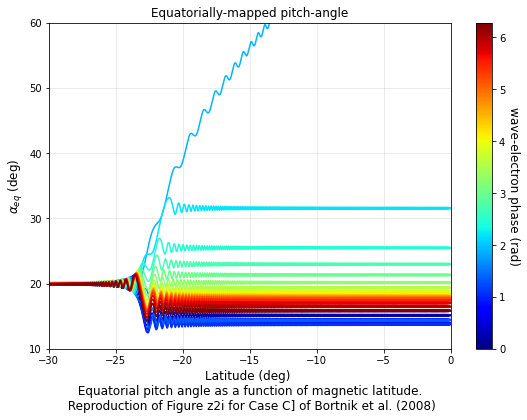

In [10]:
###################################################################
fig, ax = plt.subplots(figsize=(9,6))
s=5


for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),np.rad2deg(aeq[r,:-1]),c=cmap.to_rgba(eta0[r]))
ax.grid(alpha=.3)
ax.set_xlim(-30,0)
ax.set_ylim(10,60)
ax.set_xlabel('Latitude (deg) \n Equatorial pitch angle as a function of magnetic latitude. \n Reproduction of Figure z2i for Case C] of Bortnik et al. (2008)',fontsize=12)
ax.set_ylabel(r'$\alpha_{eq}$ (deg)',fontsize=12)
ax.set_title('Equatorially-mapped pitch-angle',fontsize=12)

ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)

#uncomment for saving the figure
# plt.tight_layout()
# plt.savefig('Figure_2i_of_Bortnik_et_al_2008')

plt.show()
####################################################################

### Equatorial pitch angle change vs initial wave-electorn phase

In [11]:
fig, ax = plt.subplots(figsize=(9,6))
s=5

colors=eta0[:]

ax.grid(alpha=.3)
ax.plot(np.rad2deg(eta0),dalpha)
ax.scatter(np.rad2deg(eta0),dalpha,marker='o',facecolors='none', edgecolors=cmap.to_rgba(eta0[:]),s=100)
ax.set_xlim(0,360)
ax.set_ylim(-10,60)
ax.set_xlabel('$\eta_0$ (deg) \n Total pitch angle change as a function of initial wave-electron phase \n Reproduction of Figure [2c for Case A, 2g for case B and 2k for Case C] of Bortnik et al. (2008)',fontsize=12)
ax.set_ylabel(r'$\Delta \alpha_{eq}$ (deg)',fontsize=12)
ax.set_title('total pitch-angle change',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)

#uncomment for saving the figure
# plt.tight_layout()
# plt.savefig('Figure_2i_of_Bortnik_et_al_2008')

plt.show()

### Energy vs magnetic latitude

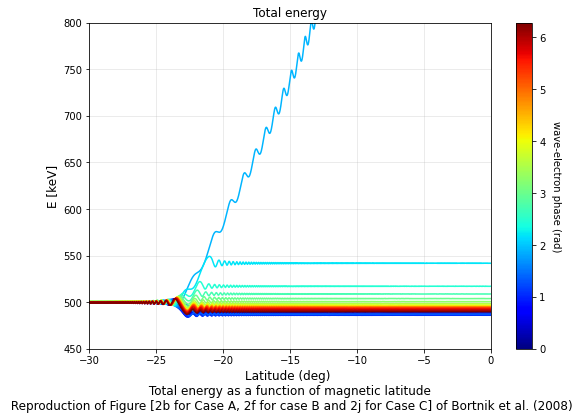

In [12]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),E_kin[r,:-1]*6.2415e15,c=cmap.to_rgba(eta0[r]))
ax.grid(alpha=.3)
ax.set_xlim(-30,0)
ax.set_ylim(450,800)
ax.set_xlabel('Latitude (deg) \n Total energy as a function of magnetic latitude \n Reproduction of Figure [2b for Case A, 2f for case B and 2j for Case C] of Bortnik et al. (2008)',fontsize=12)
ax.set_ylabel('E [keV]',fontsize=12)
ax.set_title('Total energy',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15)

#uncomment for saving the figure
# plt.tight_layout()
# plt.savefig('Figure_2j_of_Bortnik_et_al_2008')

plt.show()

### Parallel velocity and corresponding parallel resonant velocity vs magnetic latitude


In [13]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),upar[r,:-1],c=cmap.to_rgba(eta0[r]))
    ax.plot(np.rad2deg(lamda[r,:-1]),v_res_out[r,:-1],c=cmap2.to_rgba(eta0[r]))
ax.grid(alpha=.3)
# ax.set_xlim(-4.8,-5.2)
# ax.set_ylim(5.75*10**7,5.85*10**7)
ax.set_xlabel('Latitude (deg) \n Parallel and resonant velocities \n Reproduction of Figure 3a of Bortnik et al. (2008) for Case A and Case B',fontsize=12)
ax.set_ylabel(r'$u_{\parallel}$ (m/s)',fontsize=12)
ax.set_title('Parallel velocity of the electorns \n and corresponding resonant velocity')
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15)
txt=""
fig.text(.5, .01, txt, ha='center',fontsize=12)
plt.show()

### Perpendicular momentum vs magnetic latitude

In [14]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),pper[r,:-1],c=cmap.to_rgba(eta0[r]))


ax.grid(alpha=.3)
ax.set_xlim(-30,0)
# ax.set_ylim(2.27*10**(-22),2.3*10**(-22))
ax.set_xlabel('Latitude (deg) \n Perpendicular to the magnetic field component of momentum',fontsize=12)
ax.set_ylabel(r'$p_{\perp}$ (m/s)',fontsize=12)
ax.set_title('Perpendicular momentum')
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
plt.show()

### Wave-electron phase and $d\eta/dt$ vs magnetic latitude

In [15]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Latitude (deg) \n Wave-electron phase and $d\eta/dt$ as a function of magnetic latitude',fontsize=12)
ax1.set_ylabel('eta (rad)', color=color,fontsize=12)


for r in range(0,len(eta0)):
    ax1.plot(np.rad2deg(lamda[r,:-1]),eta[r,:-1],c=cmap2.to_rgba(eta0[r]))
    
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(-29.9,-0.1)
ax1.grid(alpha=.3)
ax1.axvline(x=-5,color="black", linestyle="--")
ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('deta/dt', color=color,fontsize=12)  
# ax2.set_ylim(-0.45,0.2)

ax1.set_title('Wave-electron phase and $d\eta/dt$',fontsize=12)
for r in range(0,len(eta0)):
    ax2.plot(np.rad2deg(lamda[r,:-1]),deta_dt[r,:-1],c=cmap.to_rgba(eta0[r]))
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
ax2.axhline(y=0,color="black", linestyle="--")
plt.show()

### Stix parameter S vs magnetic latitude

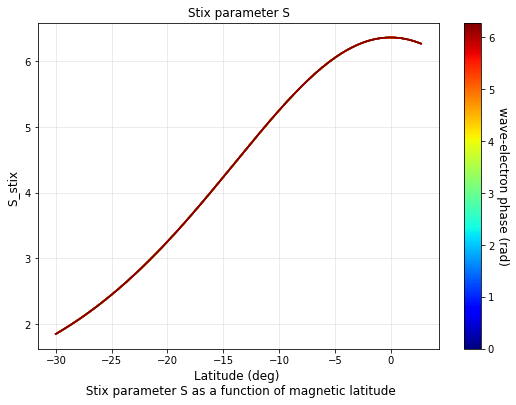

In [16]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),S_stix[r,:-1],c=cmap.to_rgba(eta0[r]))


ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg) \n Stix parameter S as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('S_stix ',fontsize=12)
ax.set_title('Stix parameter S',fontsize=12)

ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)

plt.show()

### Stix parameter D vs magnetic latitude

In [17]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),D_stix[r,:-1],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg) \n Stix parameter D as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('D_stix',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('Stix parameter D',fontsize=12)
plt.show()

### Stix parameter P vs magnetic latitude

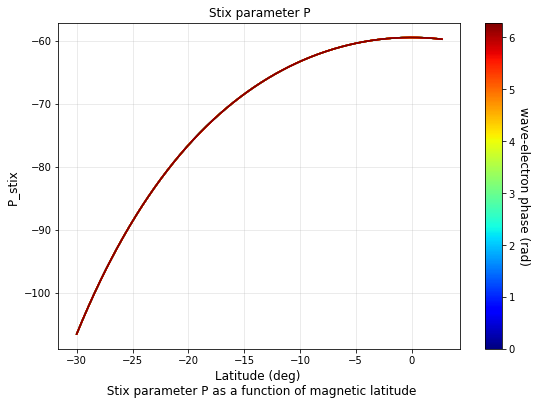

In [18]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),P_stix[r,:-1],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg) \n Stix parameter P as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('P_stix ',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('Stix parameter P',fontsize=12)
plt.show()

### Stix parameter R vs magnetic latitude

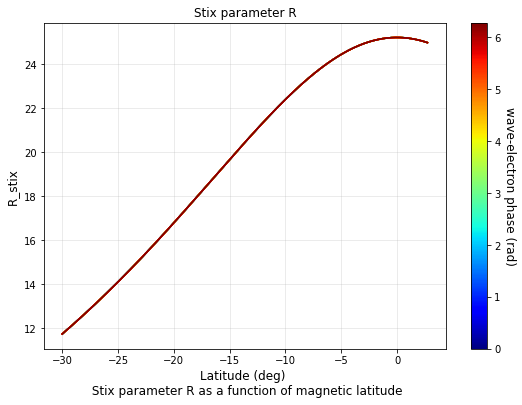

In [19]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),R_stix[r,:-1],c=cmap.to_rgba(eta0[r]))


ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg) \n Stix parameter R as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('R_stix ',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('Stix parameter R',fontsize=12)
plt.show()

### Stix parameter L vs magnetic latitude

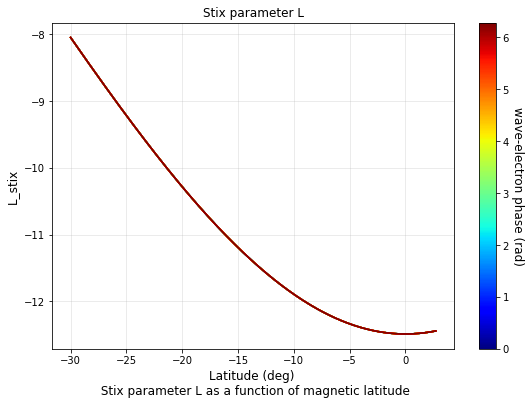

In [20]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),L_stix[r,:-1],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg) \n Stix parameter L as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('L_stix ',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('Stix parameter L',fontsize=12)
plt.show()

### Perpendicular wave number vs magnetic latitude

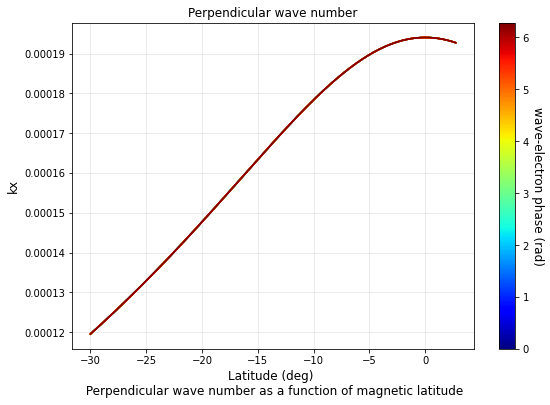

In [21]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),kz_out[r,:-1],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg) \n Perpendicular wave number as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('kx',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('Perpendicular wave number',fontsize=12)
plt.show()

### Refractive index vs magnetic latitude

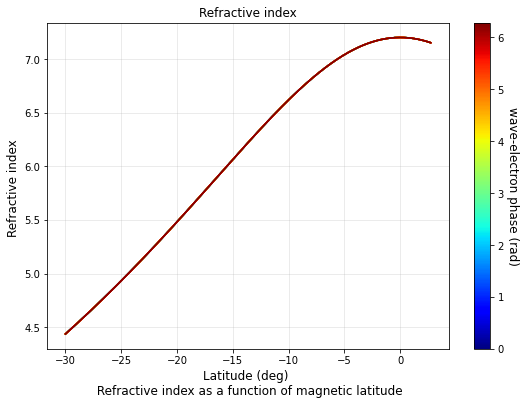

In [22]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),mu_out[r,:-1],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg) \n Refractive index as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('Refractive index ',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('Refractive index',fontsize=12)
plt.show()


### $d\omega_c/dt$ vs magnetic latitude

In [23]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),dwh_dt_out[r,:-1],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg) \n $d\omega_c/dt$ as a function of magnetic latitude ',fontsize=12)
ax.set_ylabel('dwce_dt ',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('$d\omega_c/dt$ ',fontsize=12)
plt.show()

### Lorentz factor vs magnetic latitude

In [24]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),gamma_out[r,:-1],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
ax.set_xlim(-30,0)
ax.set_ylim(1.8,2.6)
ax.set_xlabel('Latitude (deg) \n Lorentz factor as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('$\gamma$ ',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('Lorentz factor',fontsize=12)
plt.show()


### x-component of the wave magnetic field vs magnetic latitude

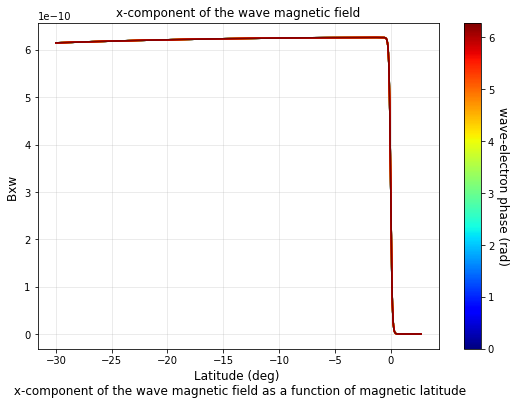

In [25]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),Bxw_out[r,:-1],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg) \n x-component of the wave magnetic field as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('Bxw ',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('x-component of the wave magnetic field',fontsize=12)
plt.show()

### y-component of the wave magnetic field vs magnetic latitude

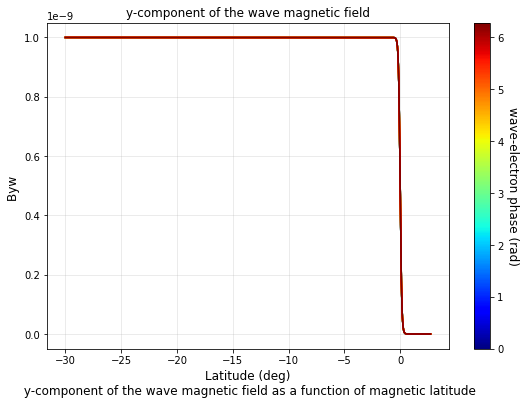

In [26]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),Byw_out[r,:-1],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg)\n y-component of the wave magnetic field as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('Byw ',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('y-component of the wave magnetic field',fontsize=12)
plt.show()

### z-component of the wave magnetic field vs magnetic latitude

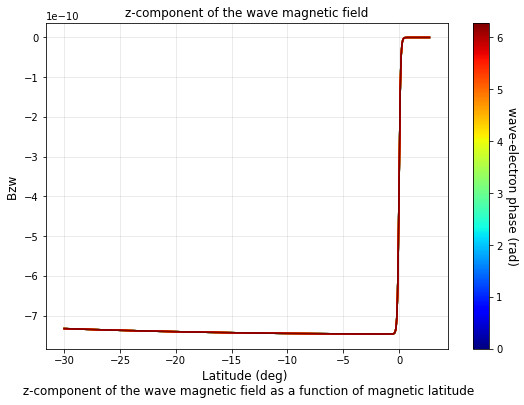

In [27]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),Bzw_out[r,:-1],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg) \n z-component of the wave magnetic field as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('Bzw ',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('z-component of the wave magnetic field',fontsize=12)
plt.show()

### x-component of the wave electric field vs magnetic latitude

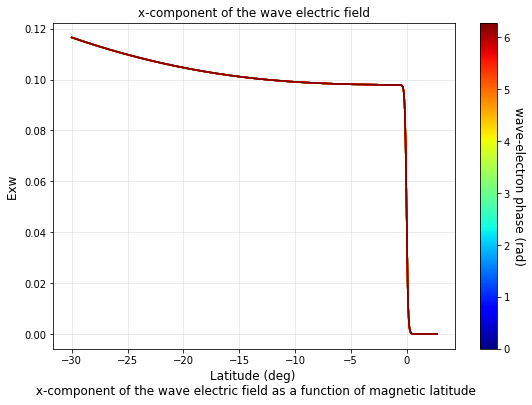

In [28]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),Exw_out[r,:-1],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg) \n x-component of the wave electric field as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('Exw ',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('x-component of the wave electric field',fontsize=12)
plt.show()

### y-component of the wave electric field vs magnetic latitude

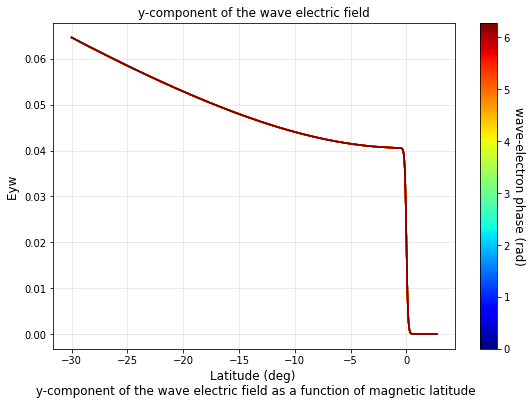

In [29]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),Eyw_out[r,:-1],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg) \n y-component of the wave electric field as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('Eyw ',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('y-component of the wave electric field',fontsize=12)
plt.show()

### z-component of the wave electric field vs magnetic latitude

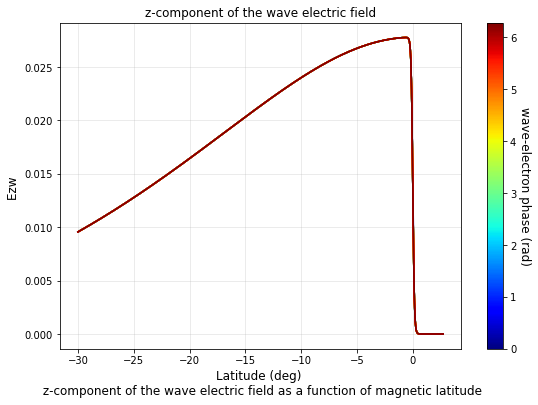

In [30]:
fig, ax = plt.subplots(figsize=(9,6))
for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,:-1]),Ezw_out[r,:-1],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
# ax.set_xlim(-6,-4)
ax.set_xlabel('Latitude (deg) \n z-component of the wave electric field as a function of magnetic latitude',fontsize=12)
ax.set_ylabel('Ezw ',fontsize=12)
ticks=np.arange(0,2*np.pi,1)
cbar=fig.colorbar(cmap, ticks=ticks)
cbar.set_label('wave-electron phase (rad)', rotation=270,labelpad=15,fontsize=12)
ax.set_title('z-component of the wave electric field',fontsize=12)
plt.show()

## Non-linear effects

### Electron trajectories in the ν-η plane

/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


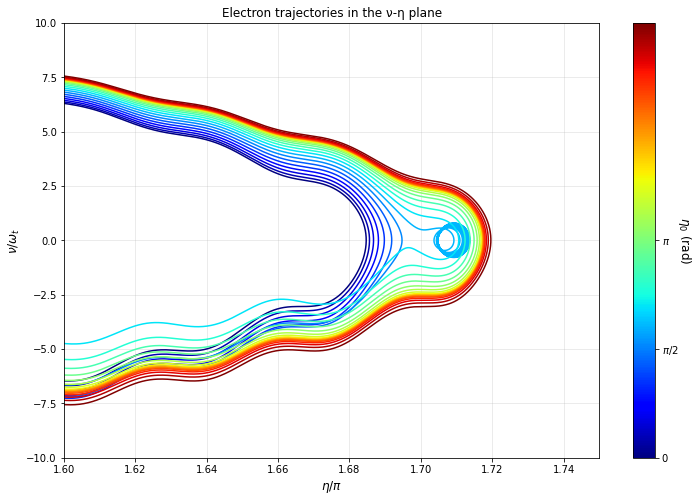

In [31]:
wtr=np.sqrt(wtrsq_out)

nplot=deta_dt/wtr

fonts=12
fig, ax = plt.subplots(figsize=(12,8))
s=5
last=1

for r in range(0,len(eta0)):
    ax.plot(eta[r,:-last]/180,nplot[r,:-last],c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
ax.set_xlim(1.6,1.75)
ax.set_ylim(-10,10)
ax.set_xlabel(r'$\eta/\pi$',fontsize=fonts)
ax.set_ylabel(r'$\nu/\omega_t$ ',fontsize=fonts)



cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
ax.set_title('Electron trajectories in the ν-η plane',fontsize=12)
plt.show()


### Non-linear S parameter

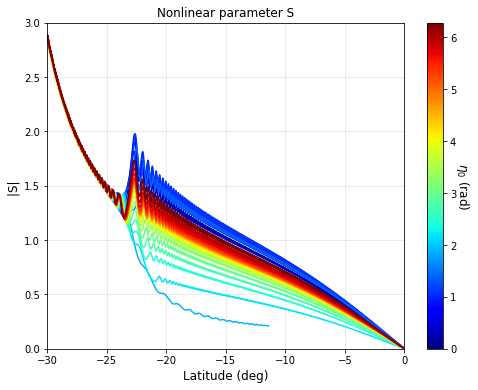

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
s=5


for r in range(0,len(eta0)):
    ax.plot(np.rad2deg(lamda[r,2:]),np.abs(S_out[r,2:]),c=cmap.to_rgba(eta0[r]))

ax.grid(alpha=.3)
ax.set_xlim(-30,0)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel('|S| ',fontsize=fonts)

ax.set_ylim(0,3)
cbar=fig.colorbar(cmap)
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
ax.set_title('Nonlinear parameter S',fontsize=12)
plt.show()